In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dac-find-it-2023/training_set_features.csv
/kaggle/input/dac-find-it-2023/test_set_features.csv
/kaggle/input/dac-find-it-2023/training_set_labels.csv
/kaggle/input/dac-find-it-2023/submission_format.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
features_data = pd.read_csv("/kaggle/input/dac-find-it-2023/training_set_features.csv")
test_data = pd.read_csv("/kaggle/input/dac-find-it-2023/test_set_features.csv")
label_data = pd.read_csv("/kaggle/input/dac-find-it-2023/training_set_labels.csv")
submission_data = pd.read_csv ("/kaggle/input/dac-find-it-2023/test_set_features.csv")

# Visualisasi Data

In [74]:
# for i in features_data:
#     total_count = features_data[i].count() + features_data[i].isna().sum()
#     print("Persentase Nan: ", (features_data[i].isna().sum()/total_count)*100)
#     print(features_data[i].value_counts(normalize = True)*100)
#     print("------------------------------------\n")

In [75]:
features_data.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [76]:
test_data.isna().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [5]:
features_data.drop(columns=["respondent_id"],inplace=True)

In [6]:
test_data.drop(columns=["respondent_id"],inplace=True)

In [7]:
label_data.drop(columns = ['respondent_id'], inplace = True)

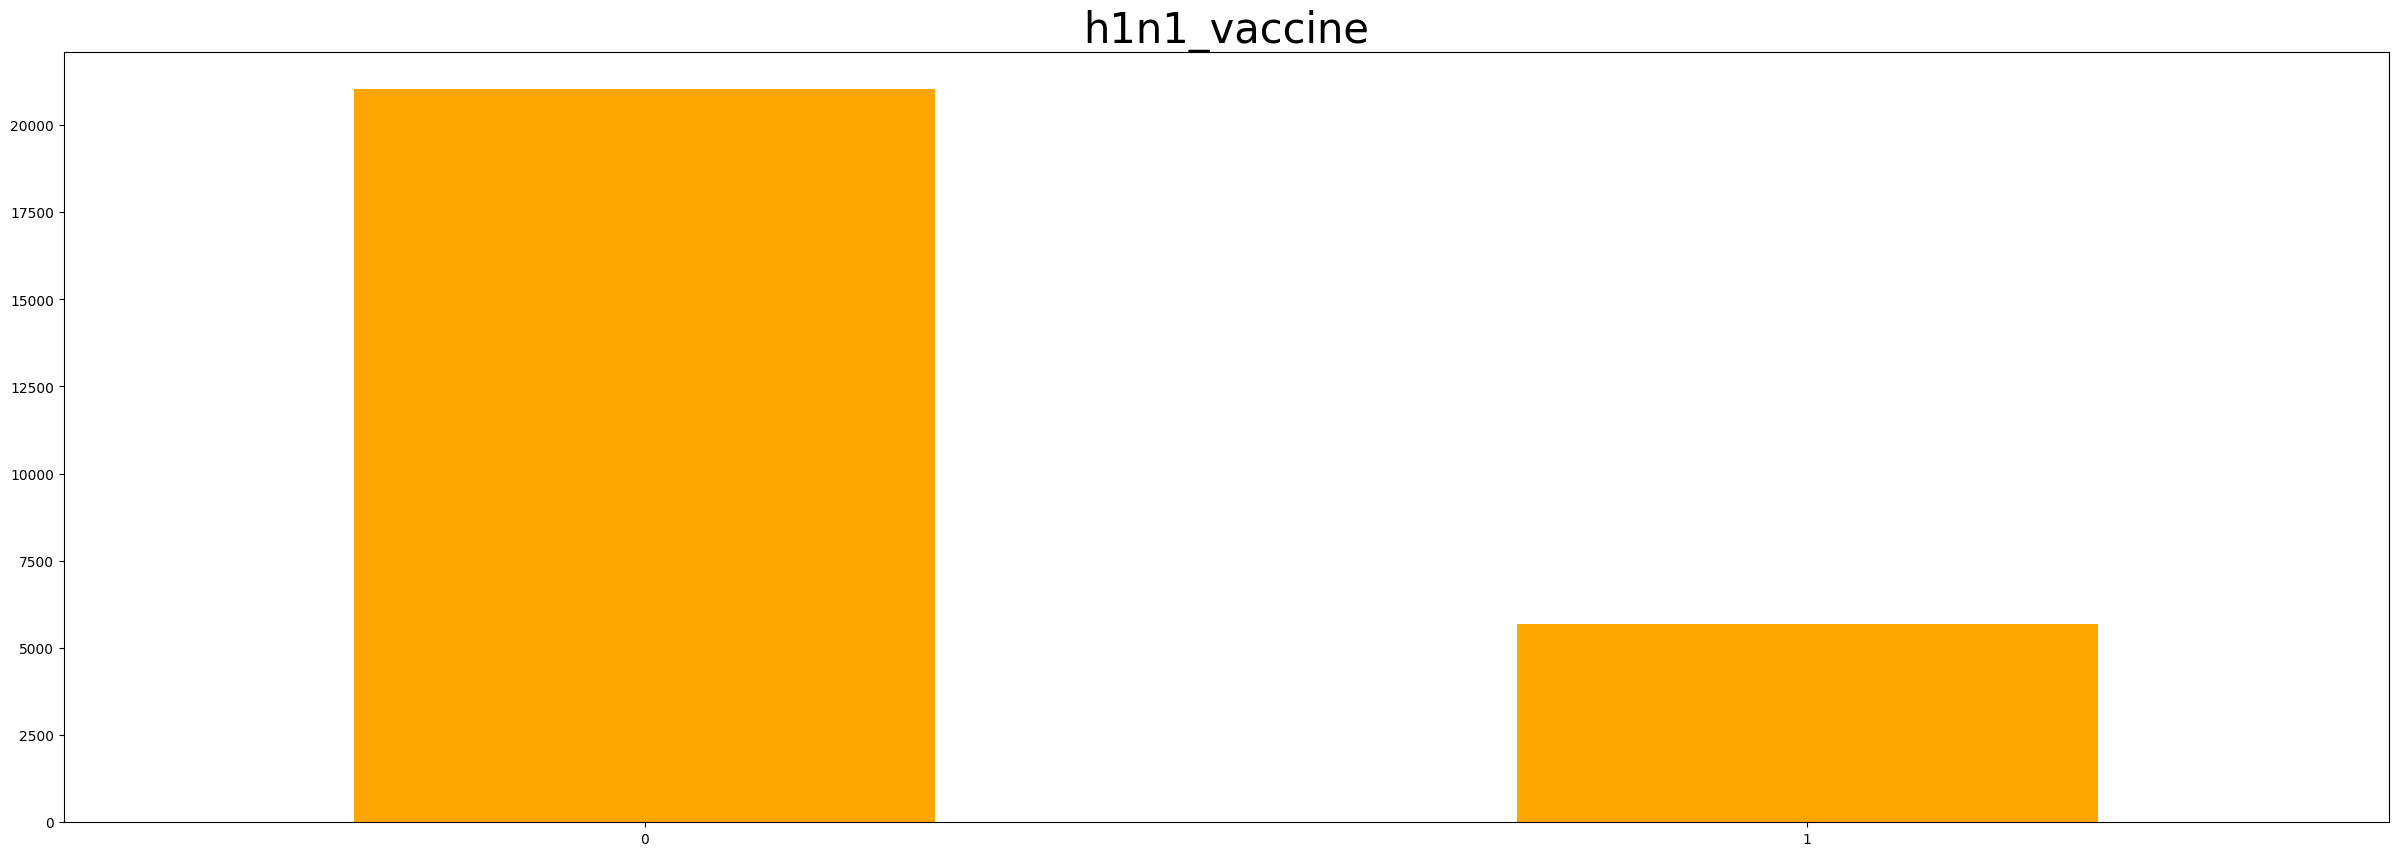

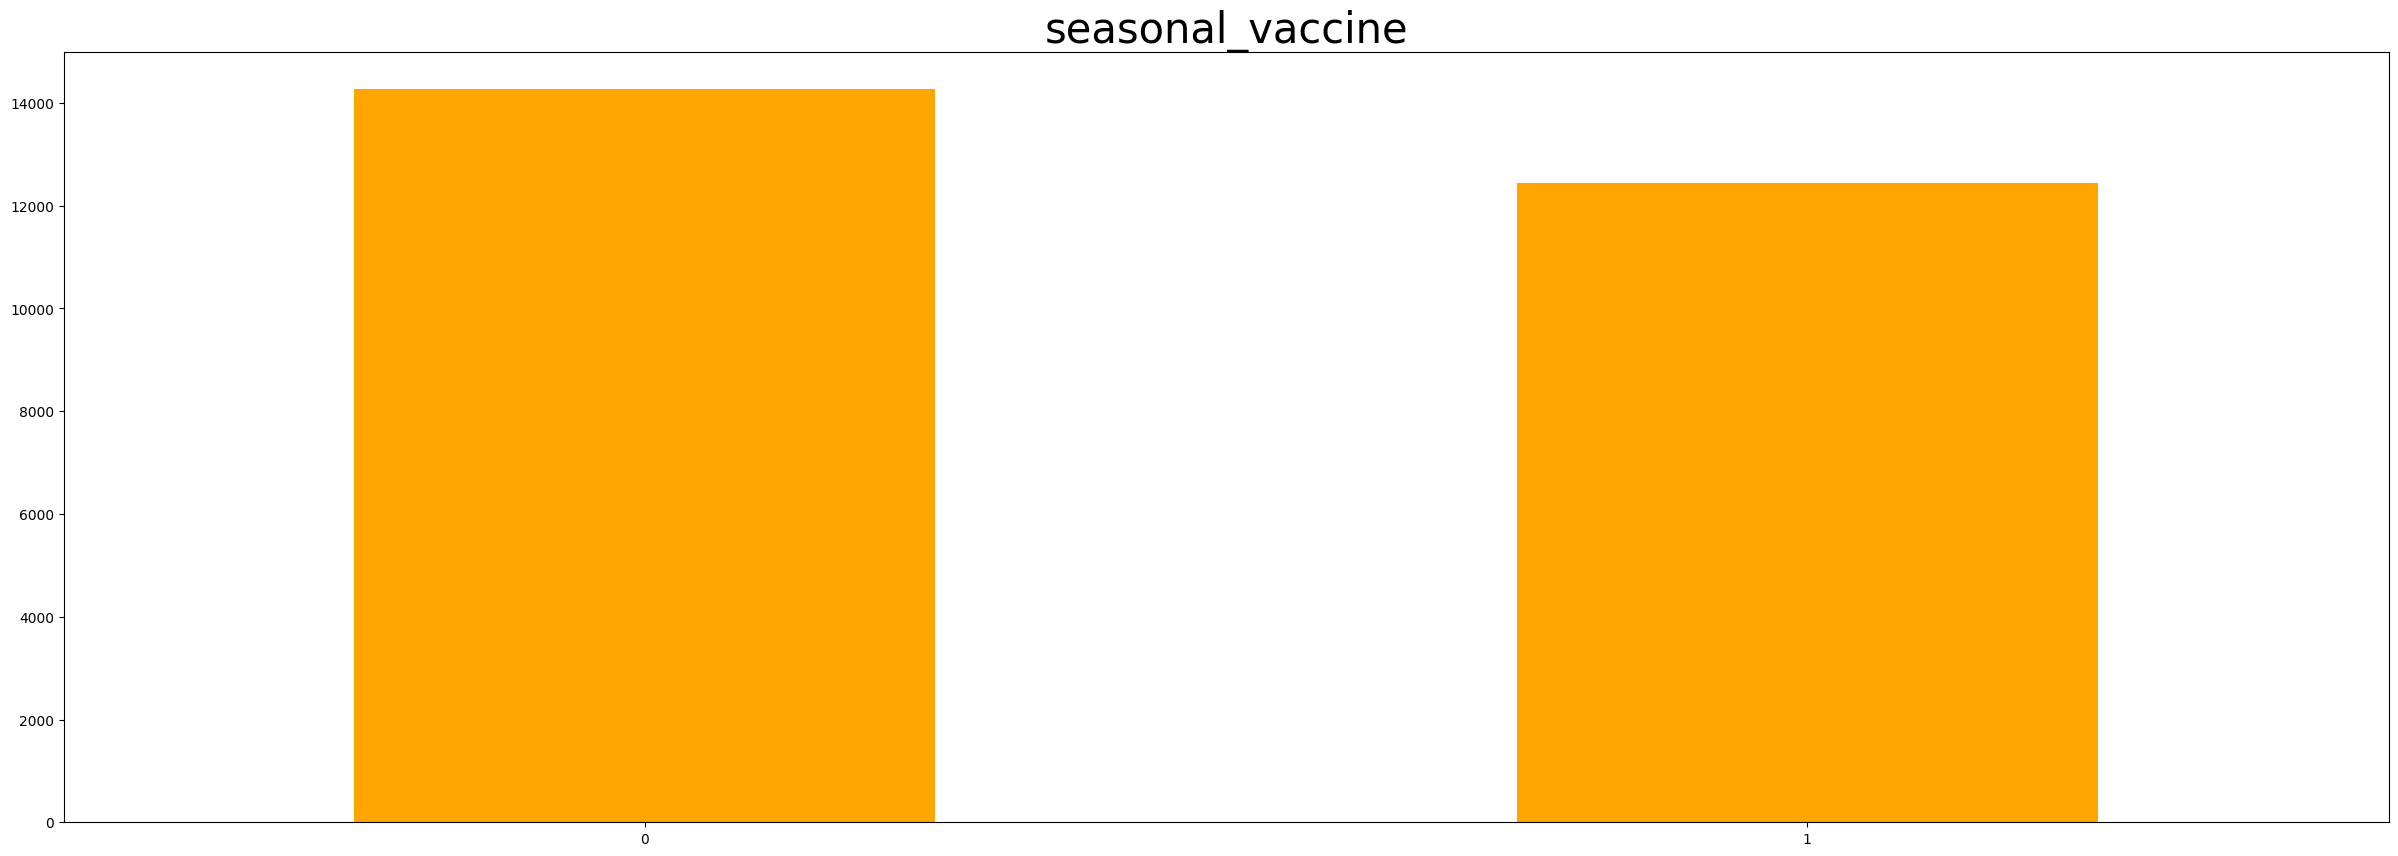

In [80]:
df_train_object = label_data
df_train_object = df_train_object.astype(str)
df_train_object.replace(np.nan, 'Nan', inplace=True)

# def get_cmap(n, name='hsv'):
#     return plt.cm.get_cmap(name, n)

# cmap = get_cmap(len(features_data.columns))

for col in df_train_object:
    plt.figure(figsize=(30,10))
    plt.title(col, fontsize = 30)
    df_train_object[col].value_counts().sort_index().plot(kind= 'bar', rot = 0, color = 'orange')
    plt.show()

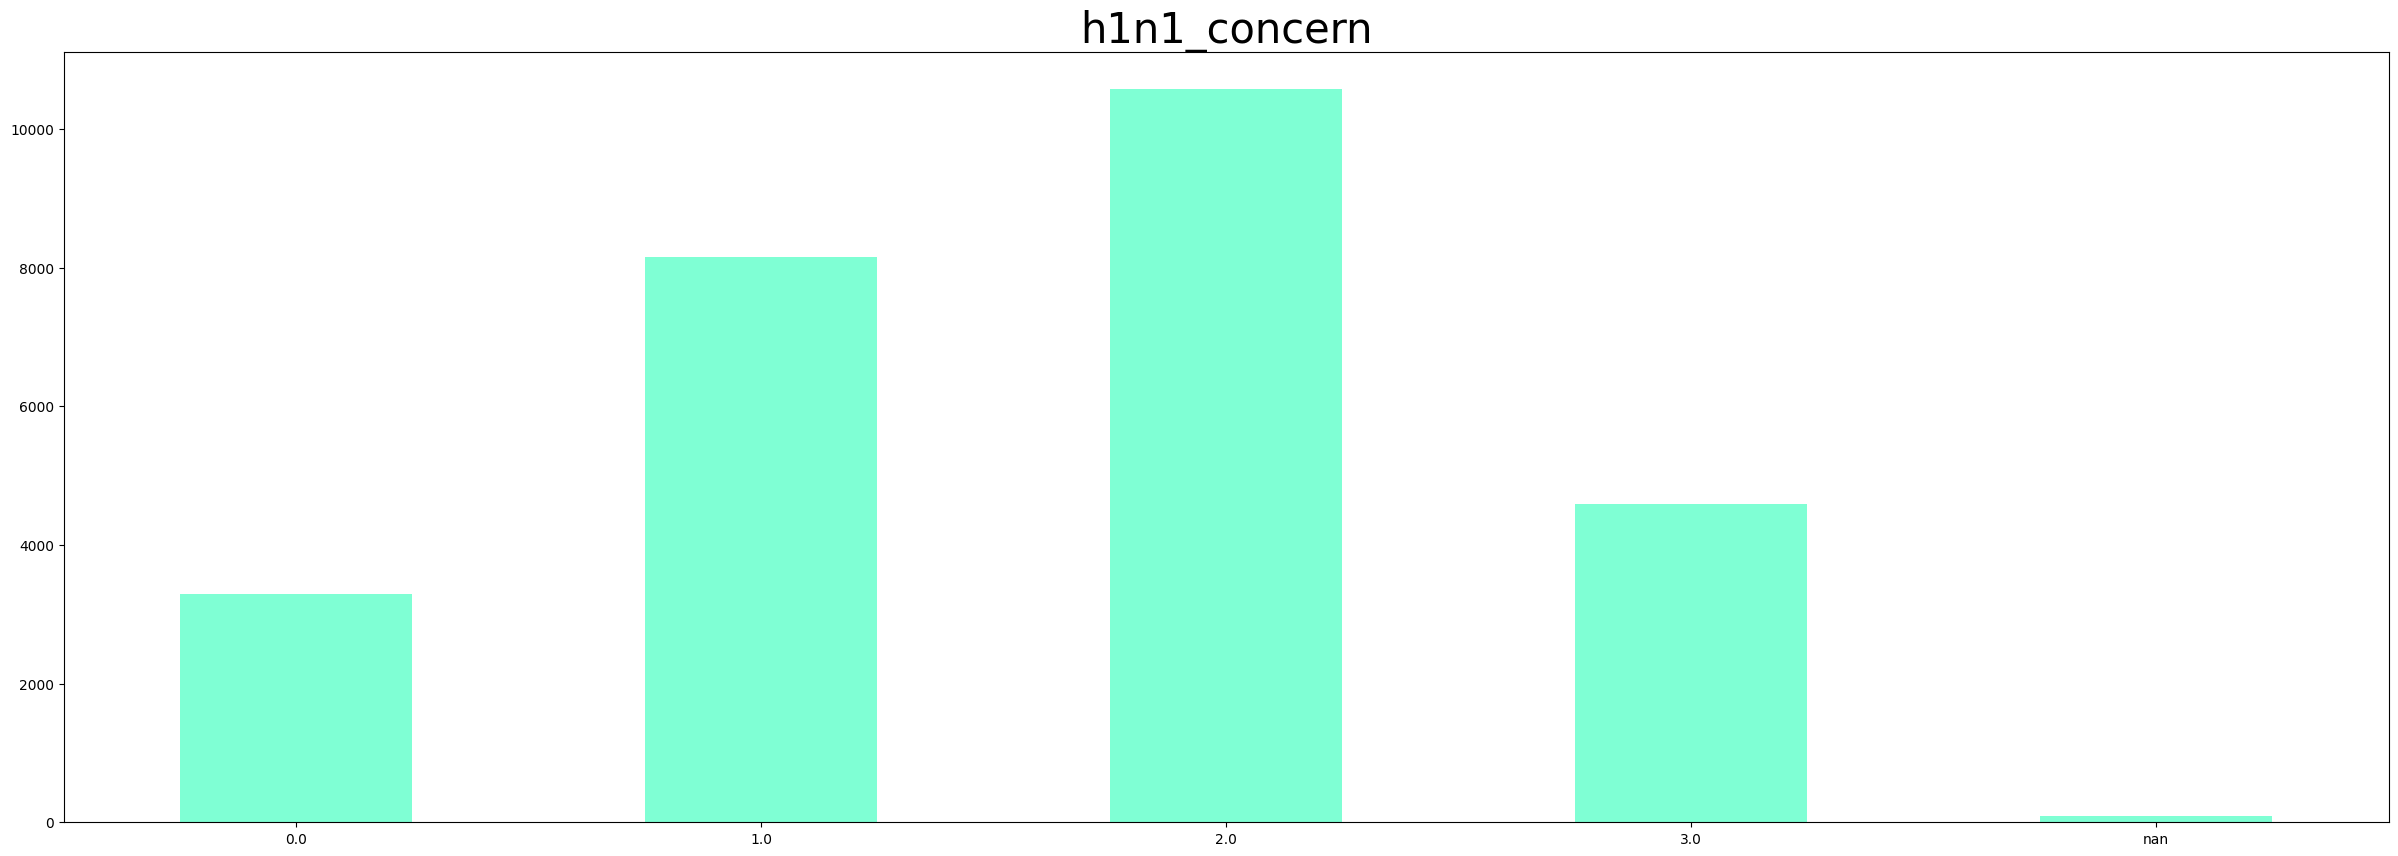

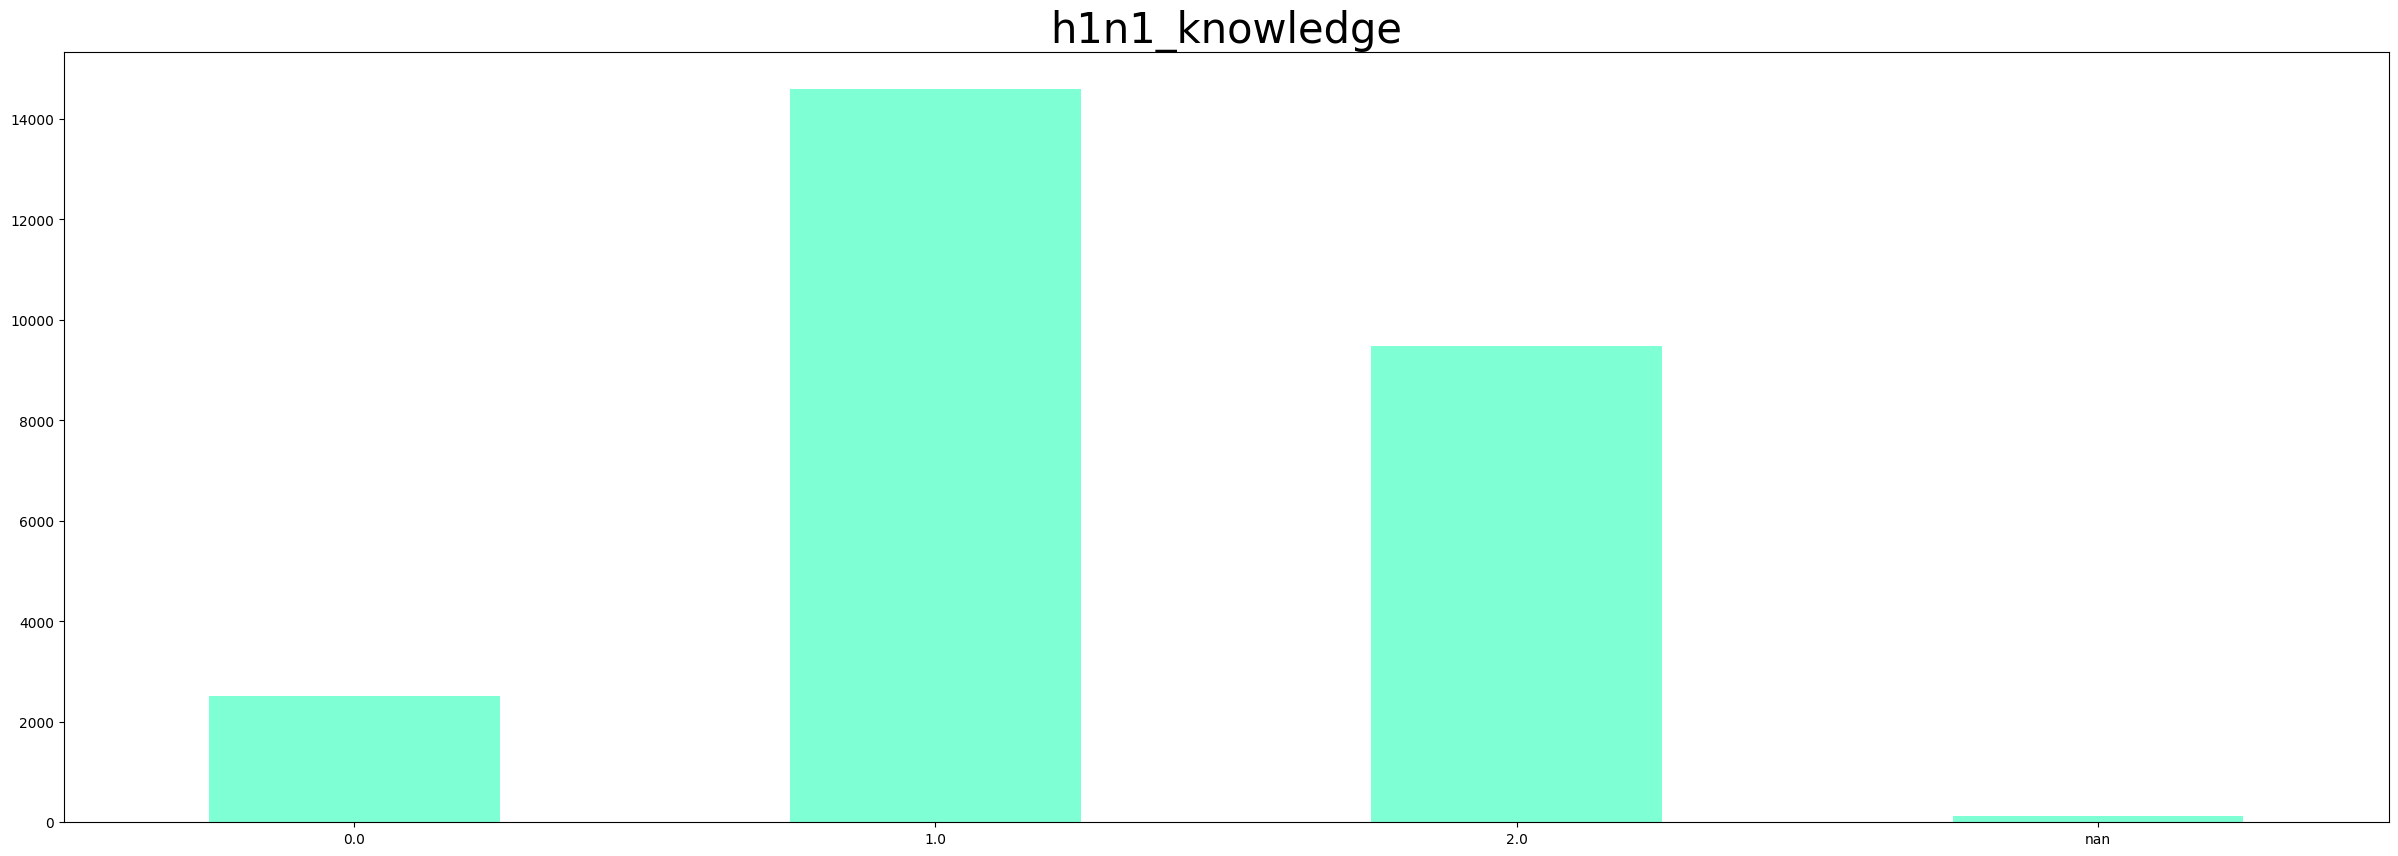

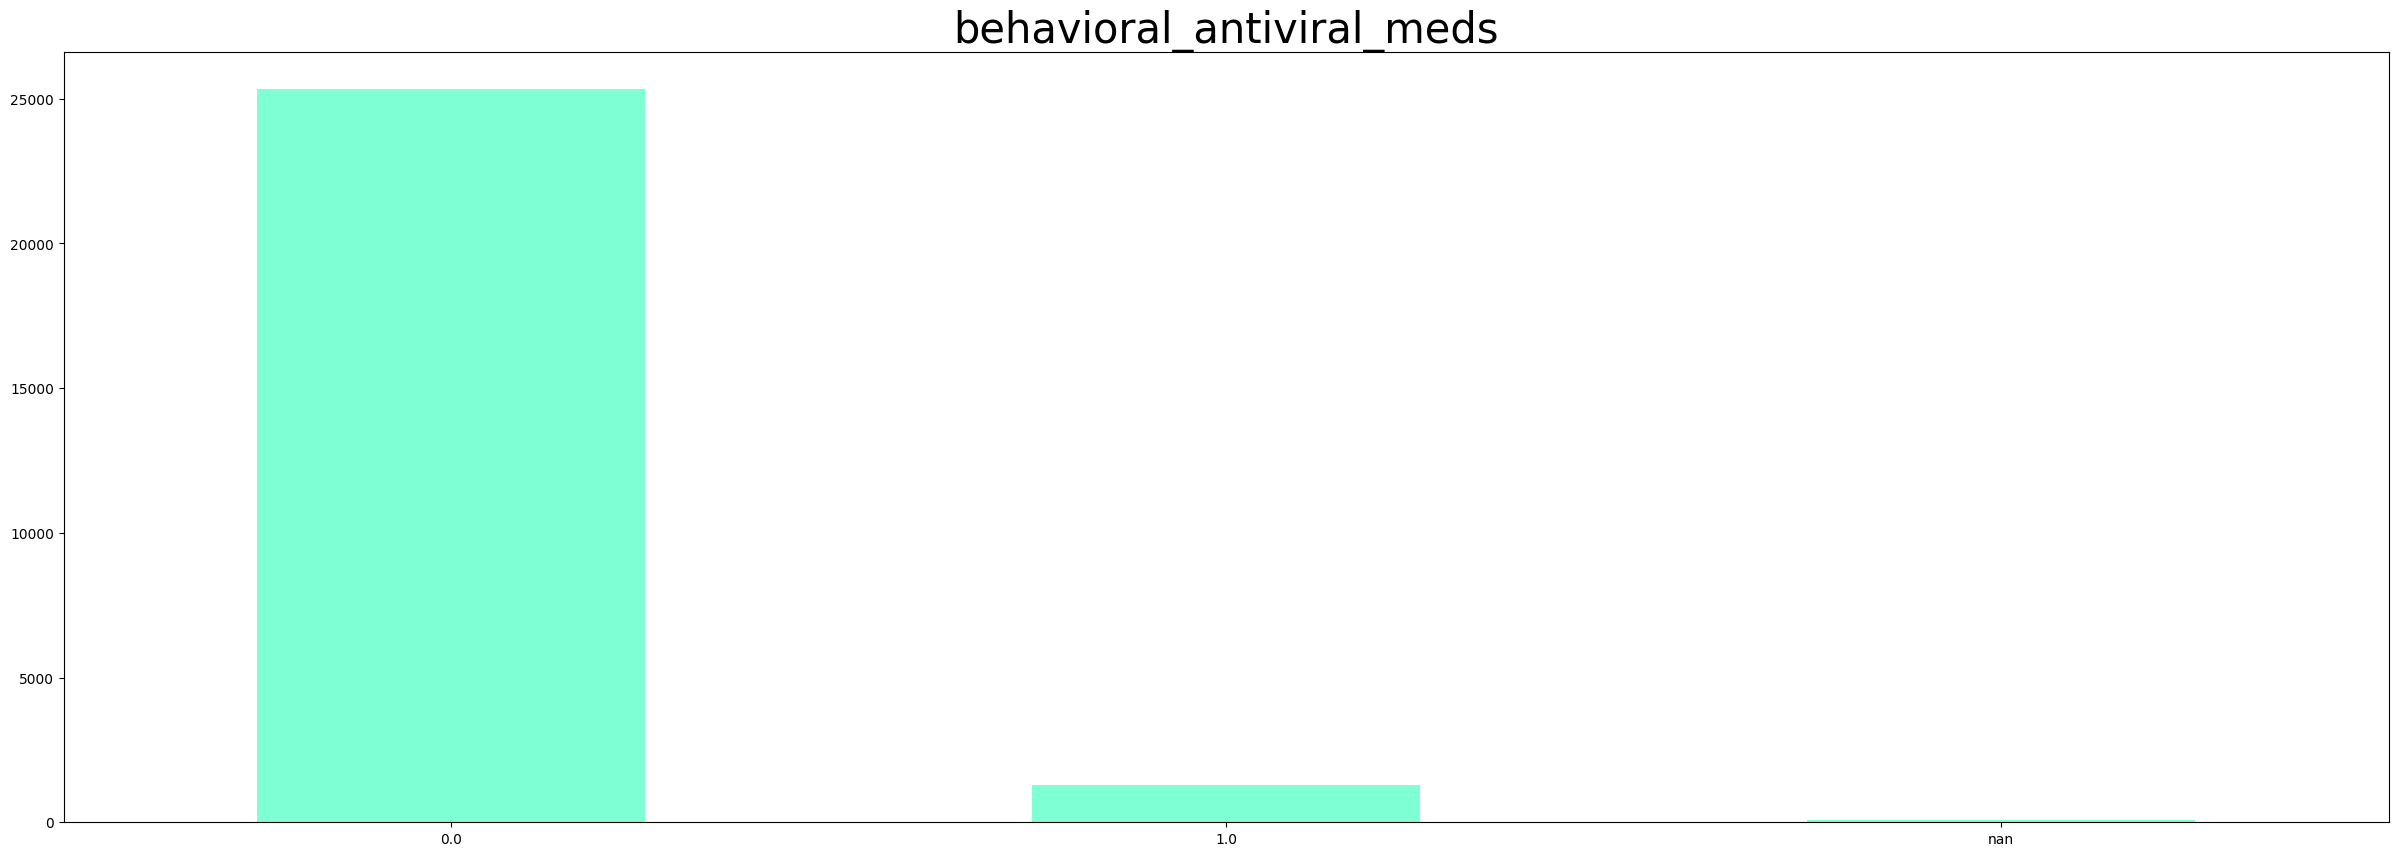

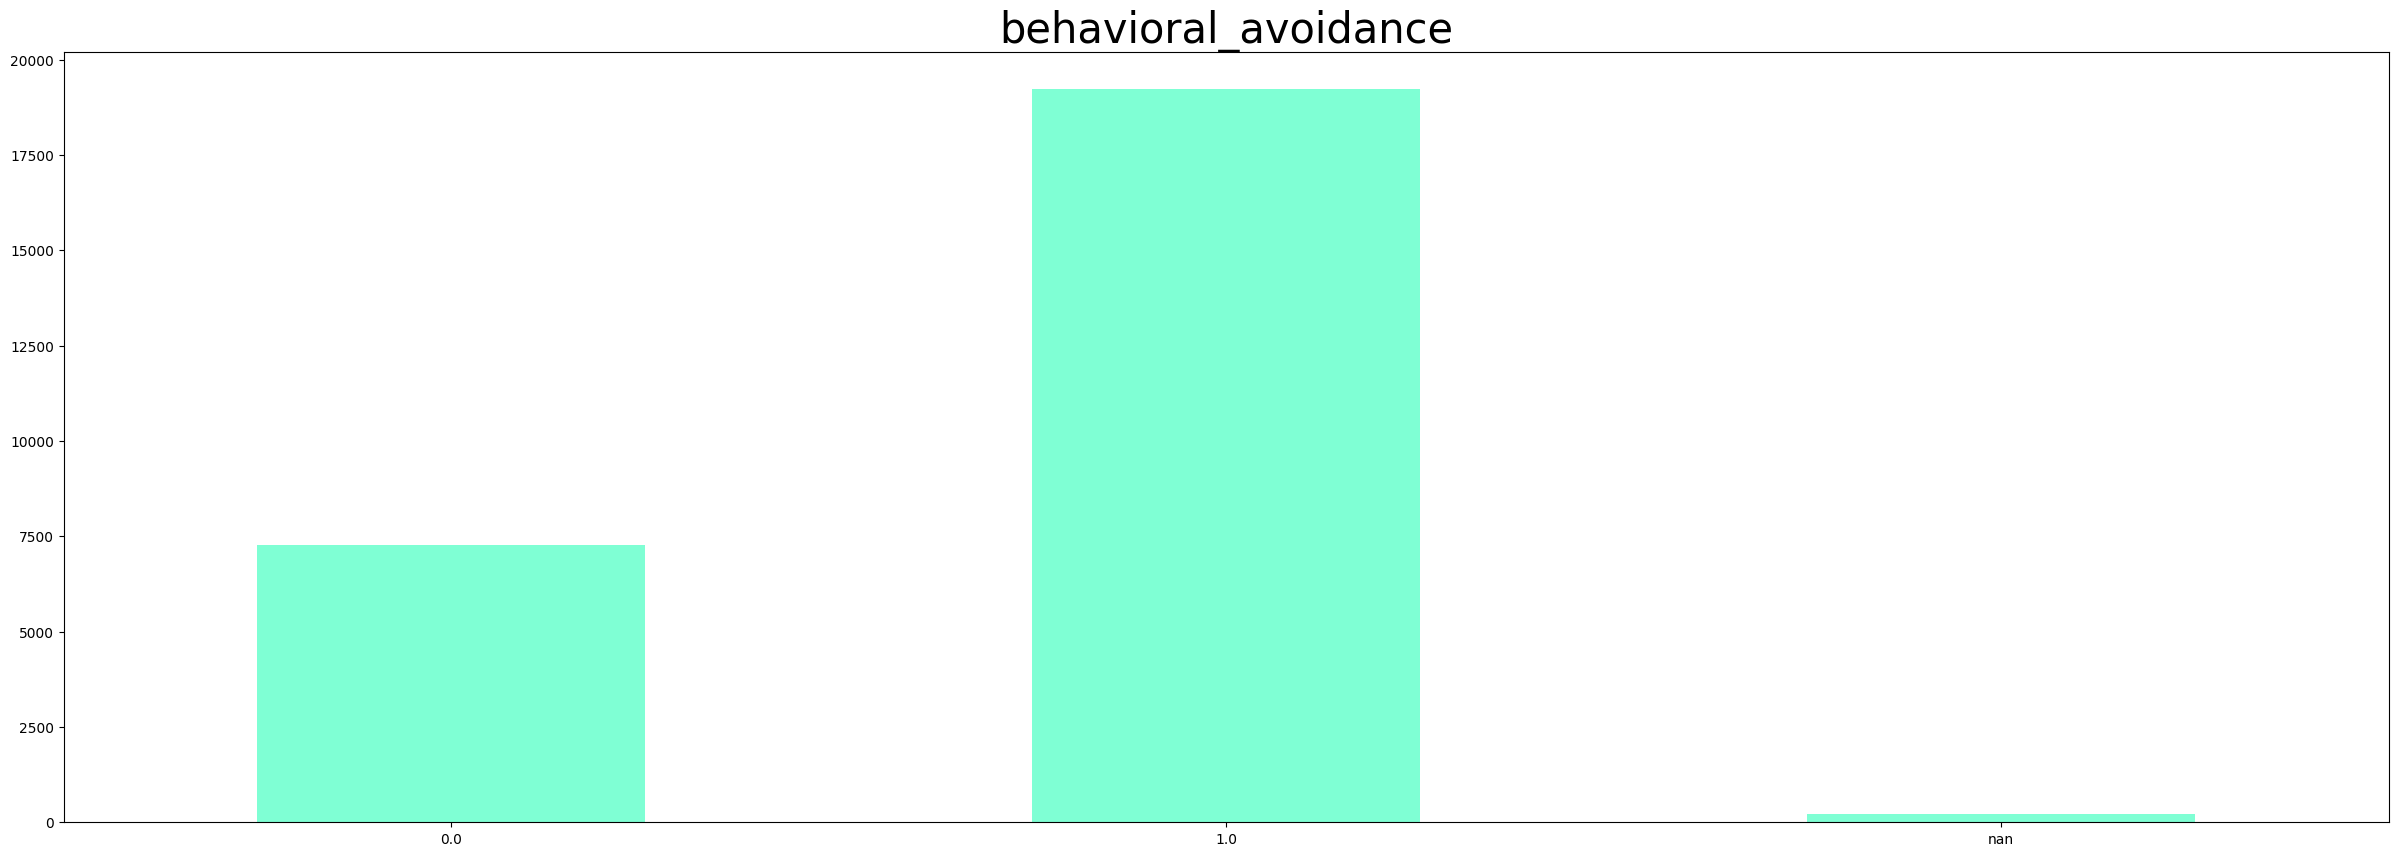

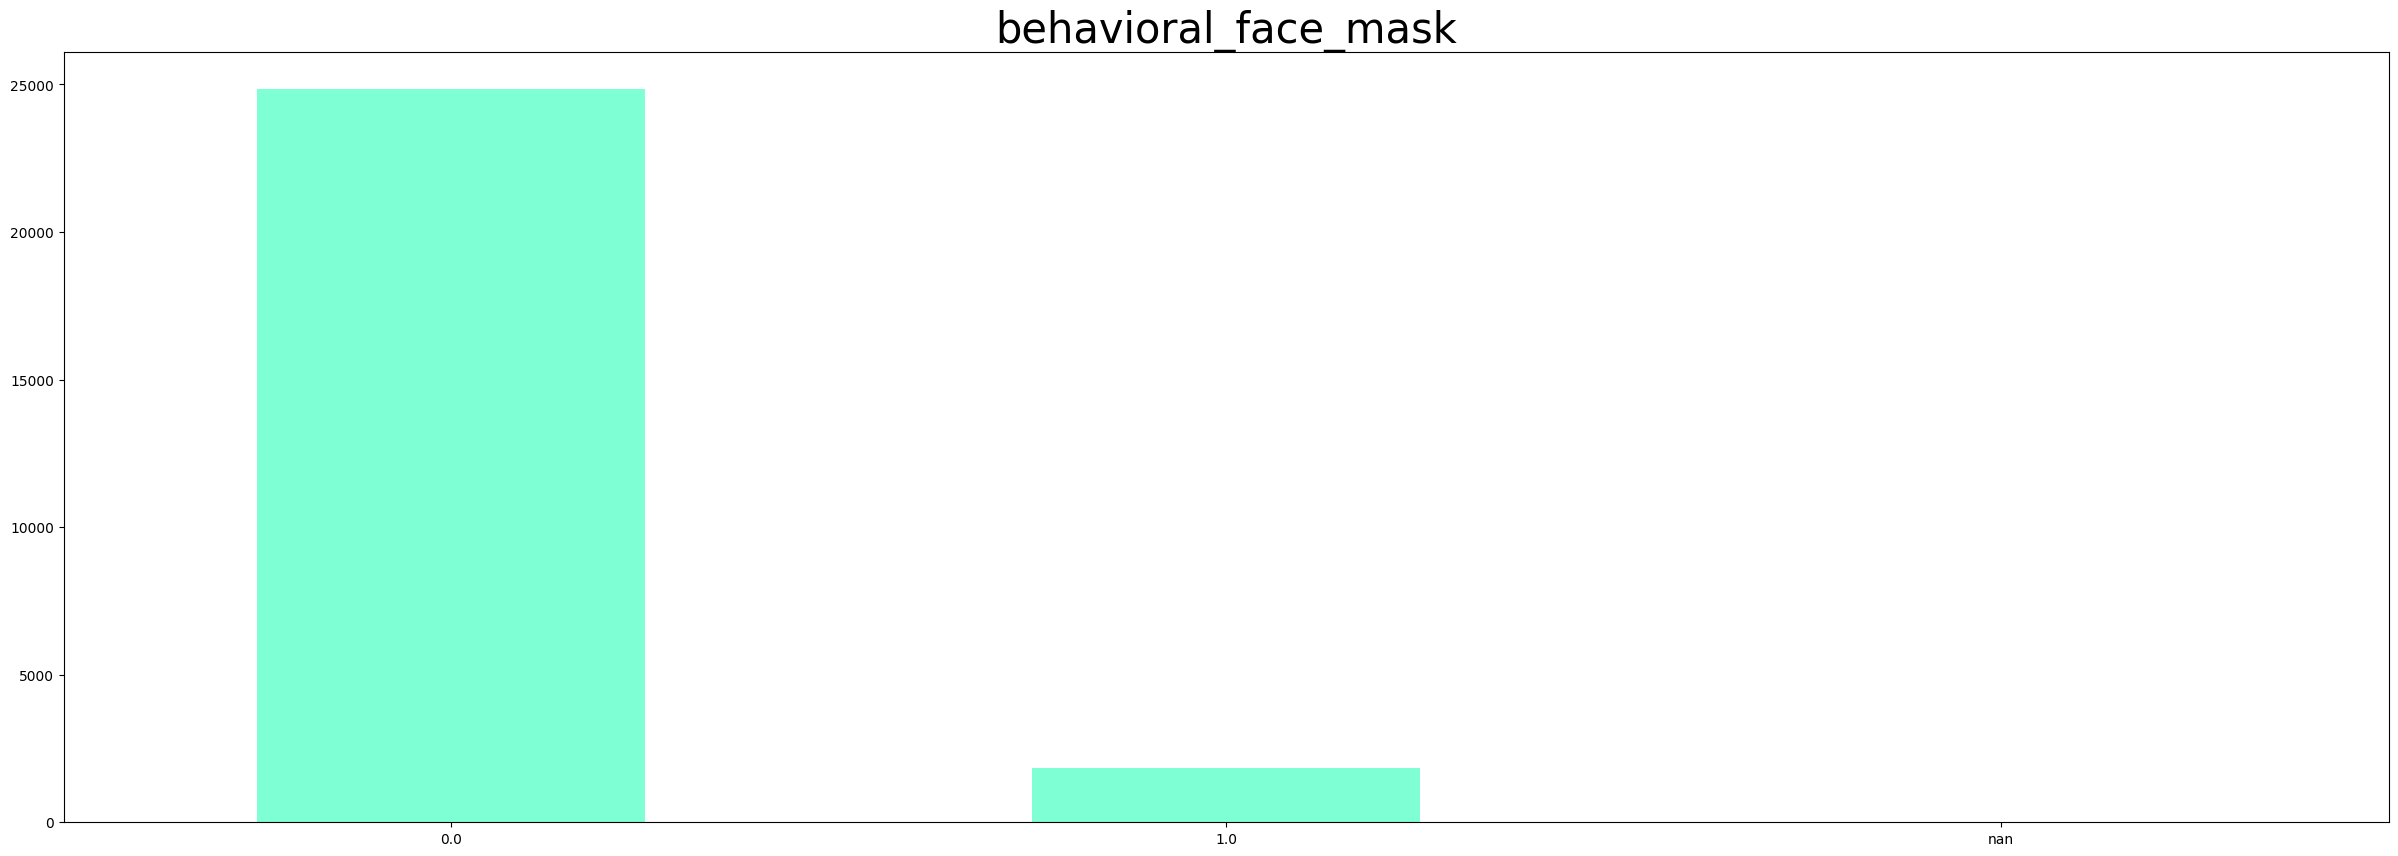

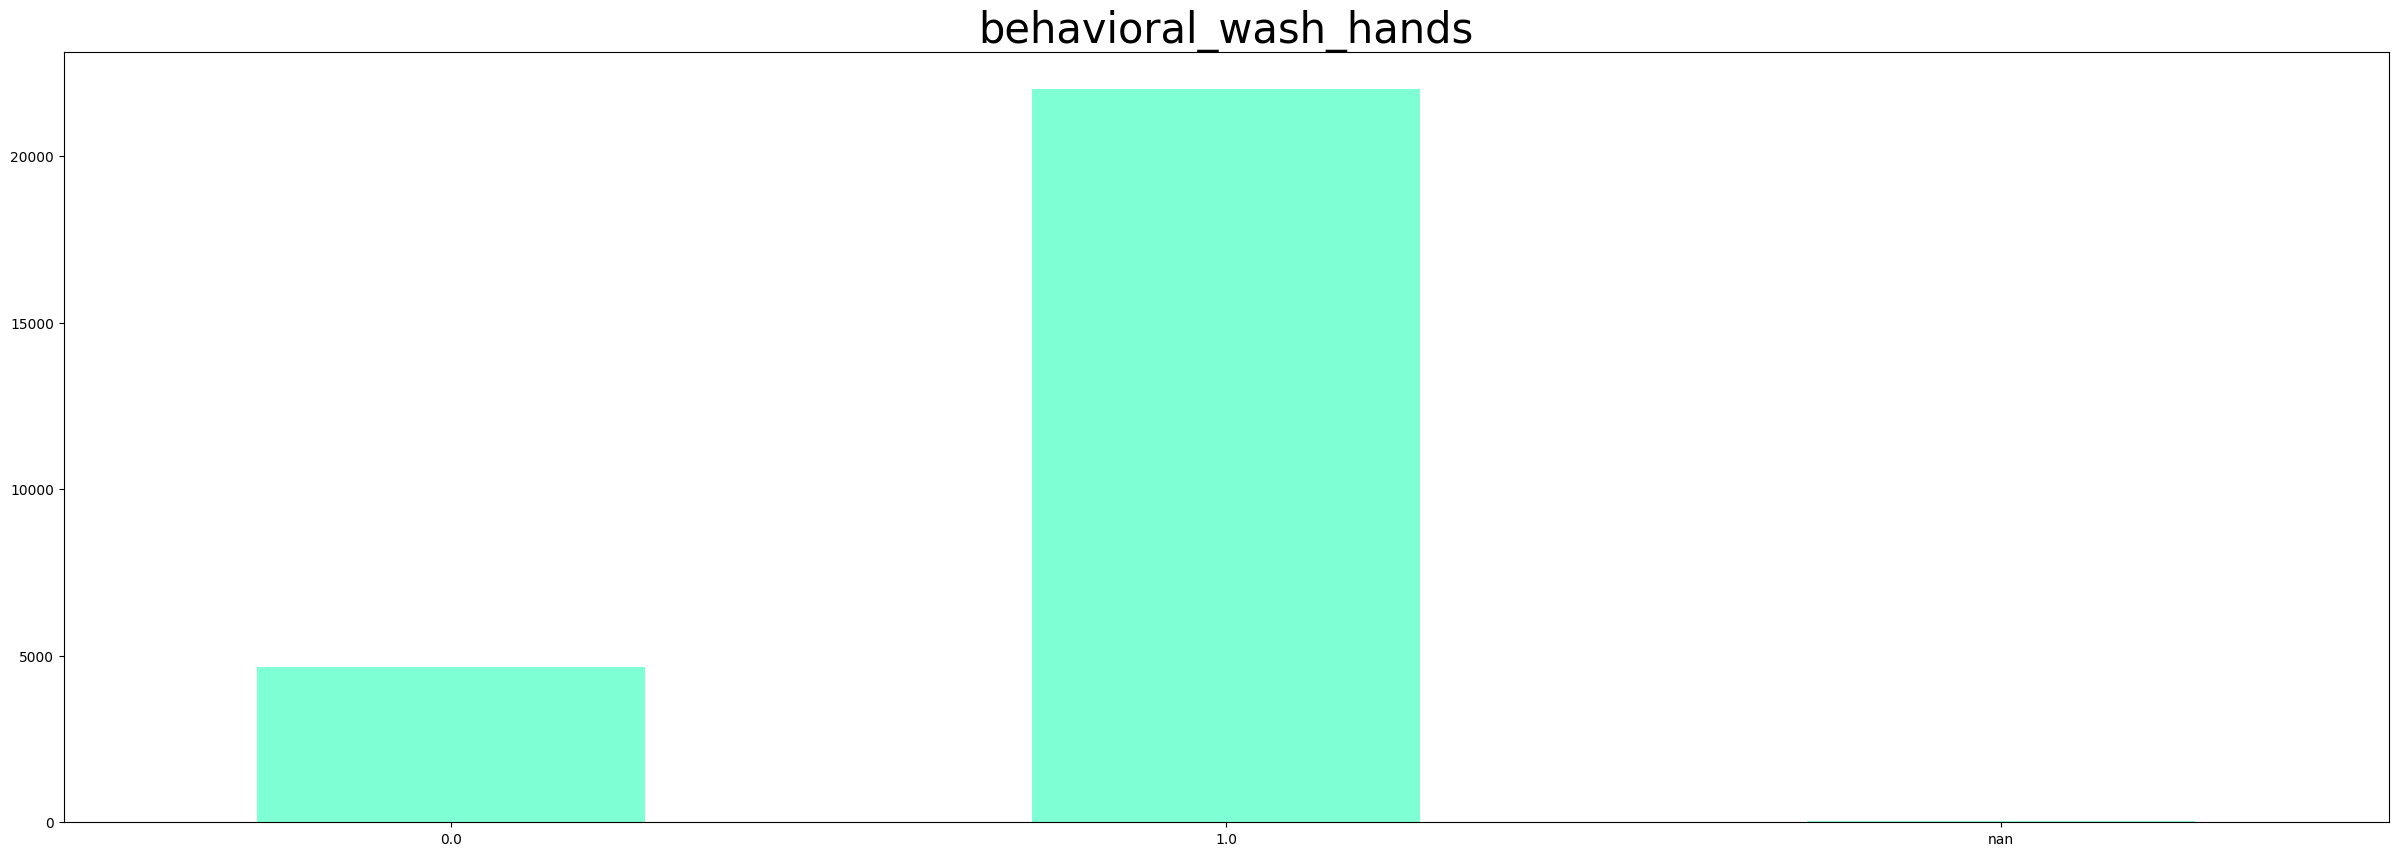

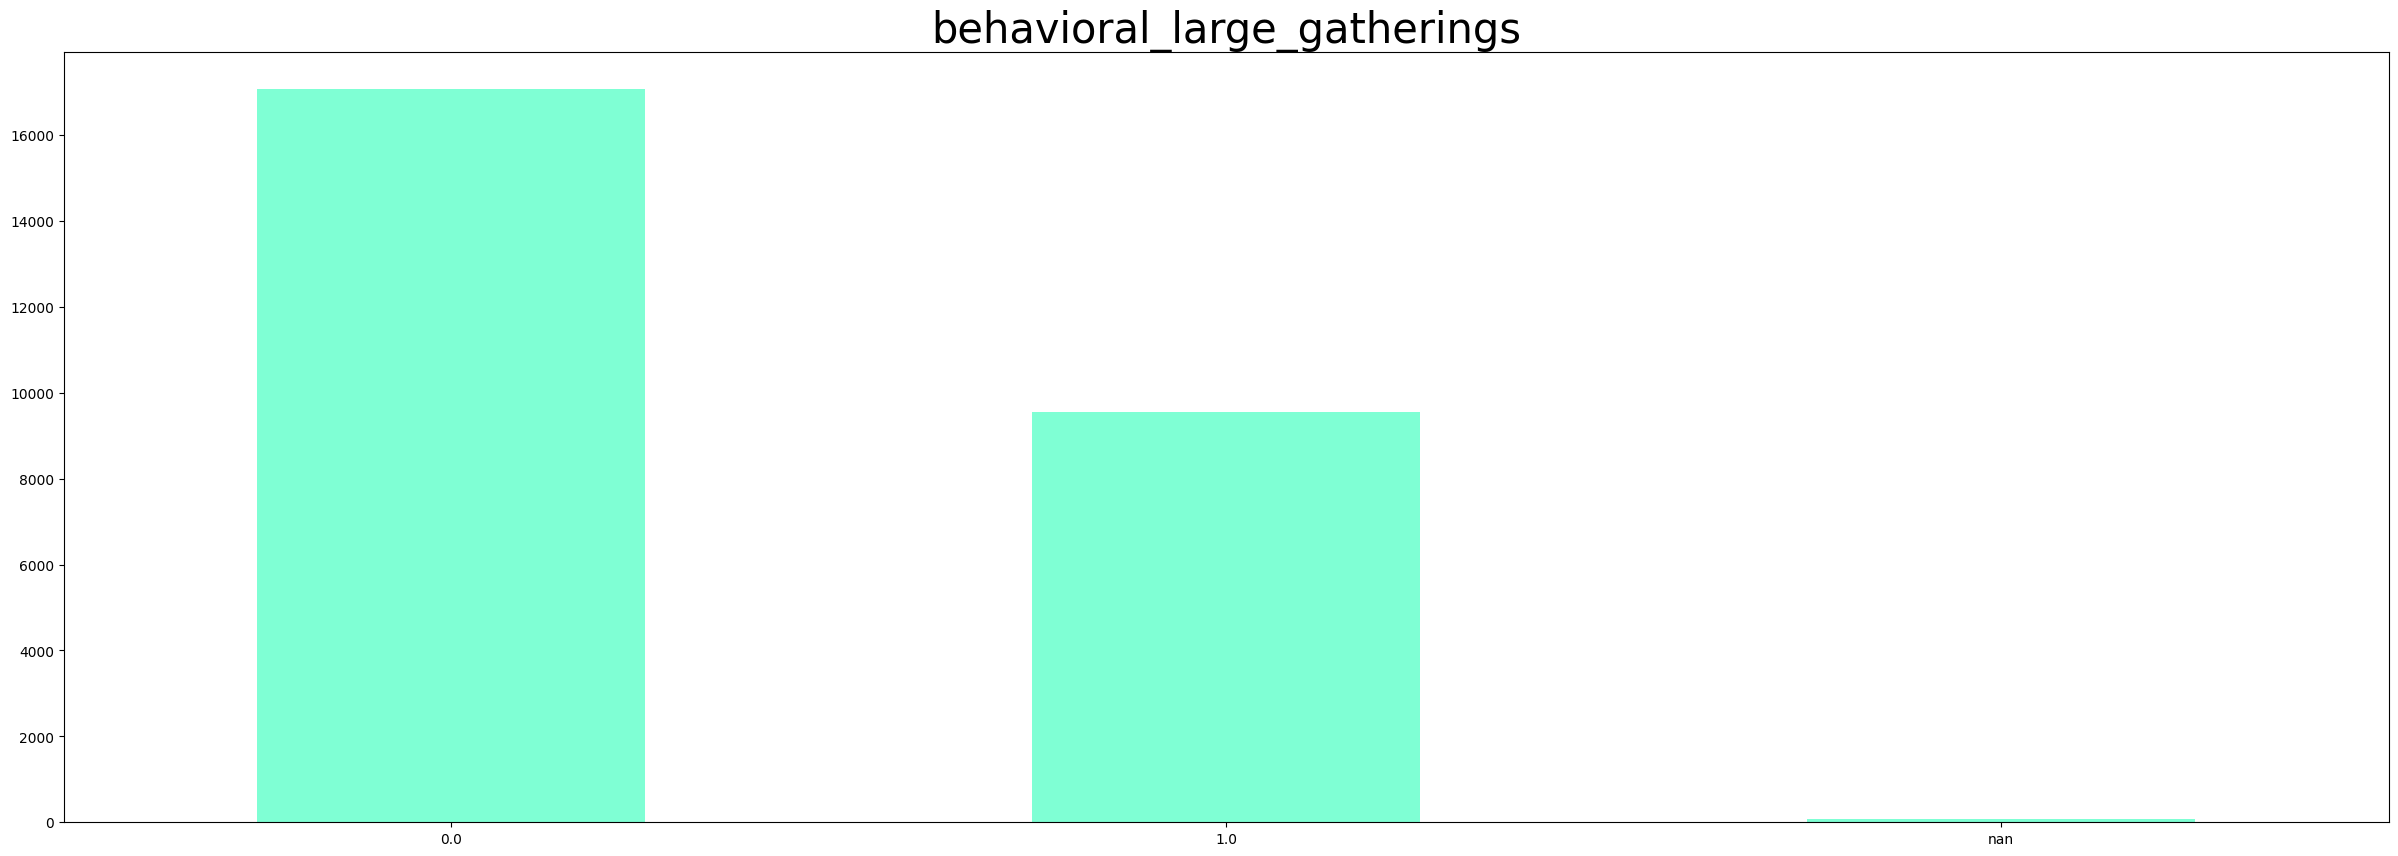

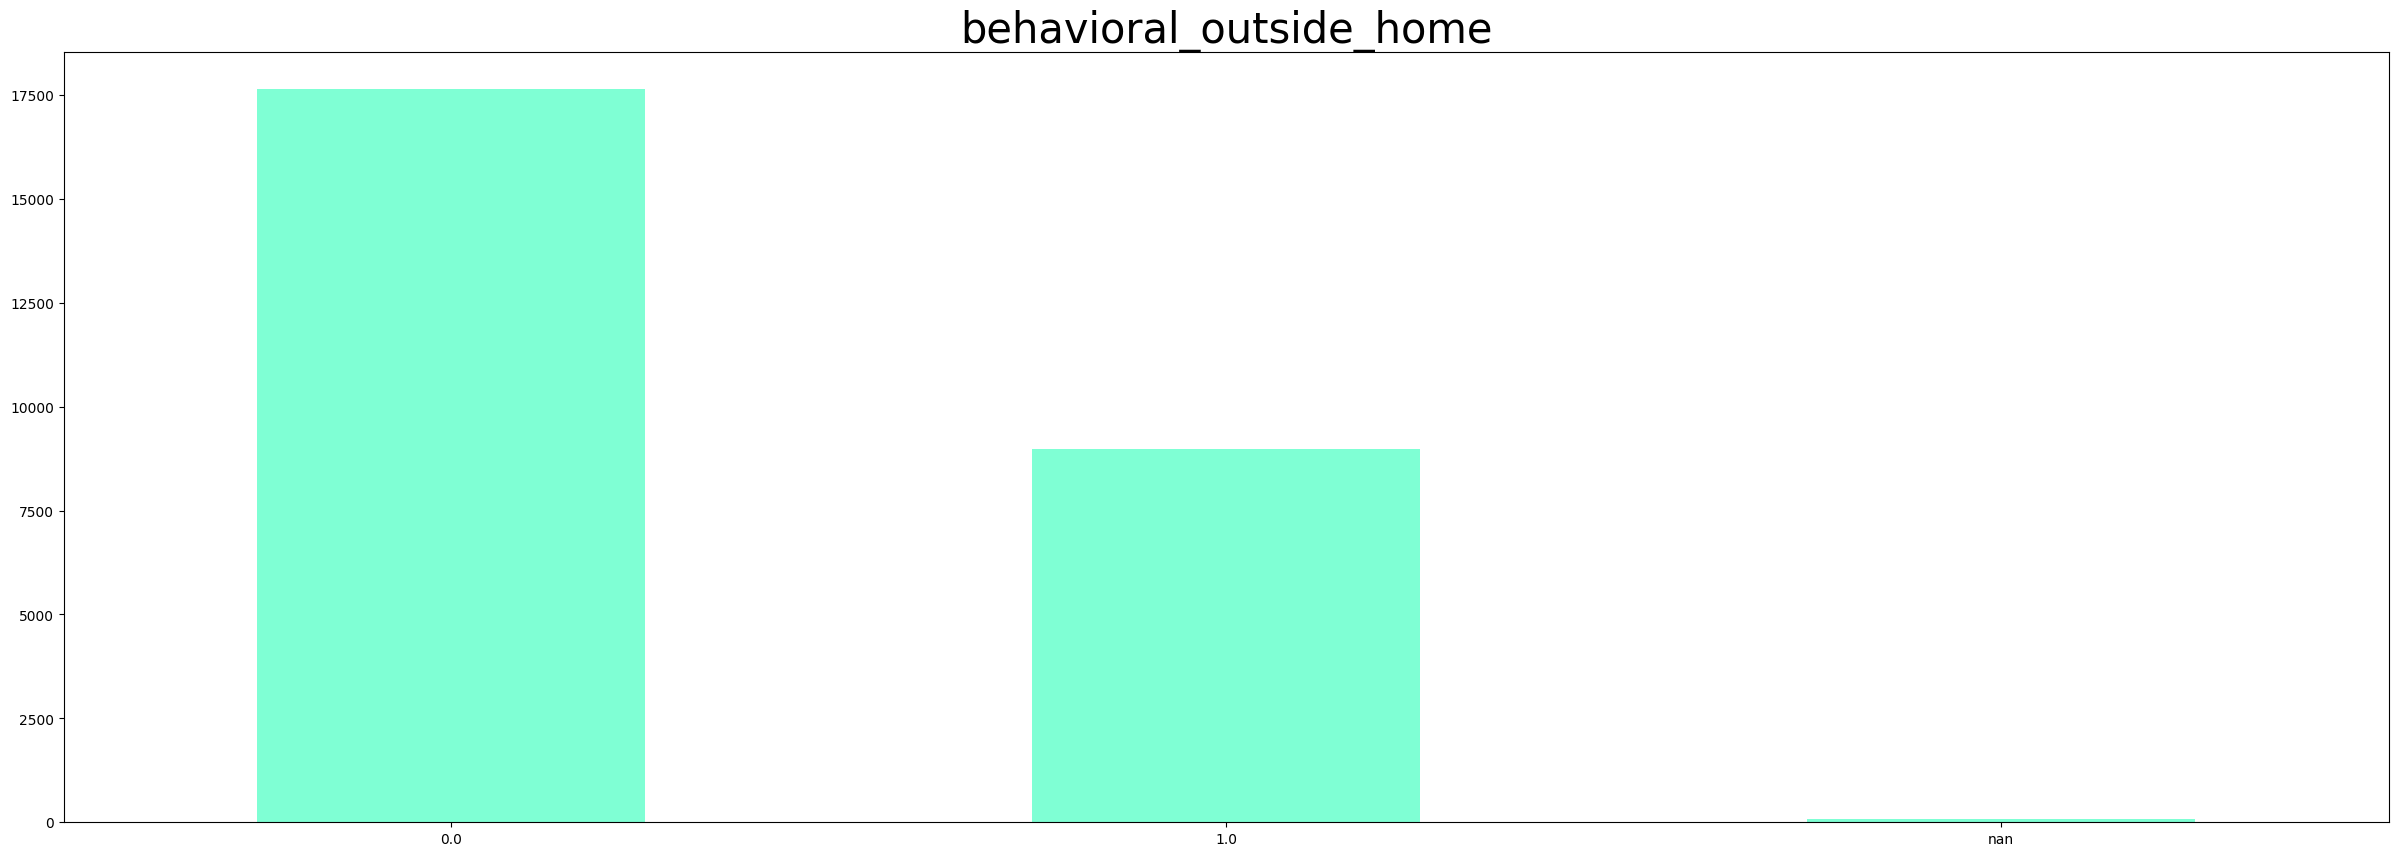

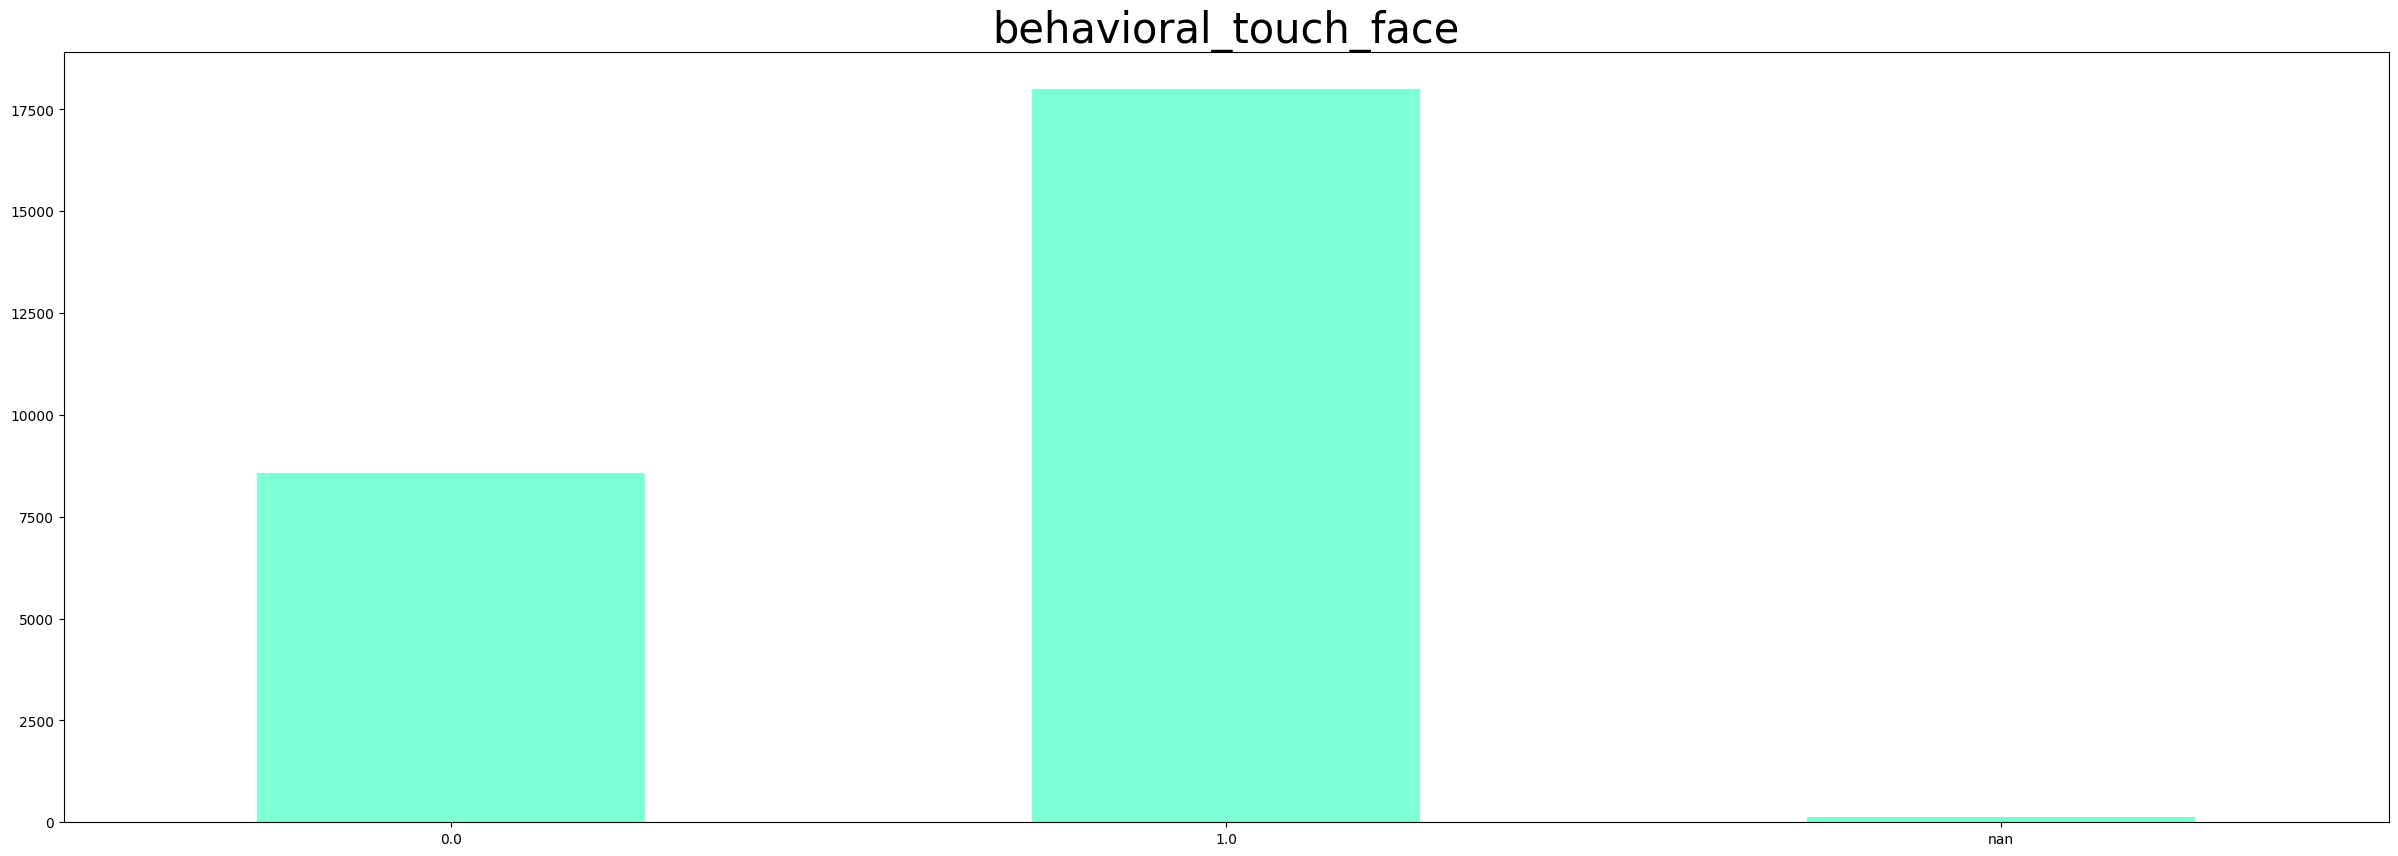

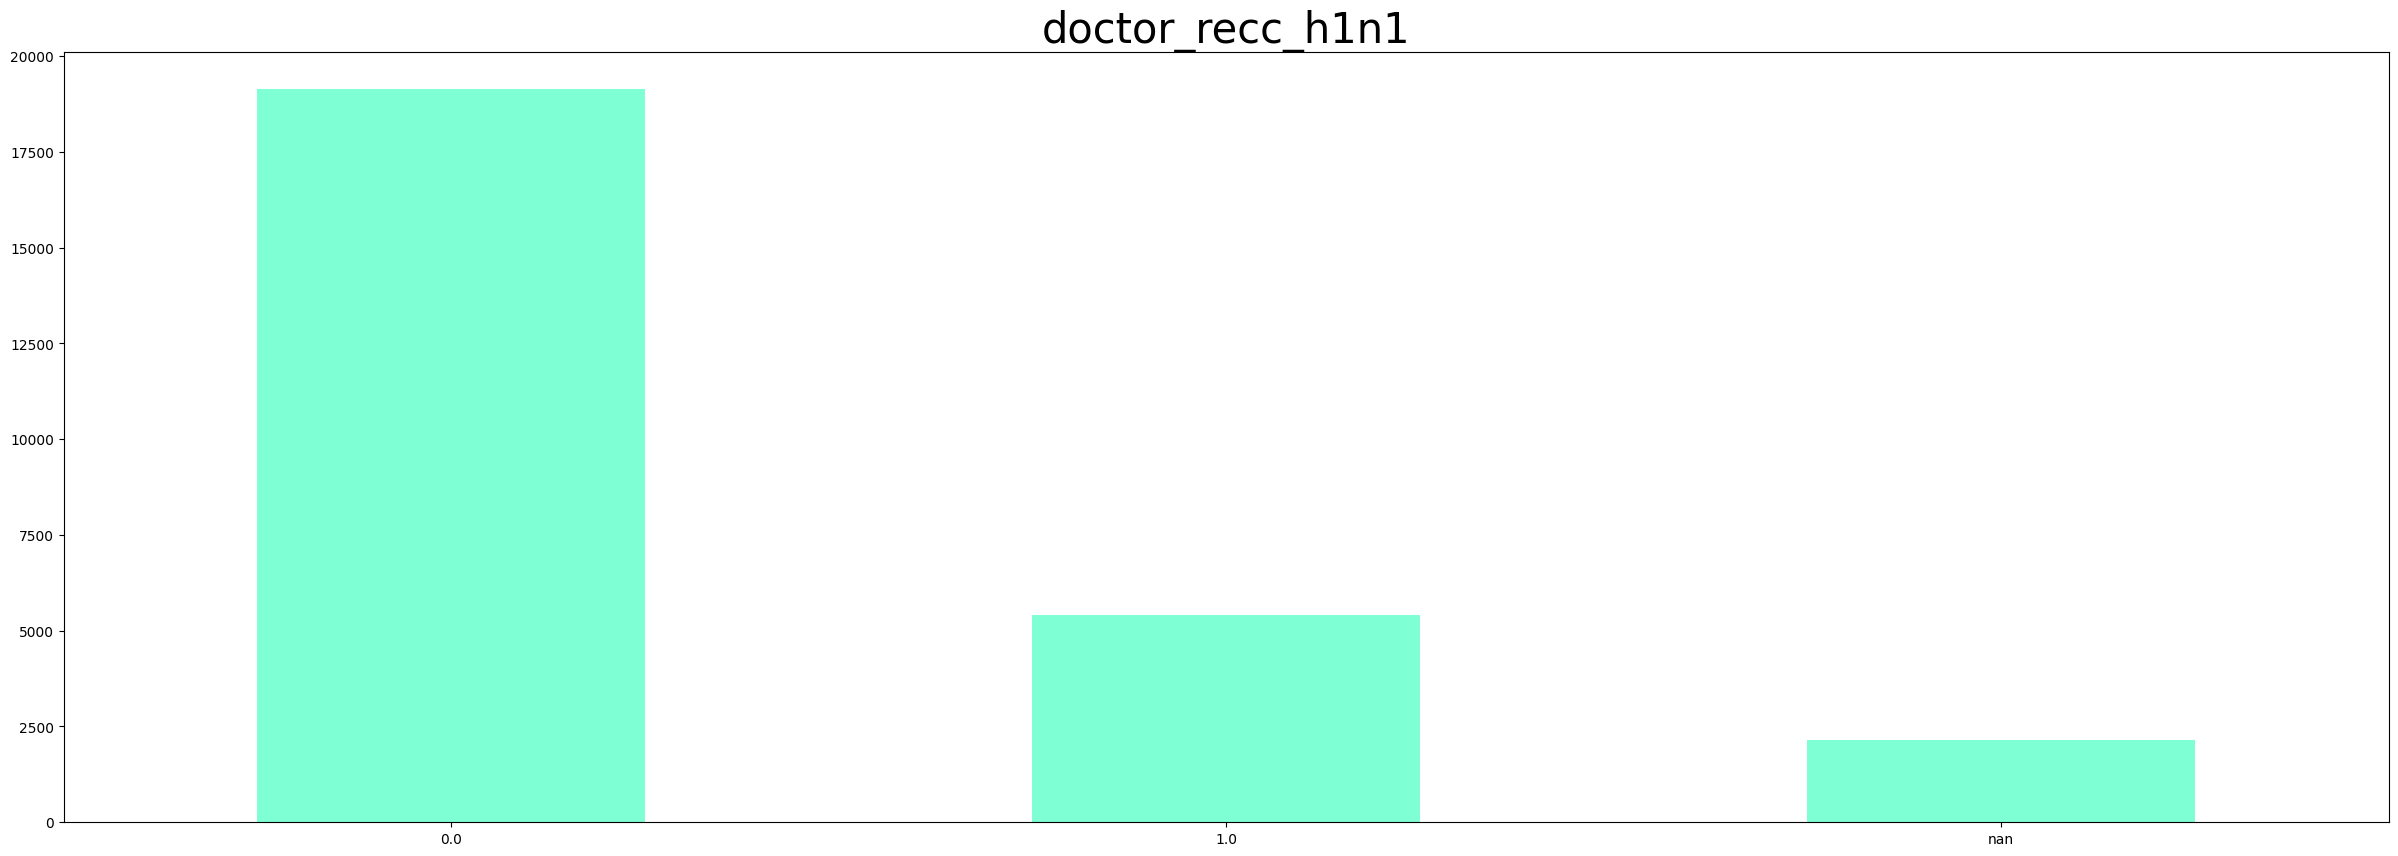

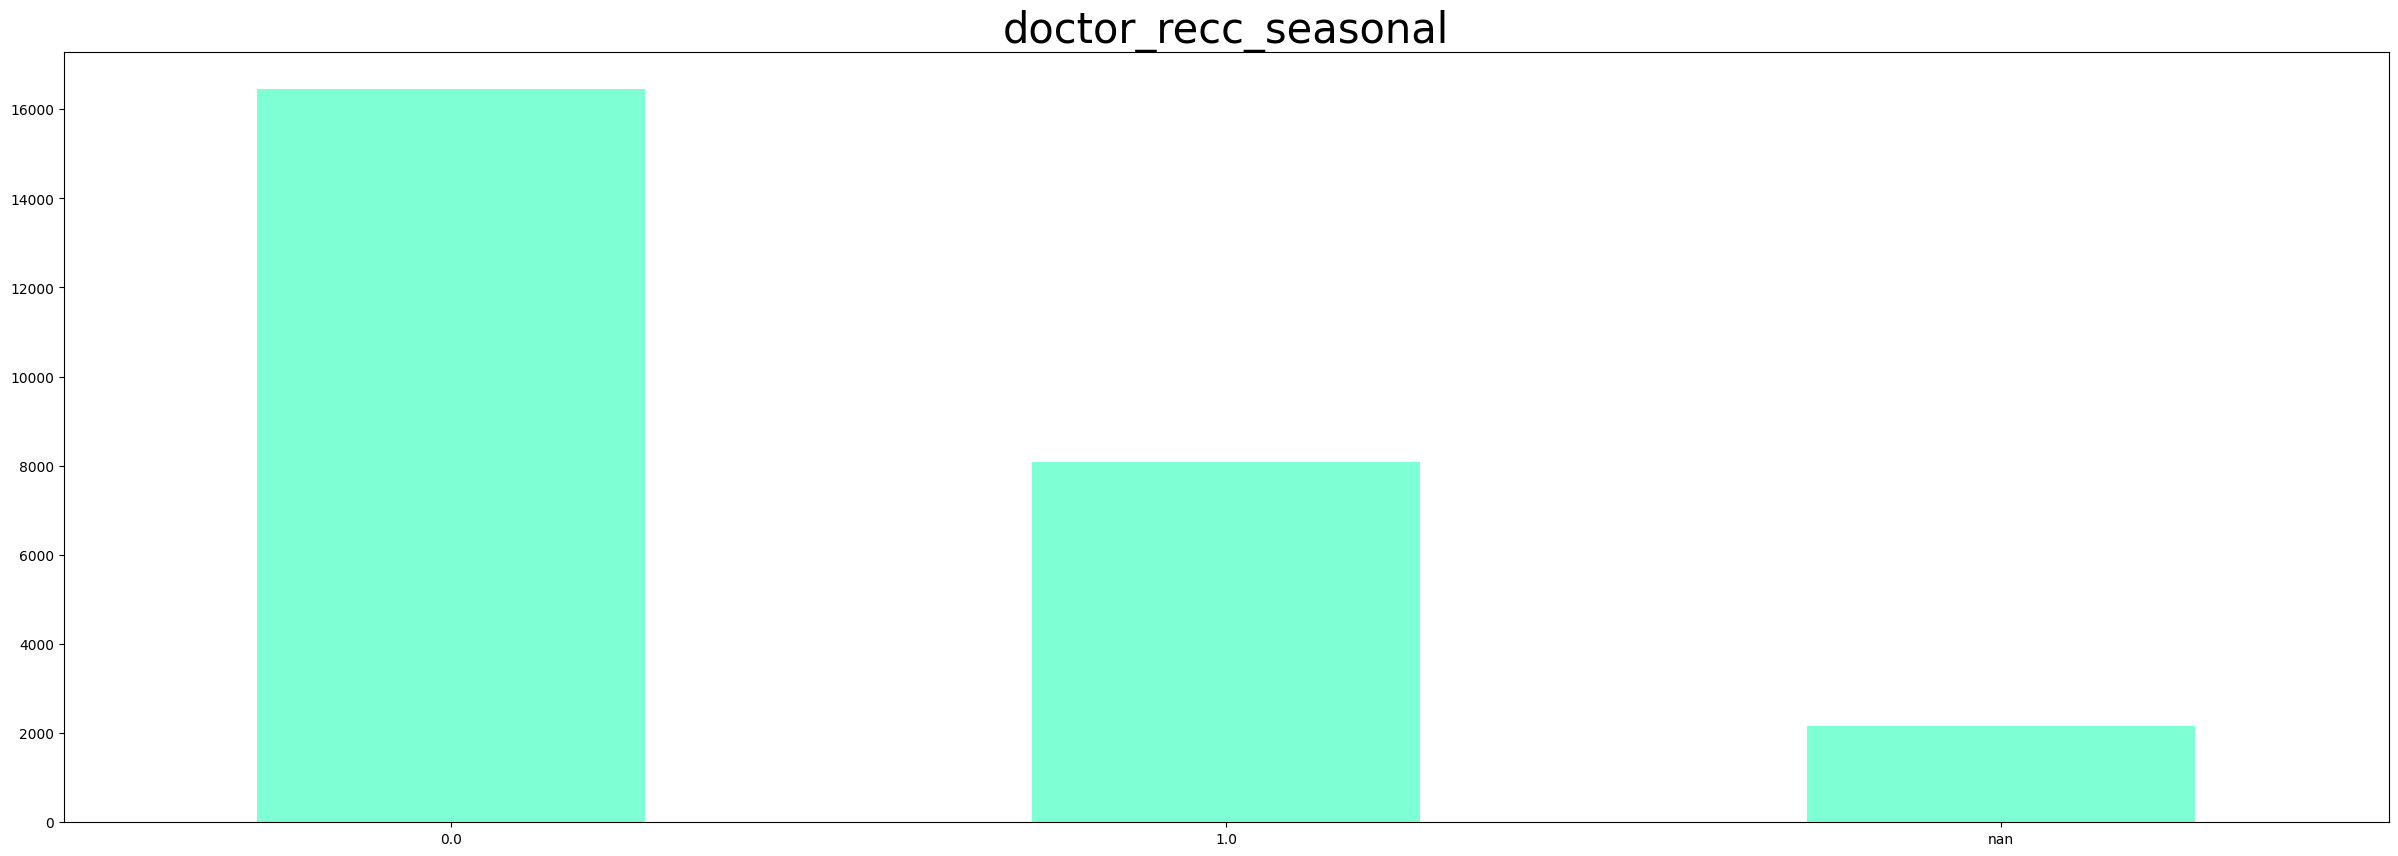

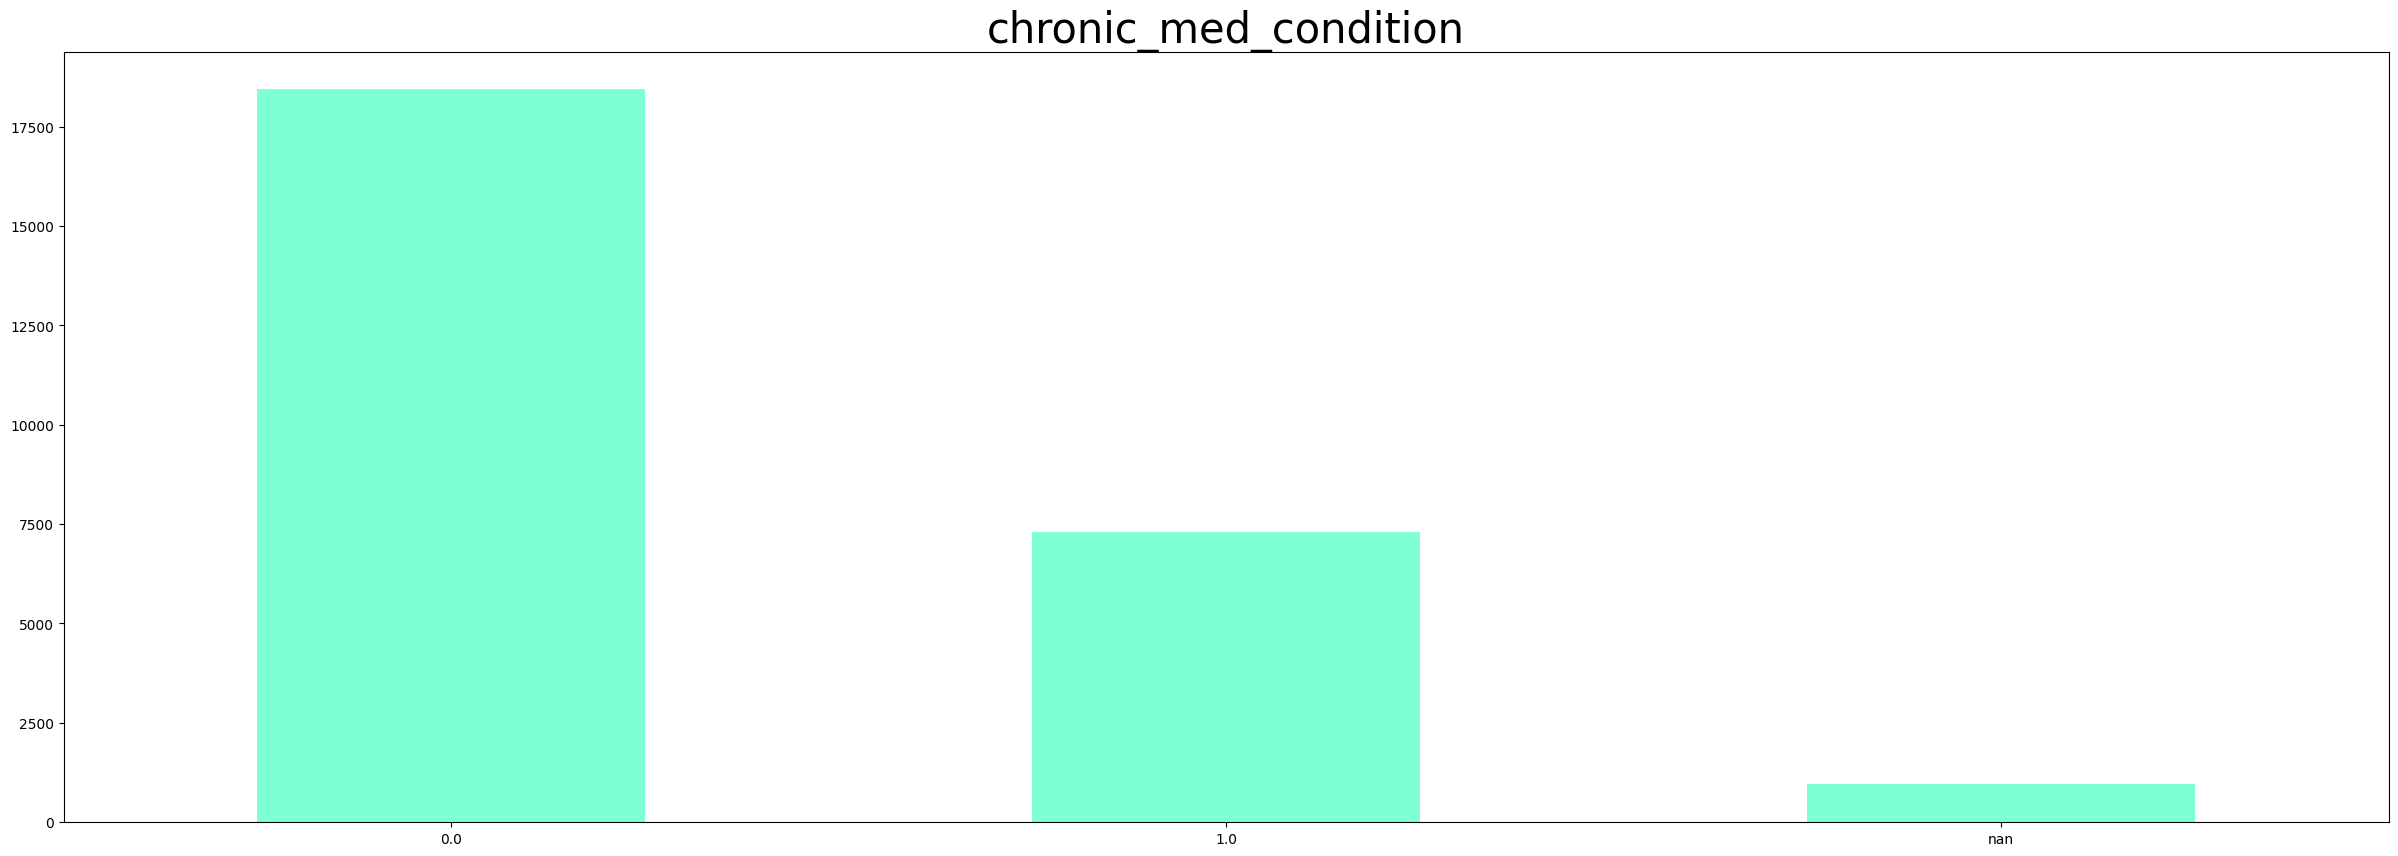

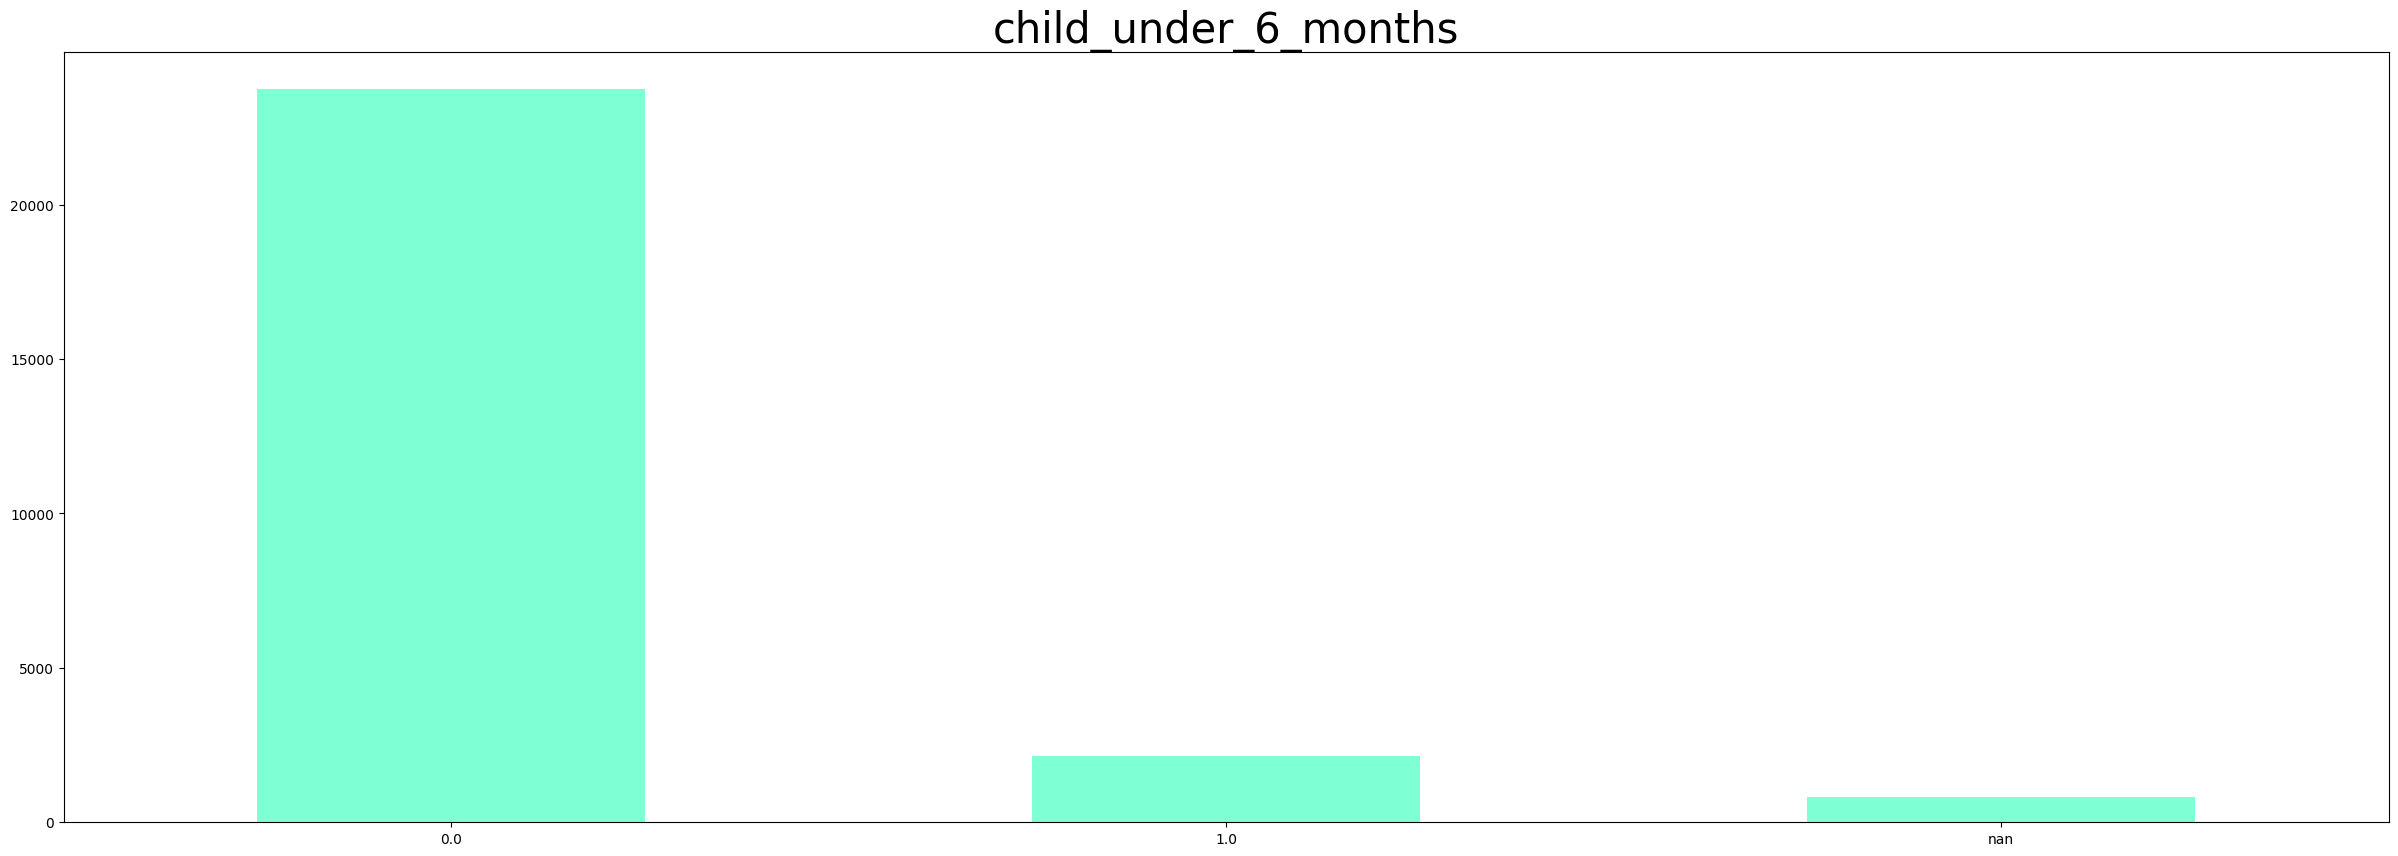

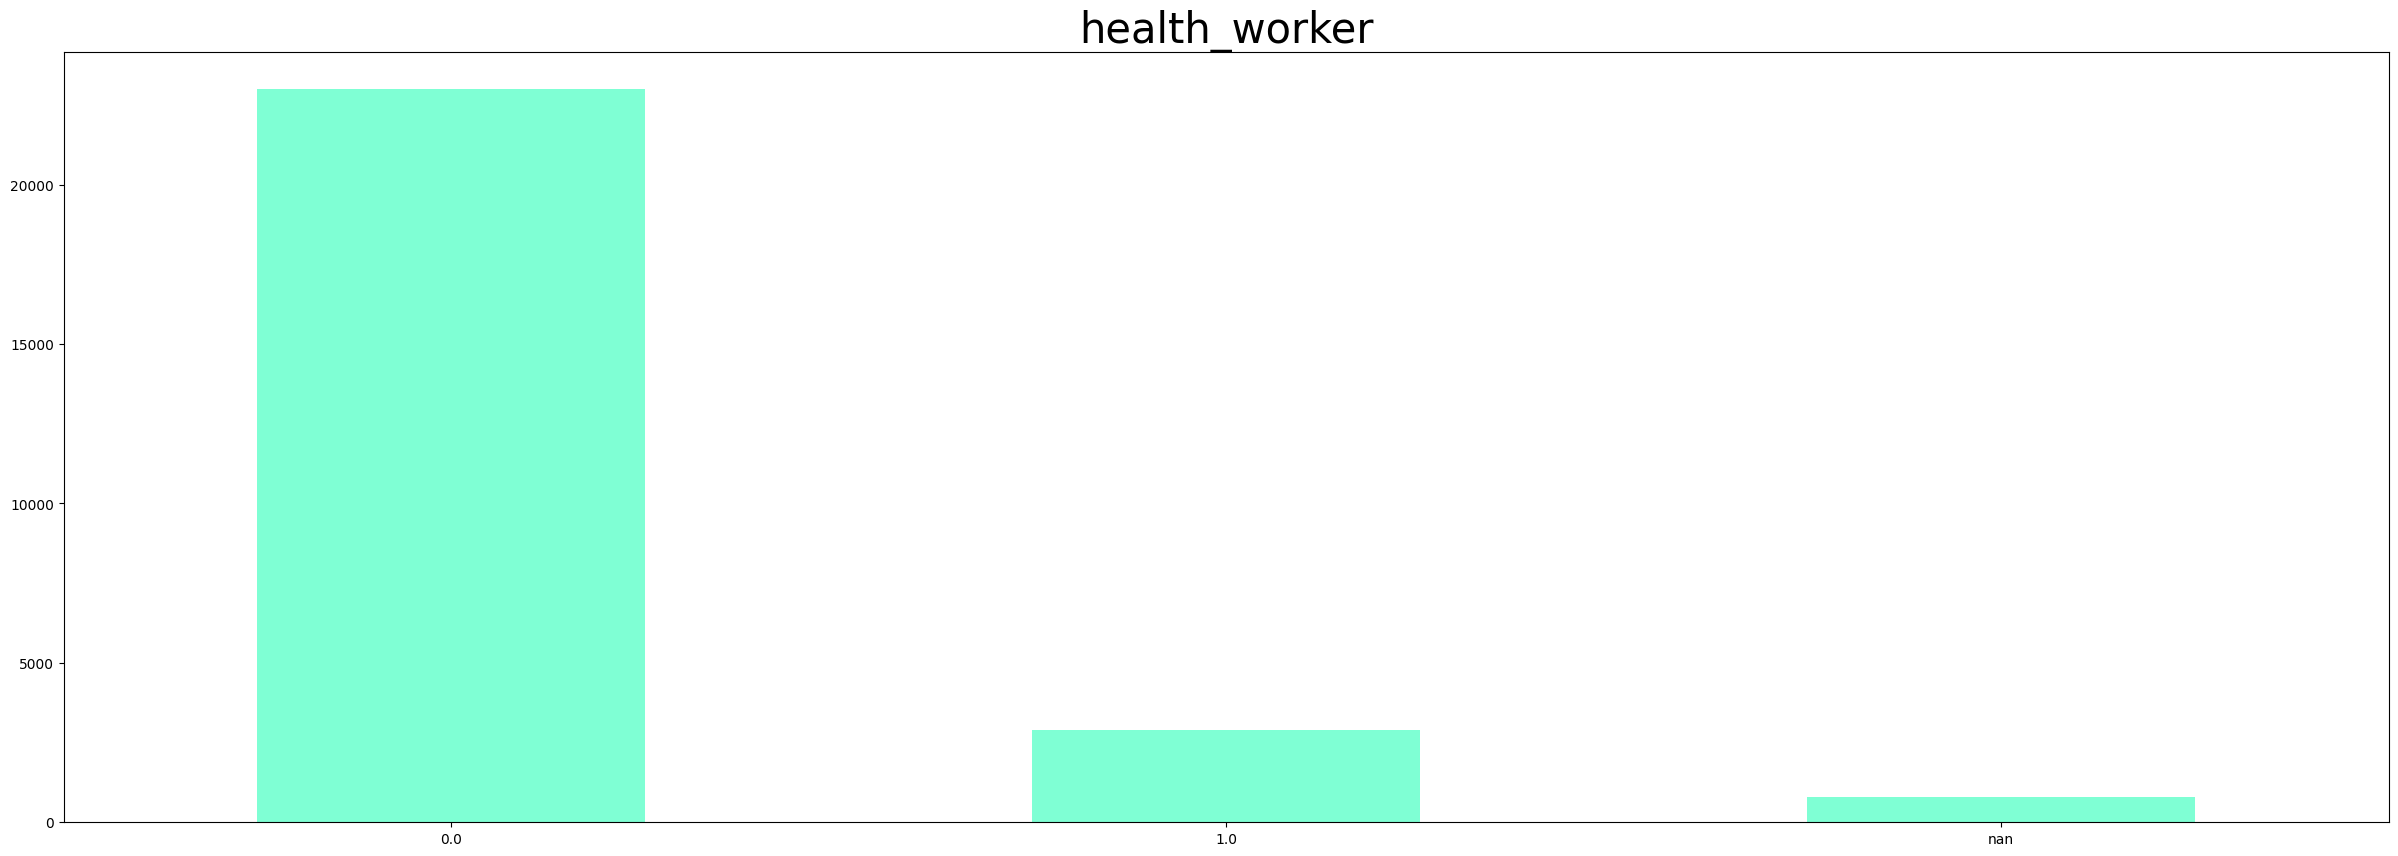

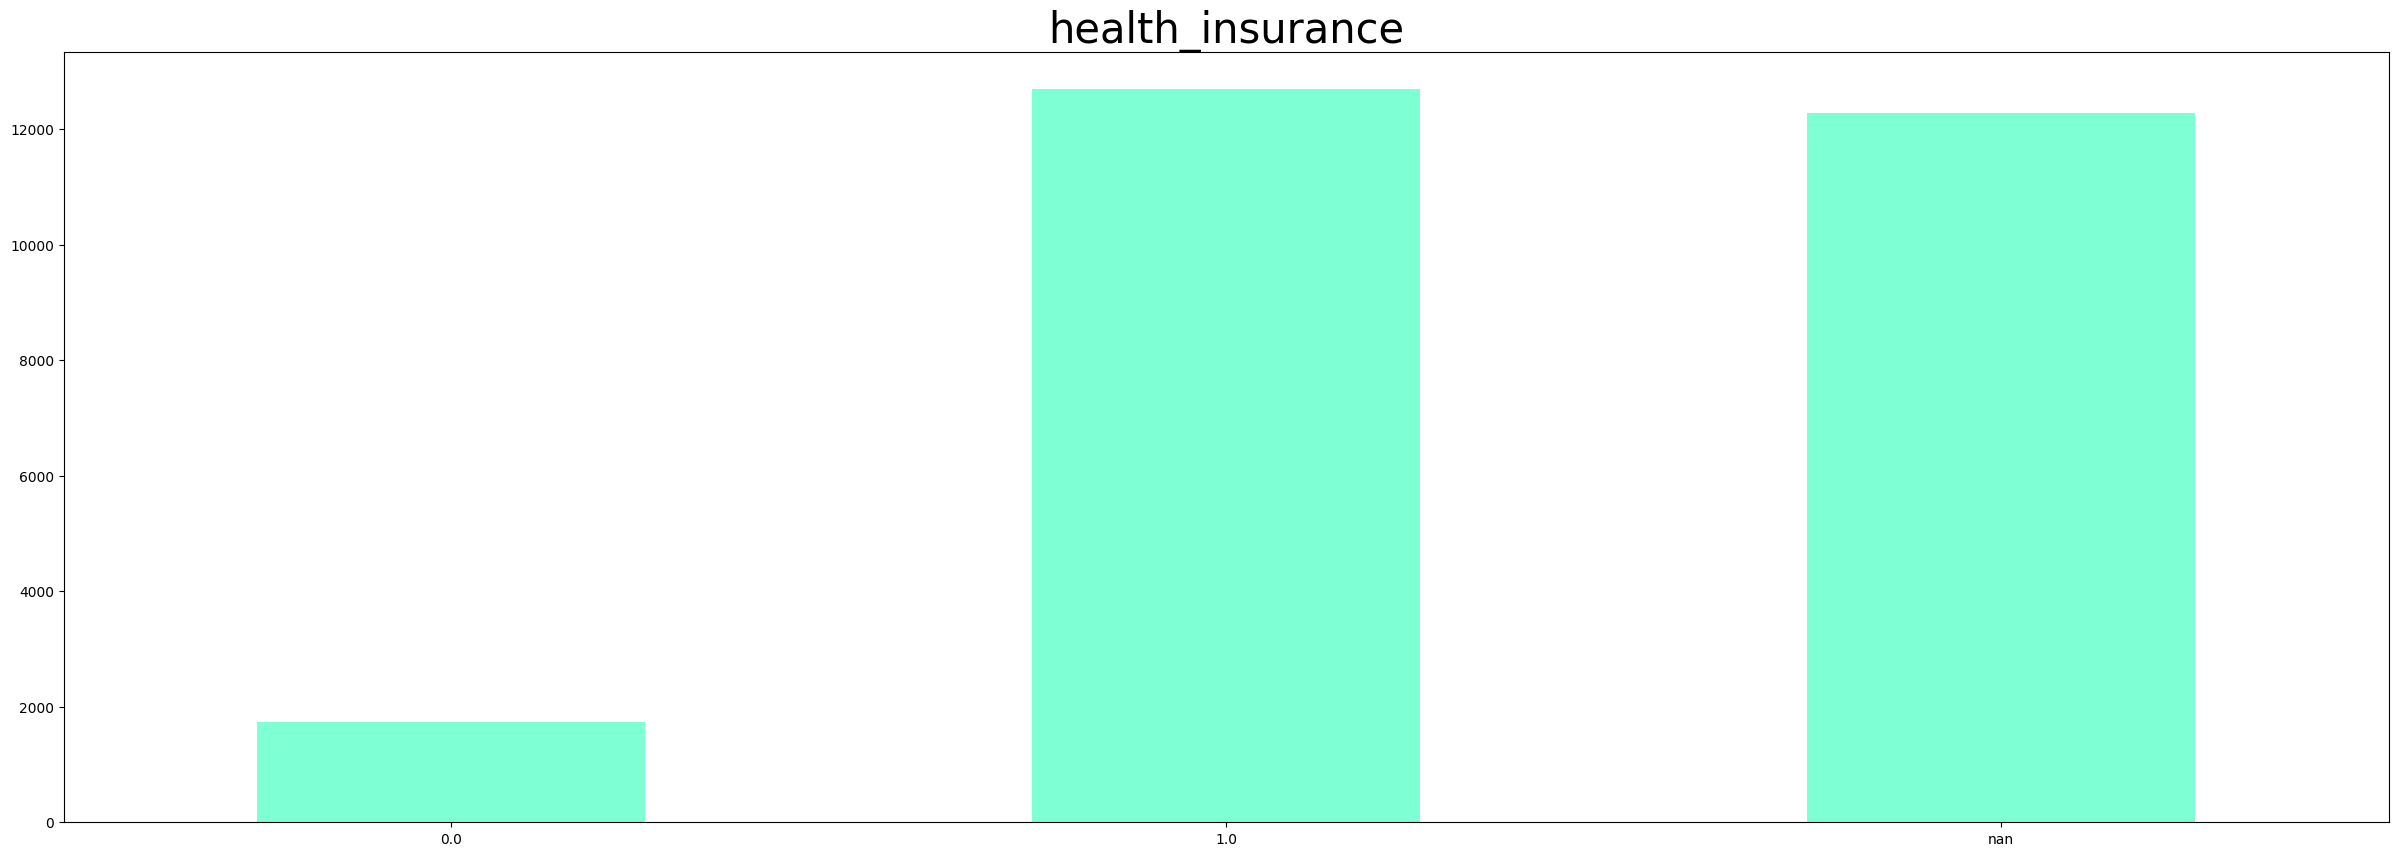

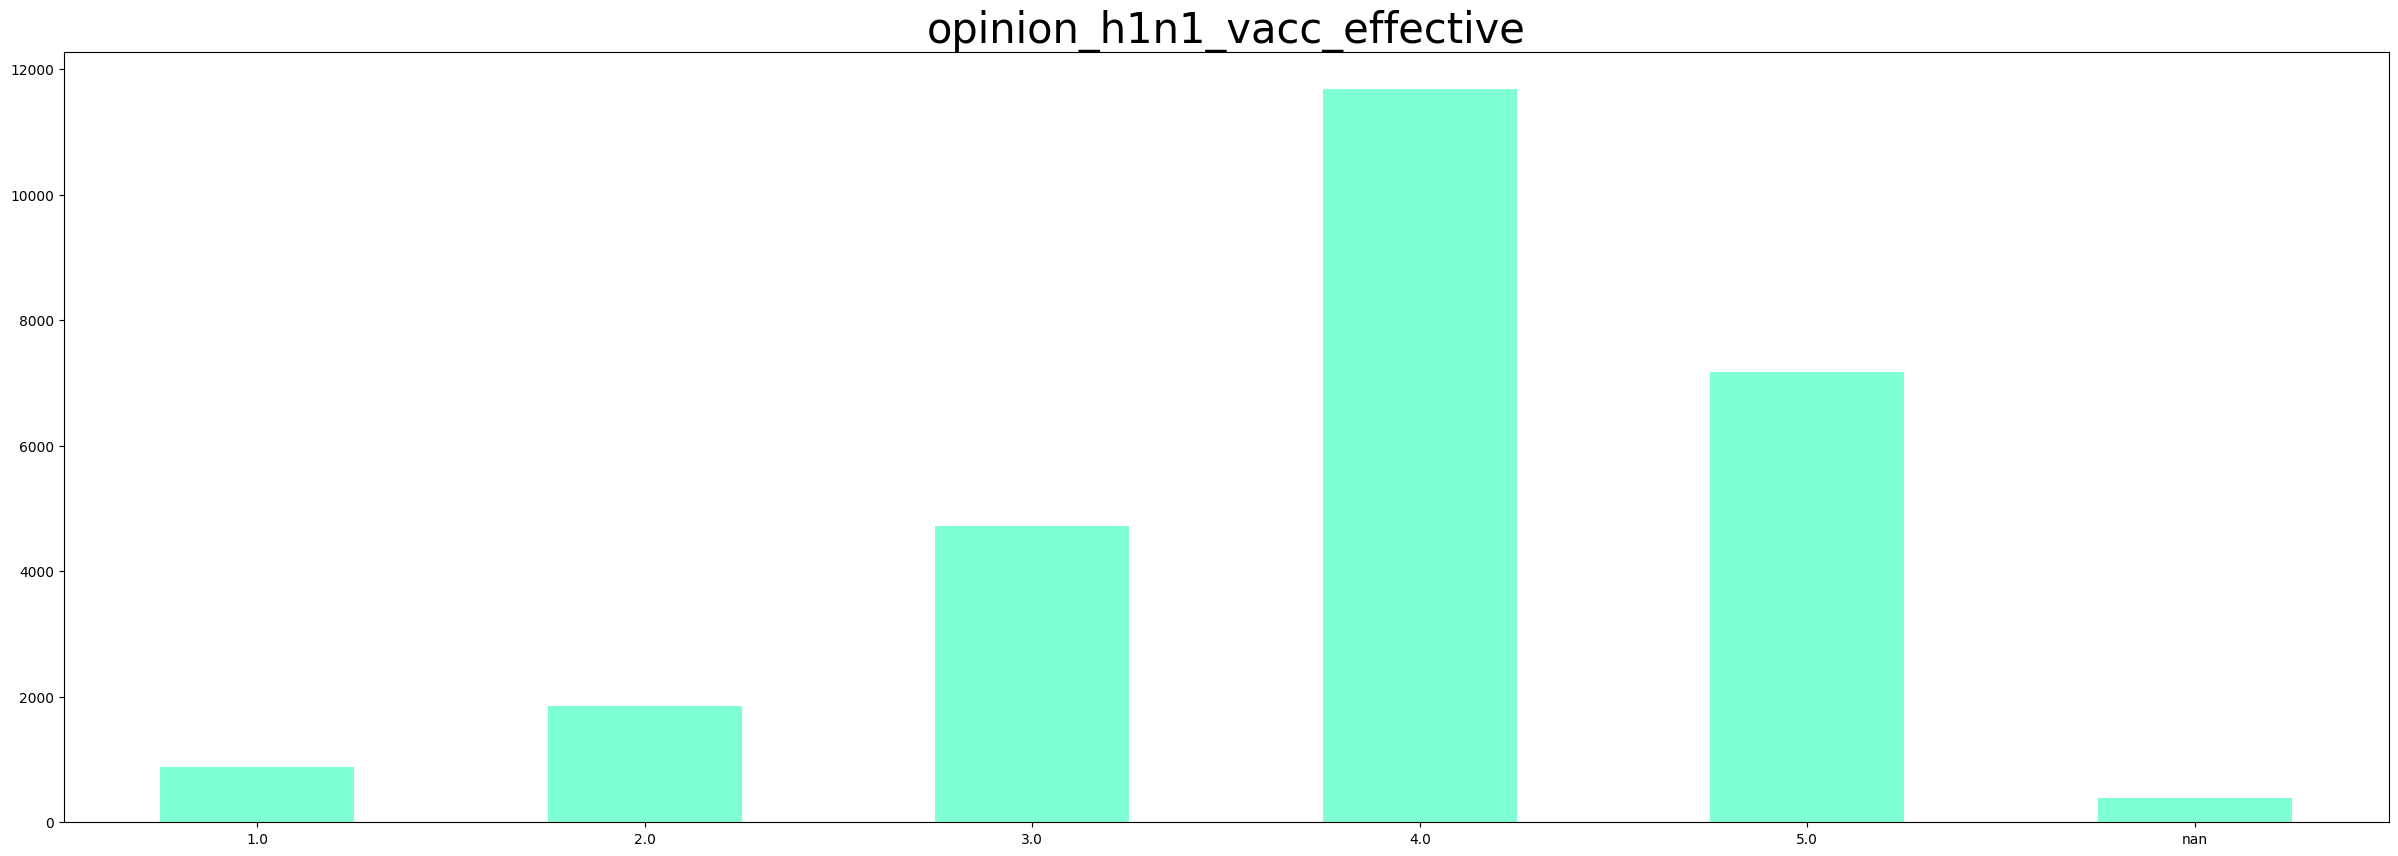

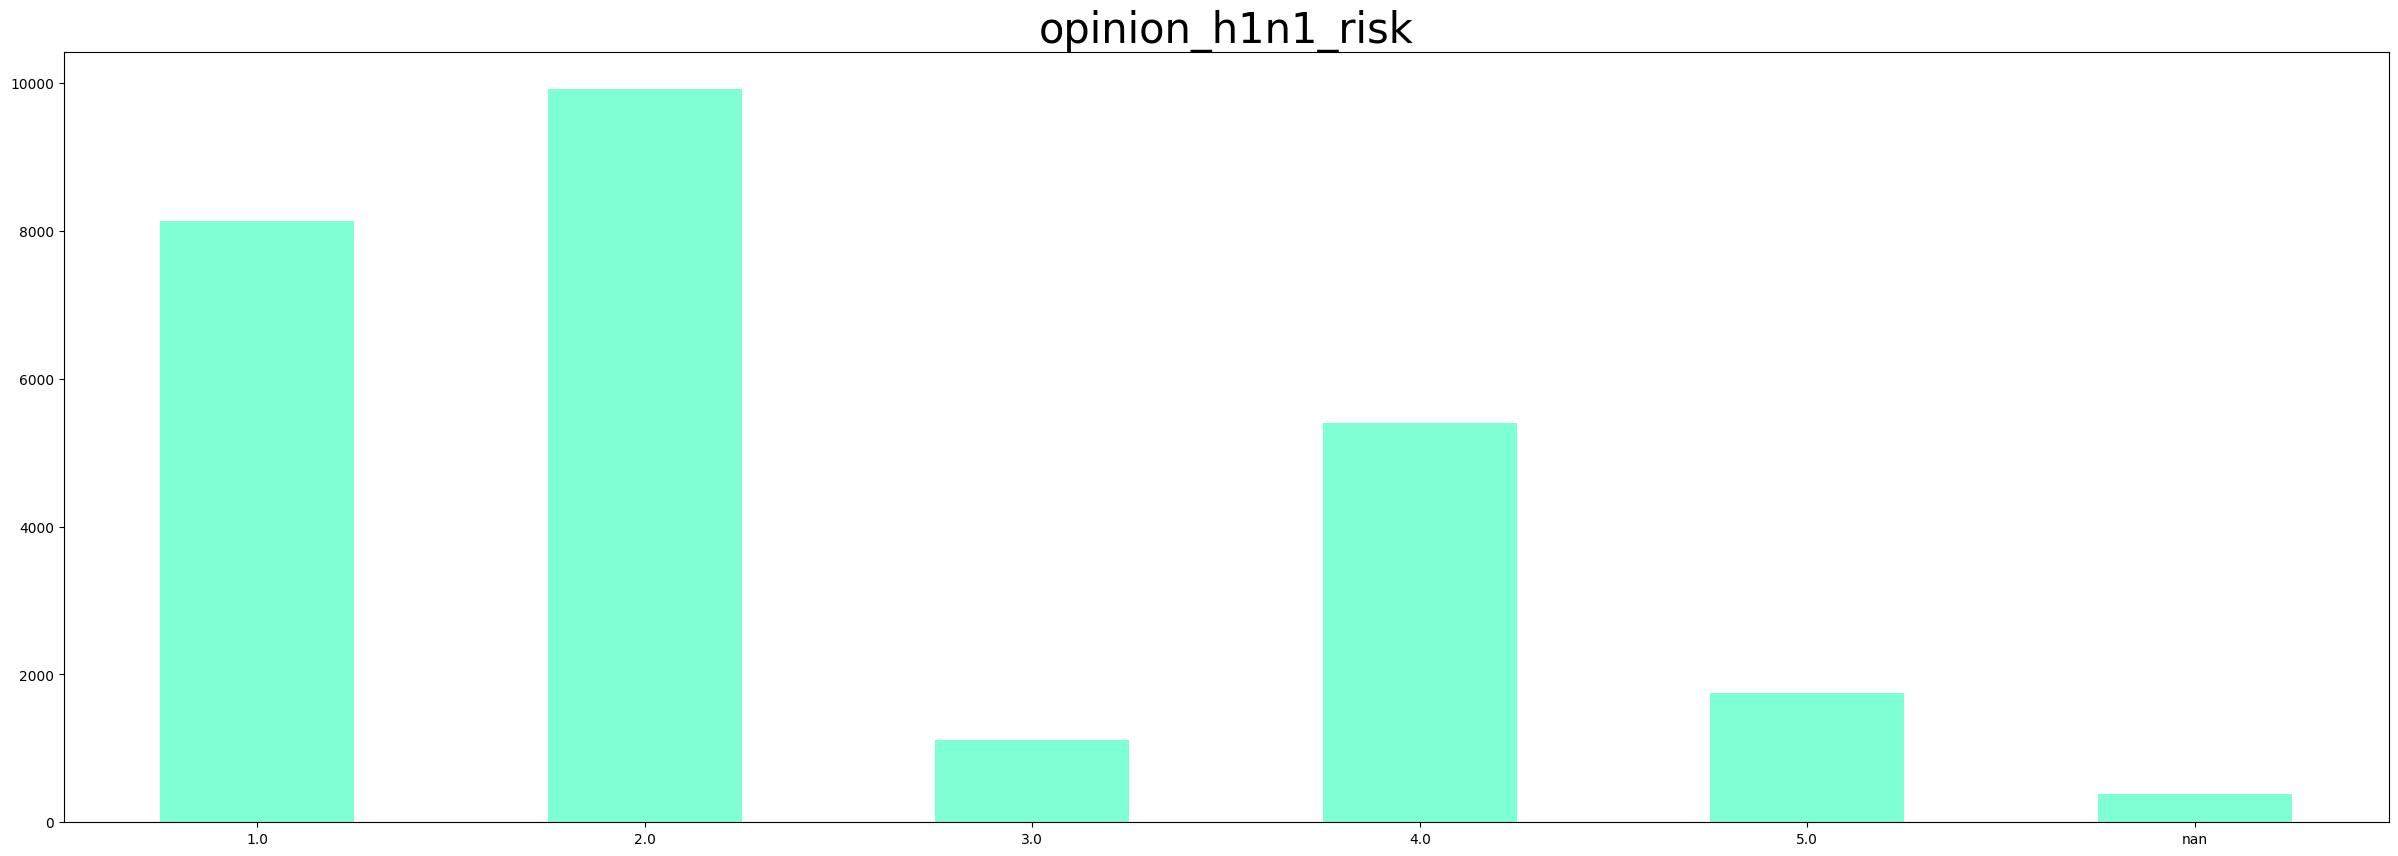

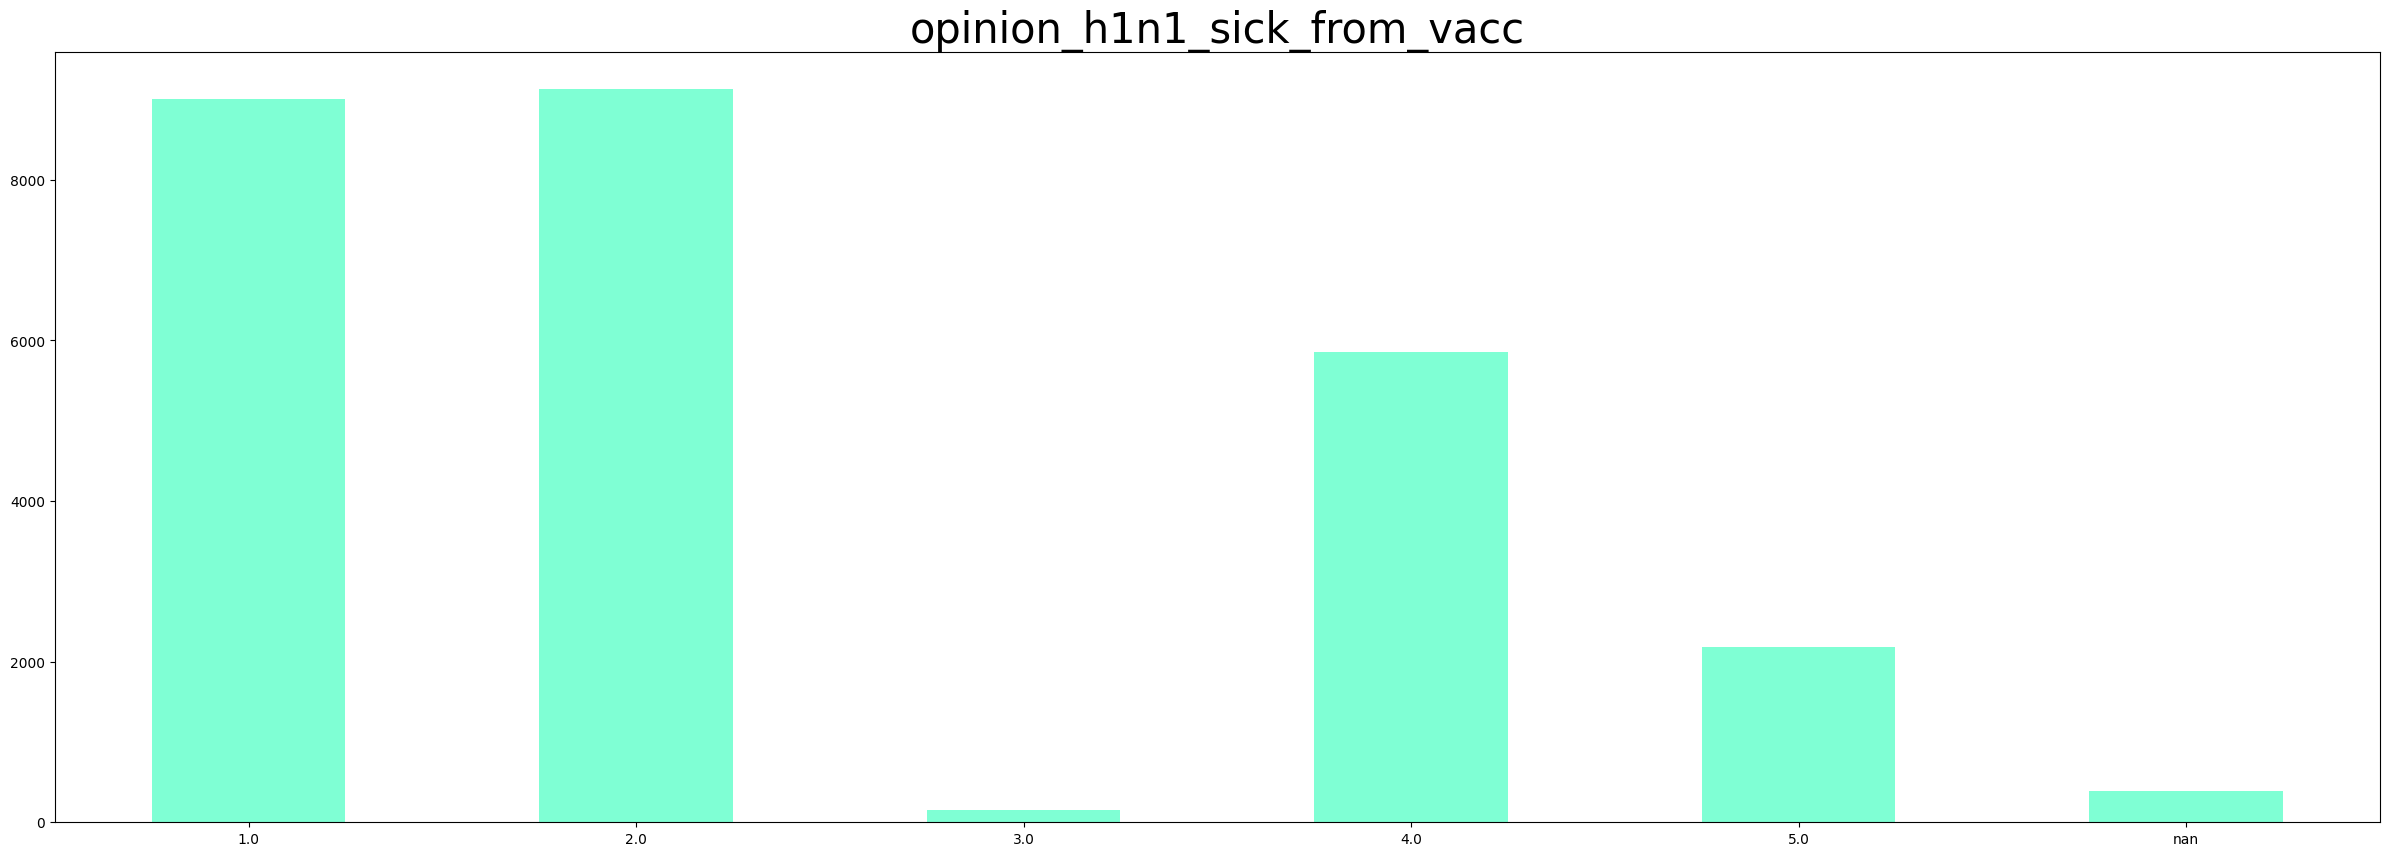

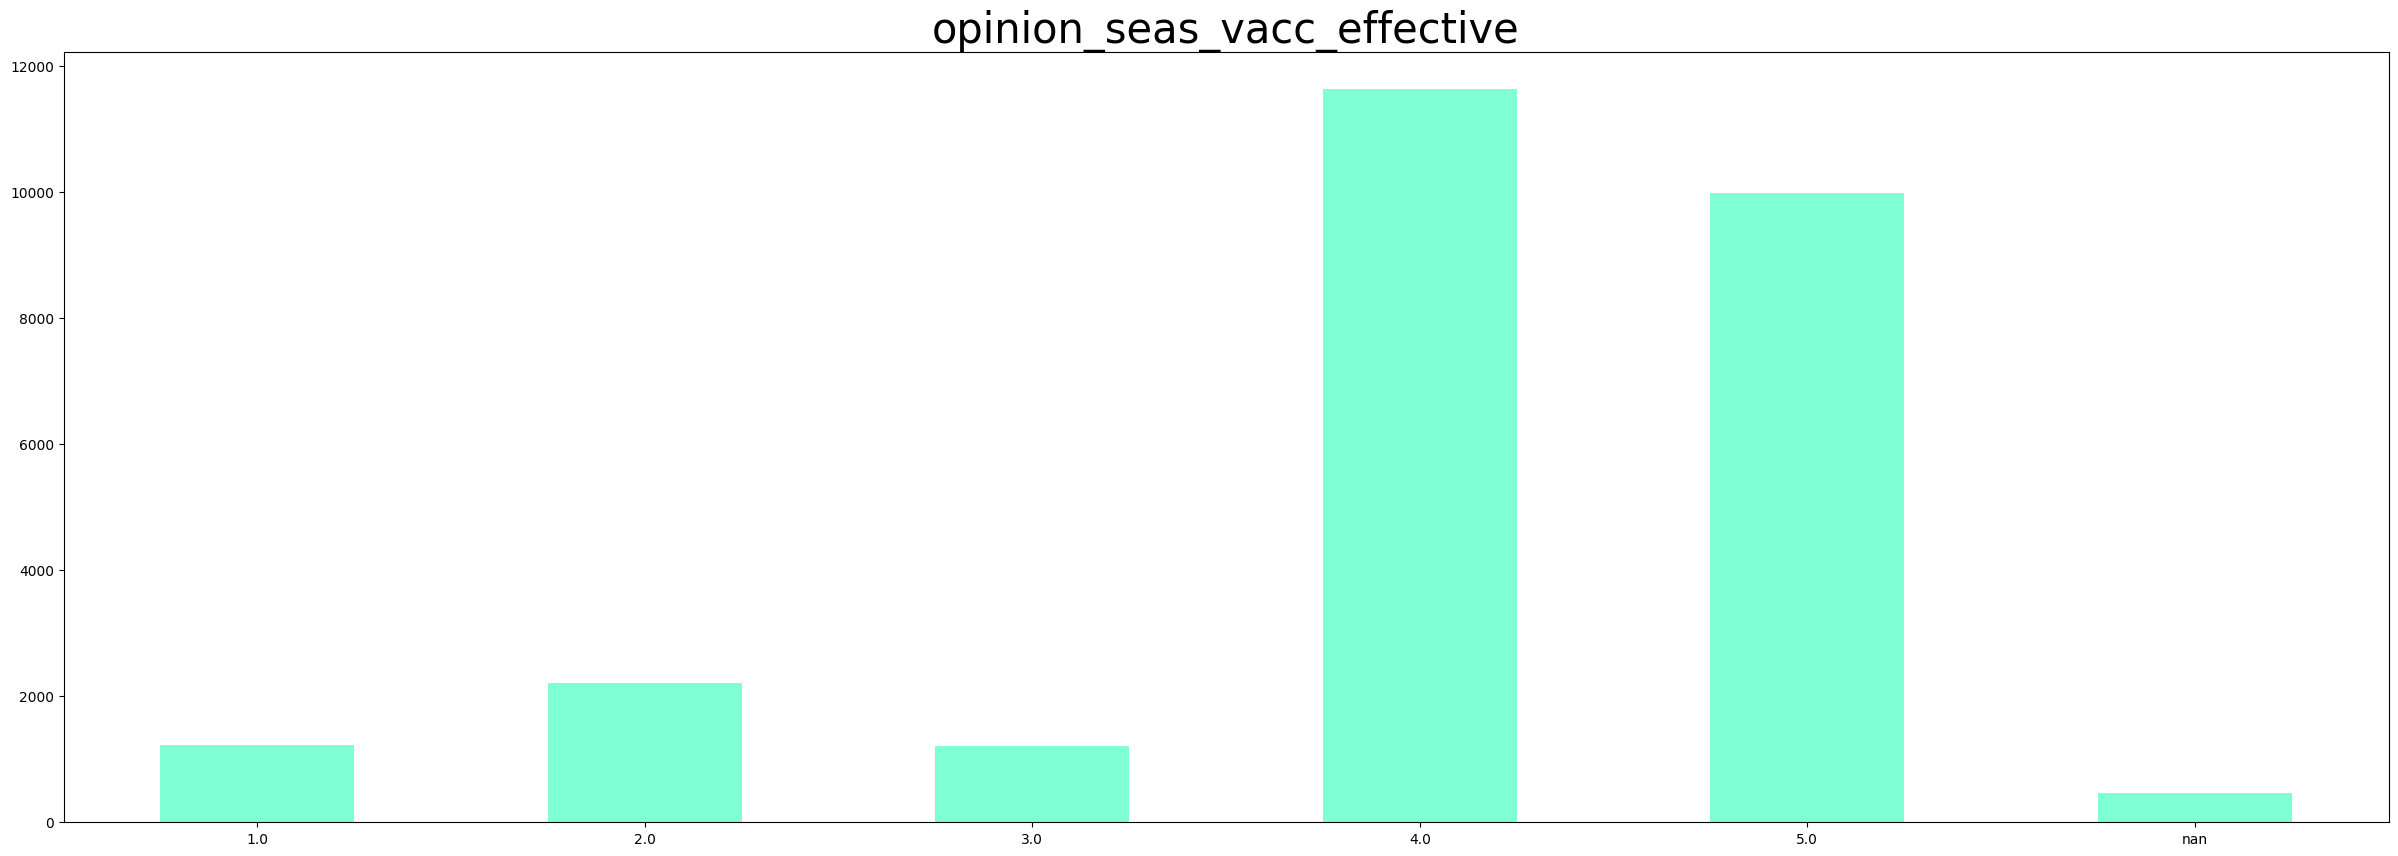

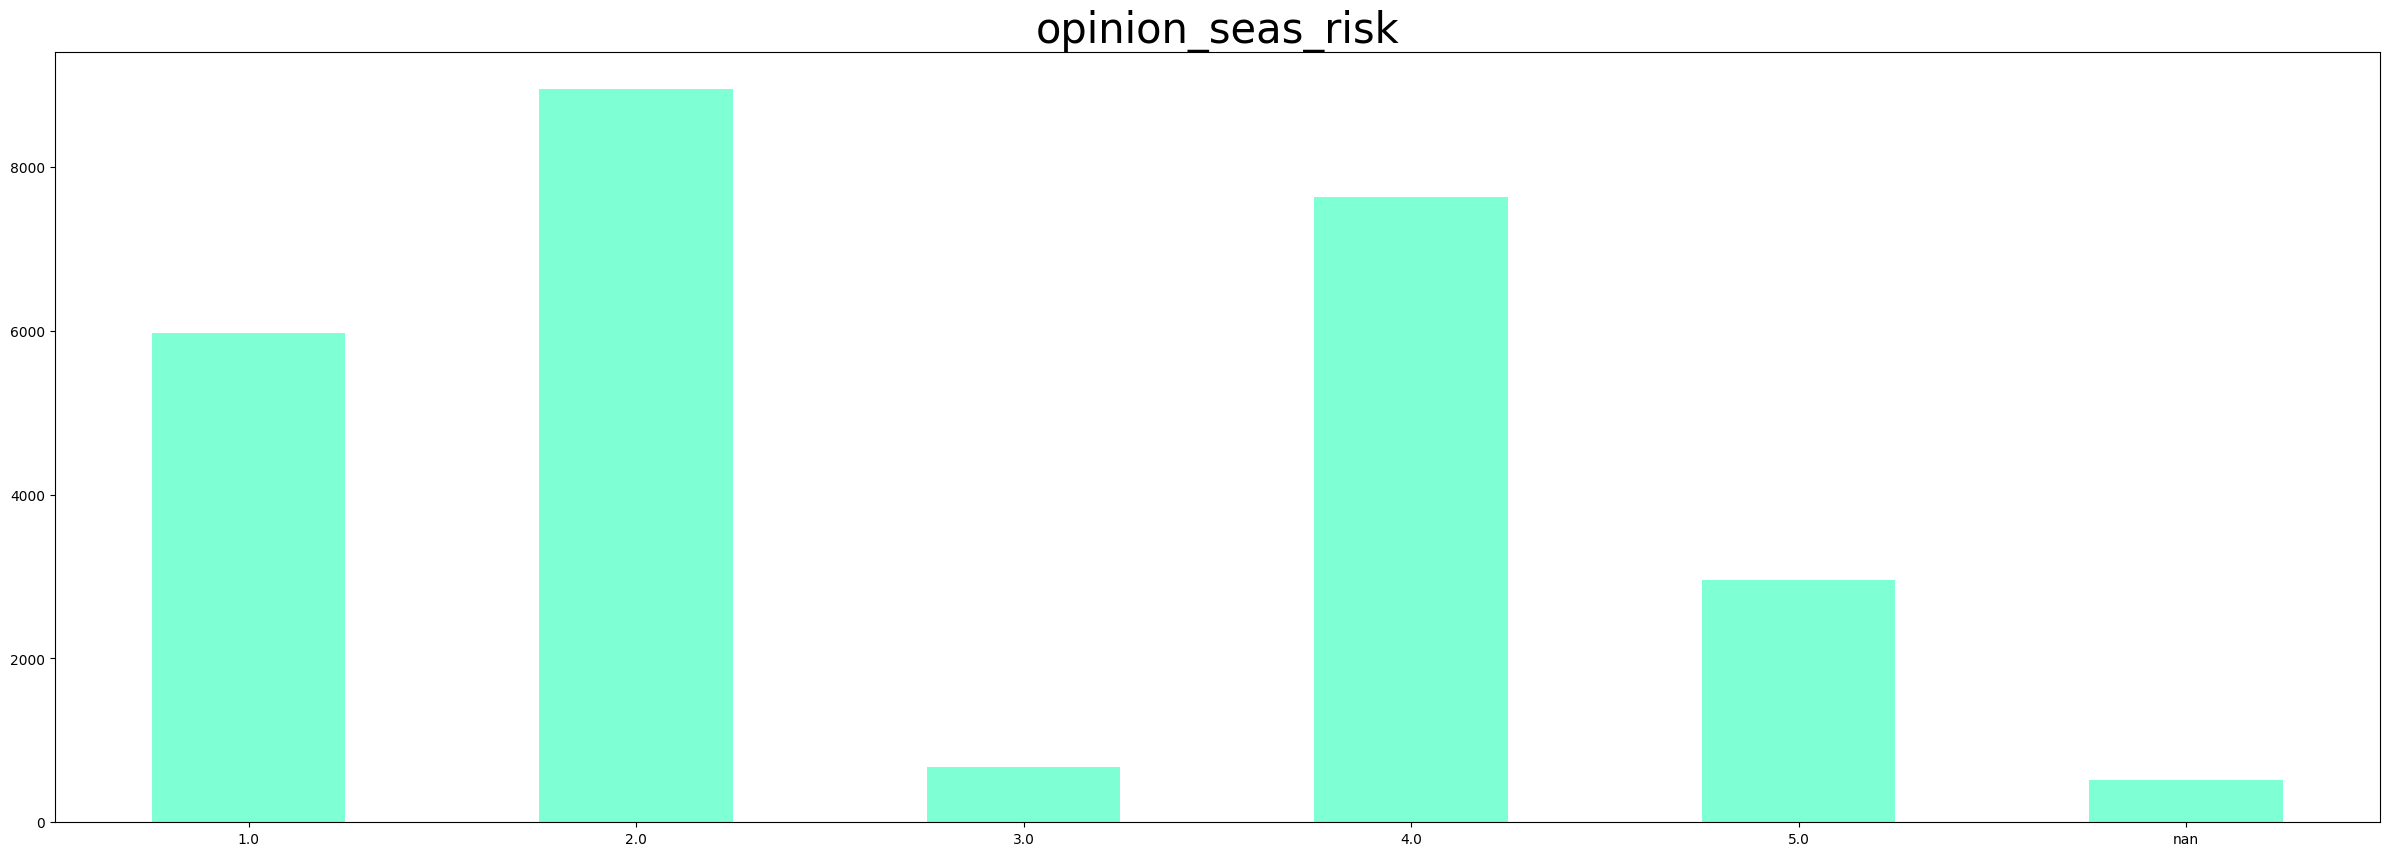

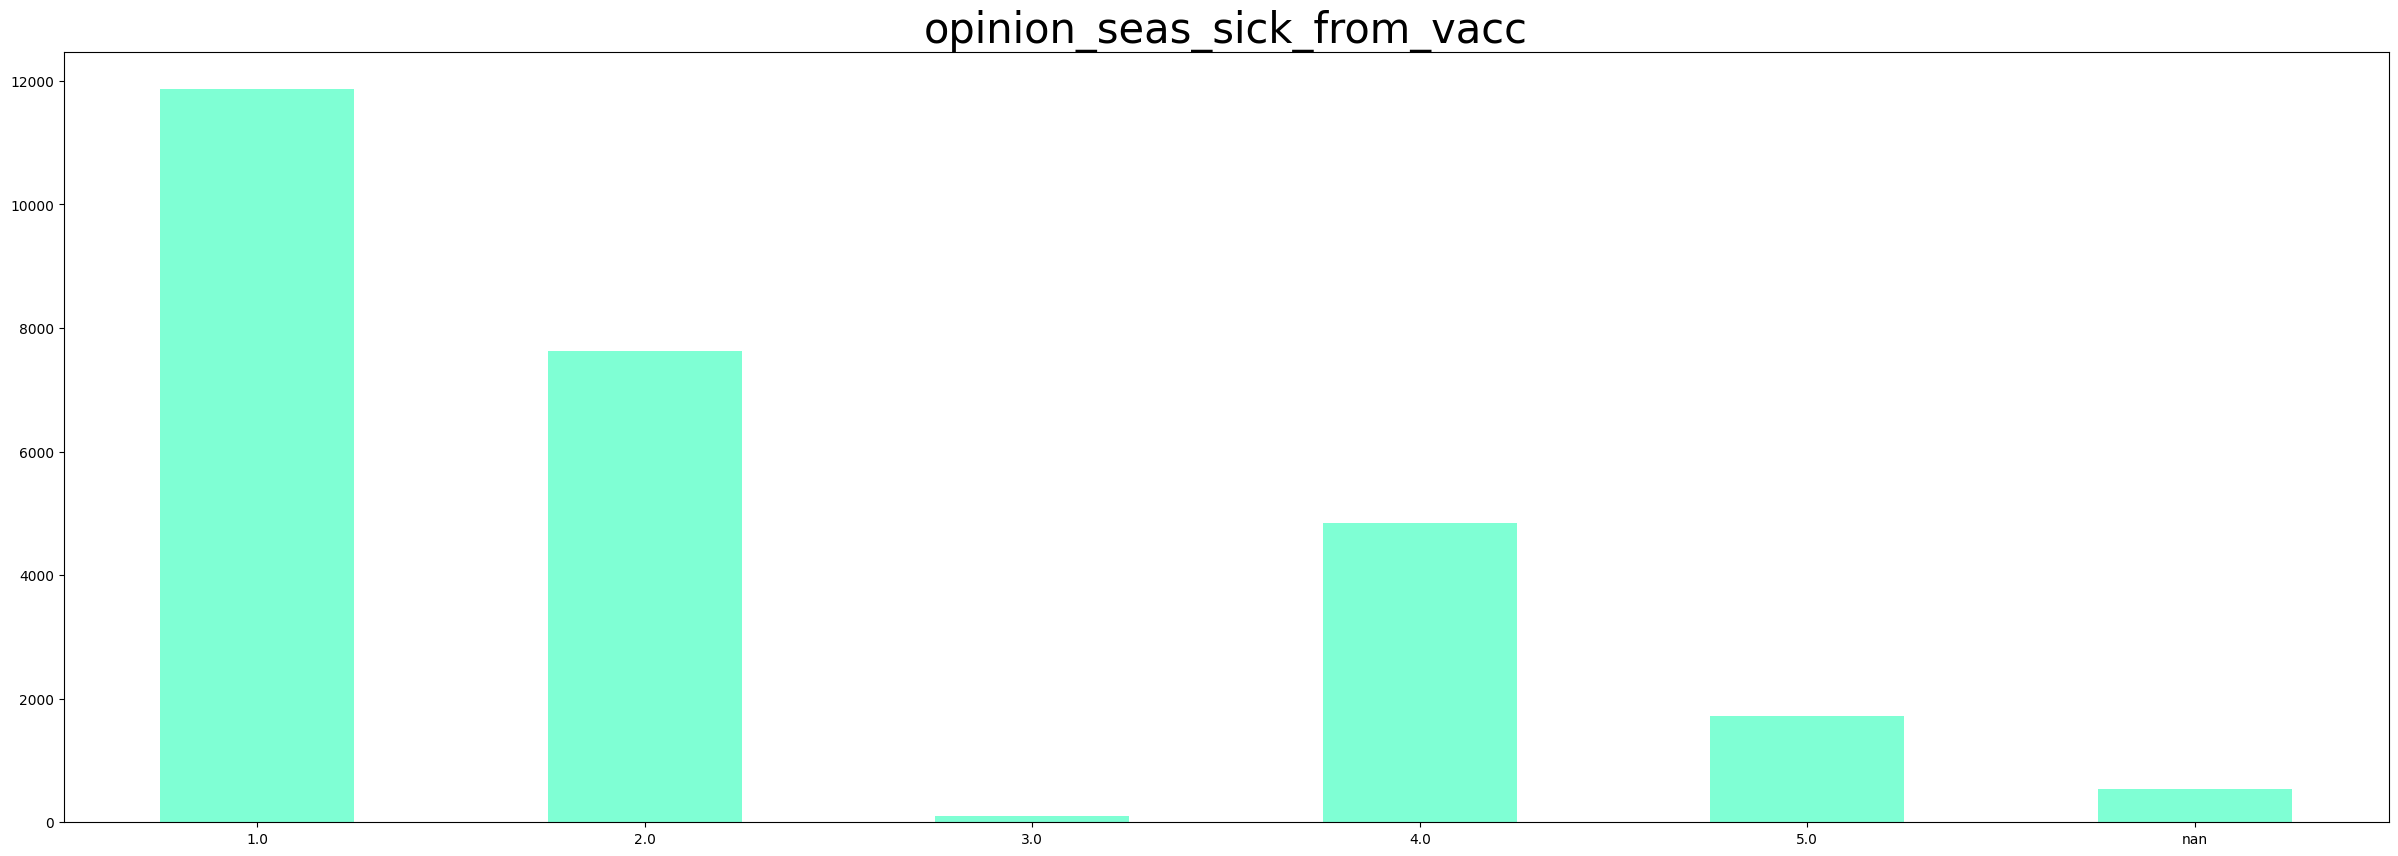

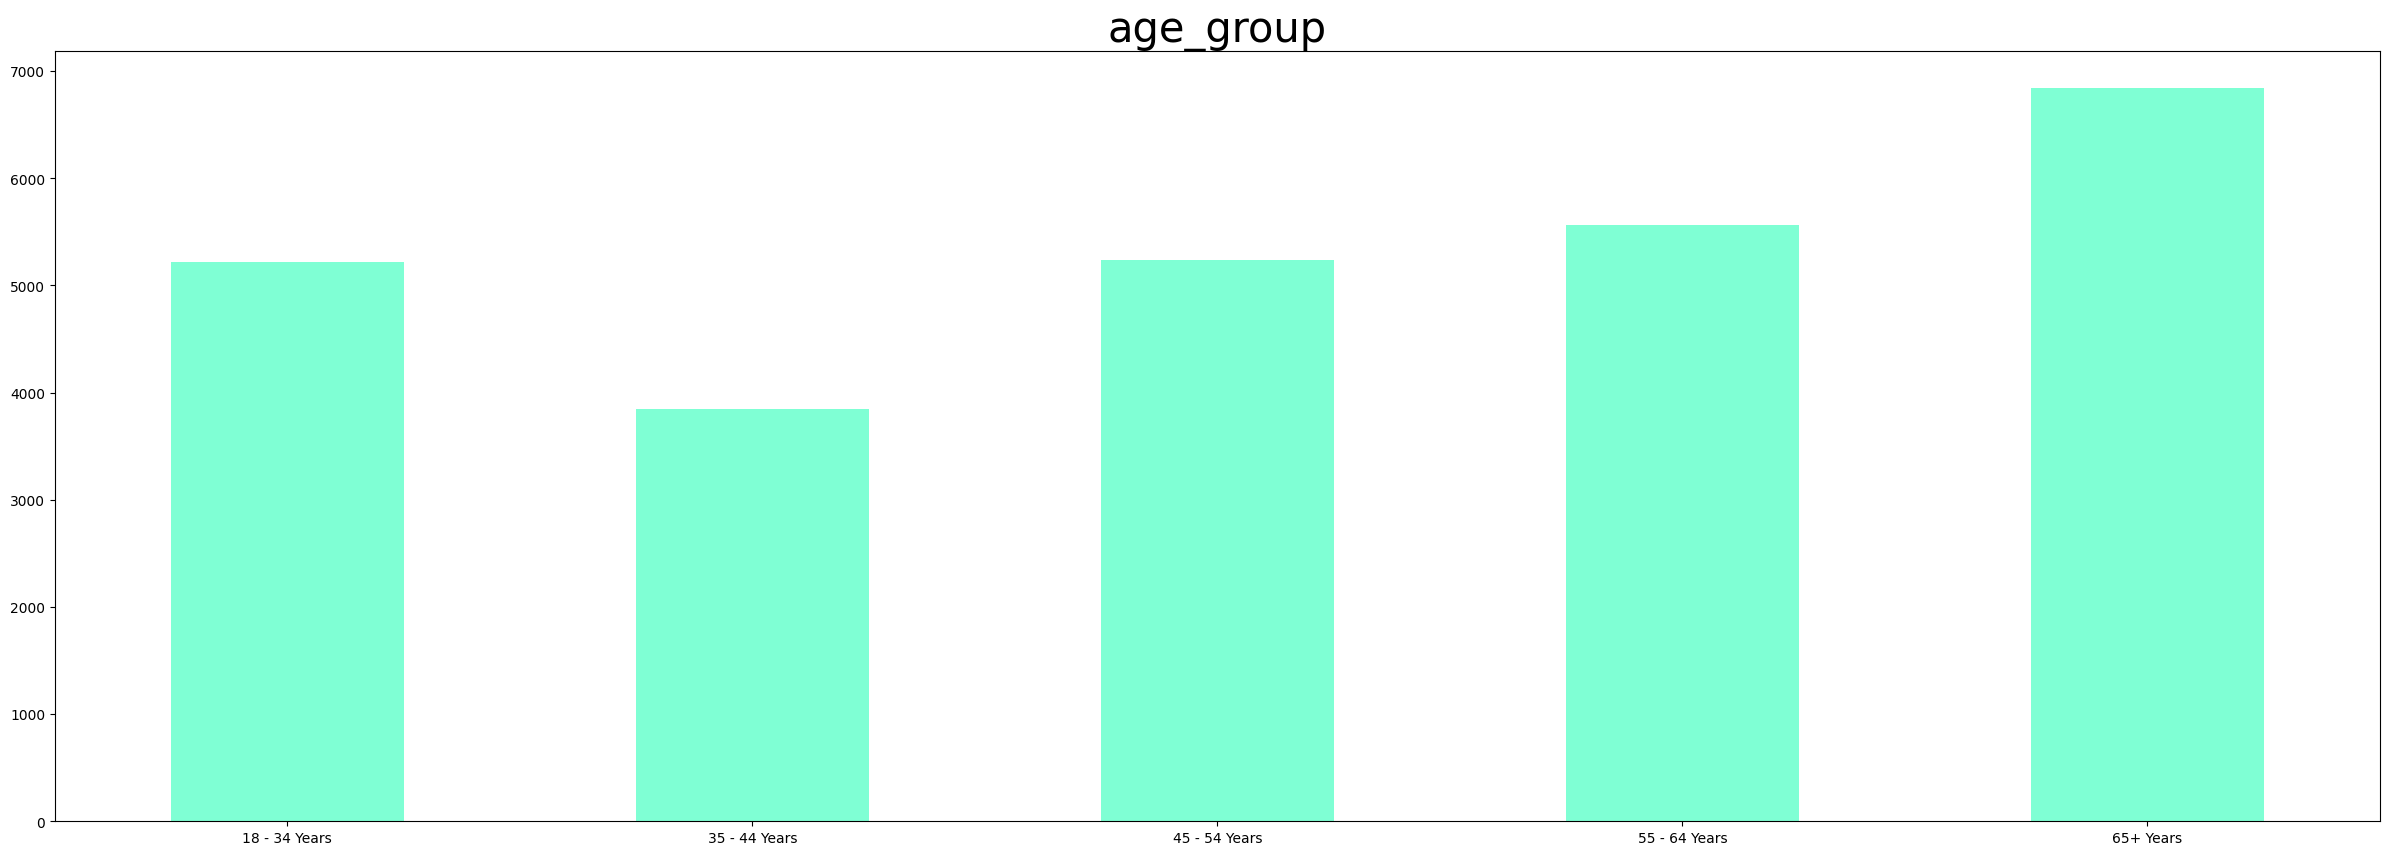

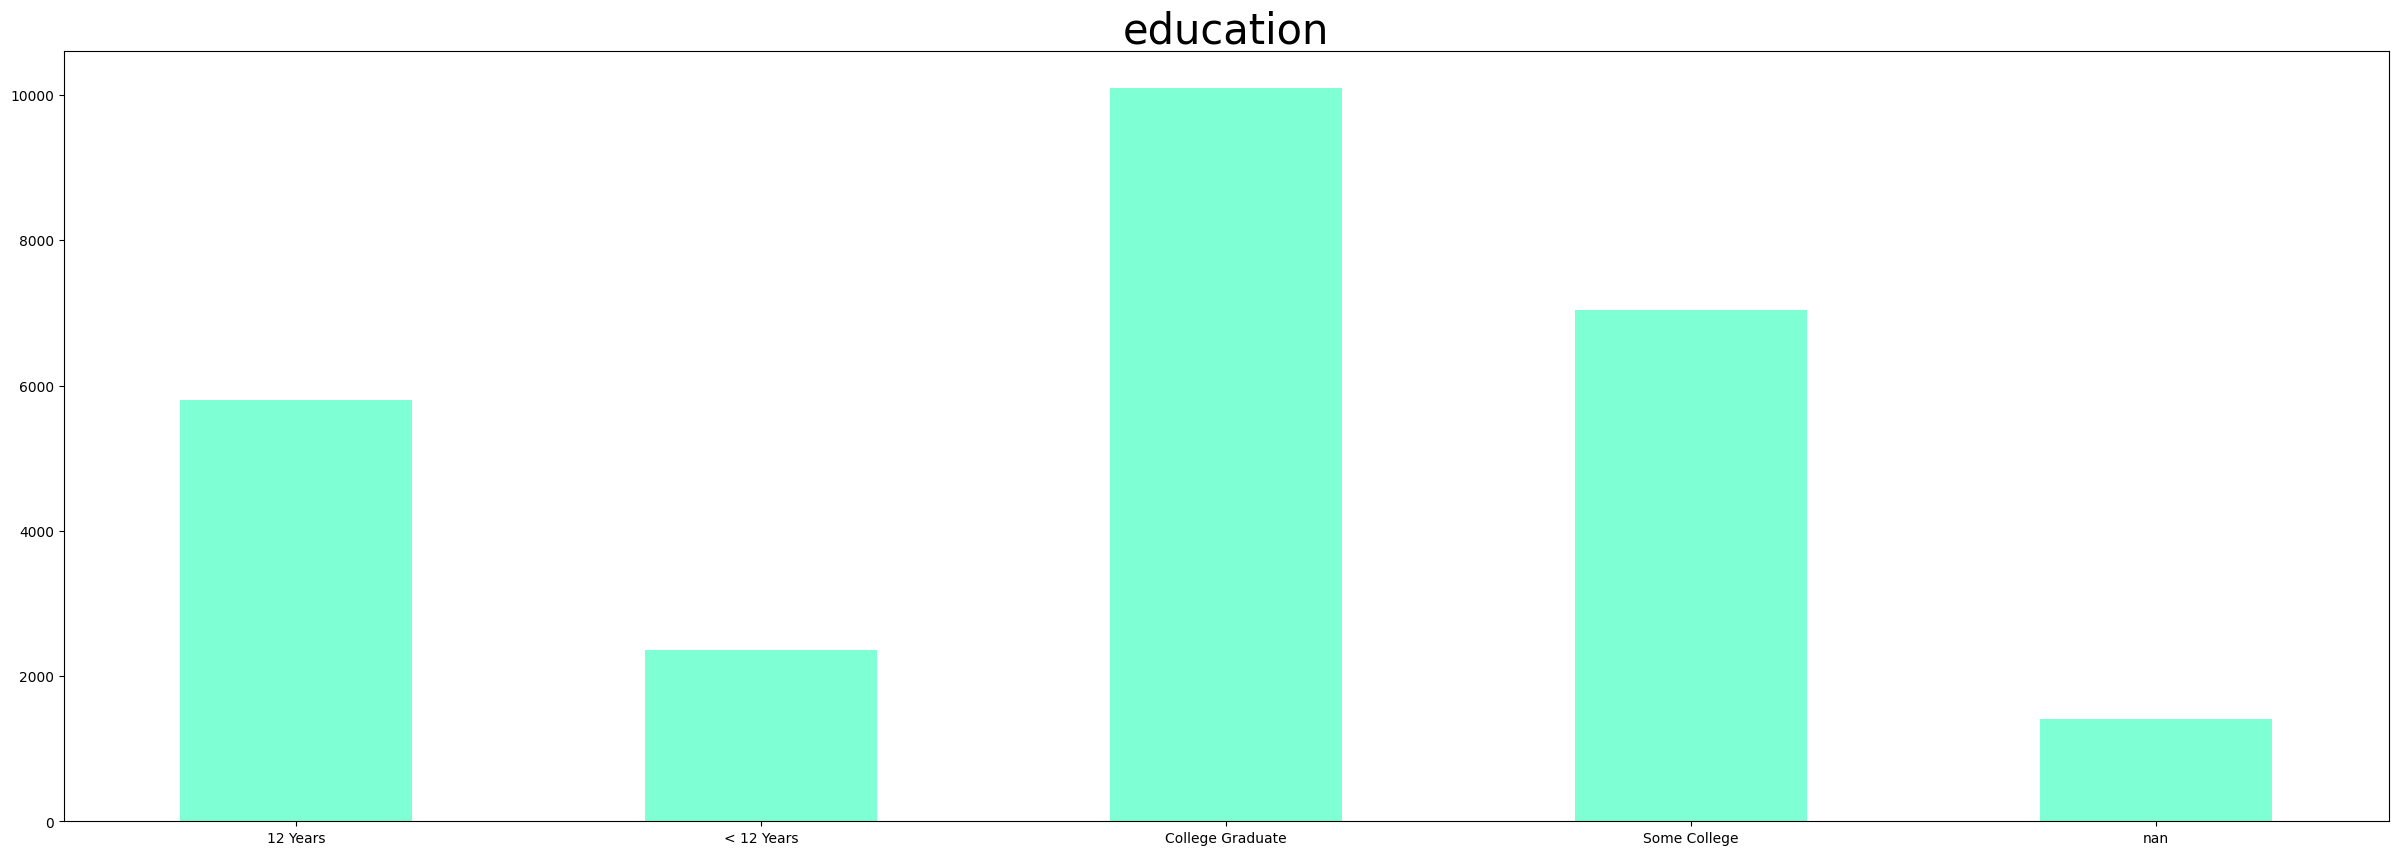

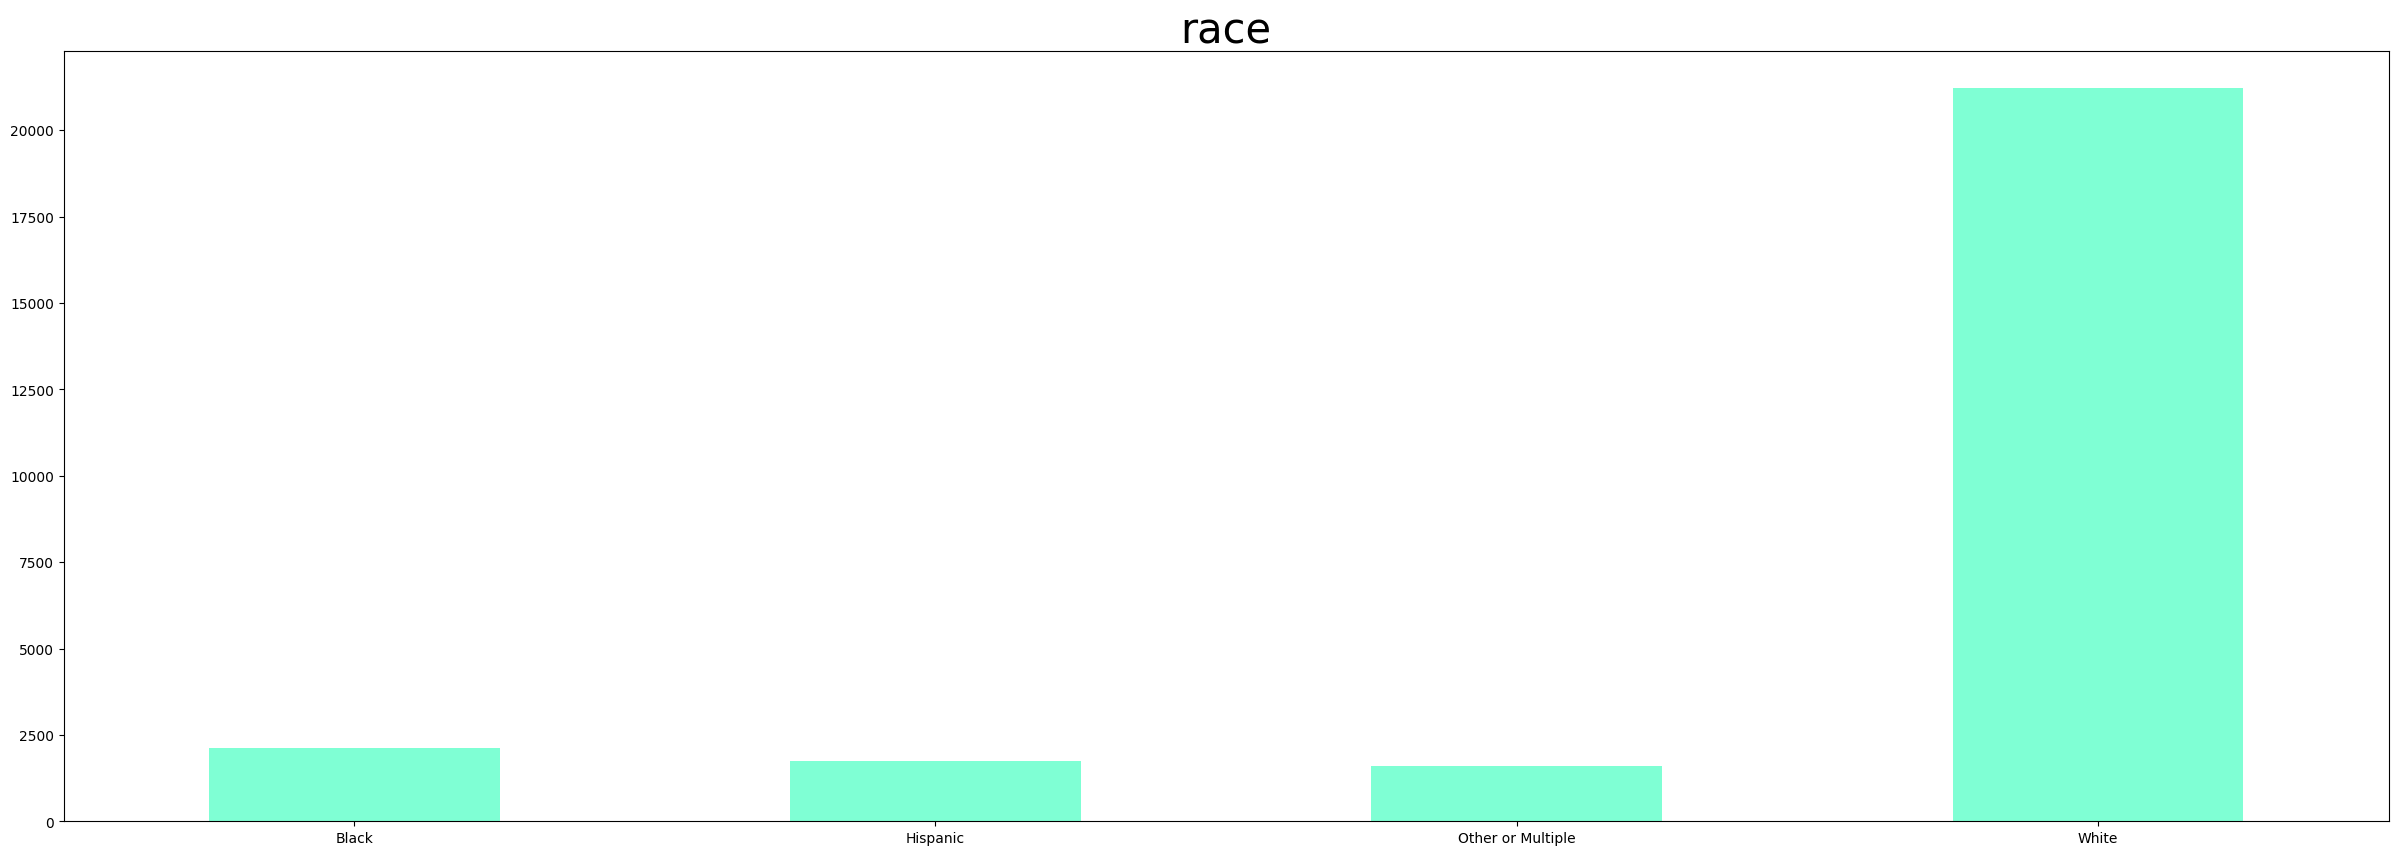

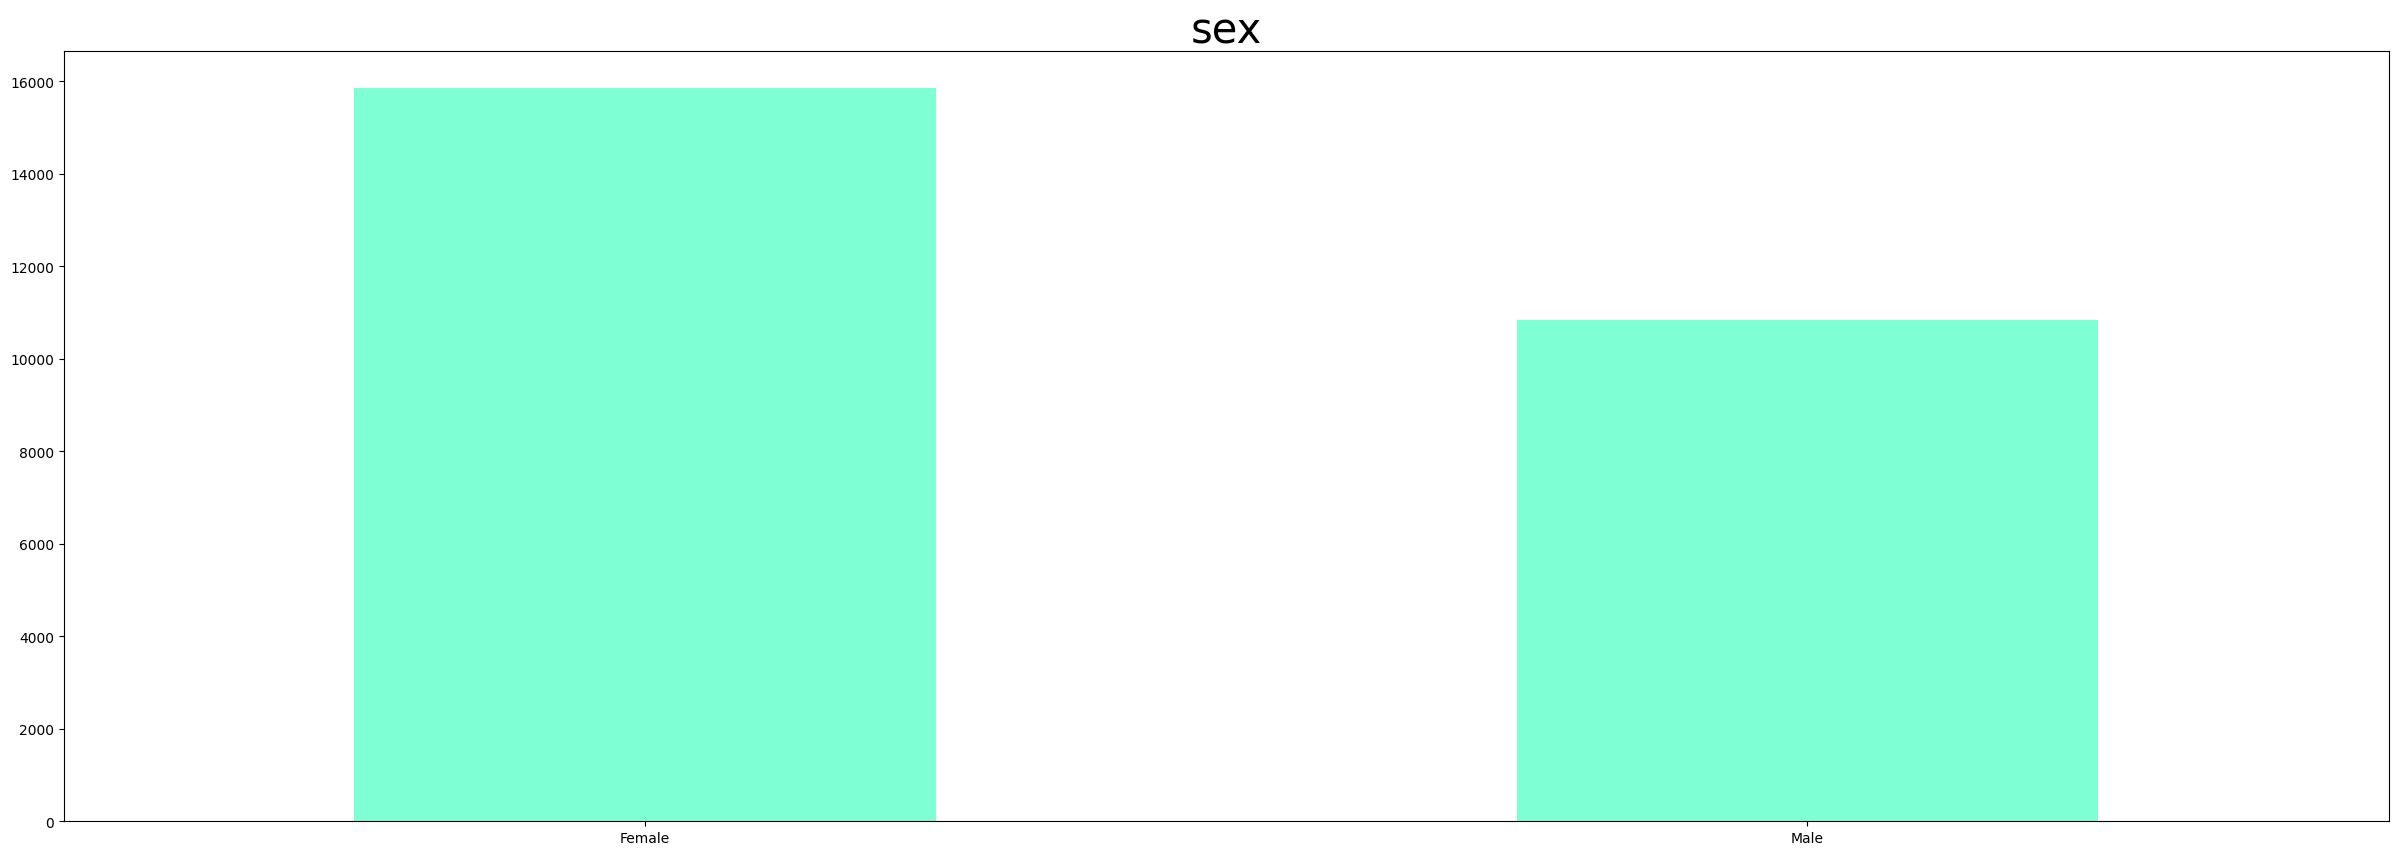

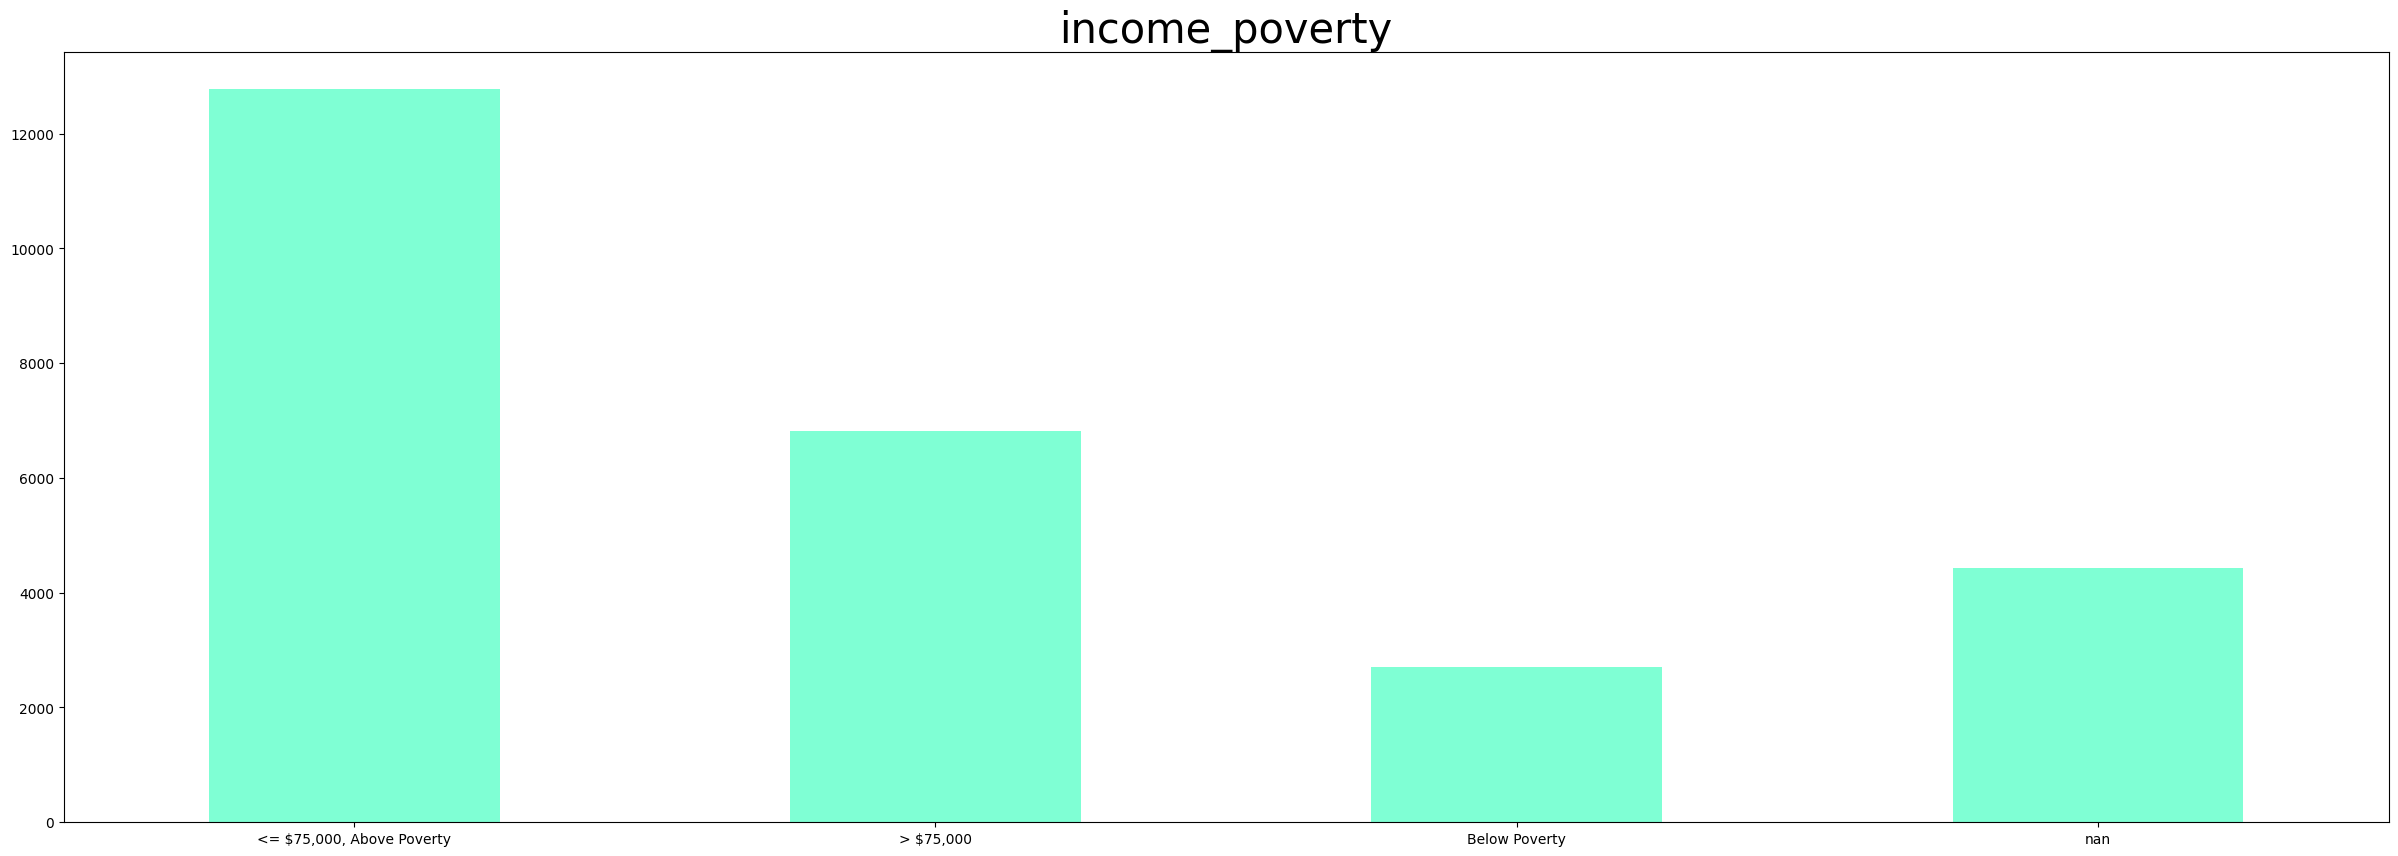

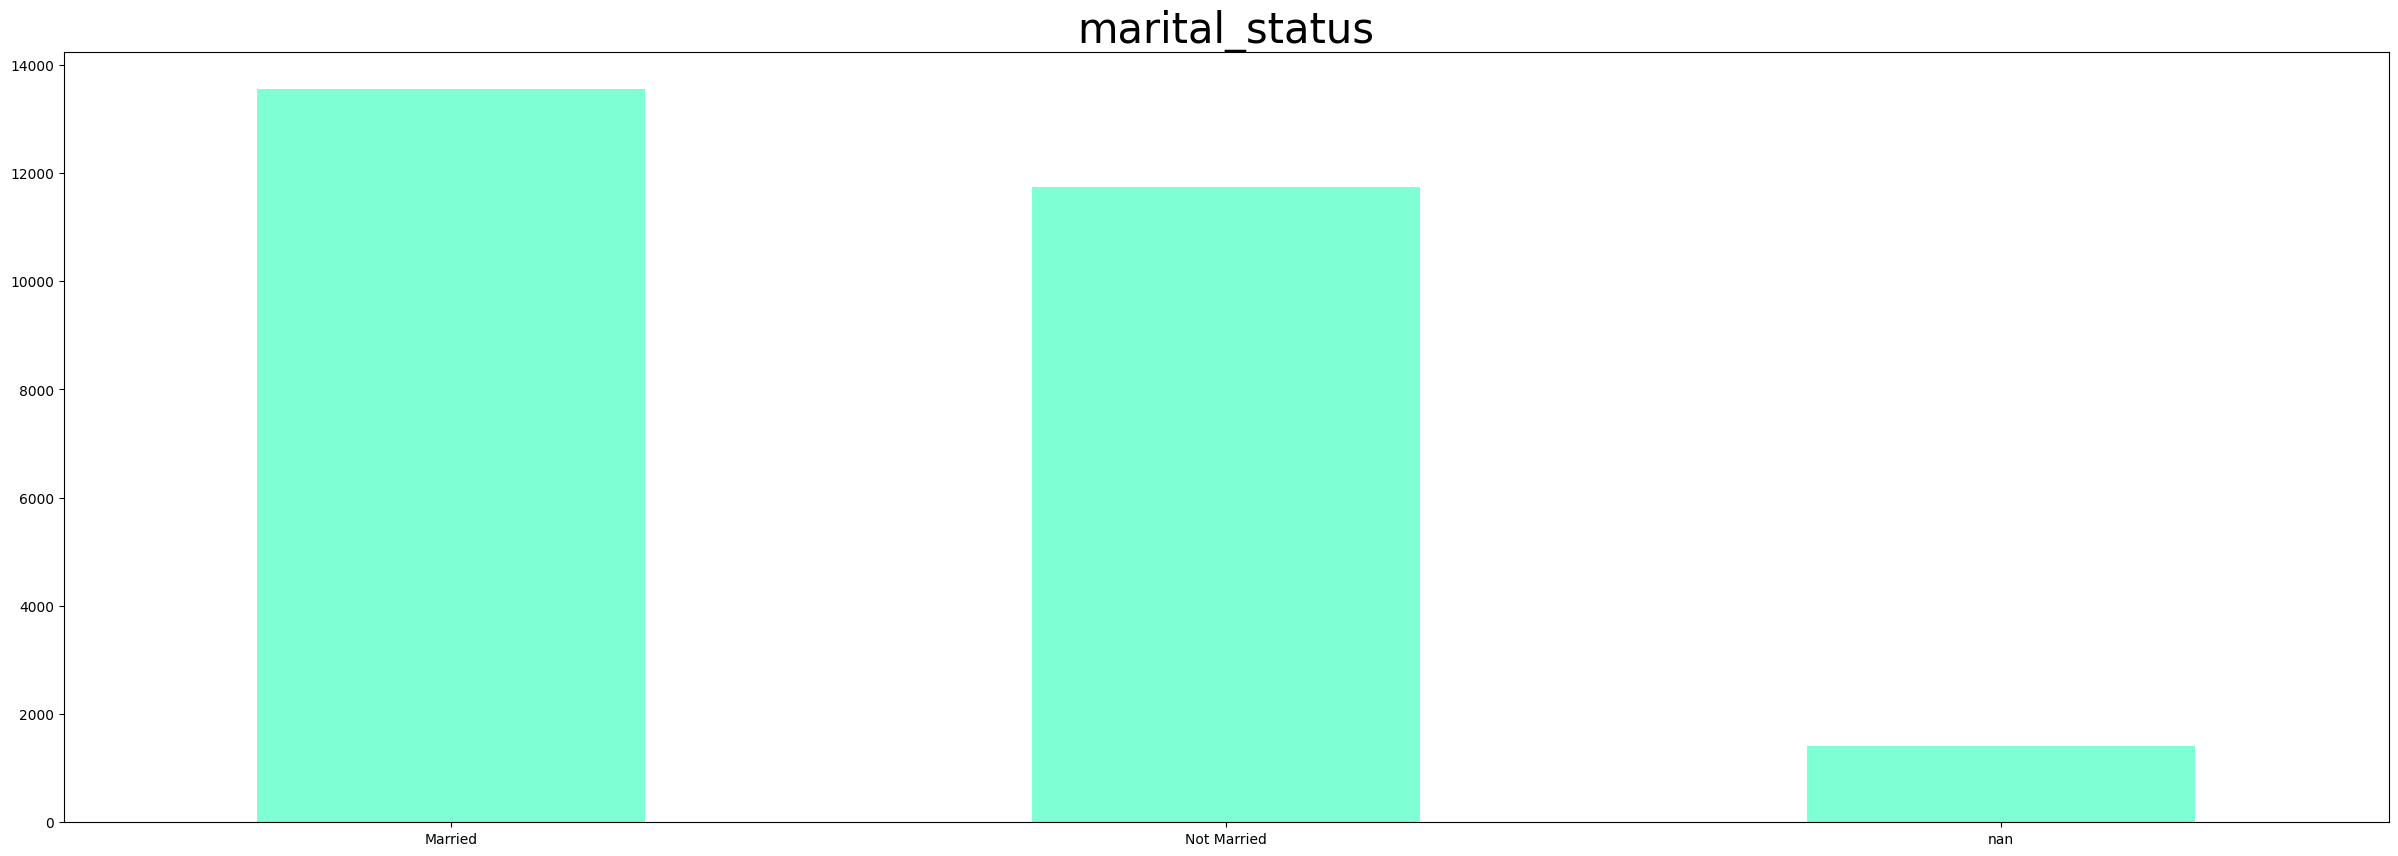

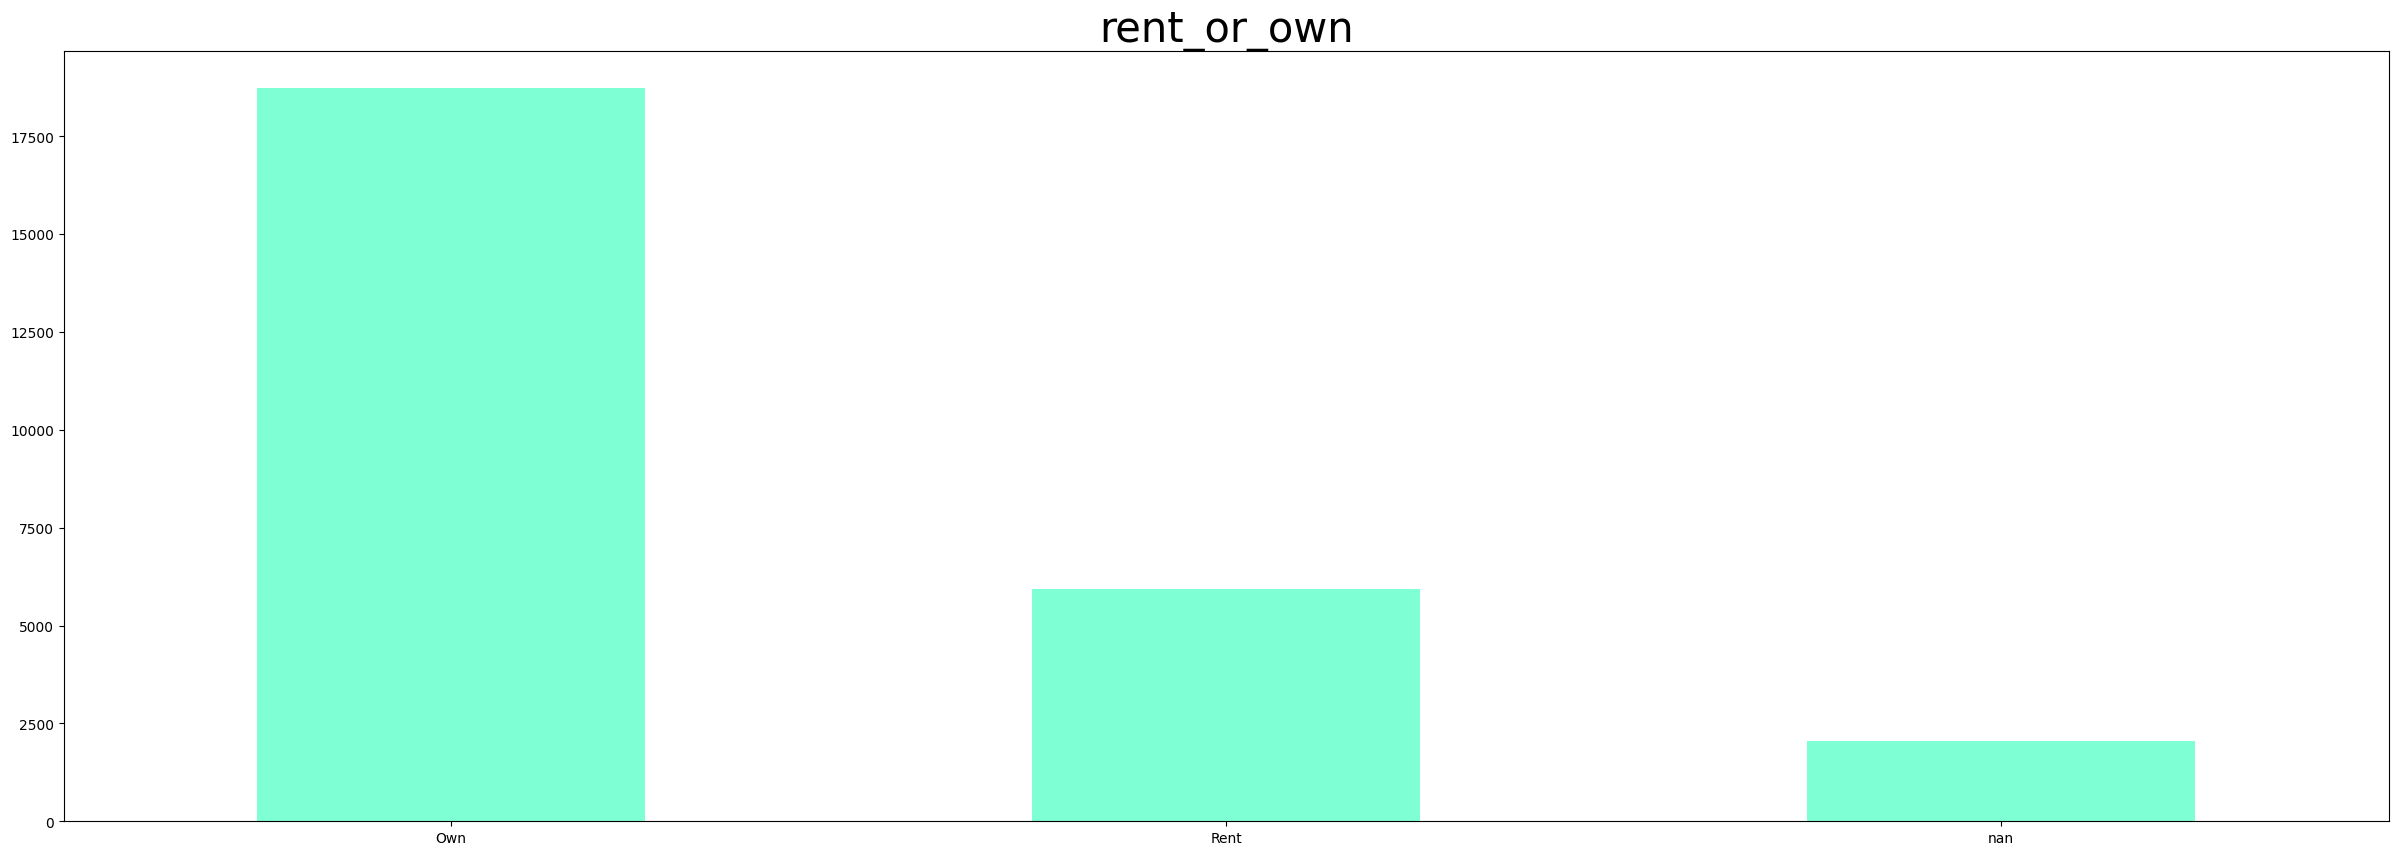

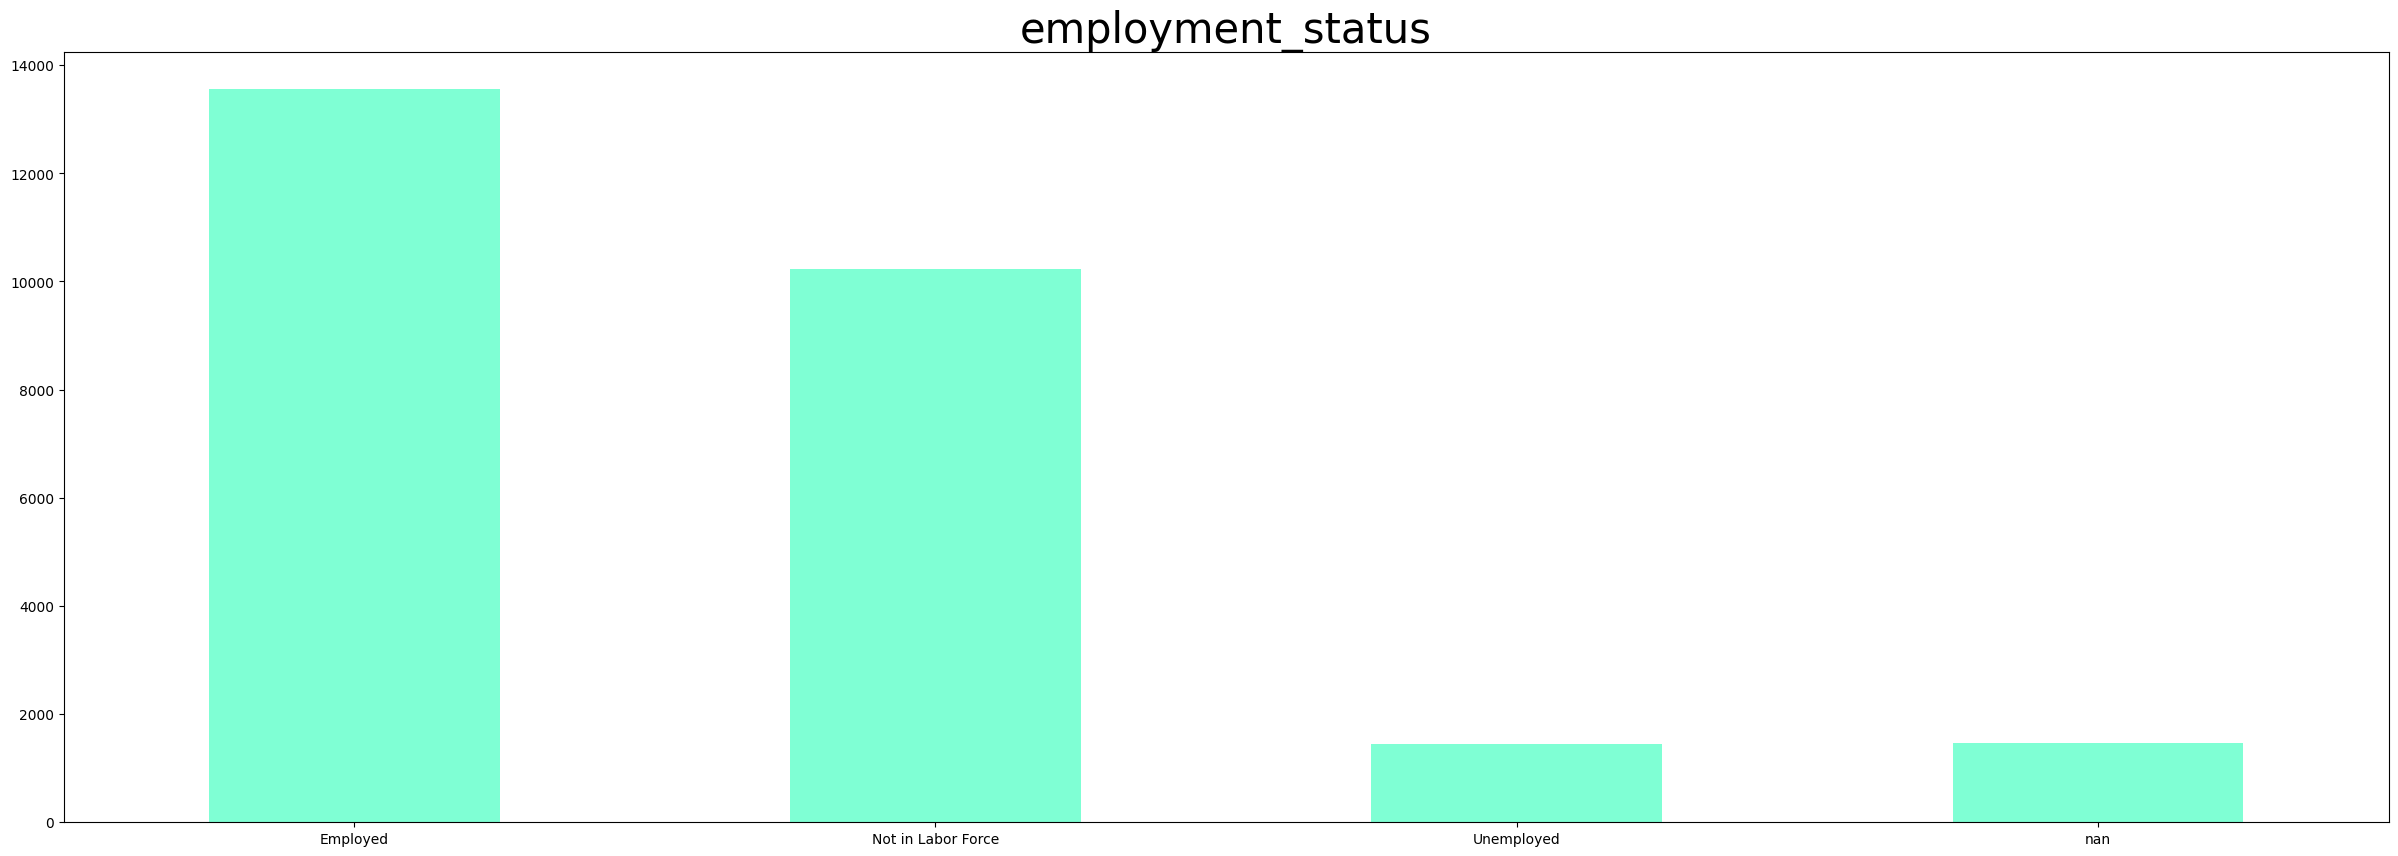

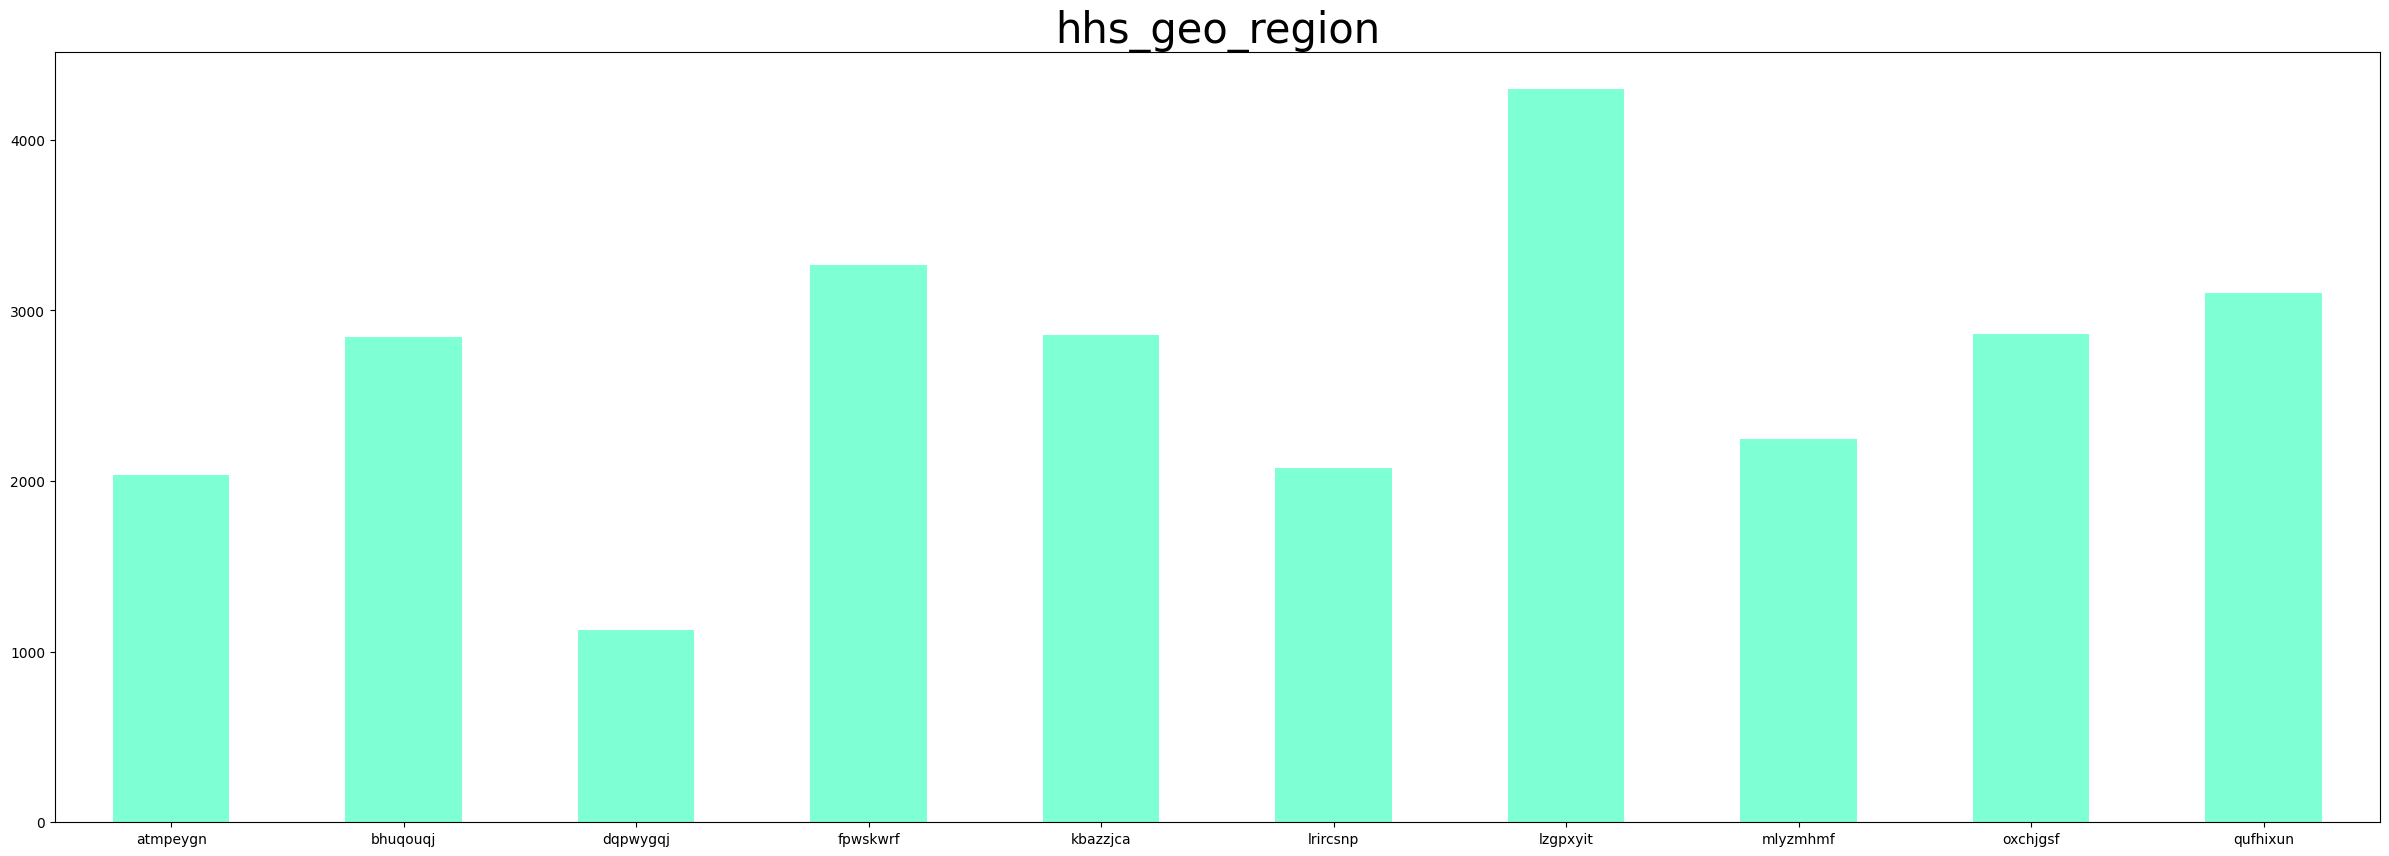

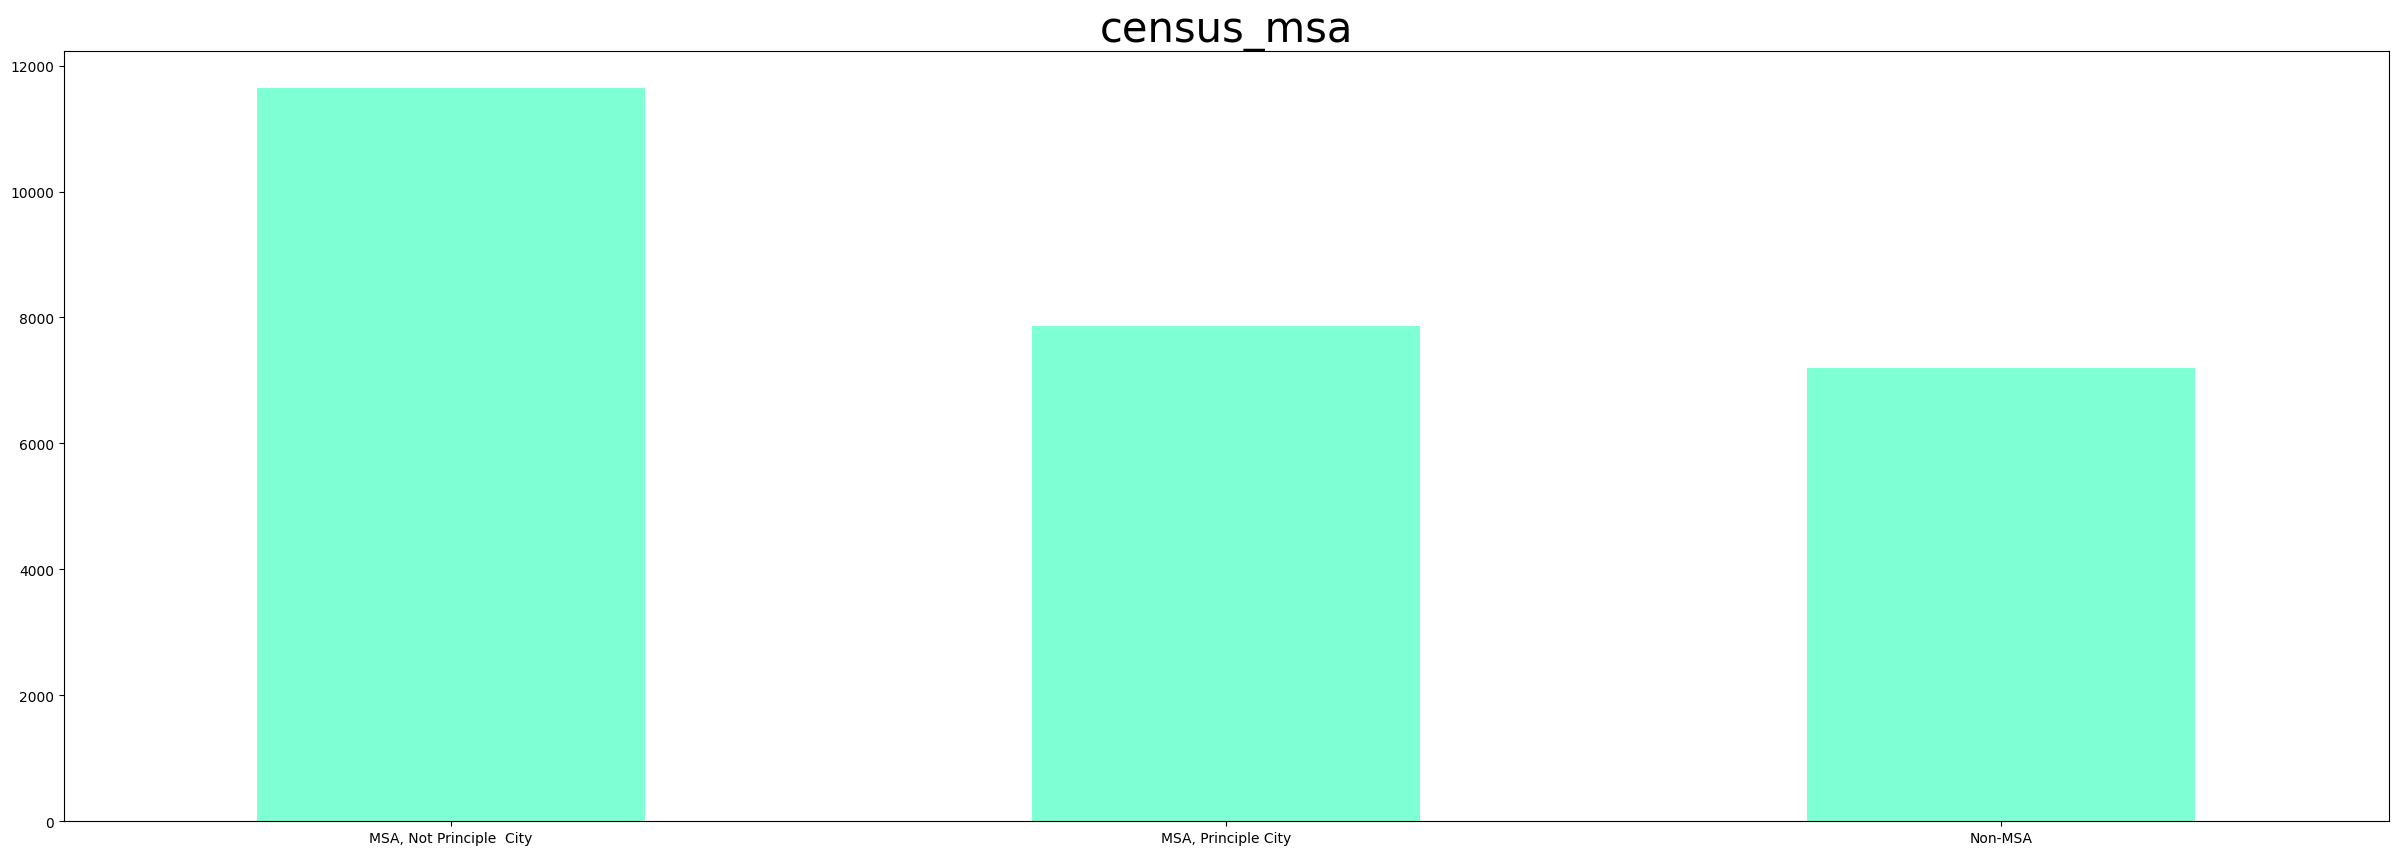

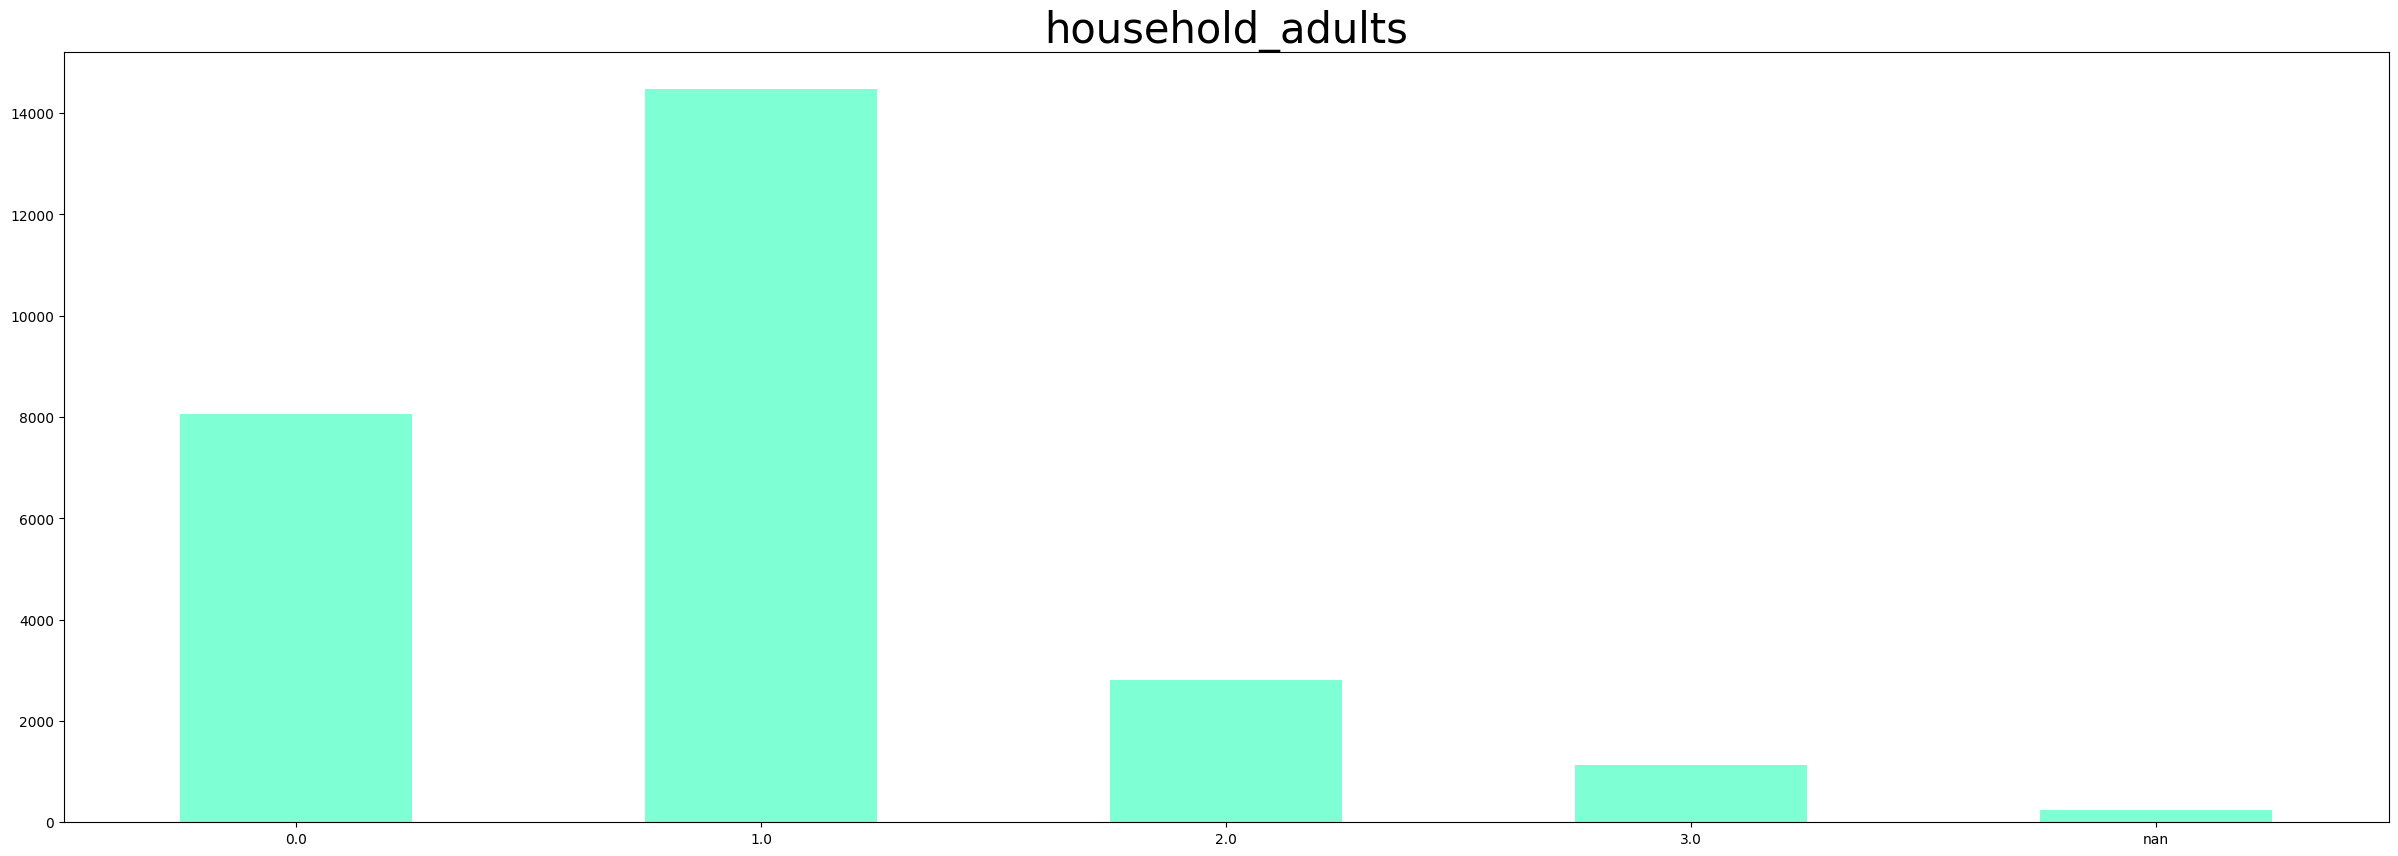

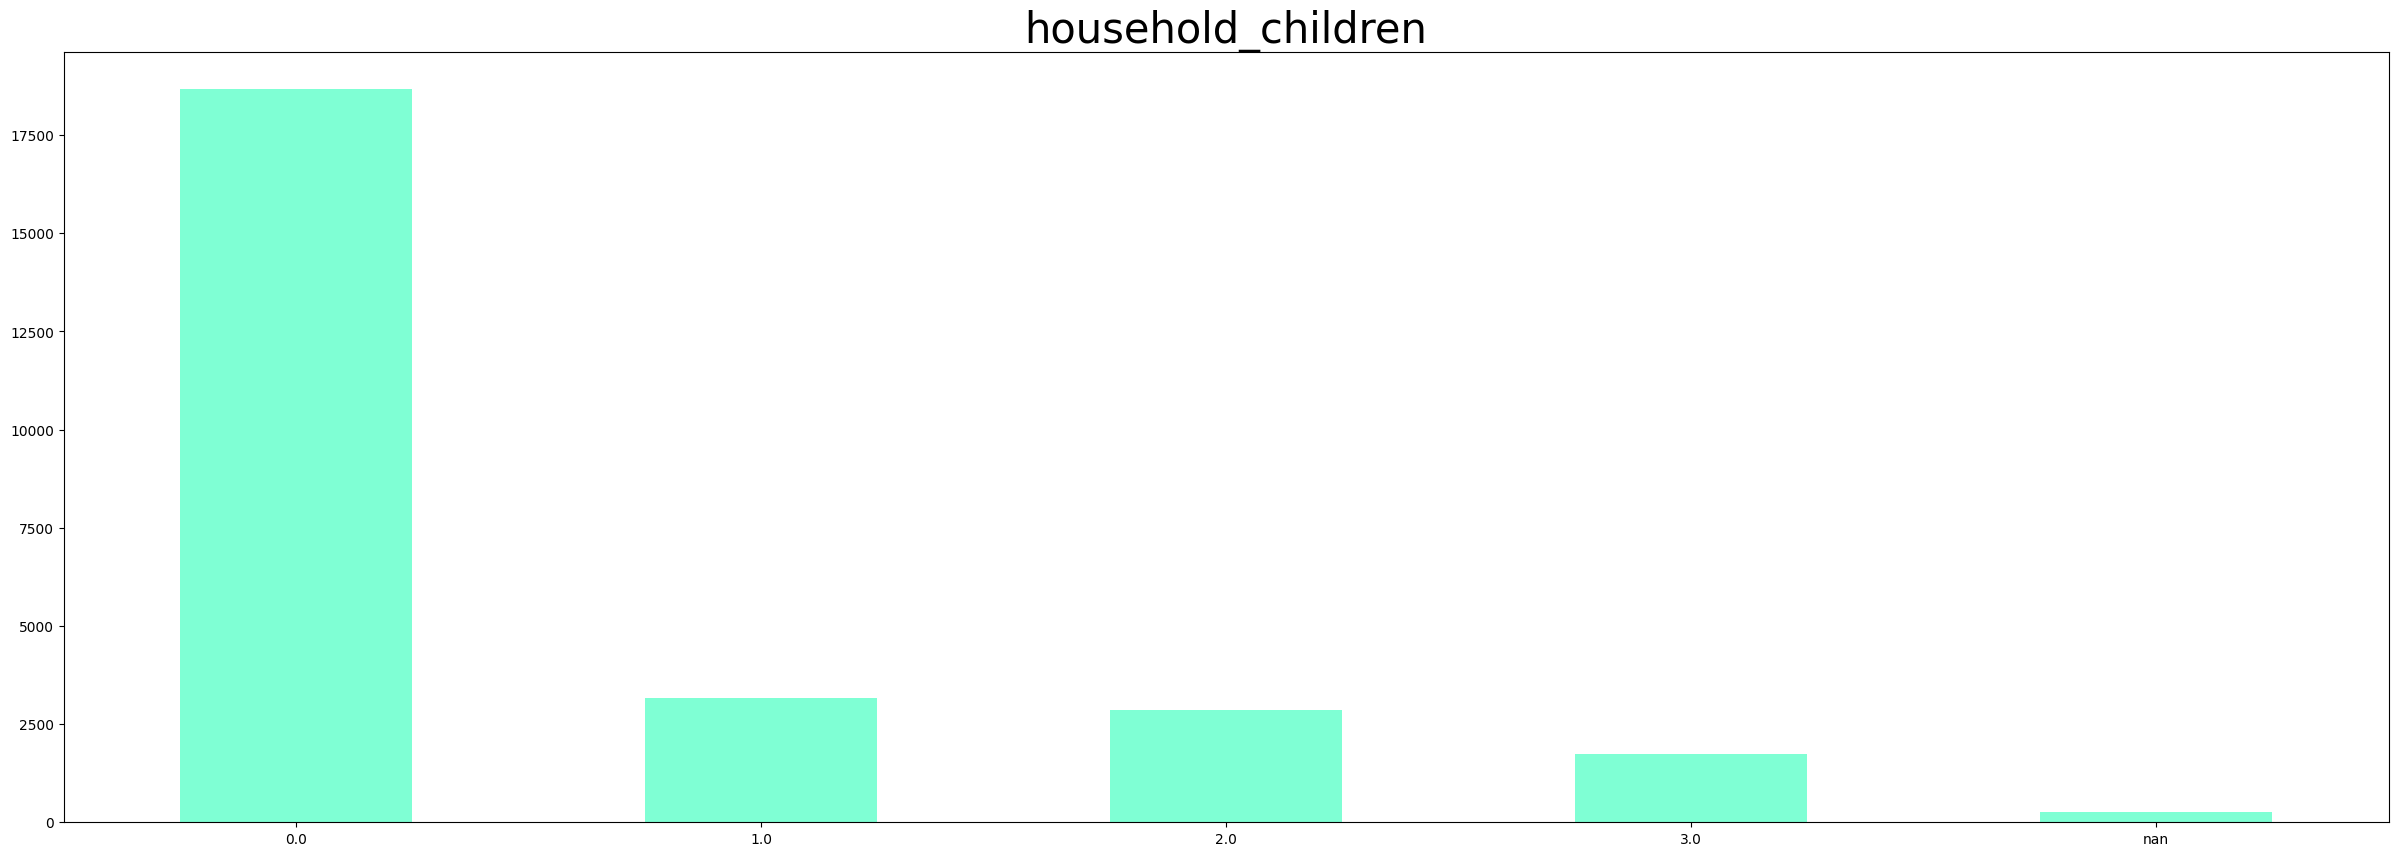

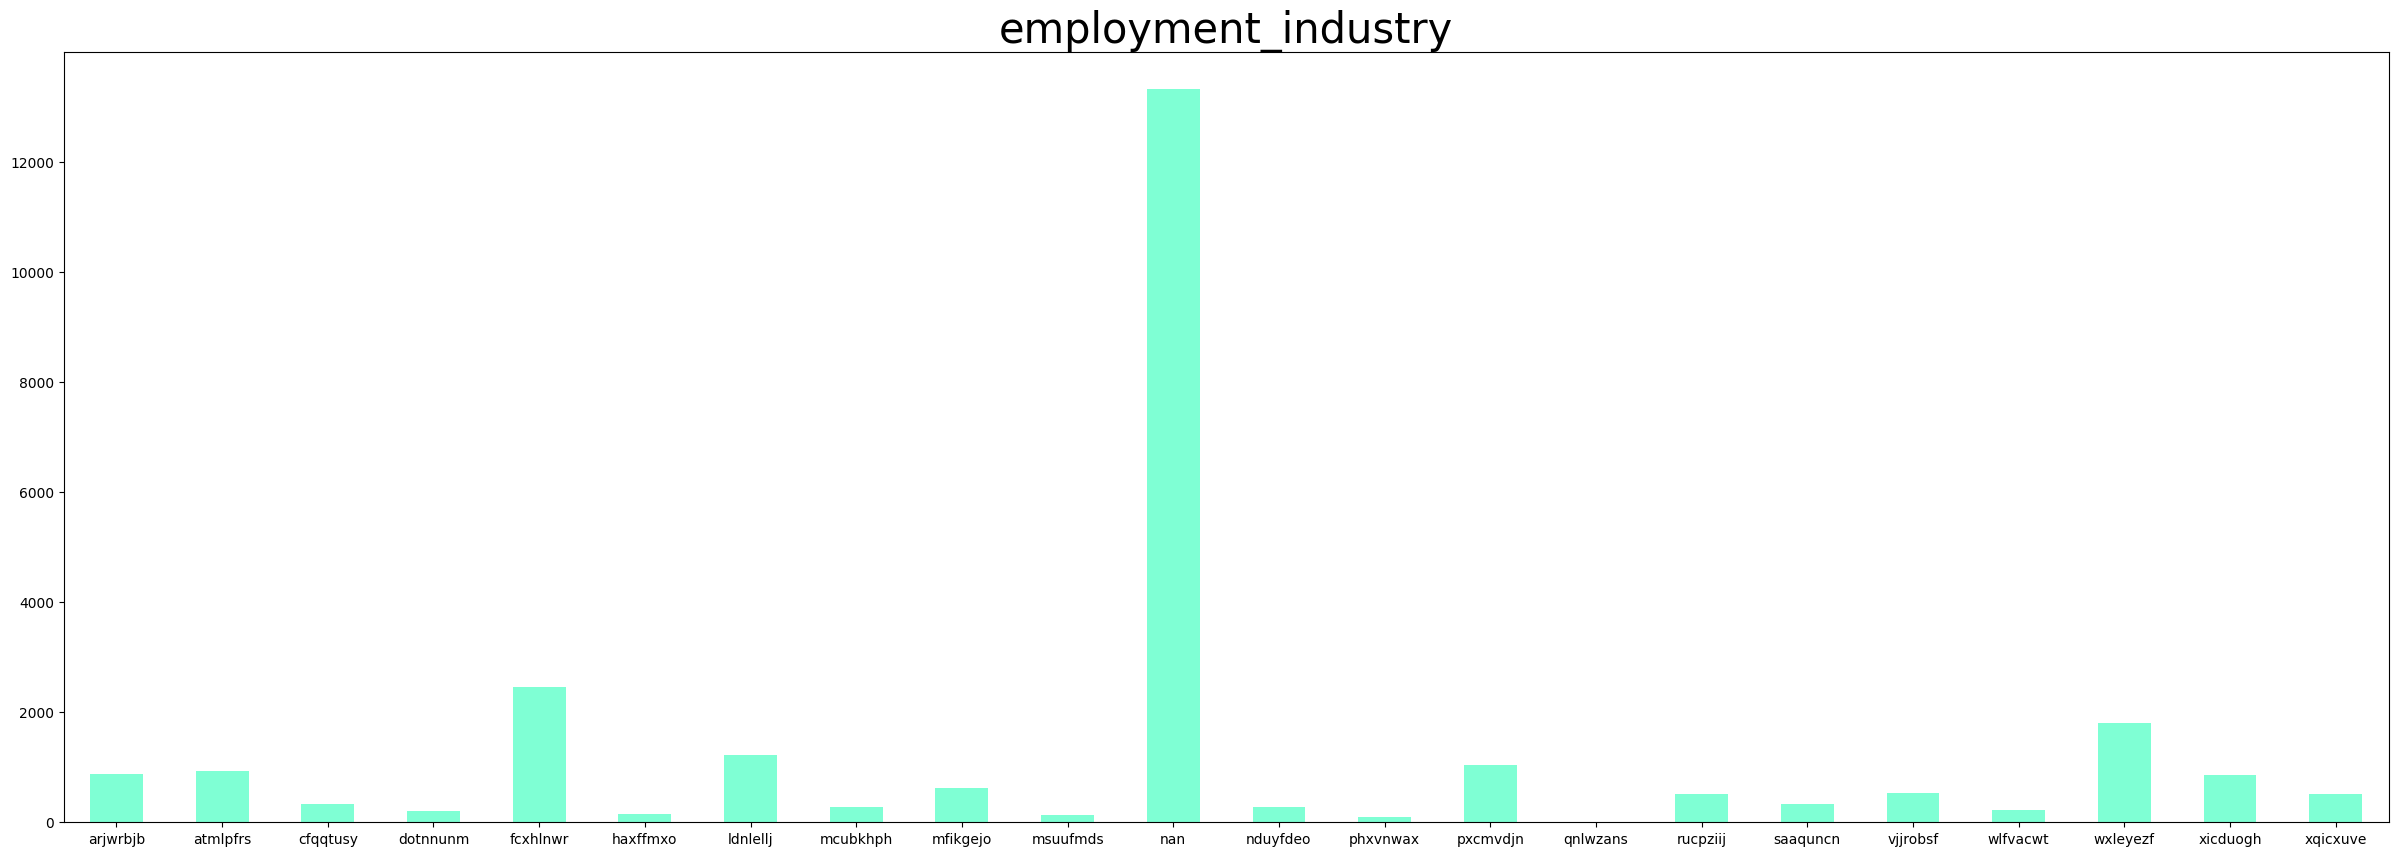

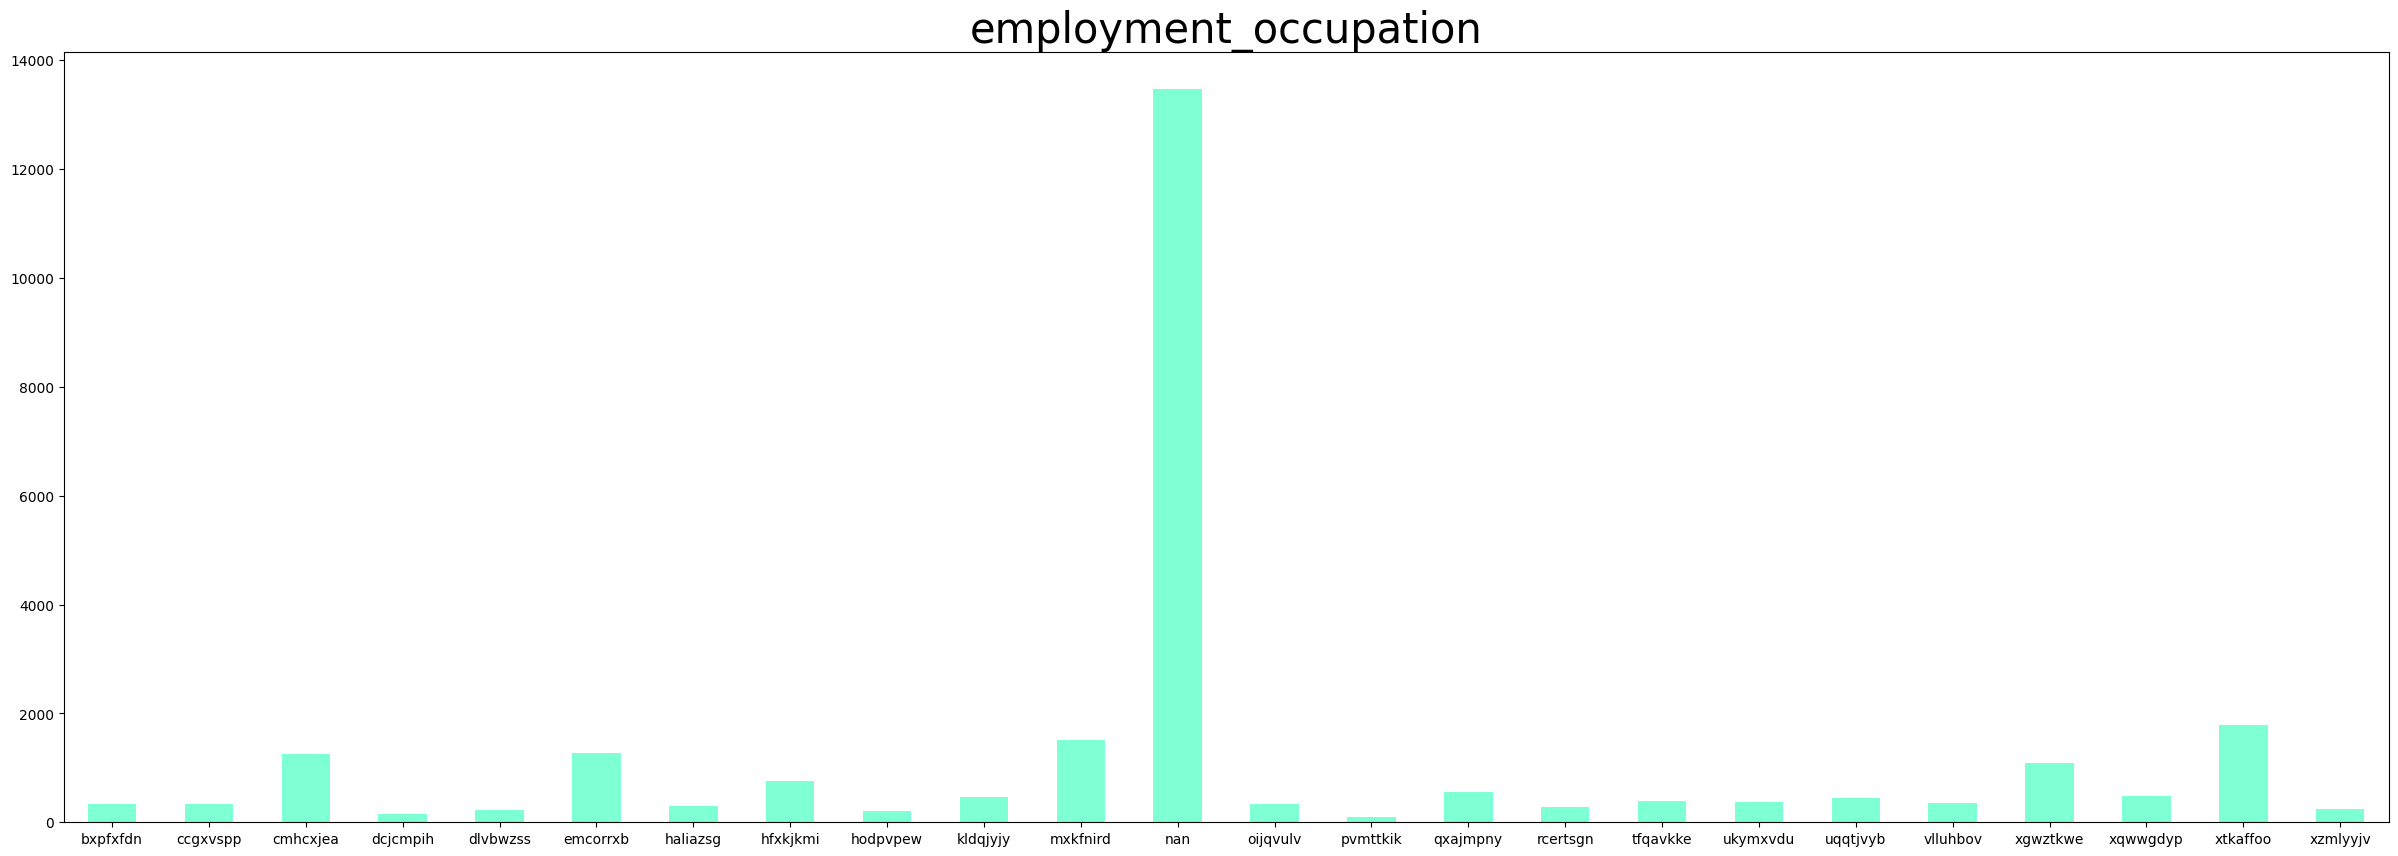

In [81]:
df_train_object = features_data
df_train_object = df_train_object.astype(str)
df_train_object.replace(np.nan, 'Emilia', inplace=True)

# def get_cmap(n, name='hsv'):
#     return plt.cm.get_cmap(name, n)

# cmap = get_cmap(len(features_data.columns))

for col in df_train_object:
    plt.figure(figsize=(30,10))
    plt.title(col, fontsize = 30)
    df_train_object[col].value_counts().sort_index().plot(kind= 'bar', rot = 0, color = 'aquamarine')
    plt.show()

**Korelasi Heatmap**

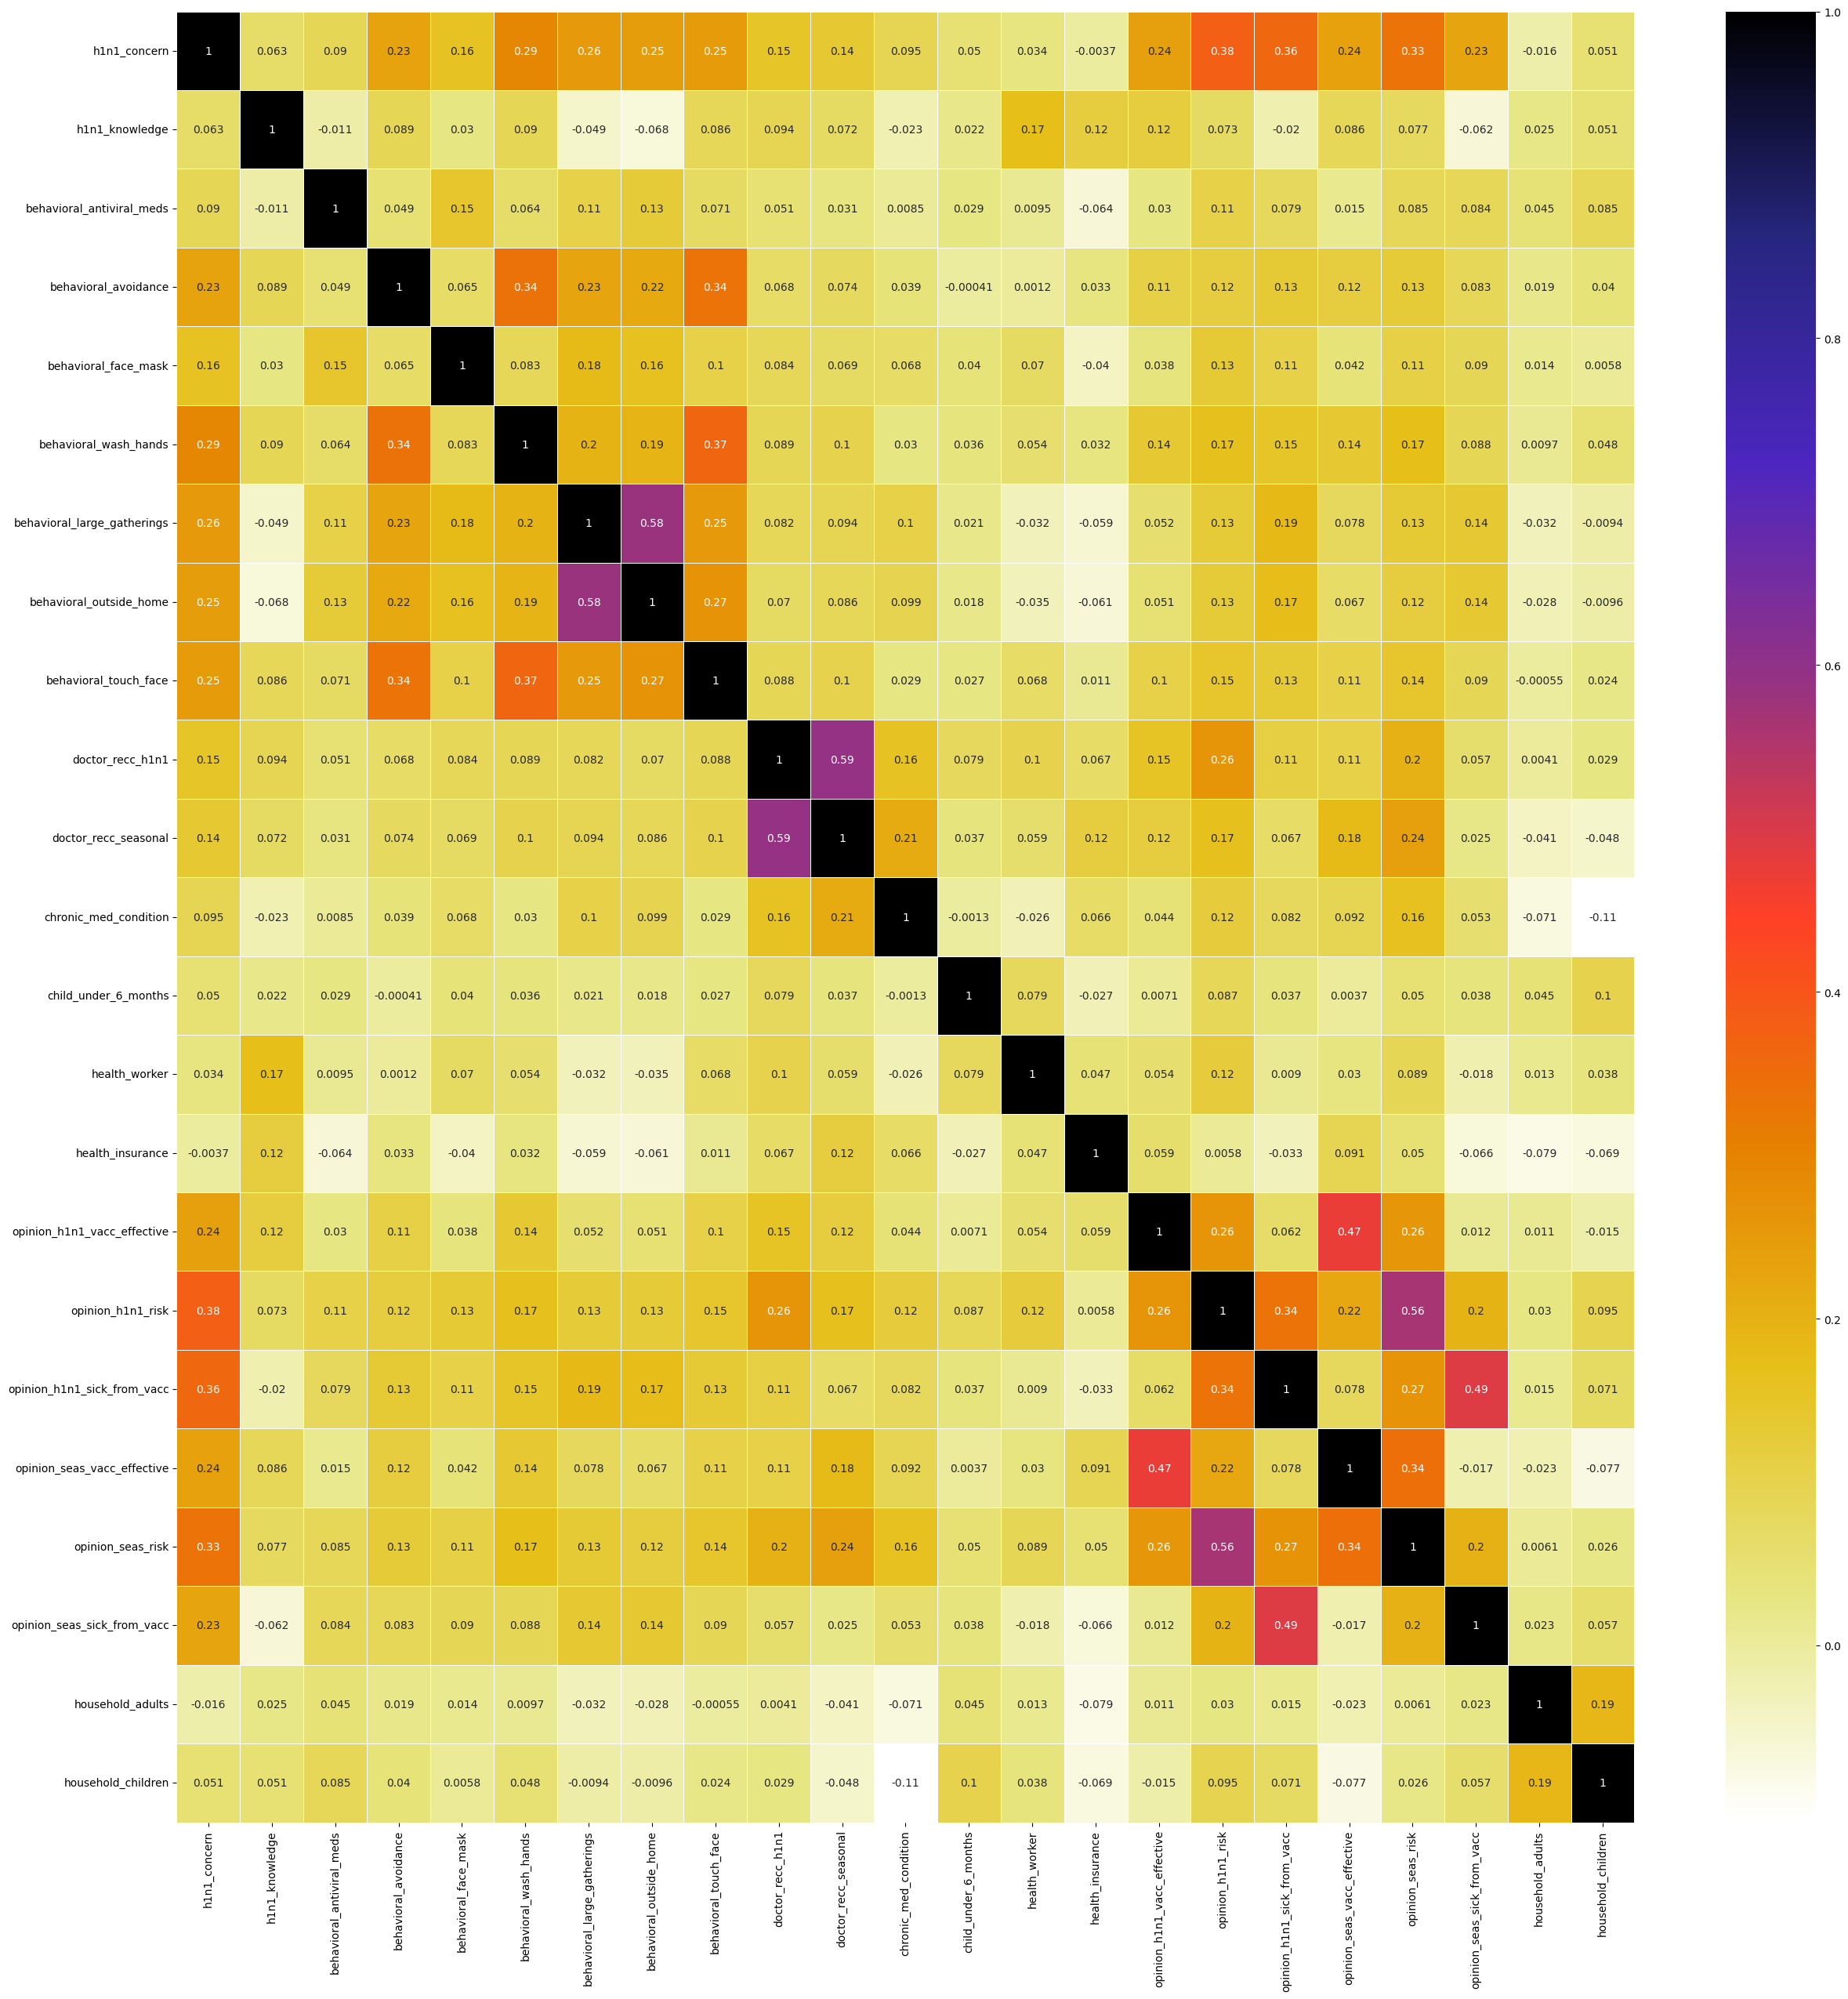

In [9]:
#pearson correlation
de_fak = features_data
plt.figure(figsize=(30,30))
sns.heatmap(de_fak.corr(), annot = True, linewidth = .5, cmap=plt.cm.CMRmap_r)
plt.show()

In [8]:
features_data.drop(columns = ["health_insurance", "employment_industry", "employment_occupation", "hhs_geo_region"], inplace = True)
test_data.drop(columns = ["health_insurance", "employment_industry", "employment_occupation", "hhs_geo_region"], inplace = True)

# BEHAVIORAL

**Mode Fillna for Behavioral**

In [9]:
columns = ["behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask", "behavioral_wash_hands", "behavioral_large_gatherings",
          "behavioral_outside_home", "behavioral_touch_face"]
for k in columns:
    features_data[k] = features_data[k].fillna(features_data[k].mode()[0])

features_data.isna().sum()

h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                    2042
employment_status           

**Rumus rata-rata by Rafli**

In [10]:
columns = ["behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask", "behavioral_wash_hands", "behavioral_large_gatherings",
          "behavioral_outside_home", "behavioral_touch_face"]
df = features_data[columns]
df = df.sum(axis= 1)
rata2 = df.sum(axis = 0) / 26707
rata2

3.043846182648744

In [13]:
df

0        2.0
1        4.0
2        1.0
3        3.0
4        4.0
        ... 
26702    2.0
26703    2.0
26704    5.0
26705    1.0
26706    1.0
Length: 26707, dtype: float64

In [11]:
df = df.replace([0.0, 1.0, 2.0, 3.0], 0)
df = df.replace([4.0, 5.0, 6.0, 7.0], 1)
df.unique()

array([0., 1.])

In [12]:
behavioral = pd.DataFrame(df, columns = ['Behavioral'])
behavioral

,Behavioral
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
26702,0.0
26703,0.0
26704,1.0
26705,0.0


In [13]:
features_data = pd.concat([features_data, behavioral], axis = 1)
features_data.drop(columns=["behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask", "behavioral_wash_hands", "behavioral_large_gatherings",
          "behavioral_outside_home", "behavioral_touch_face"], inplace = True)

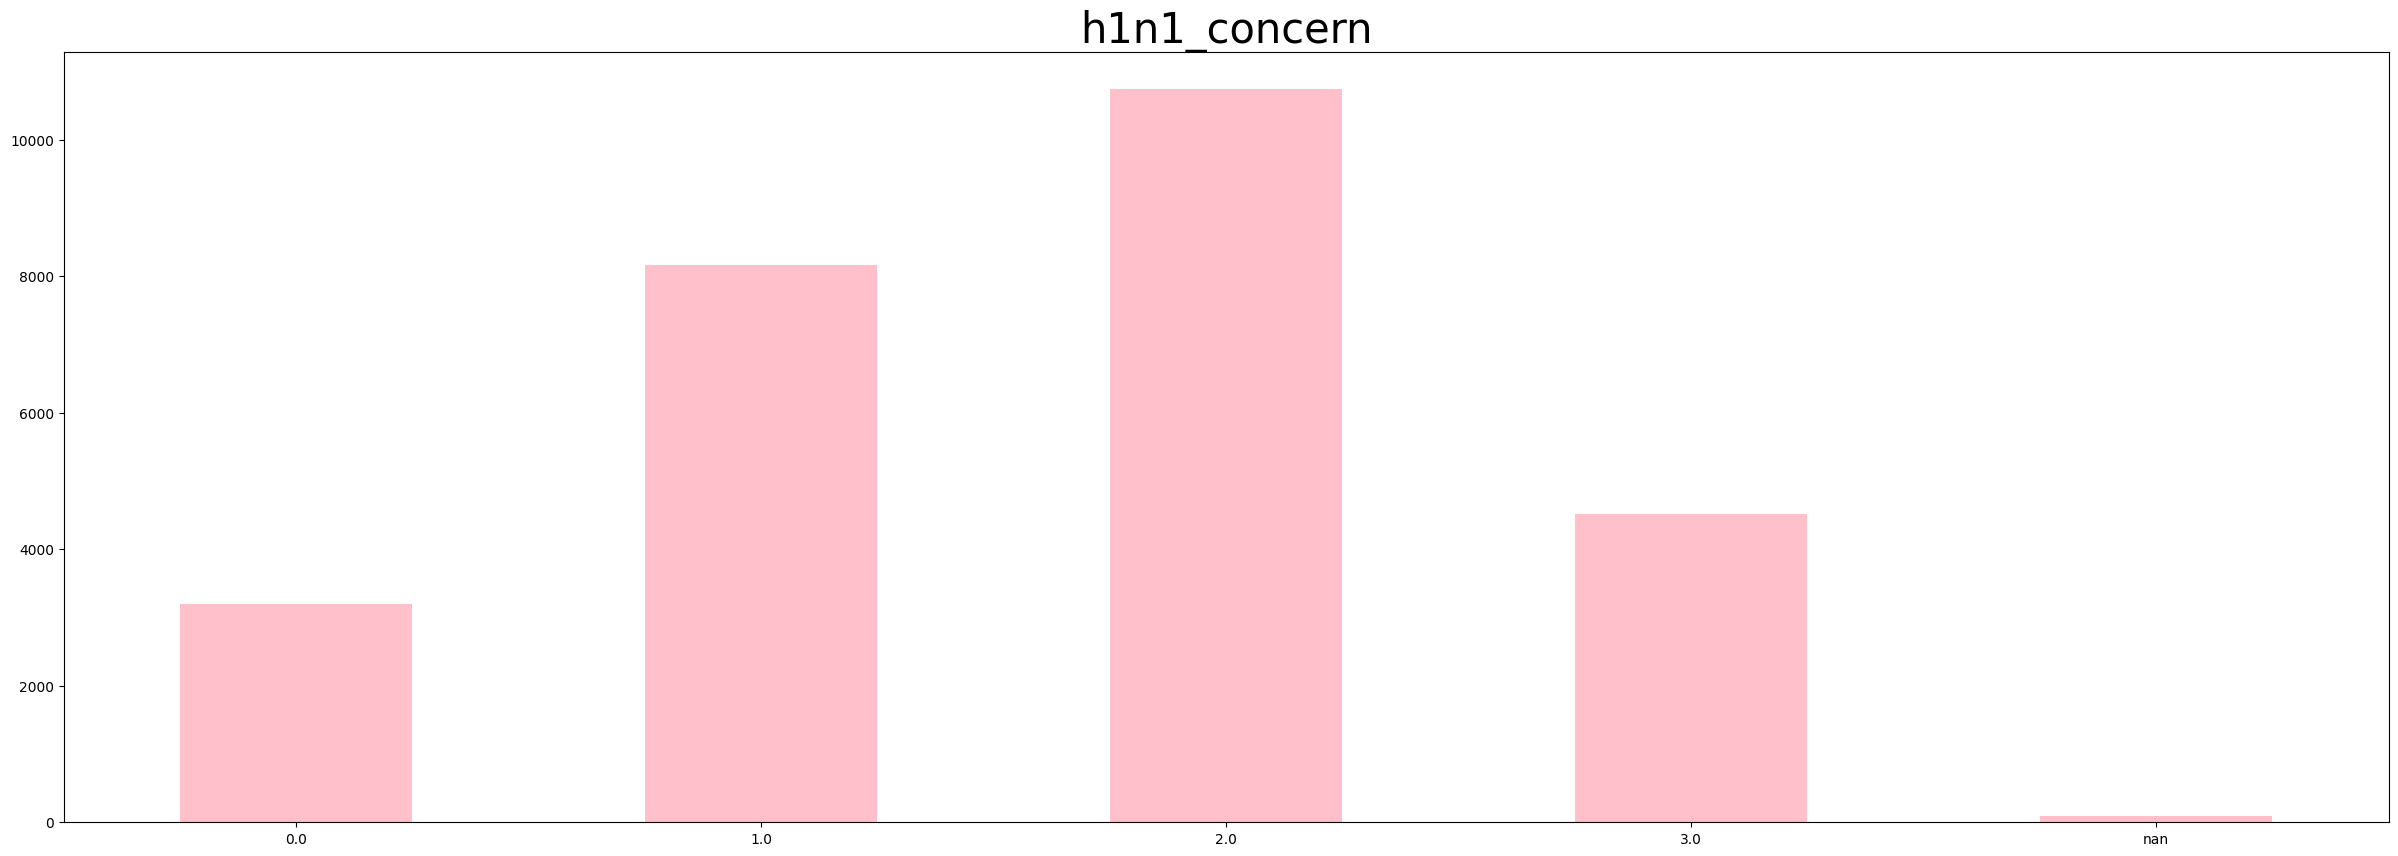

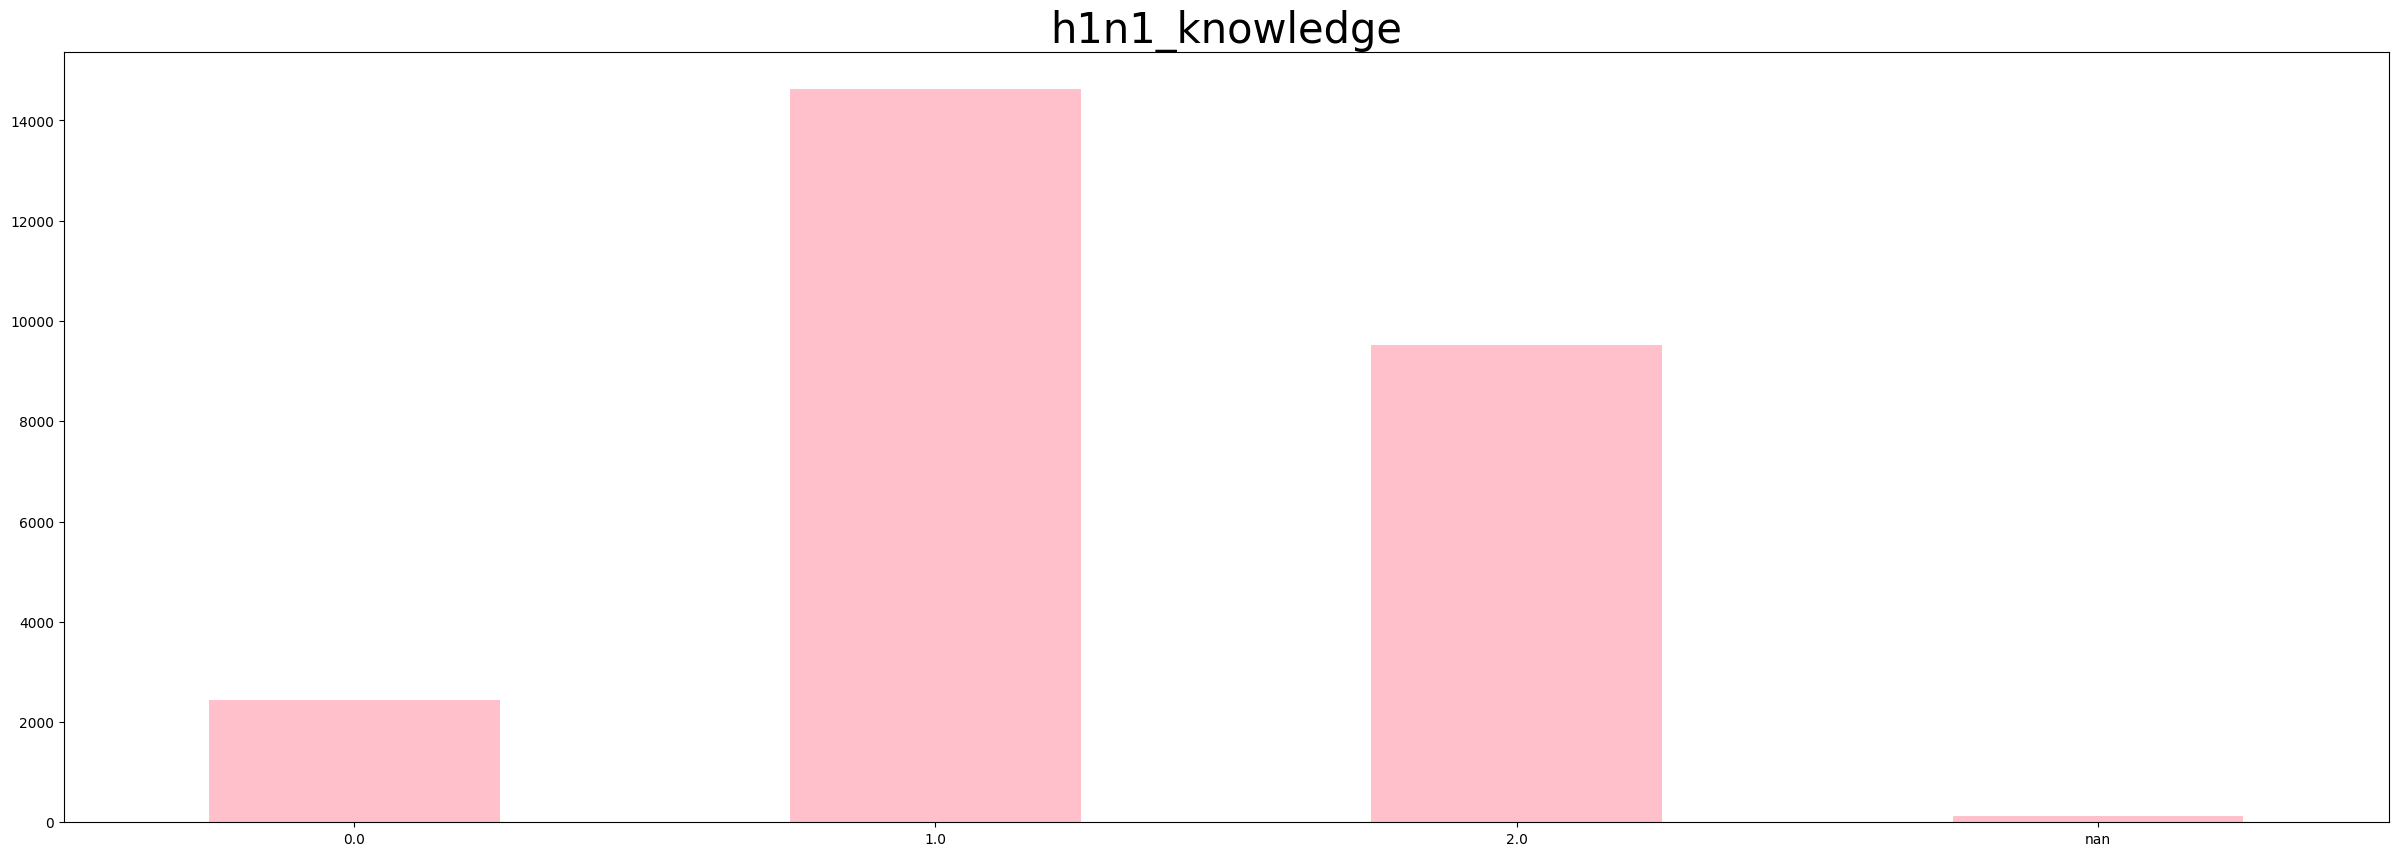

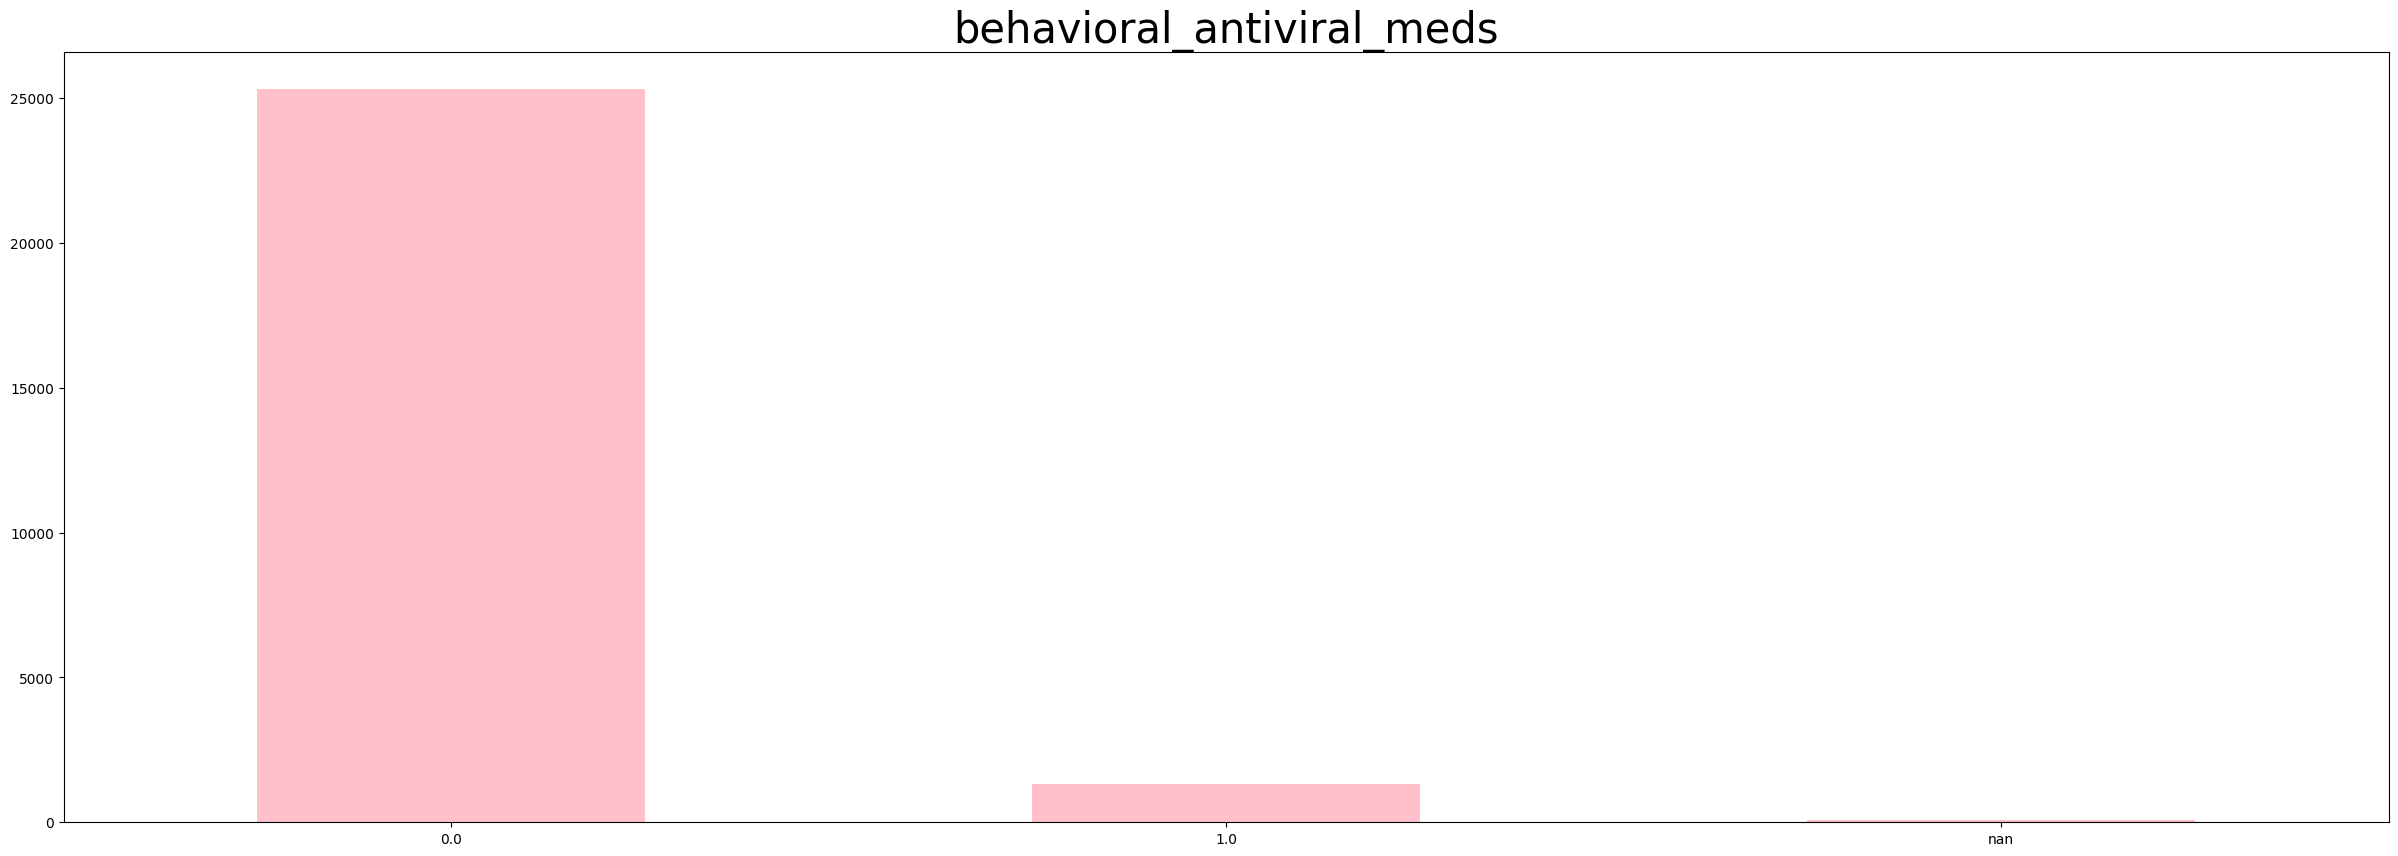

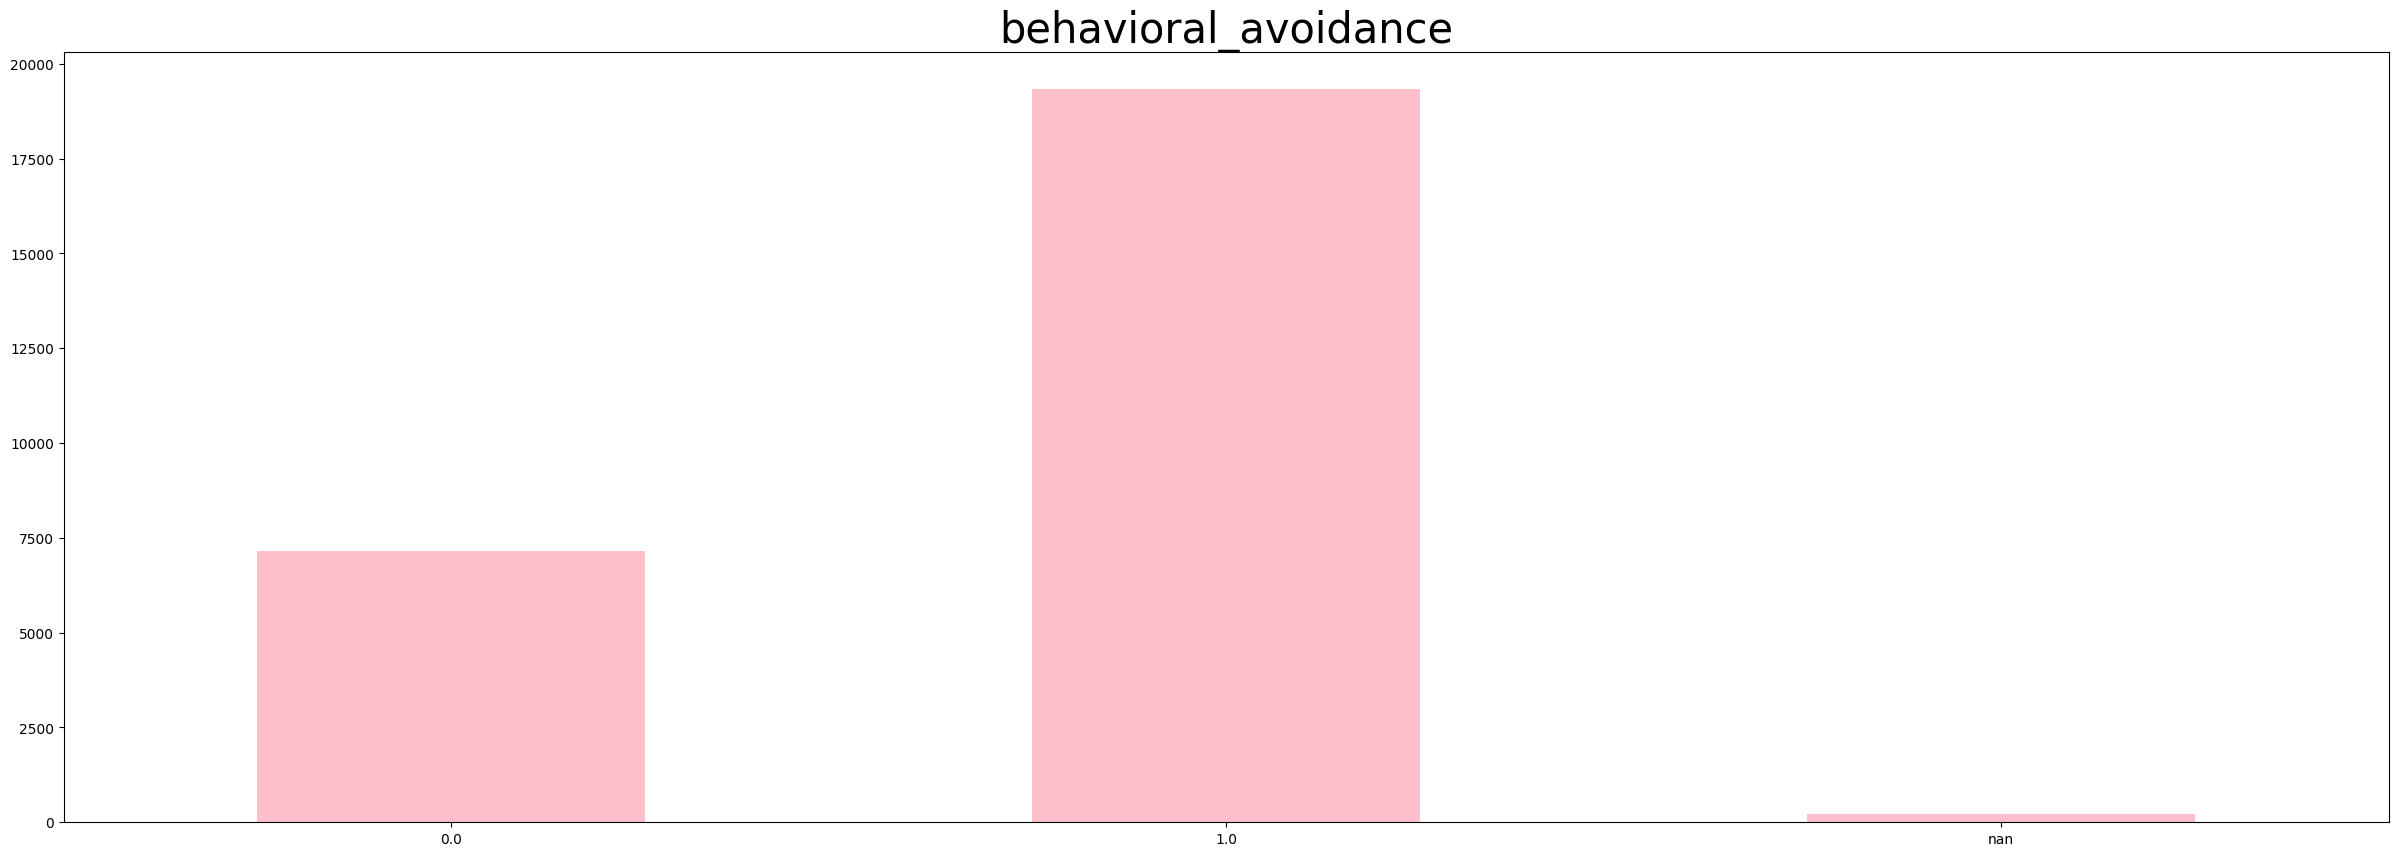

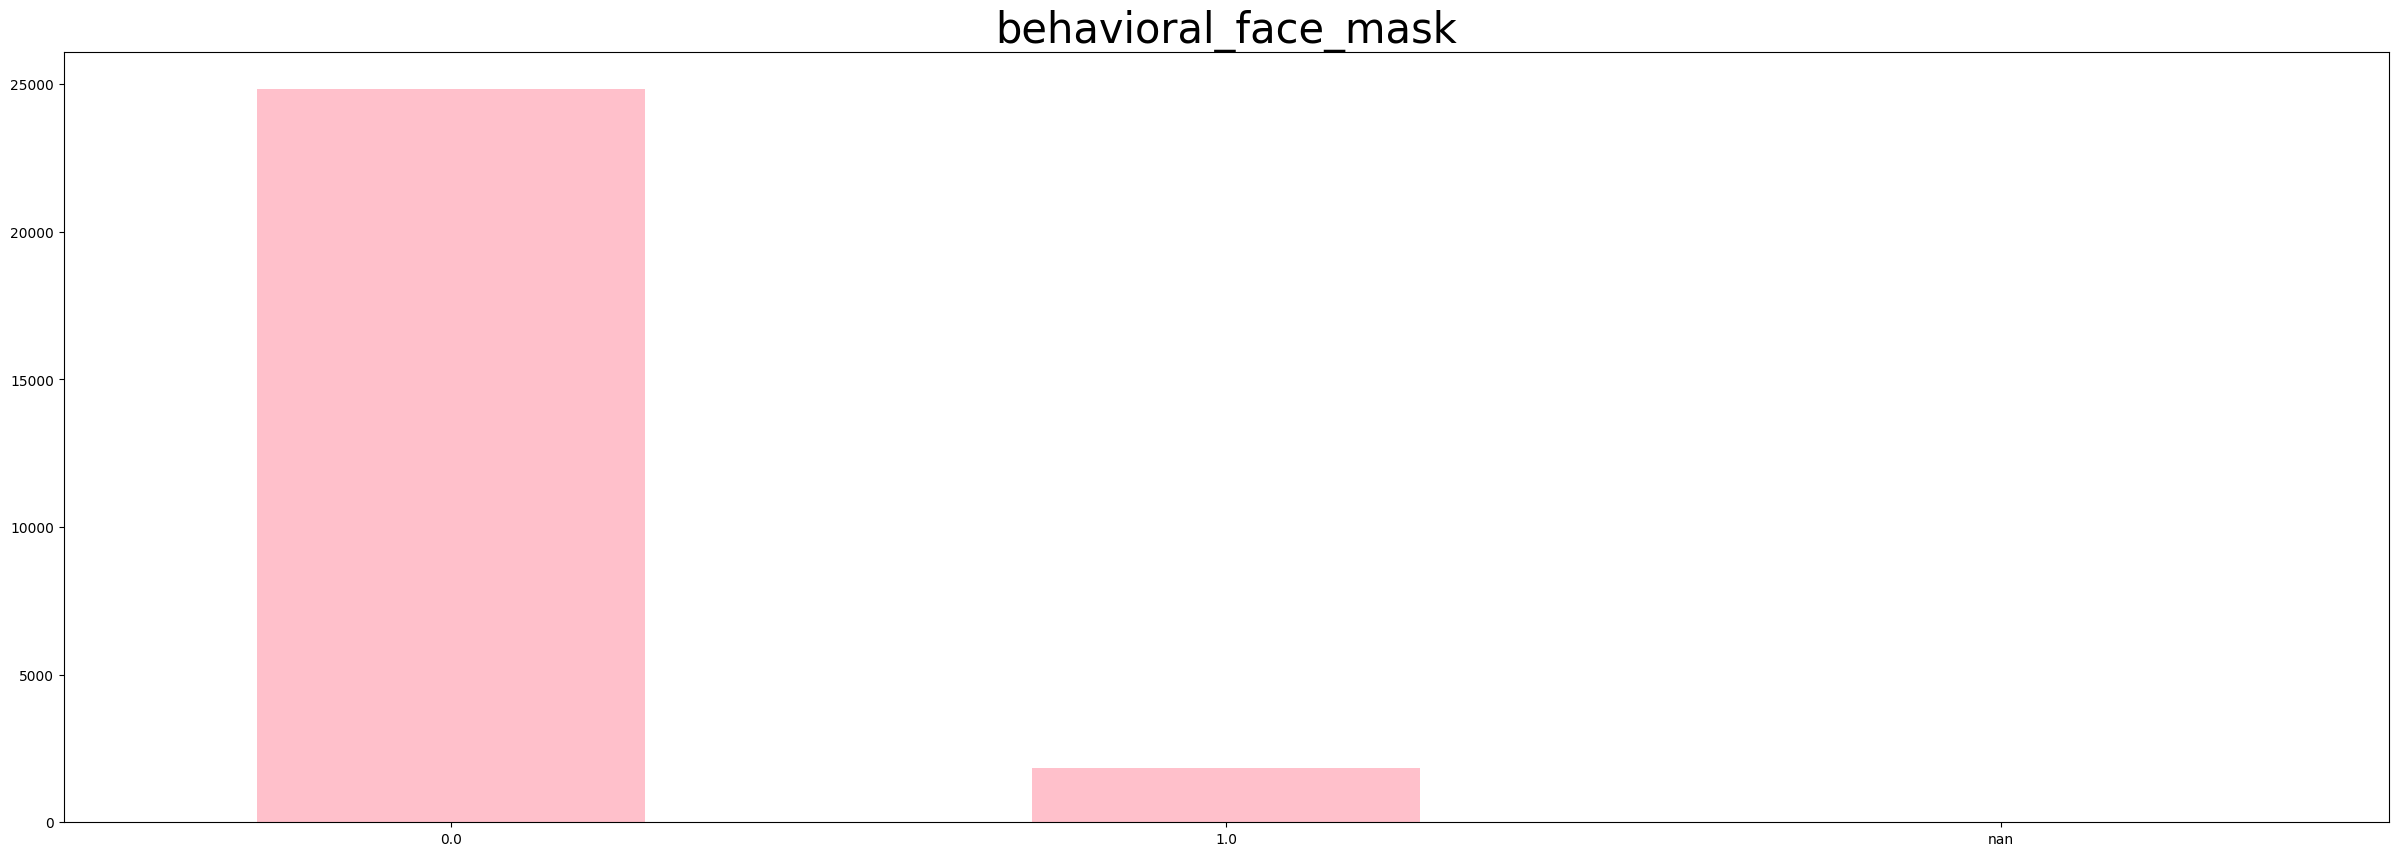

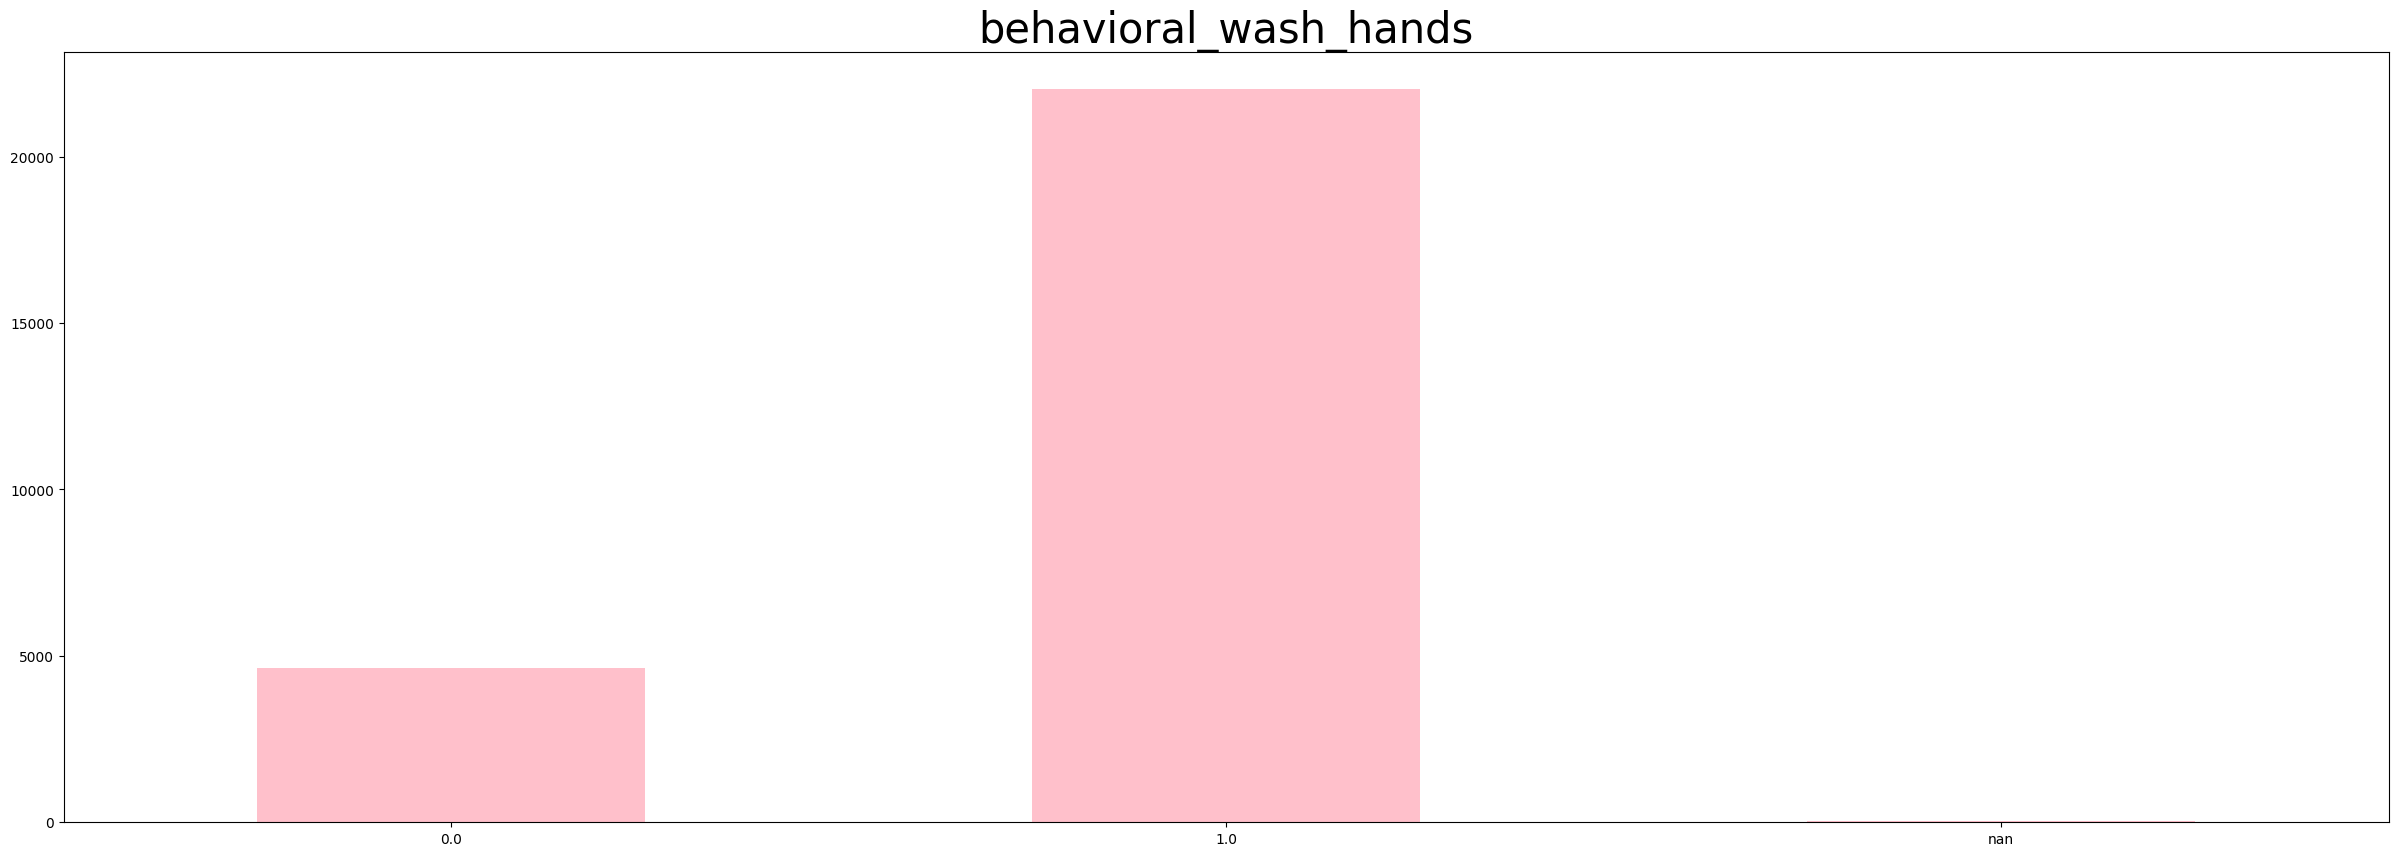

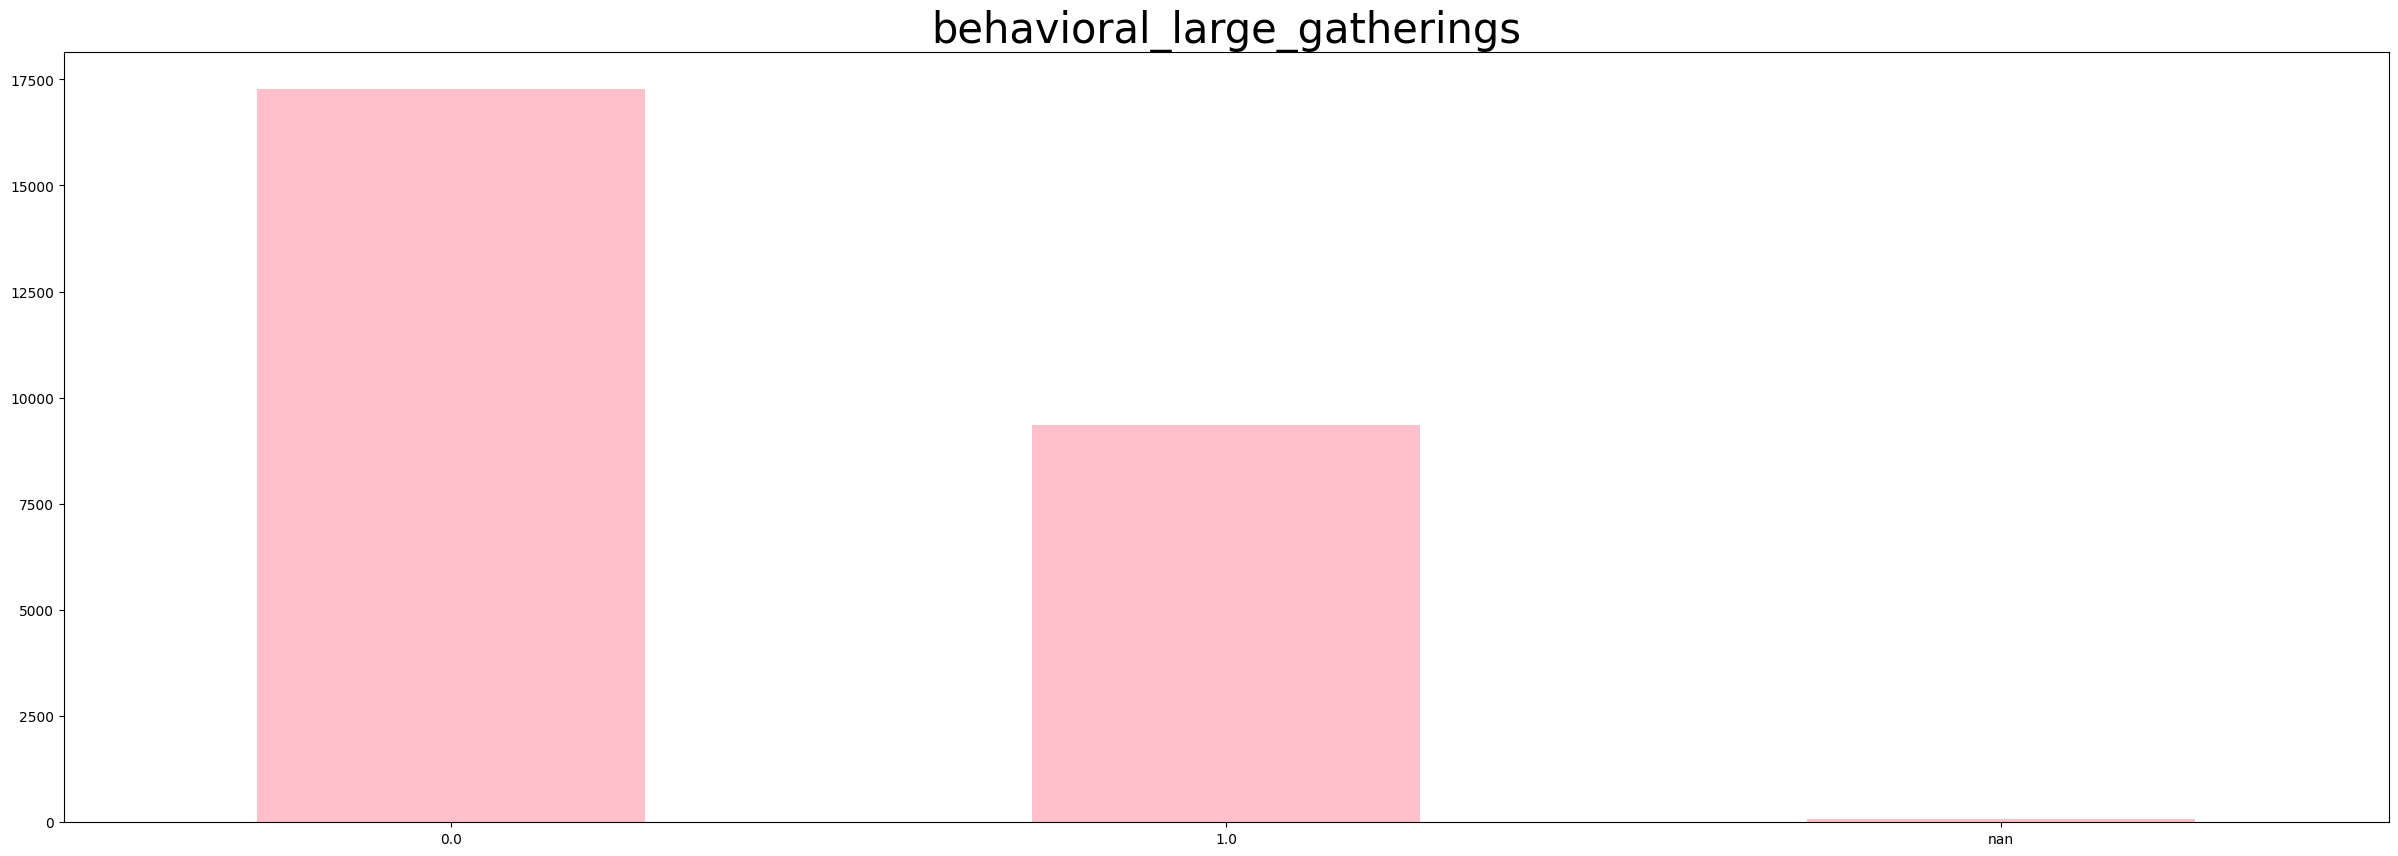

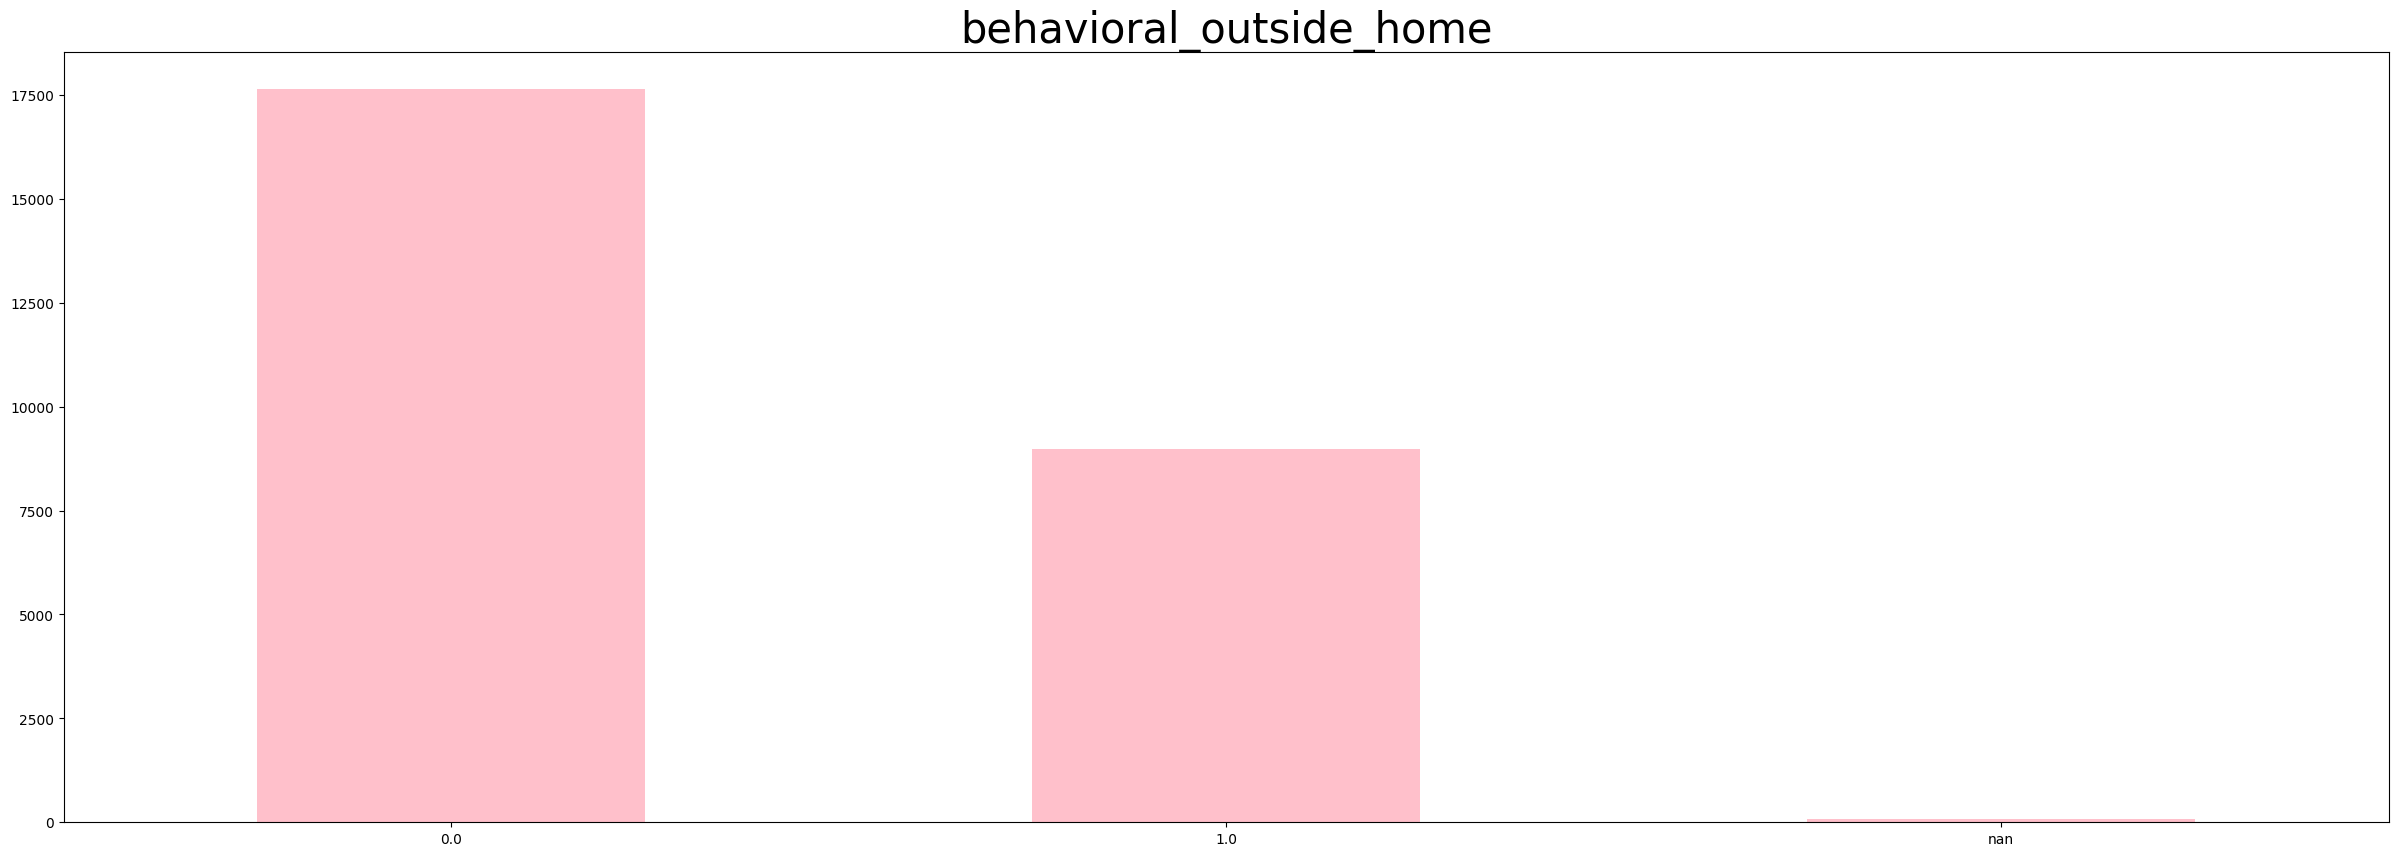

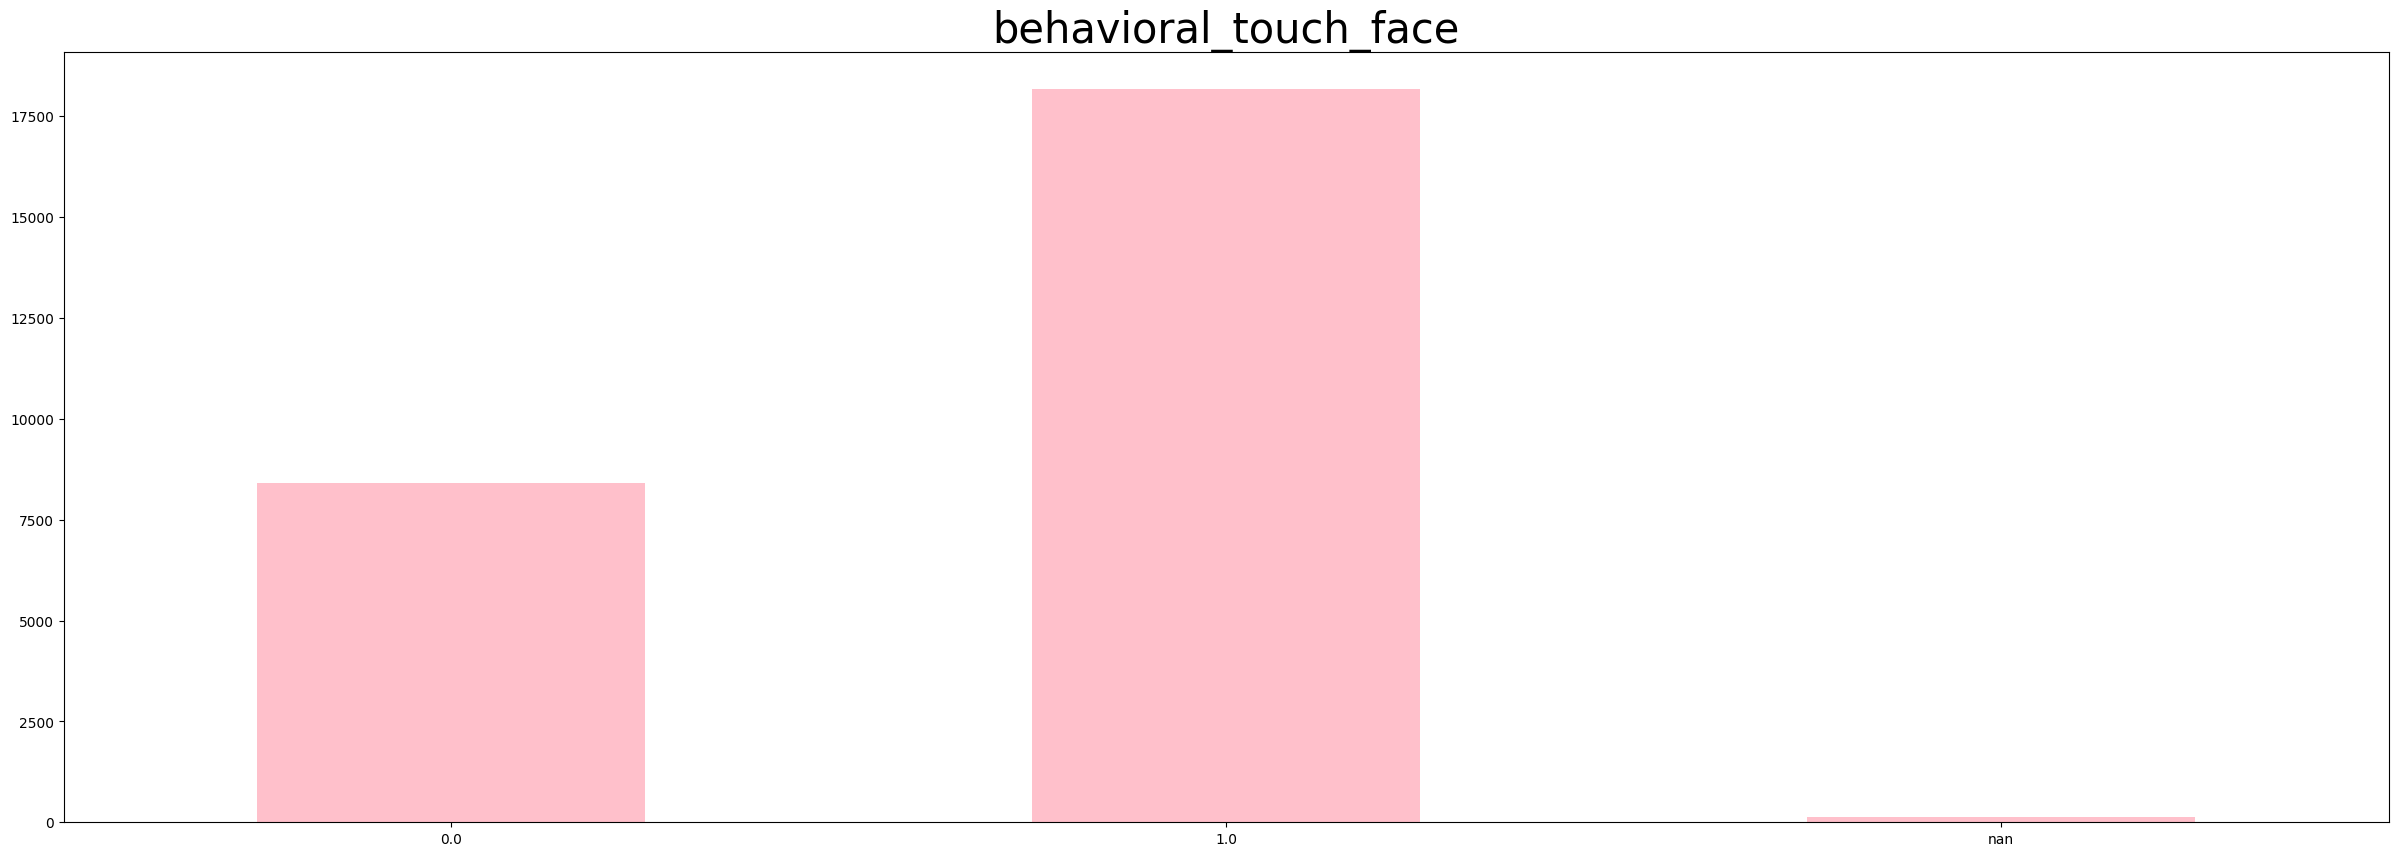

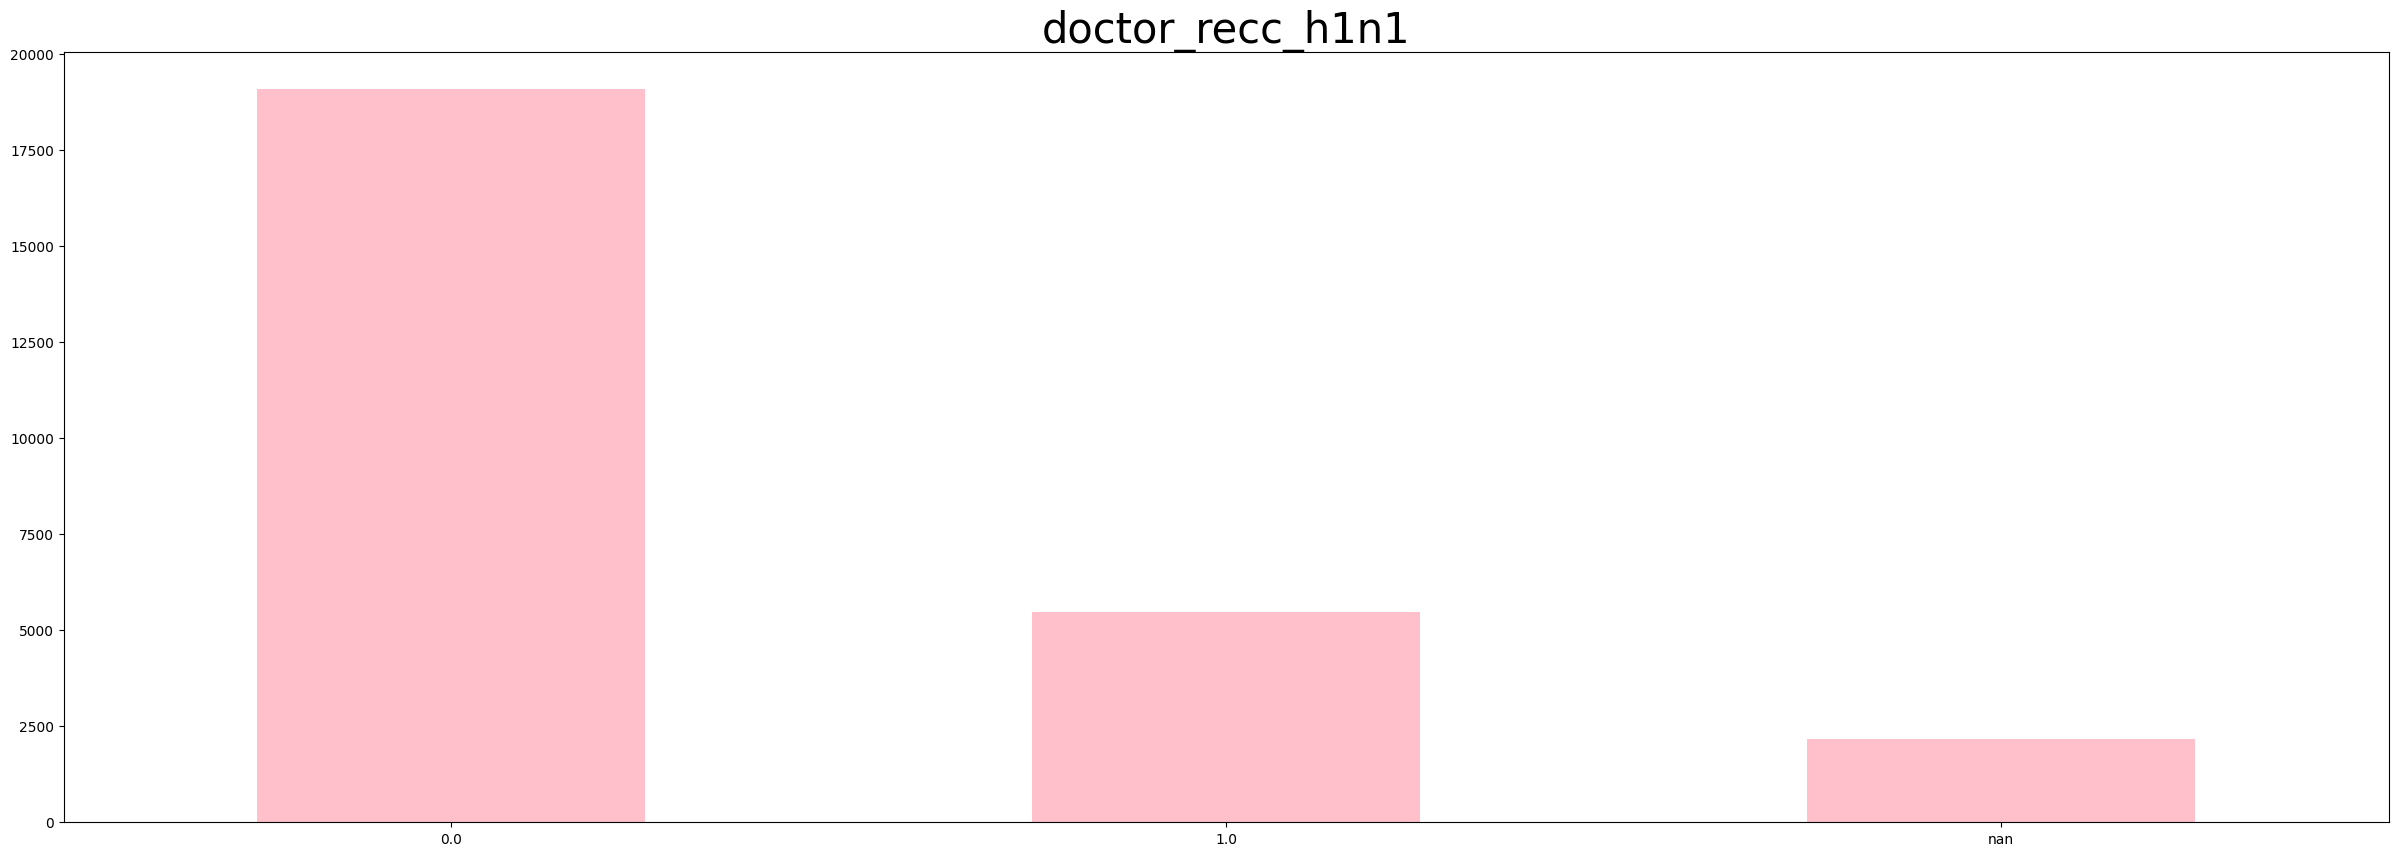

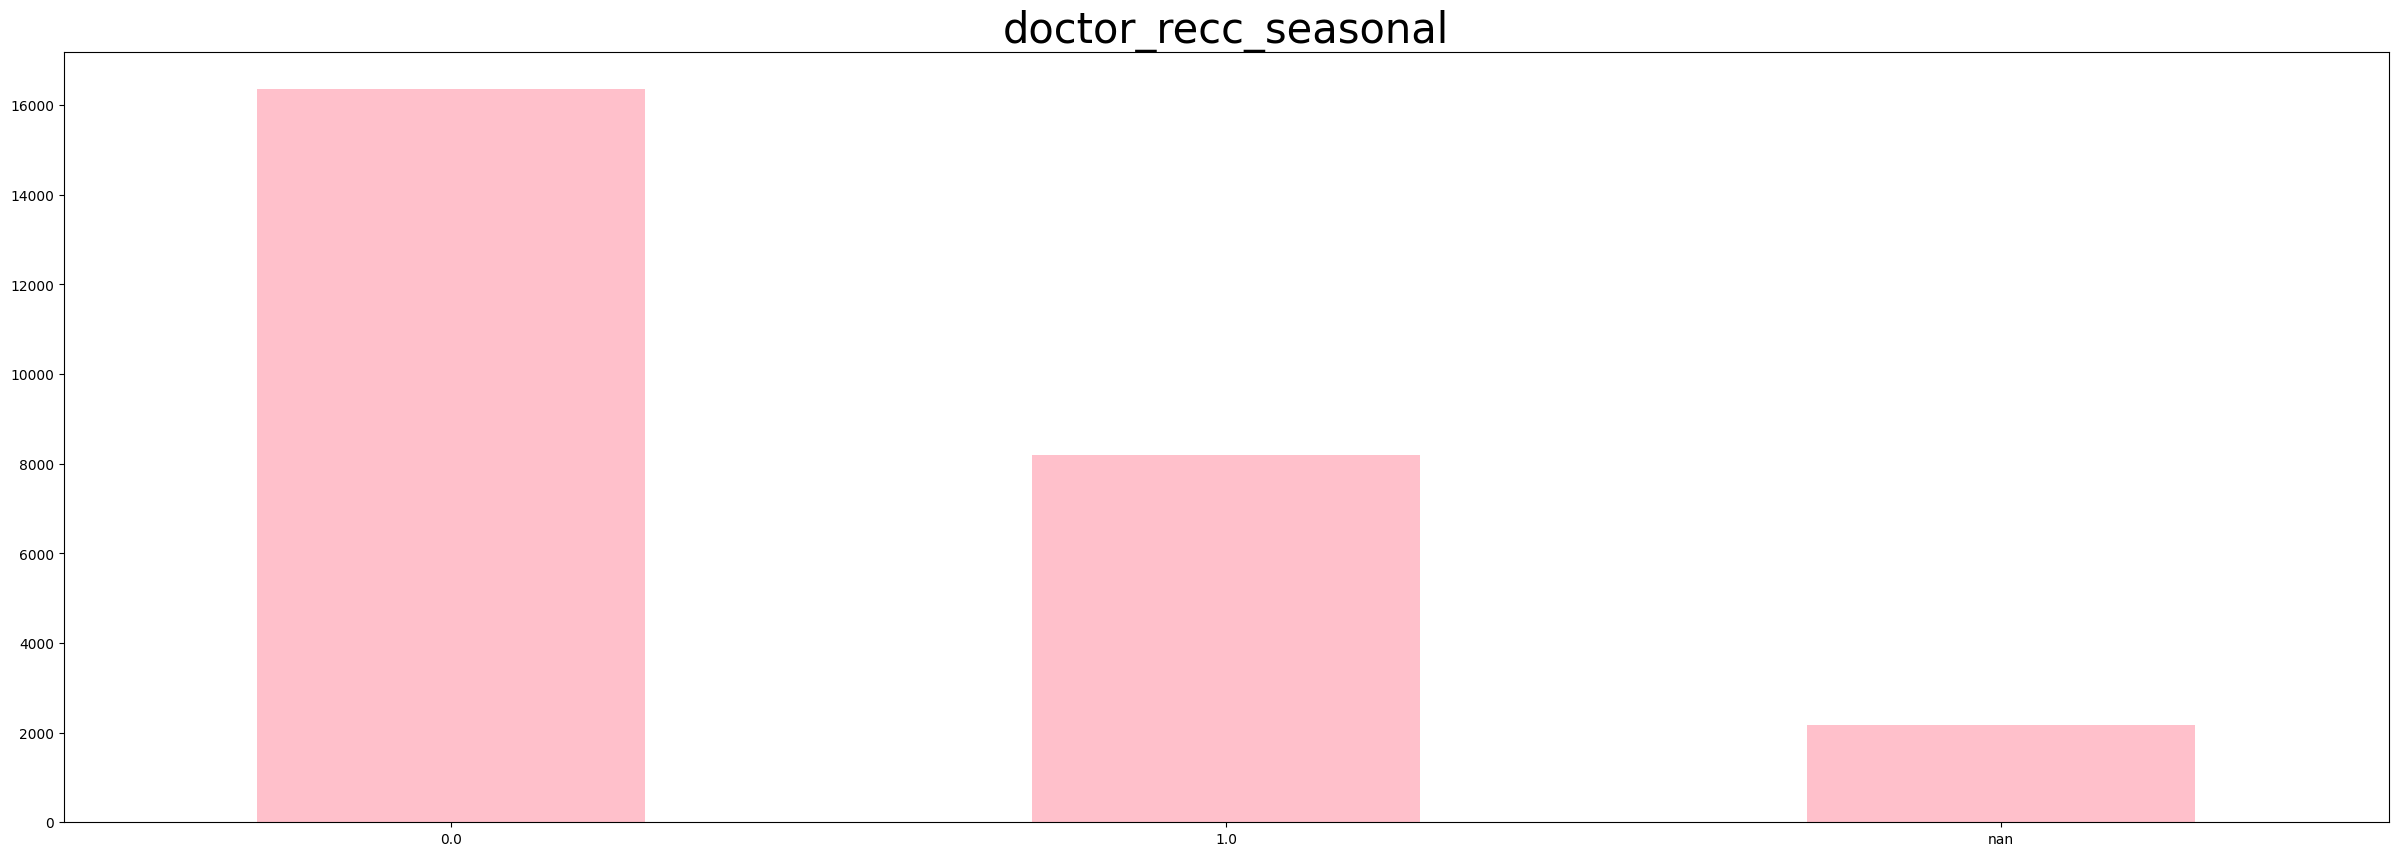

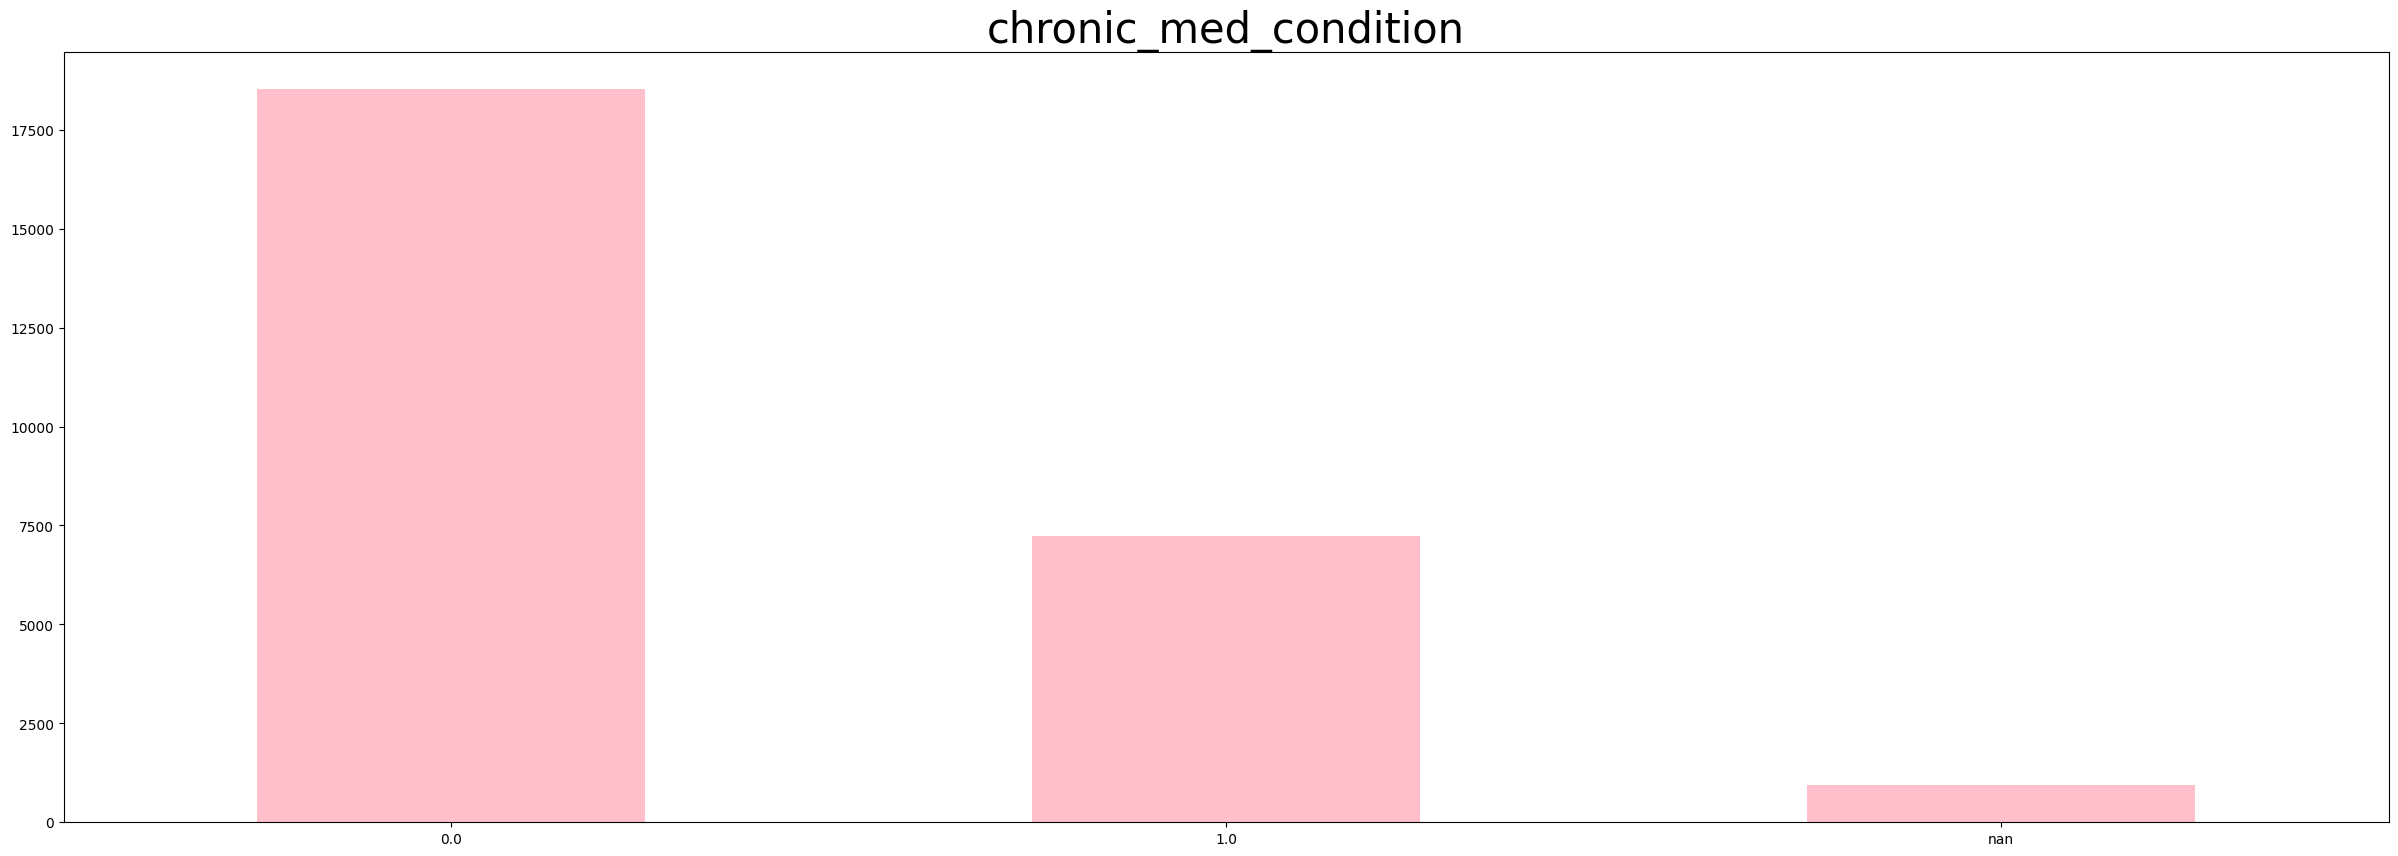

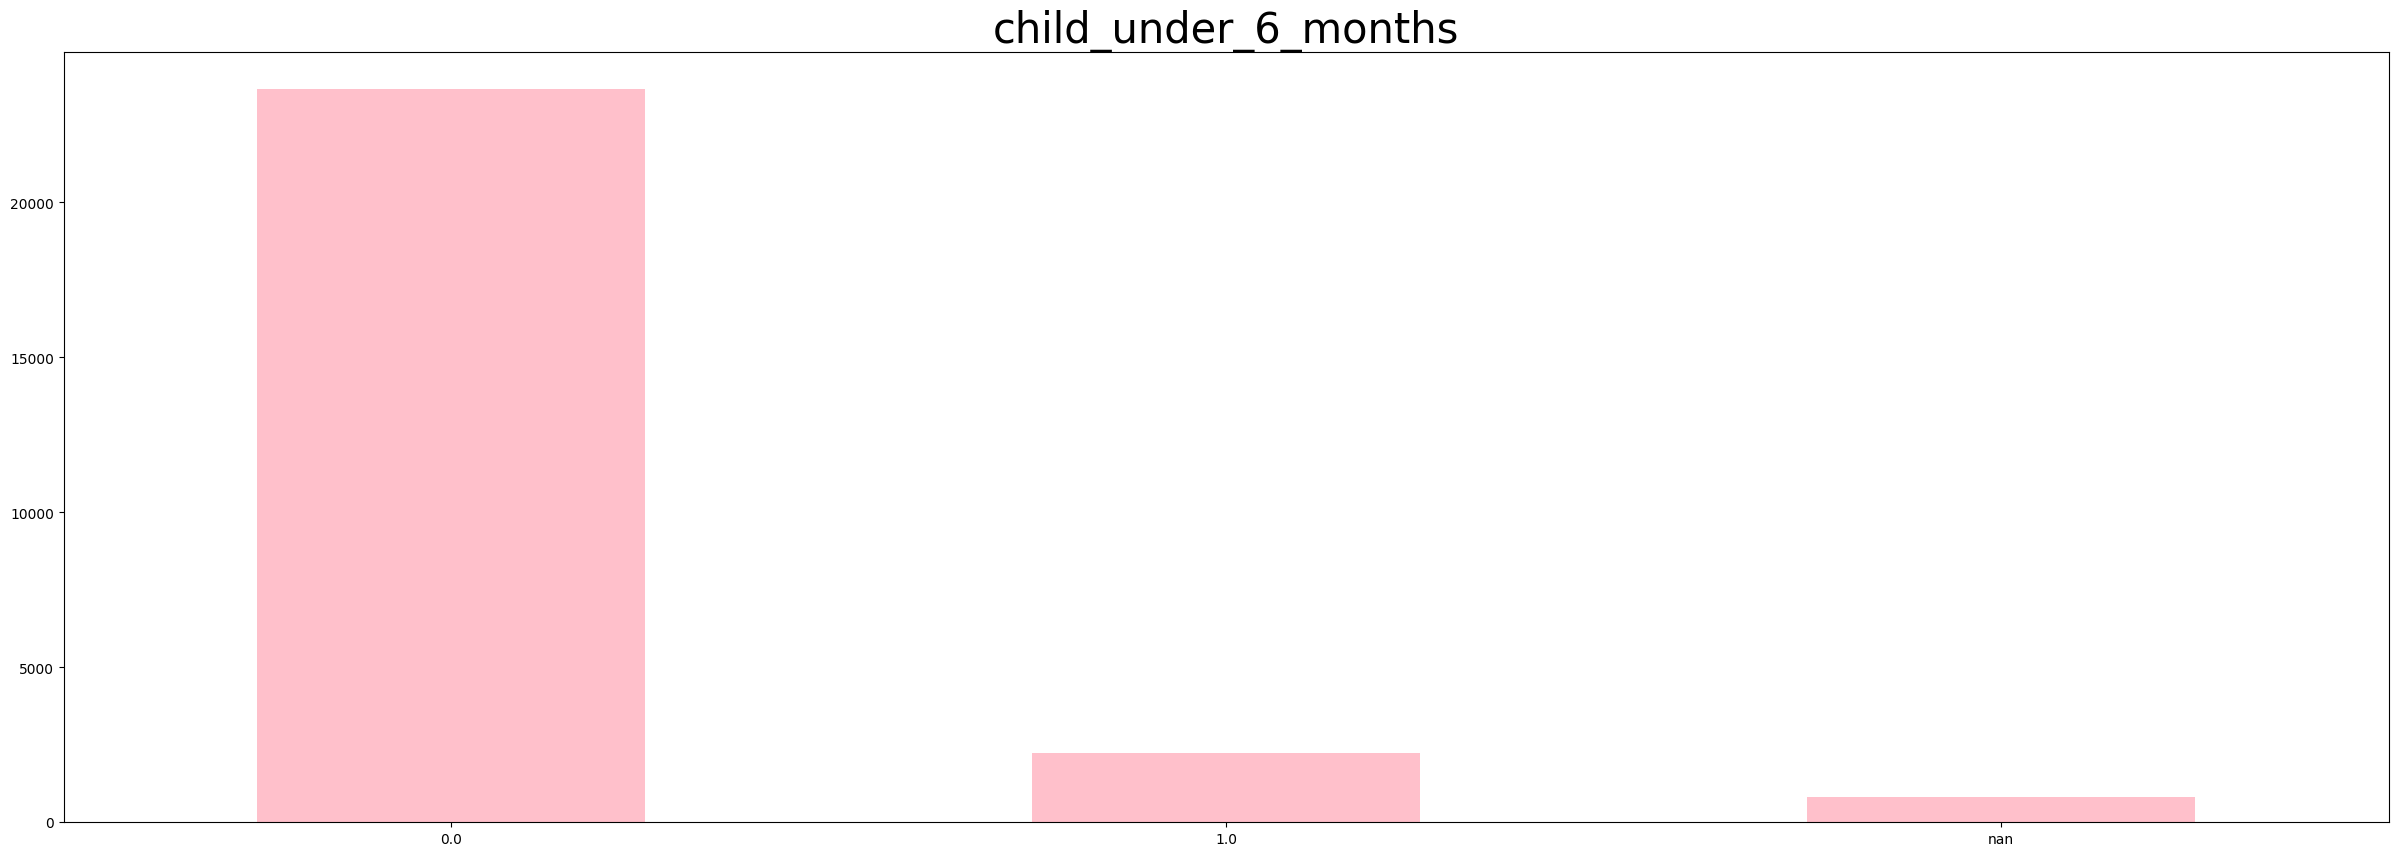

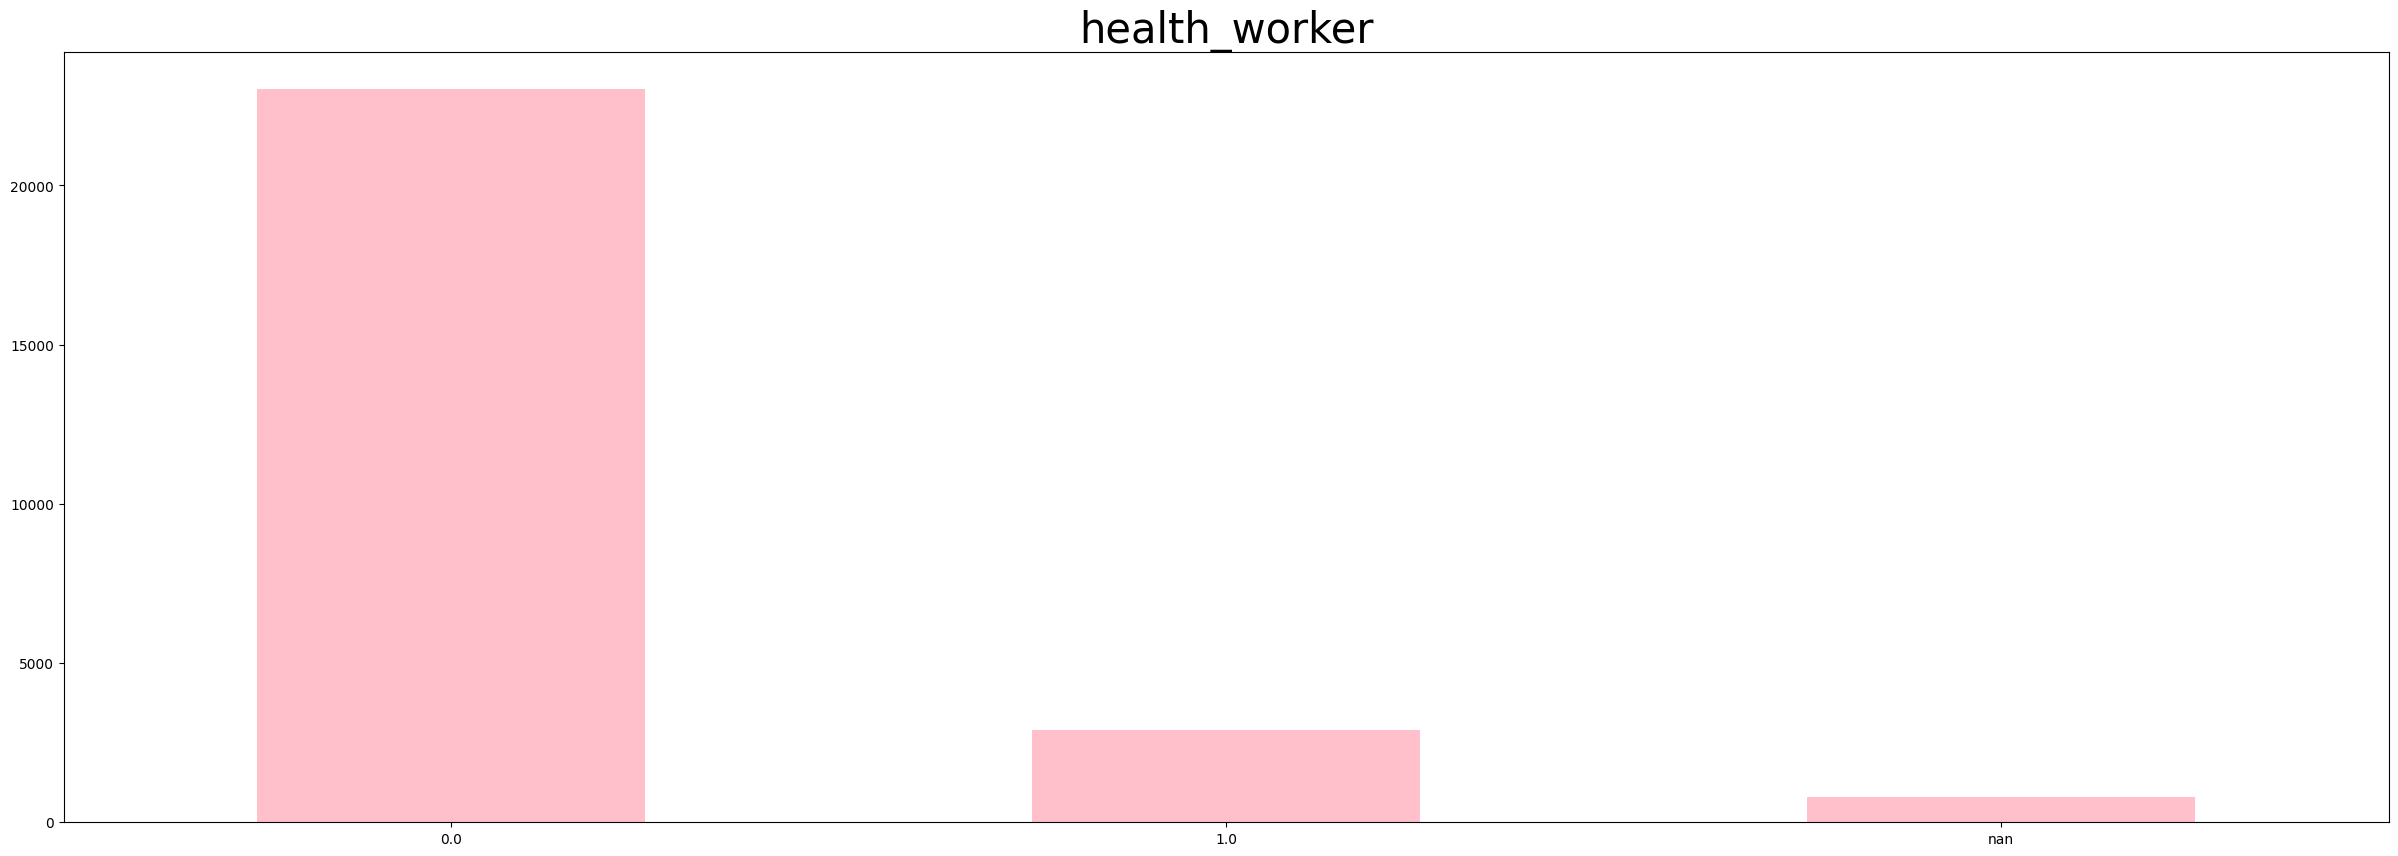

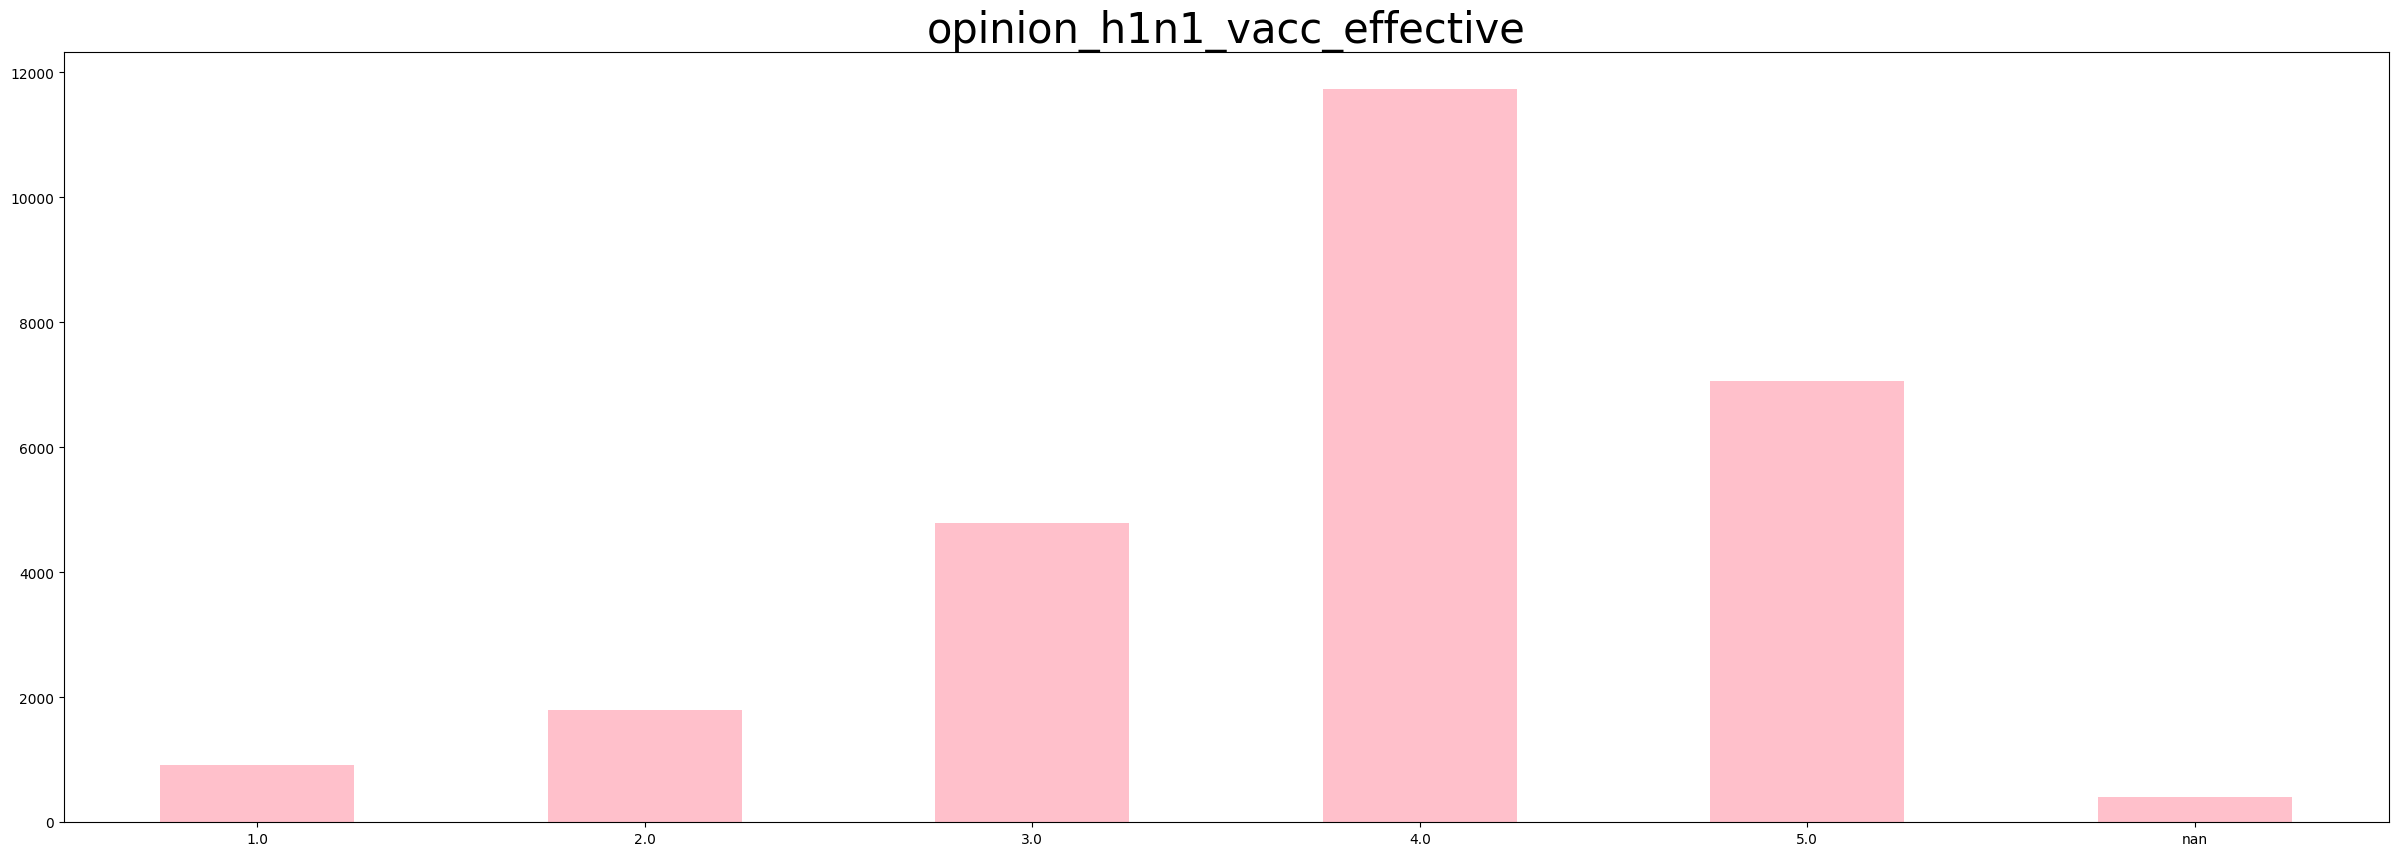

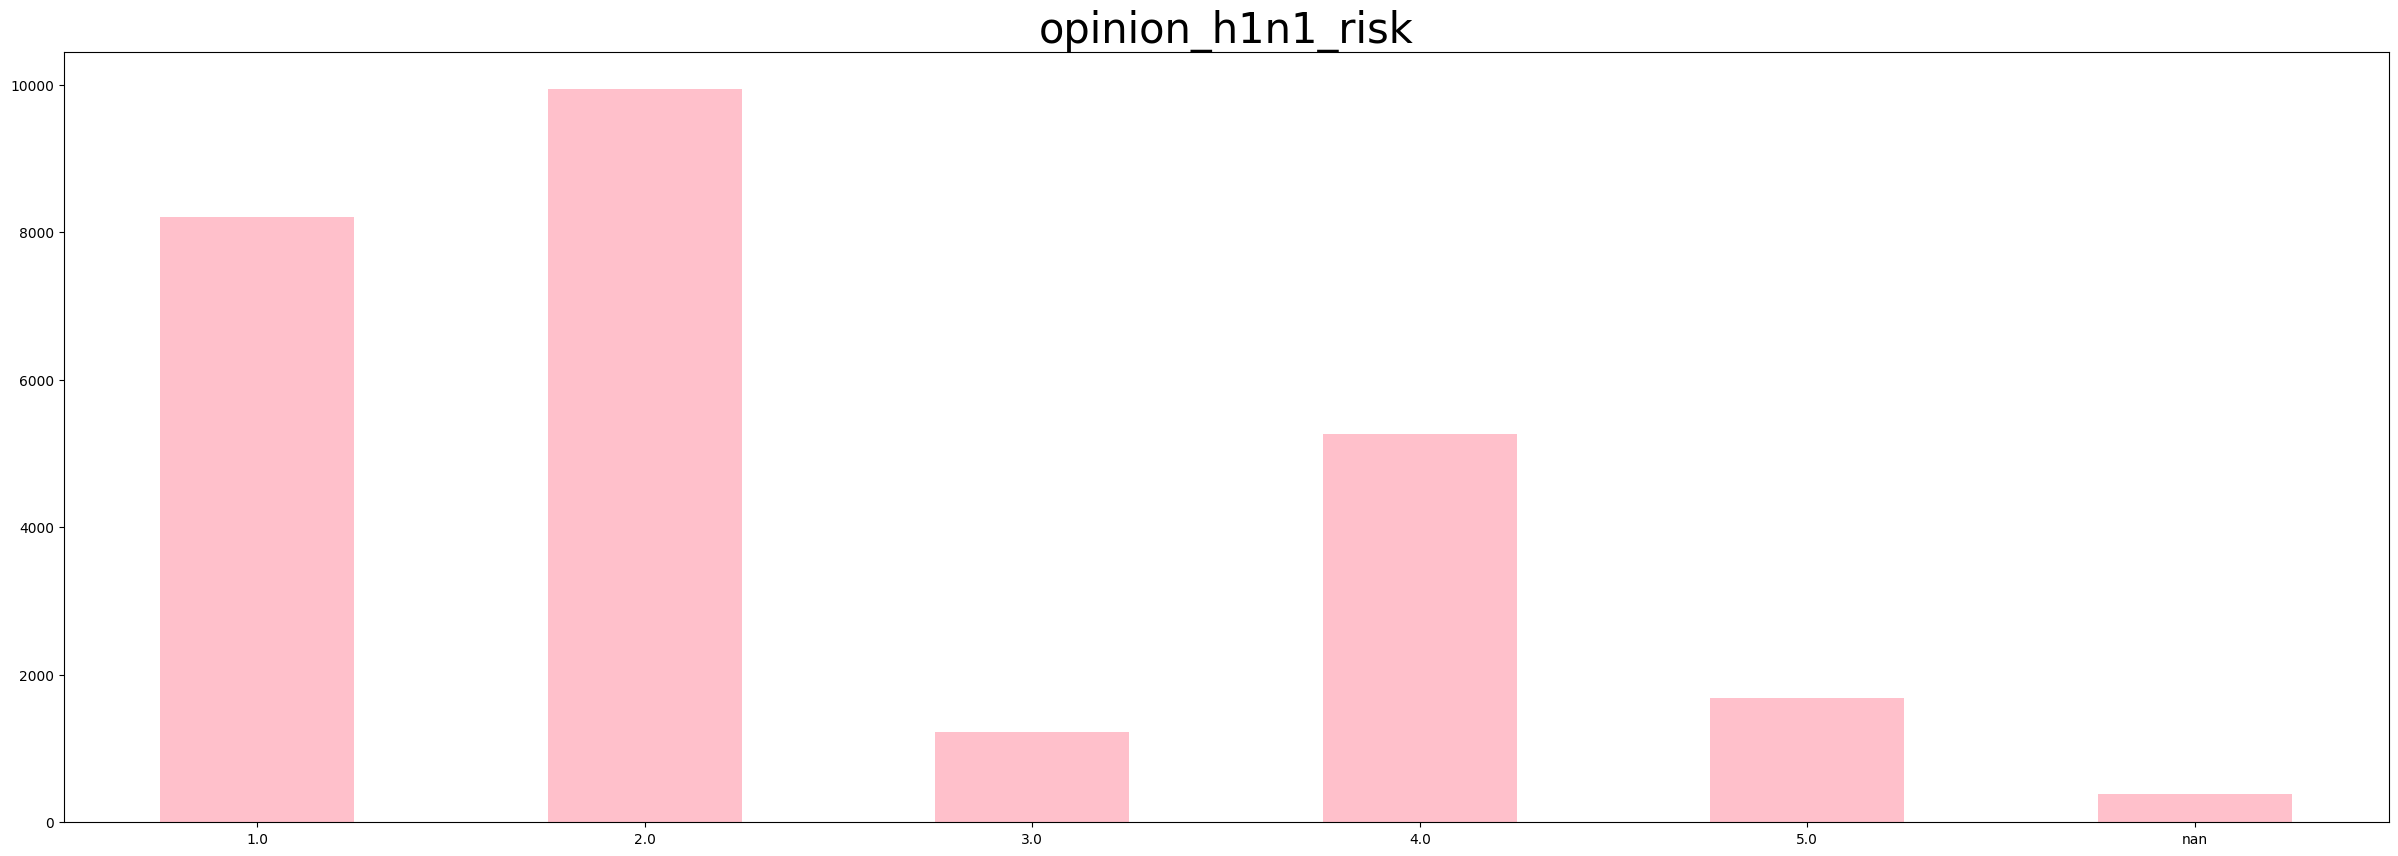

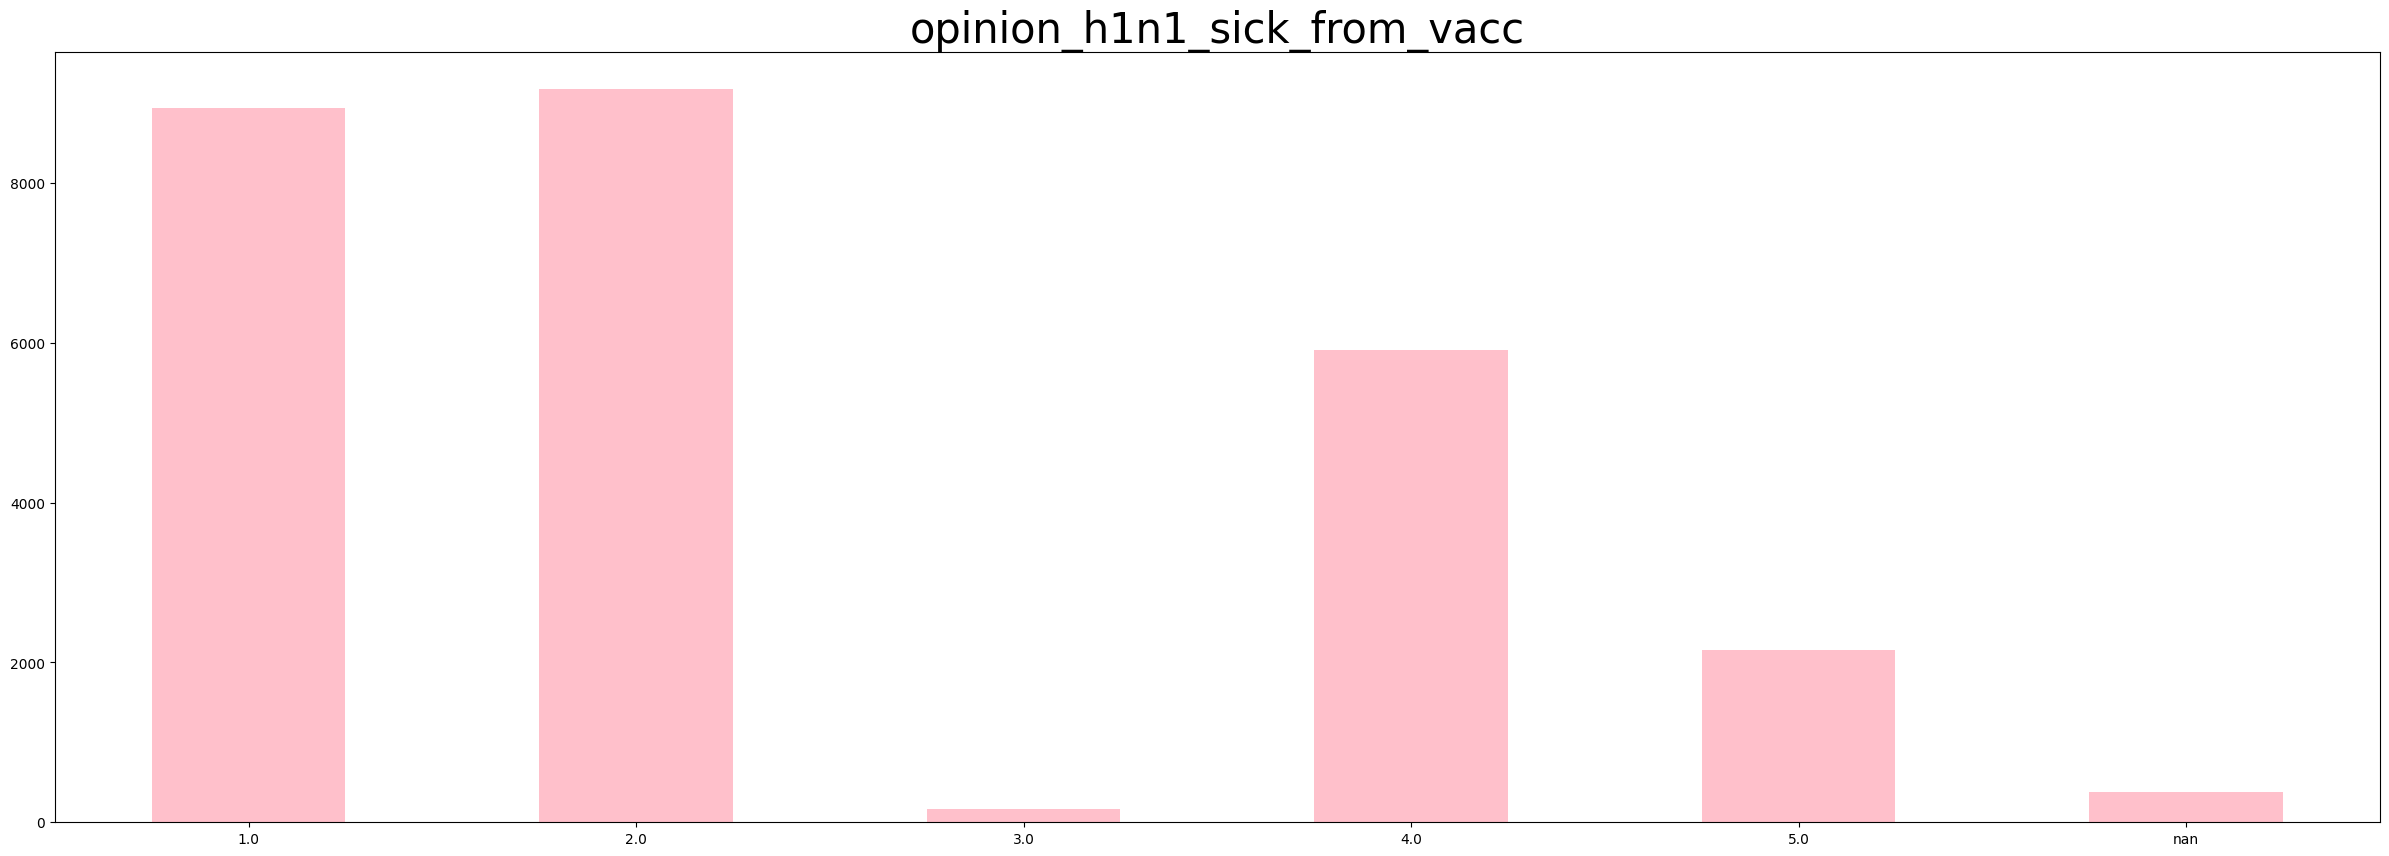

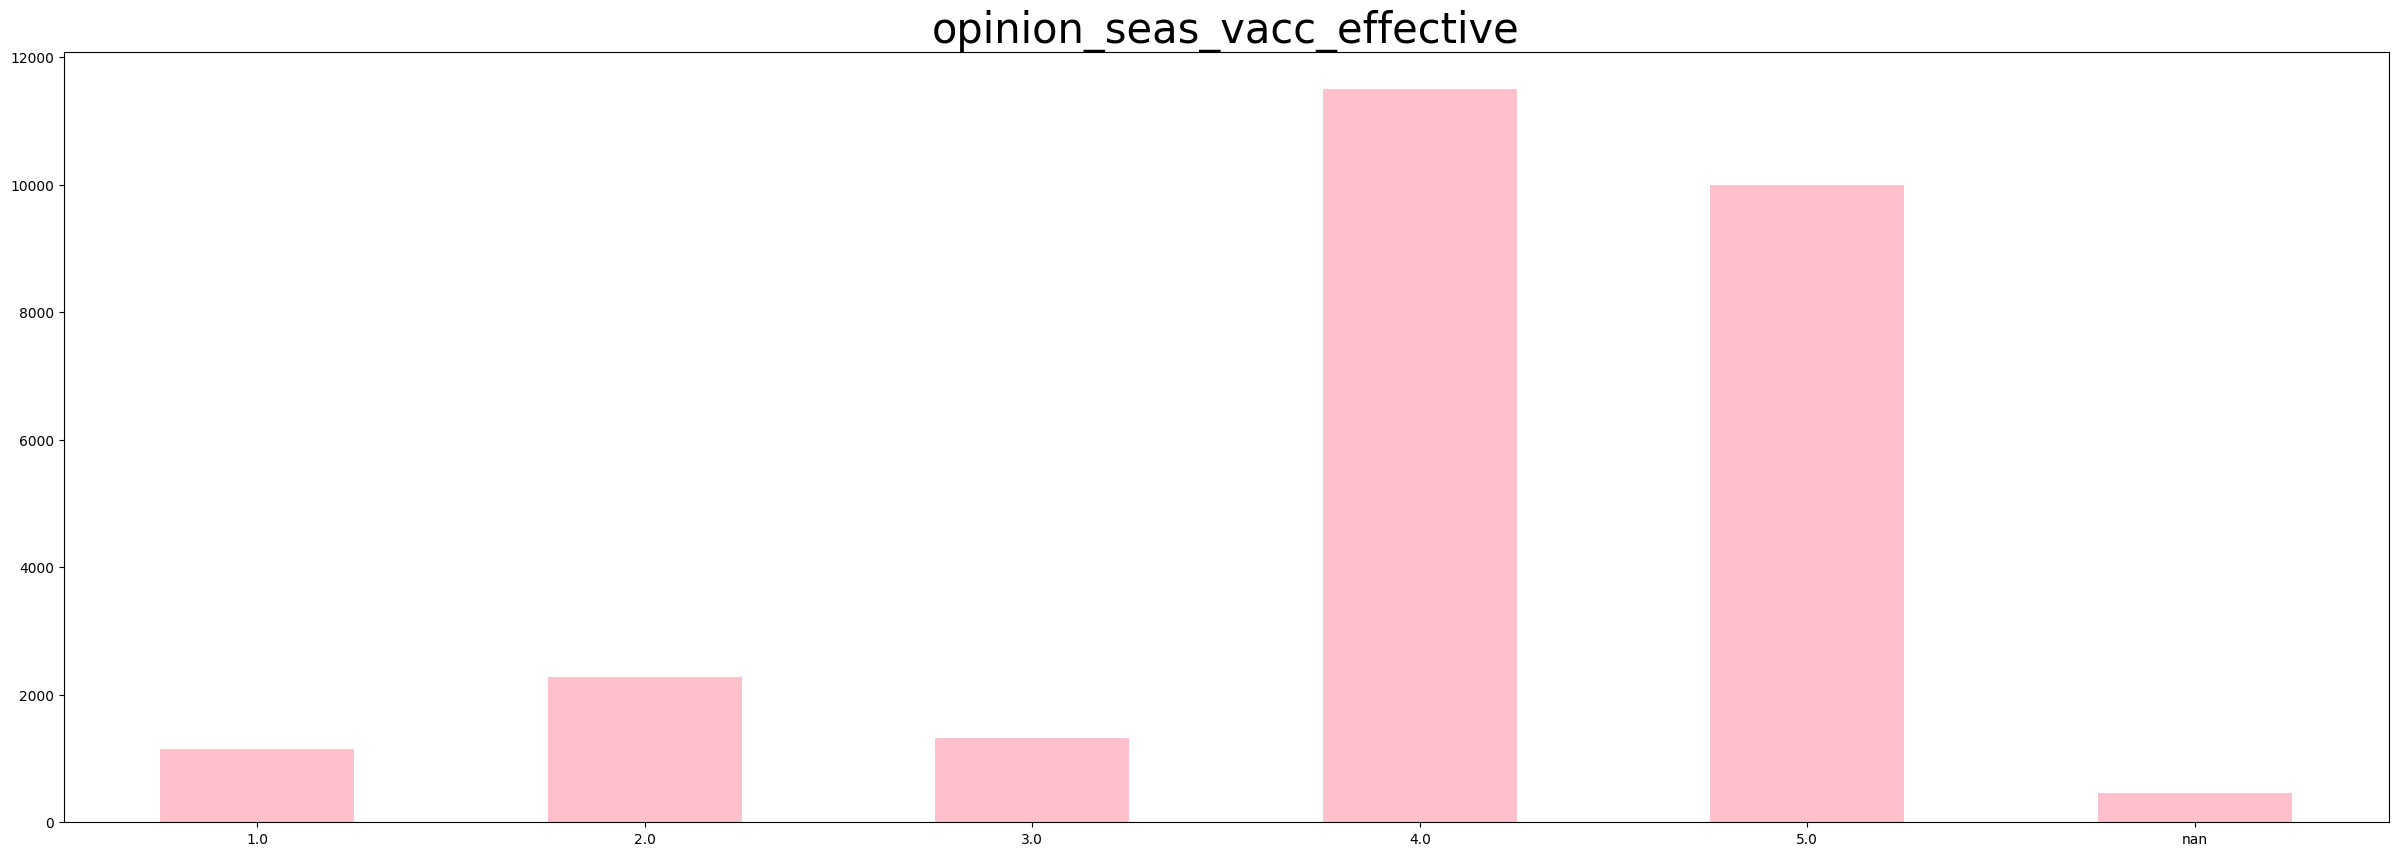

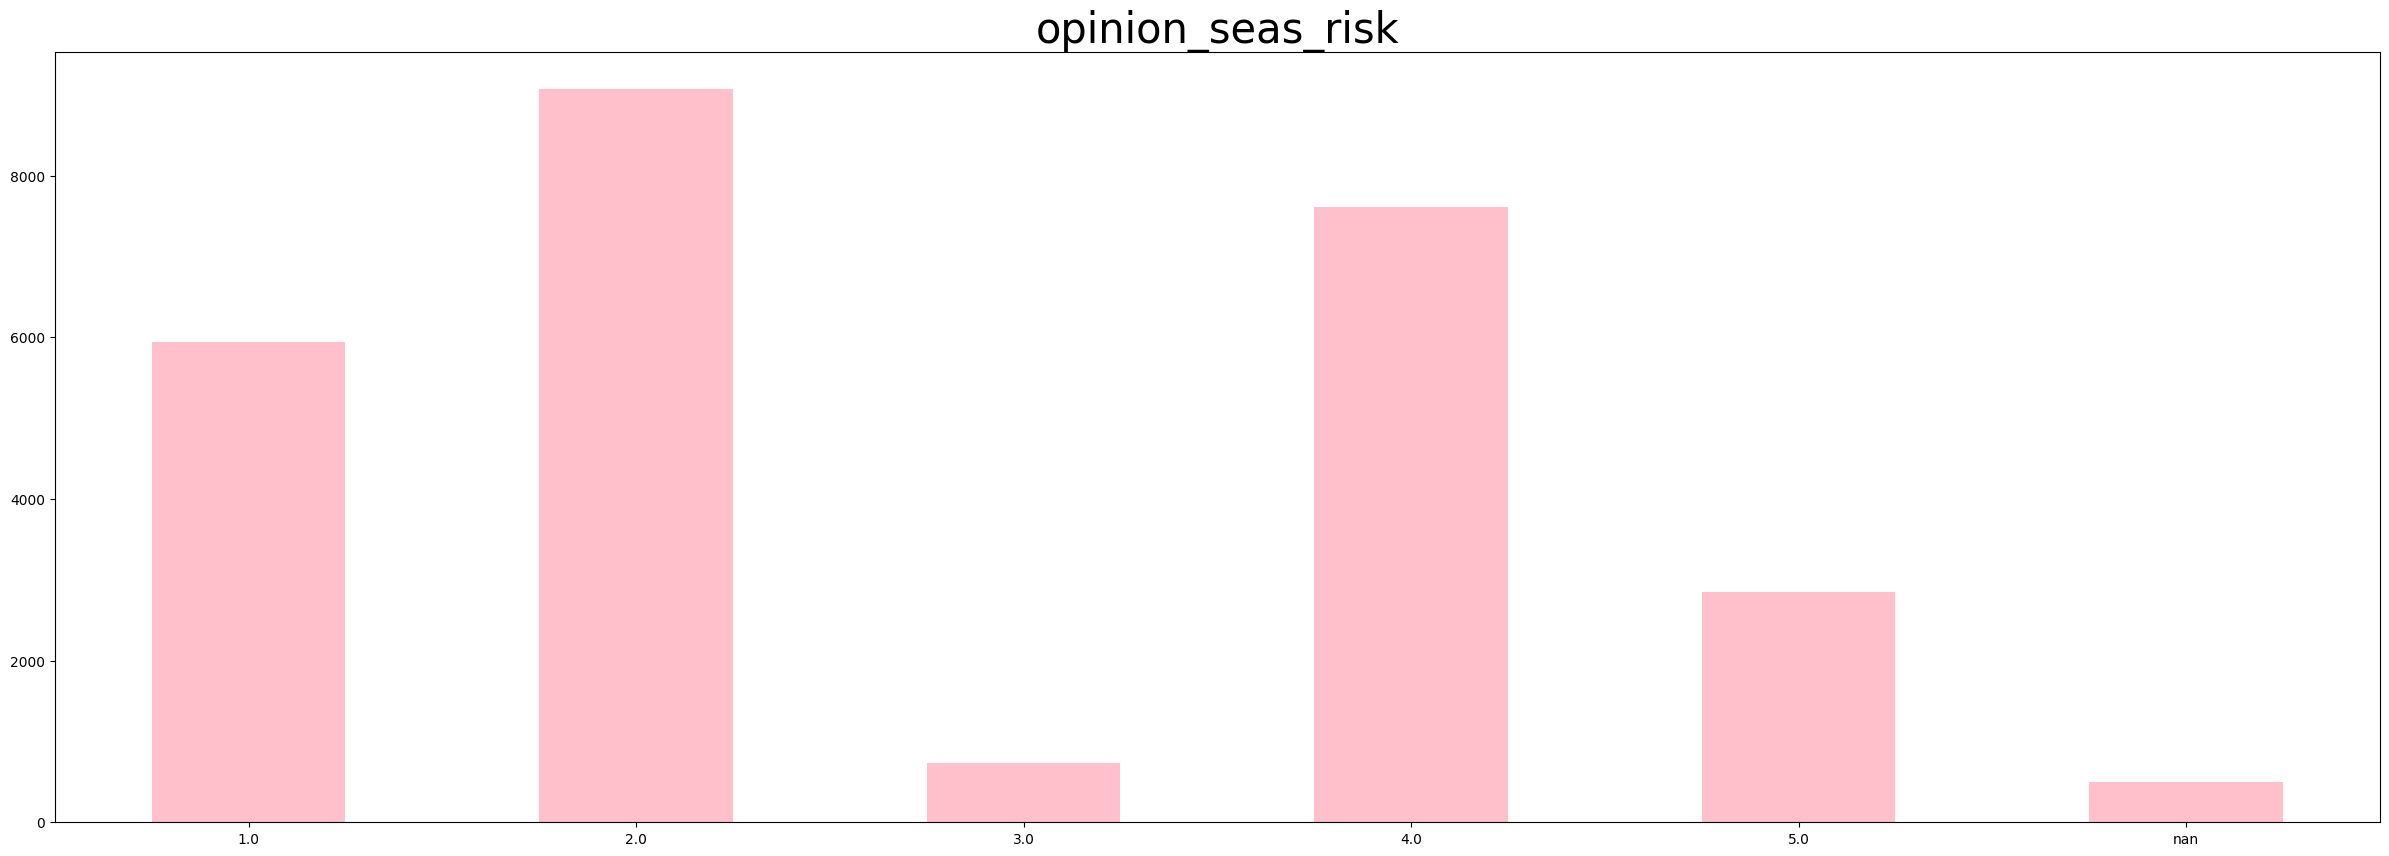

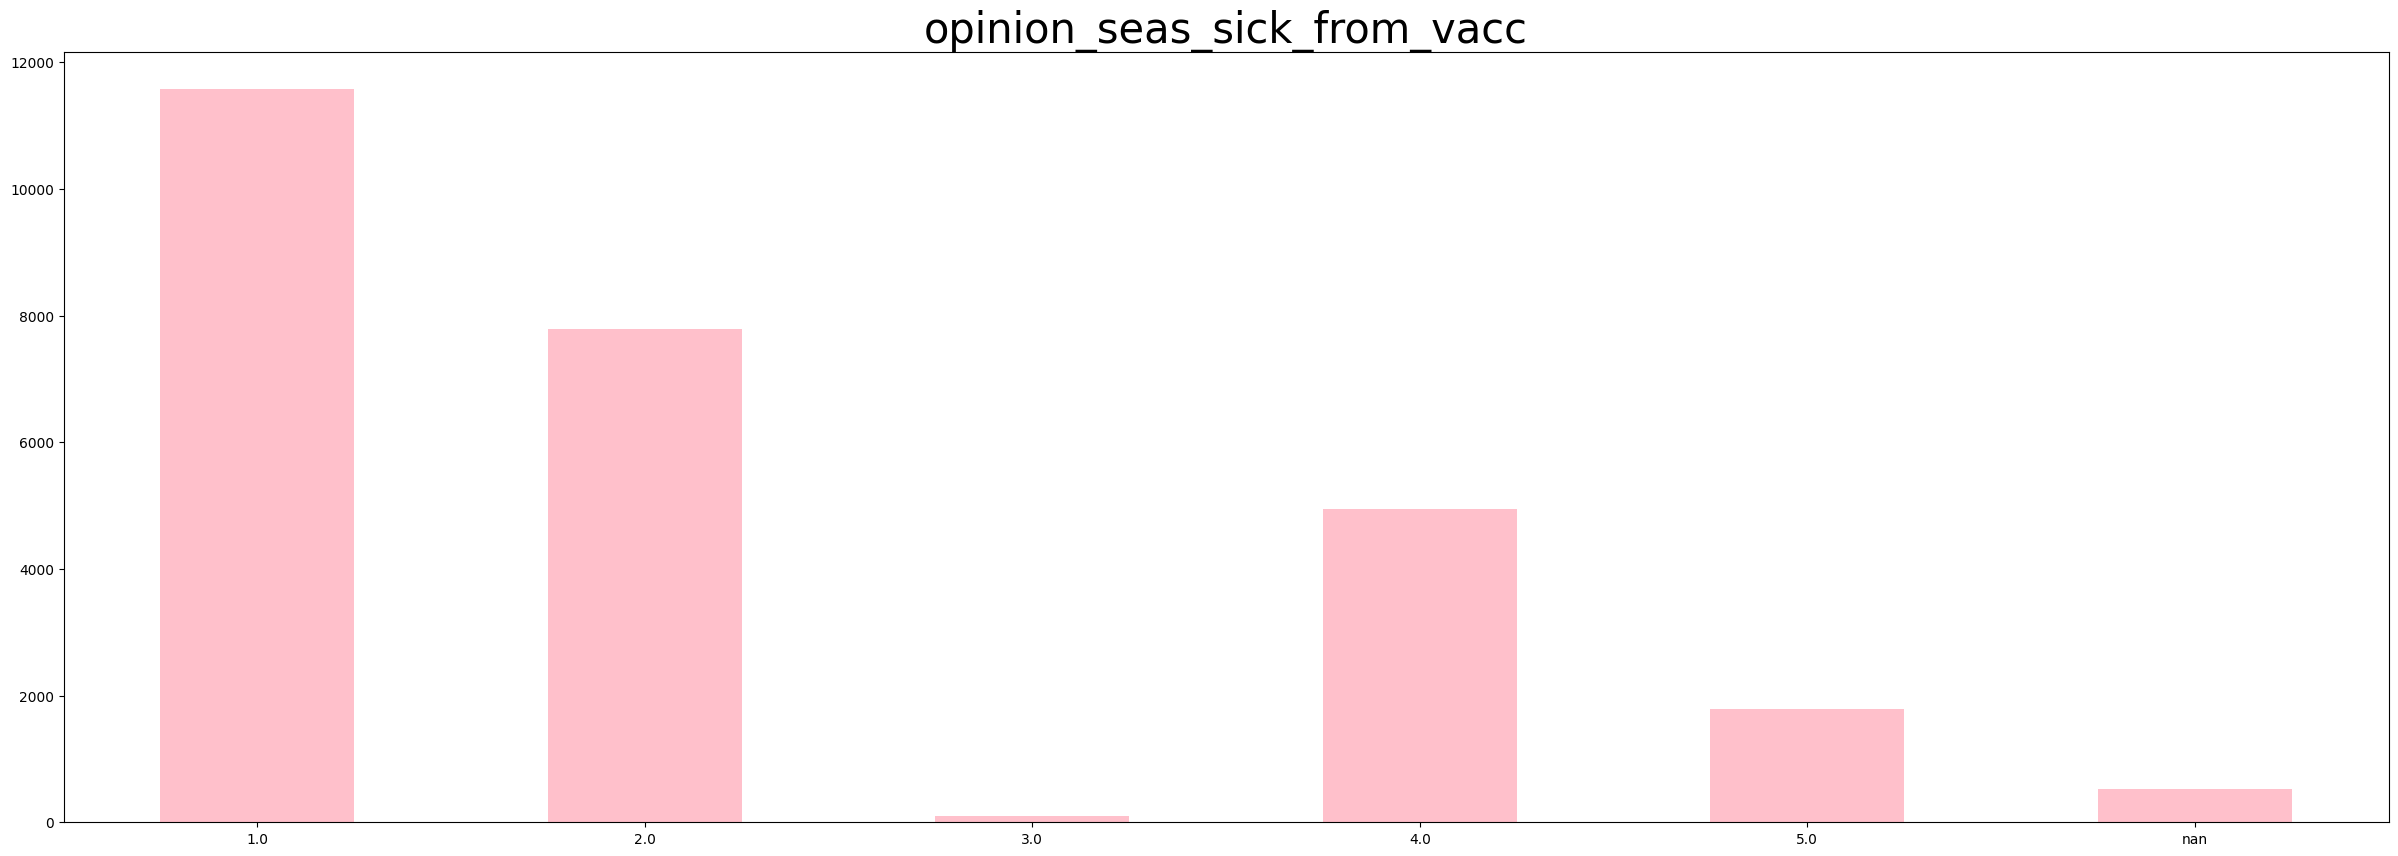

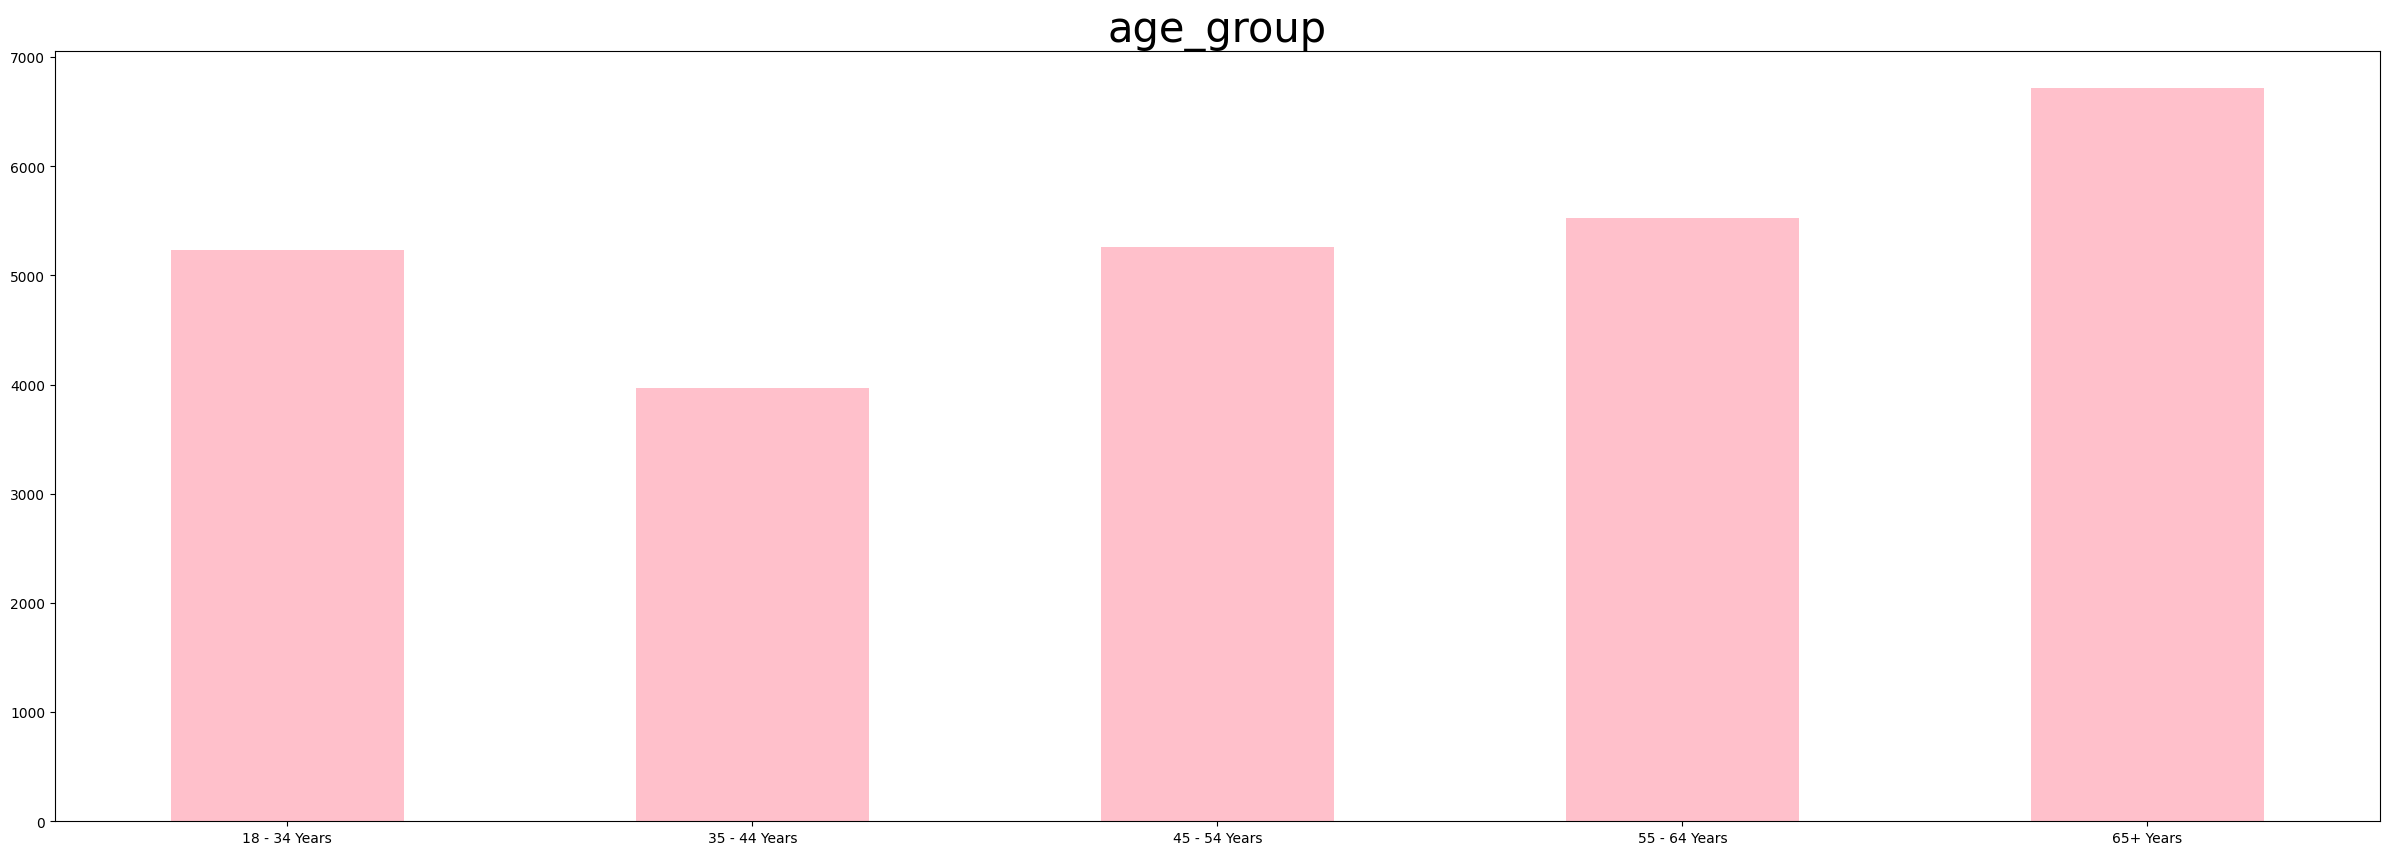

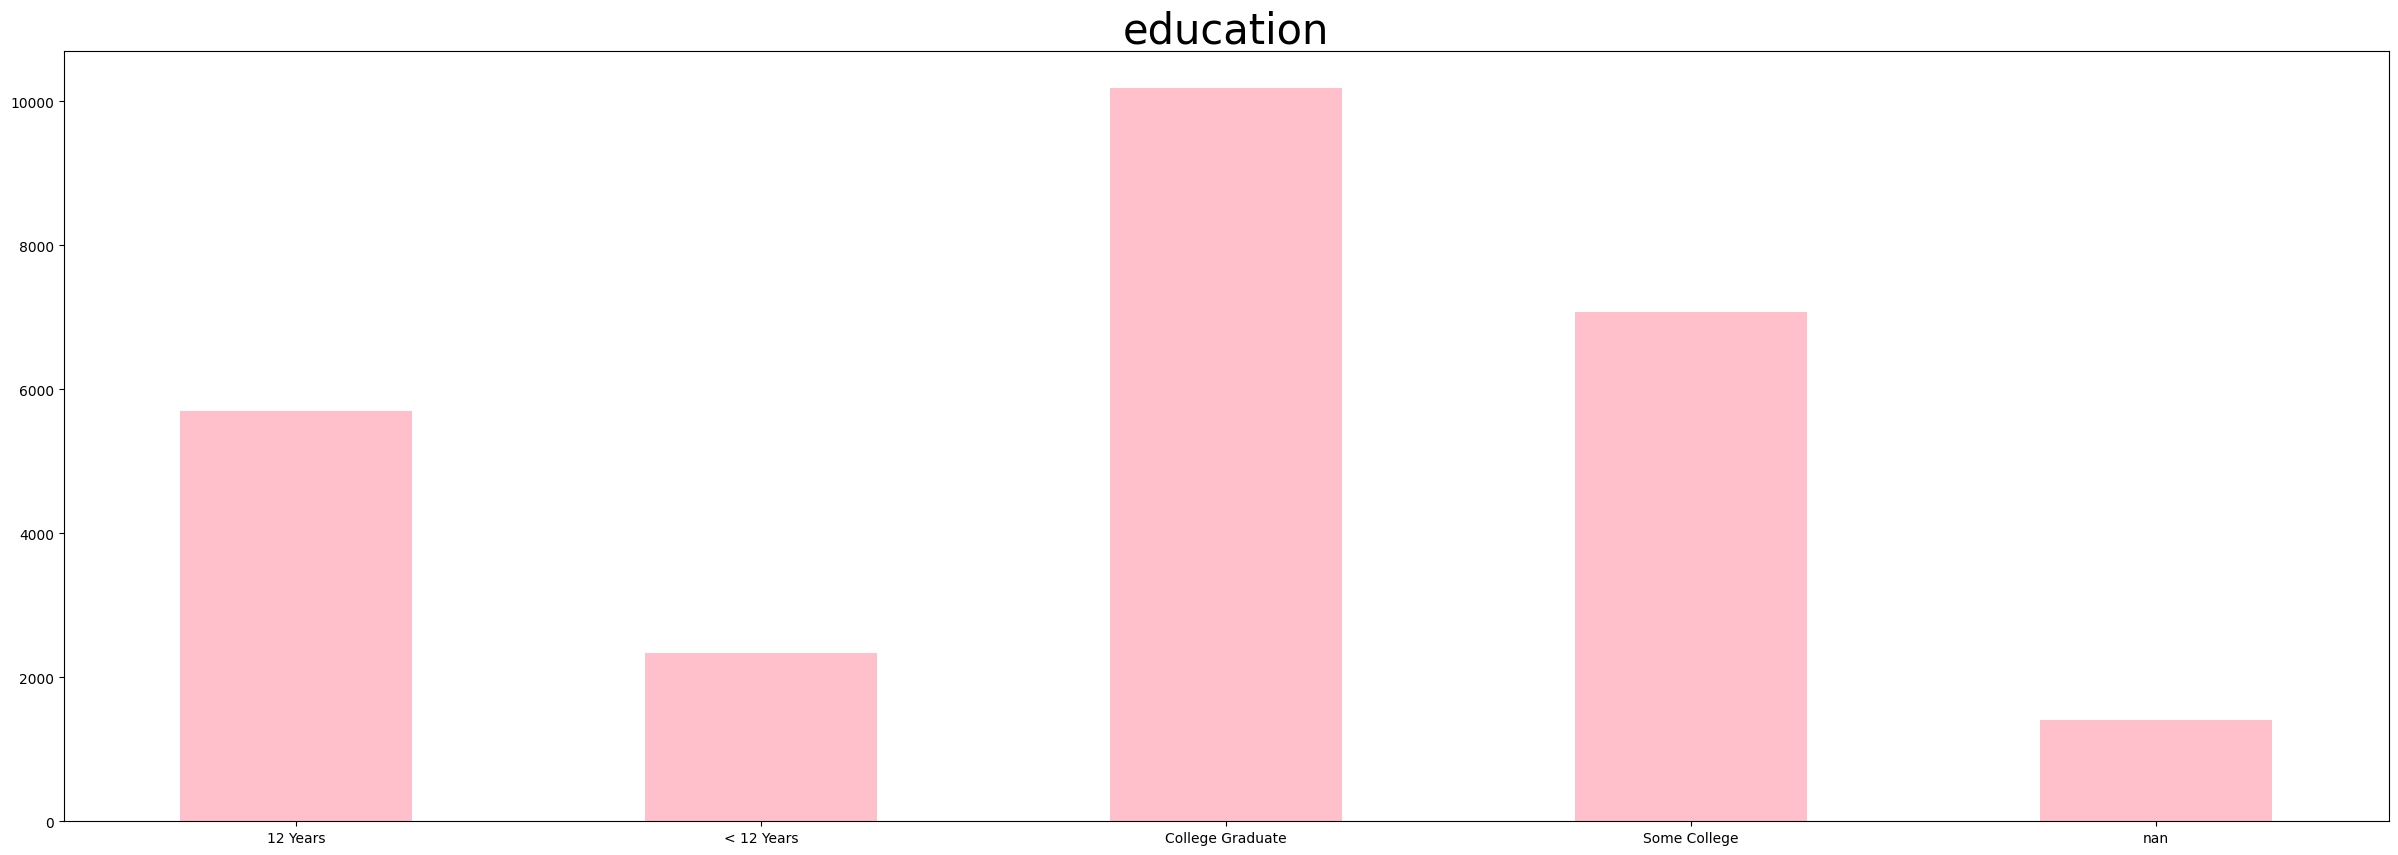

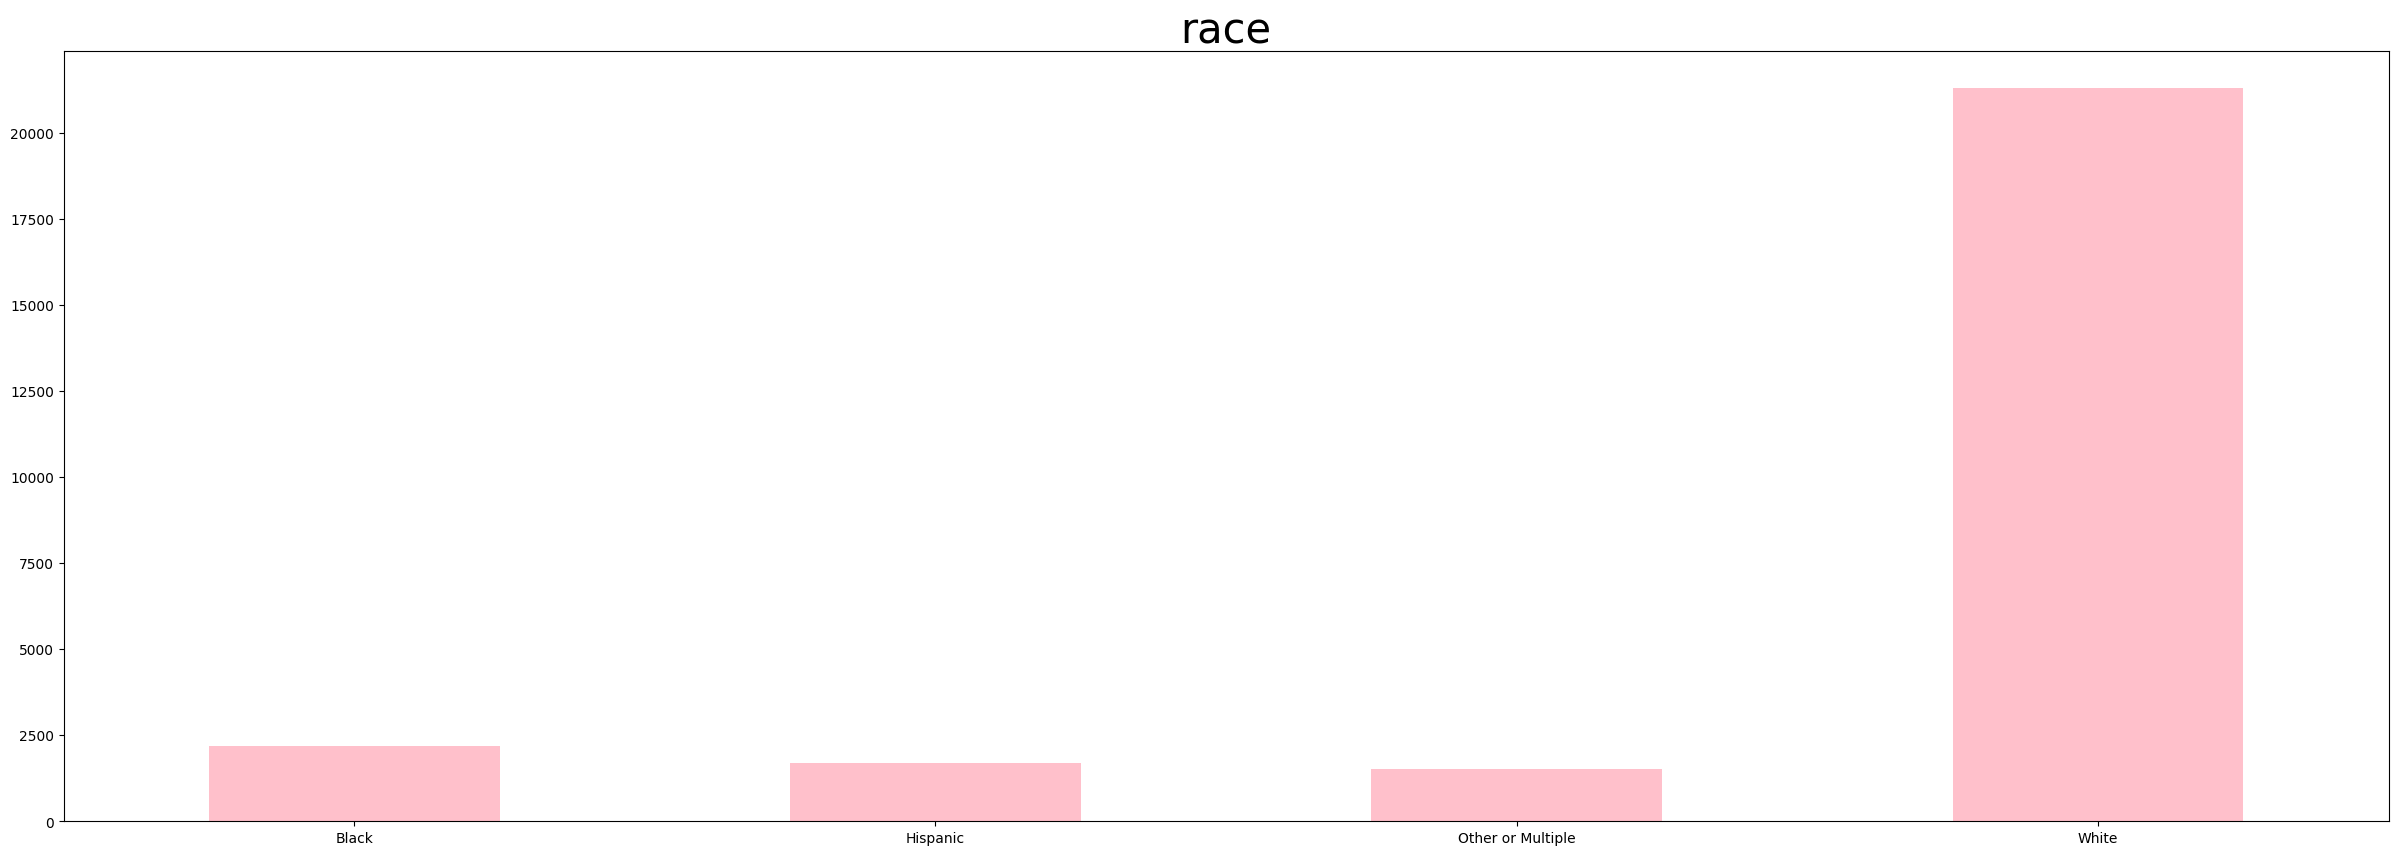

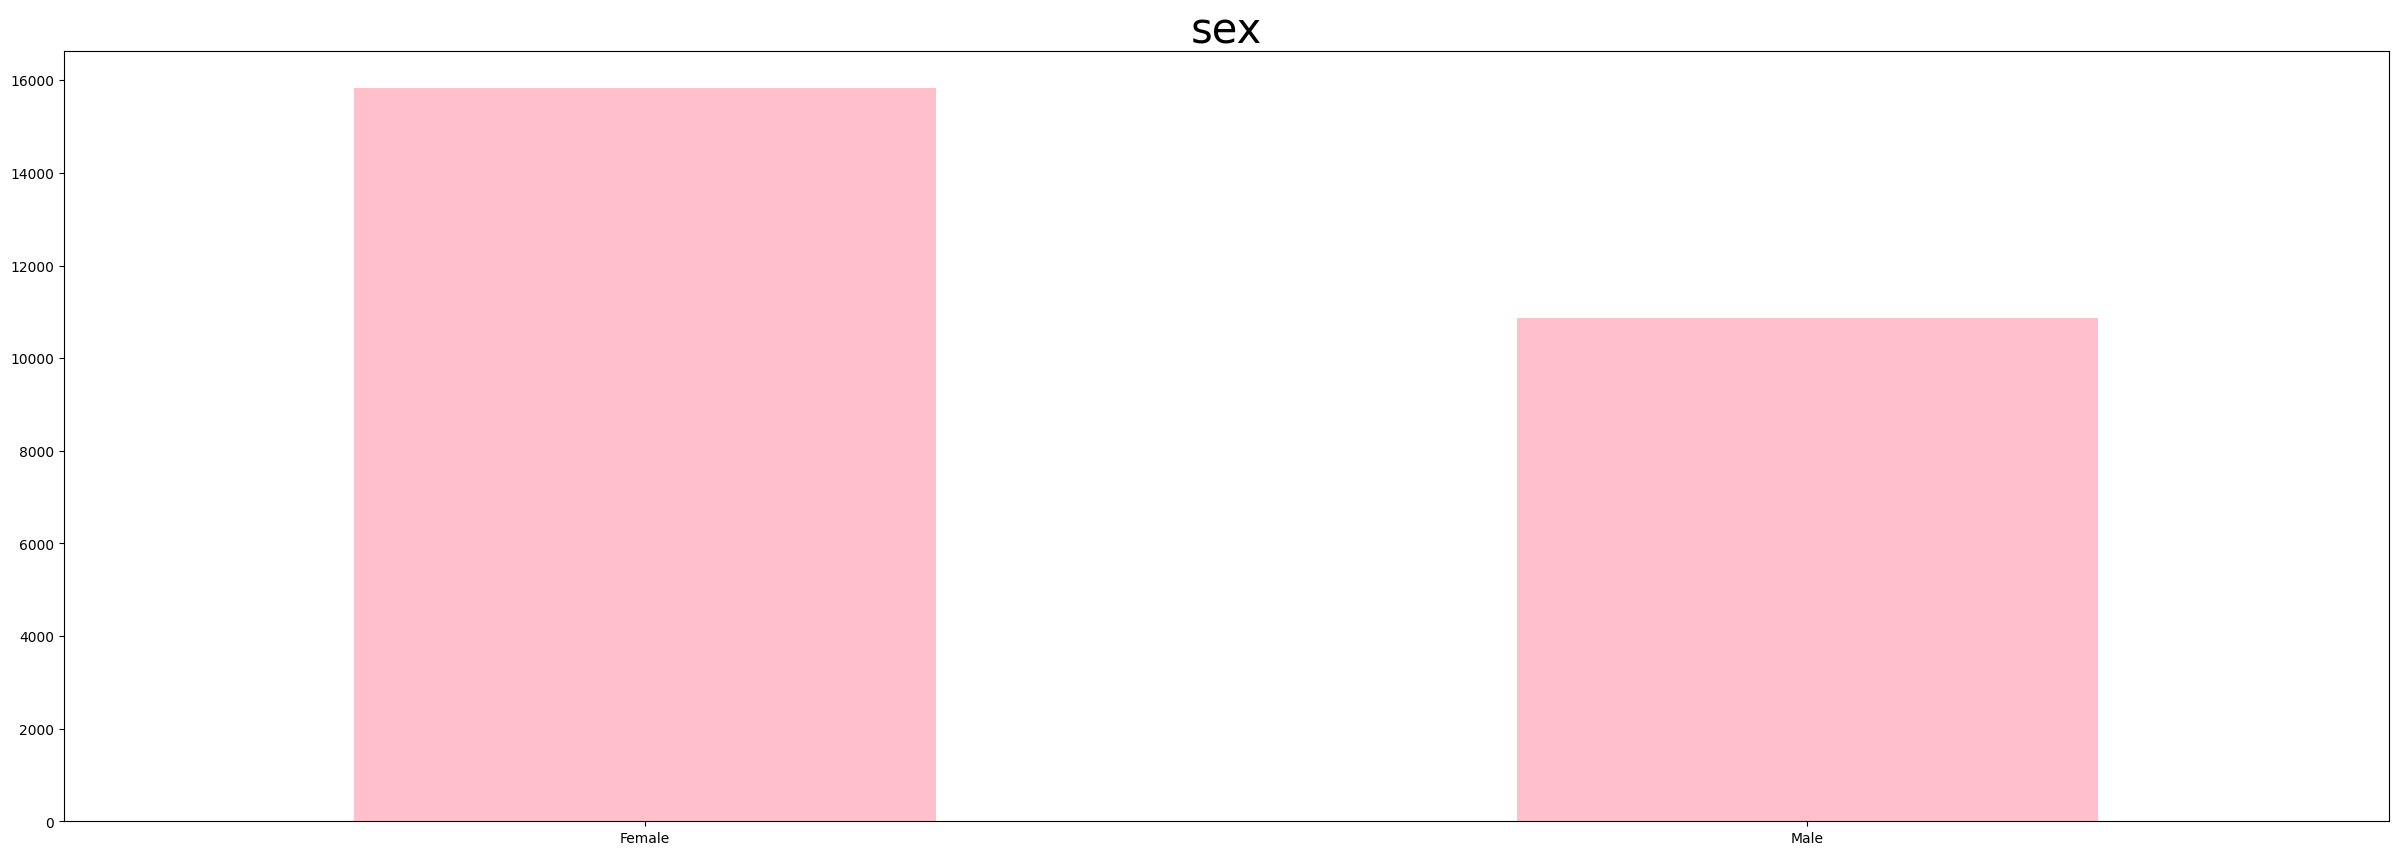

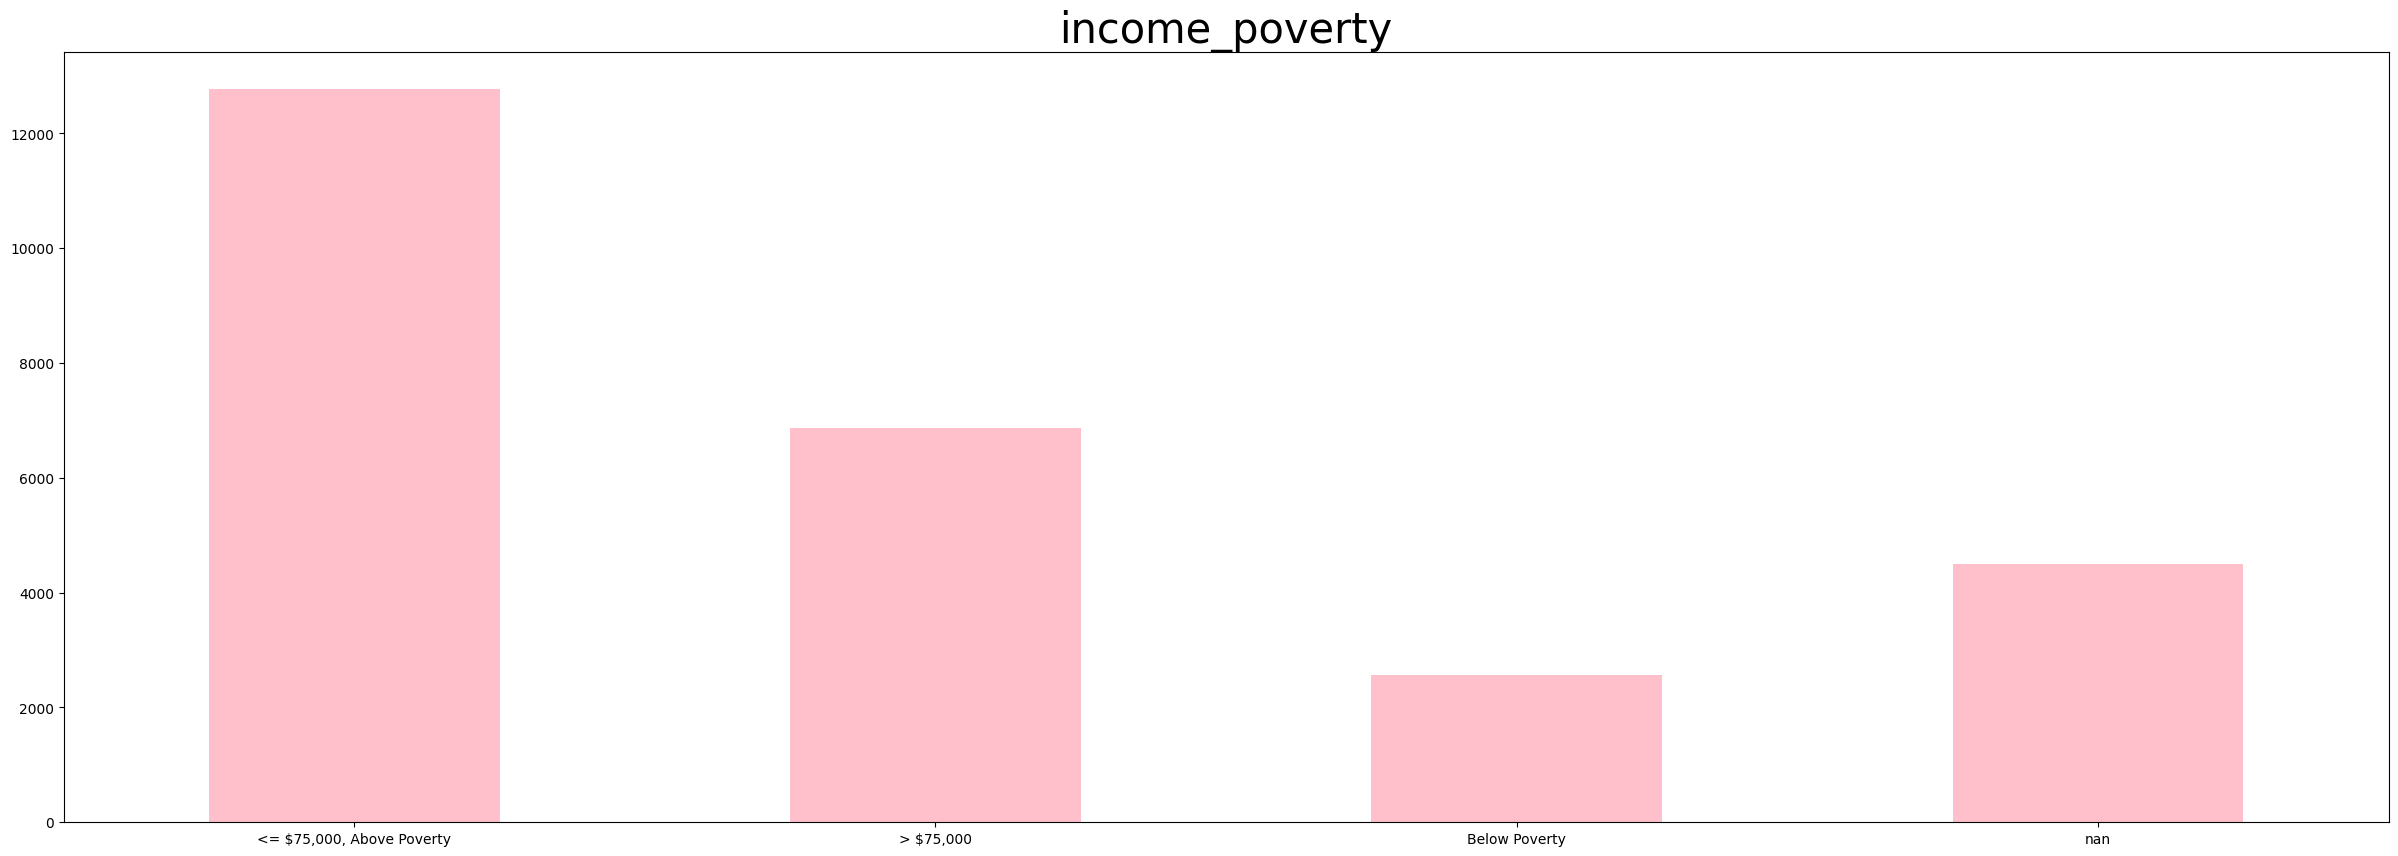

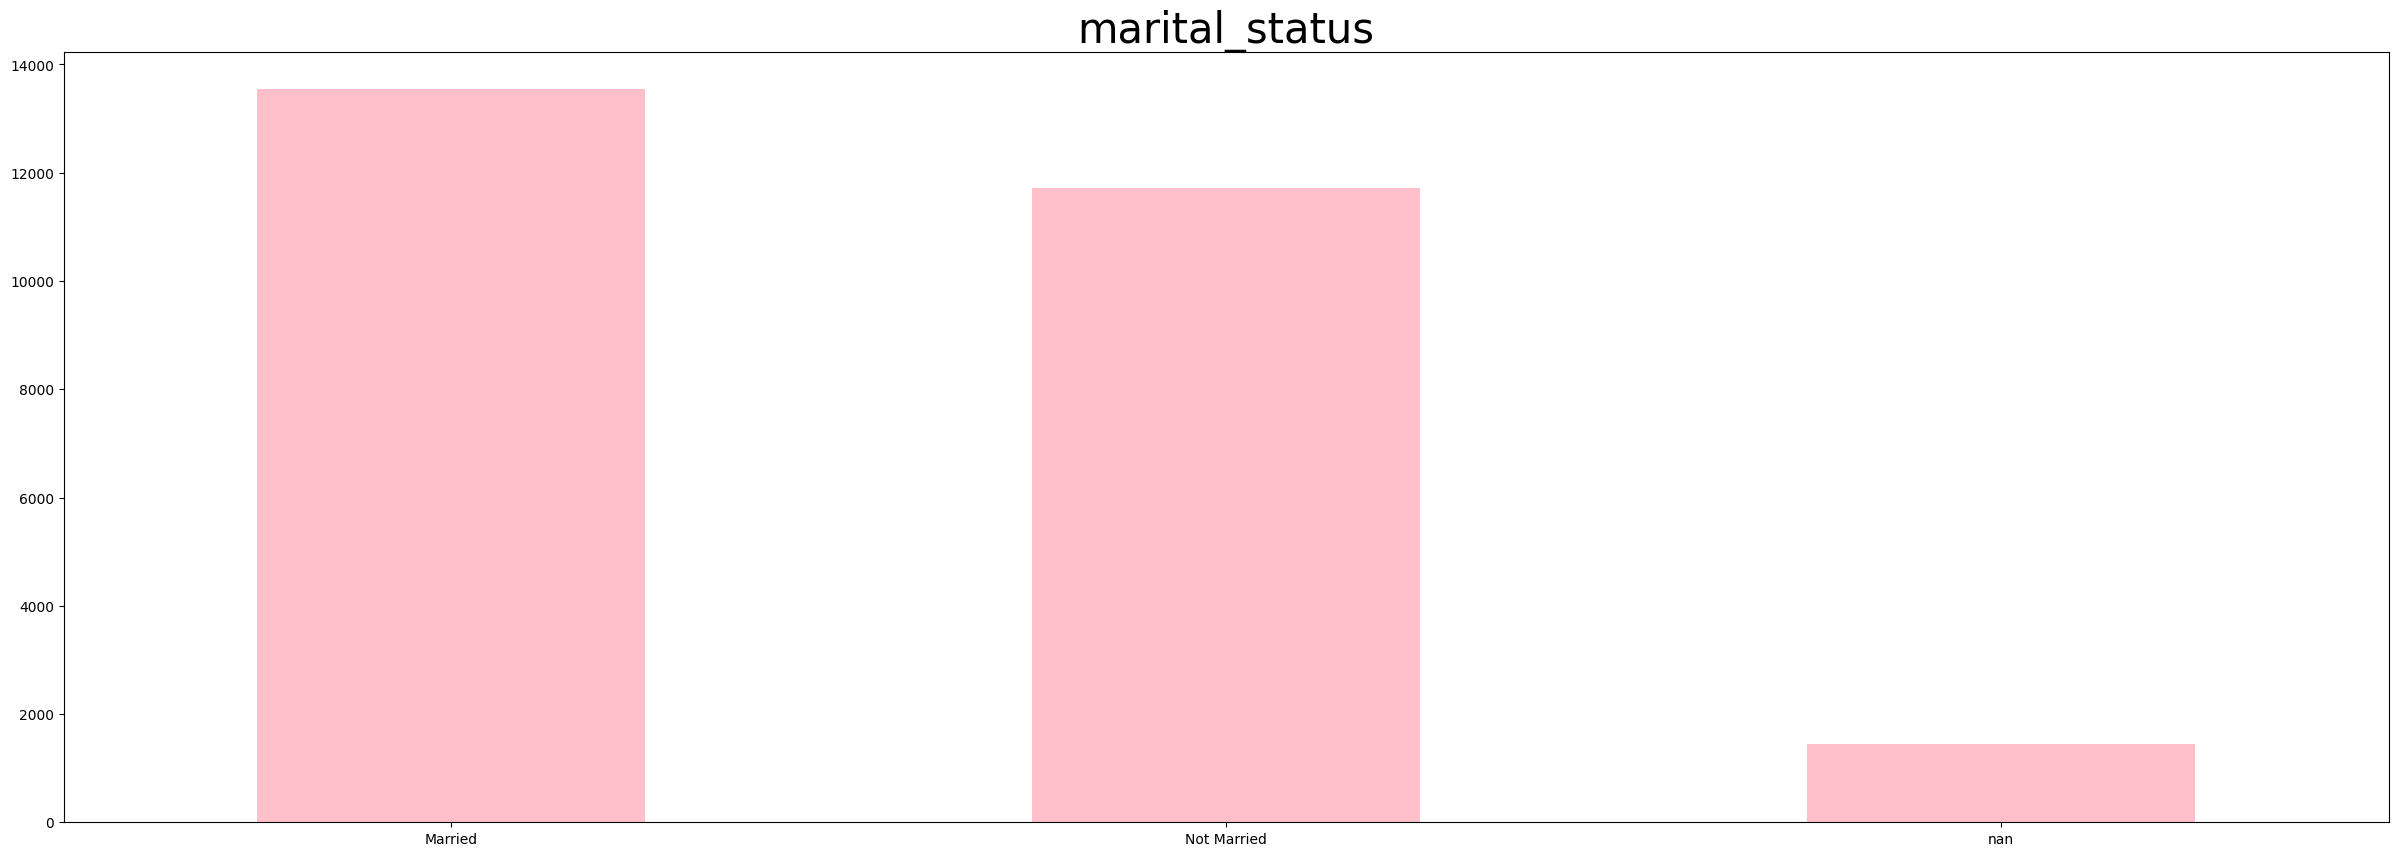

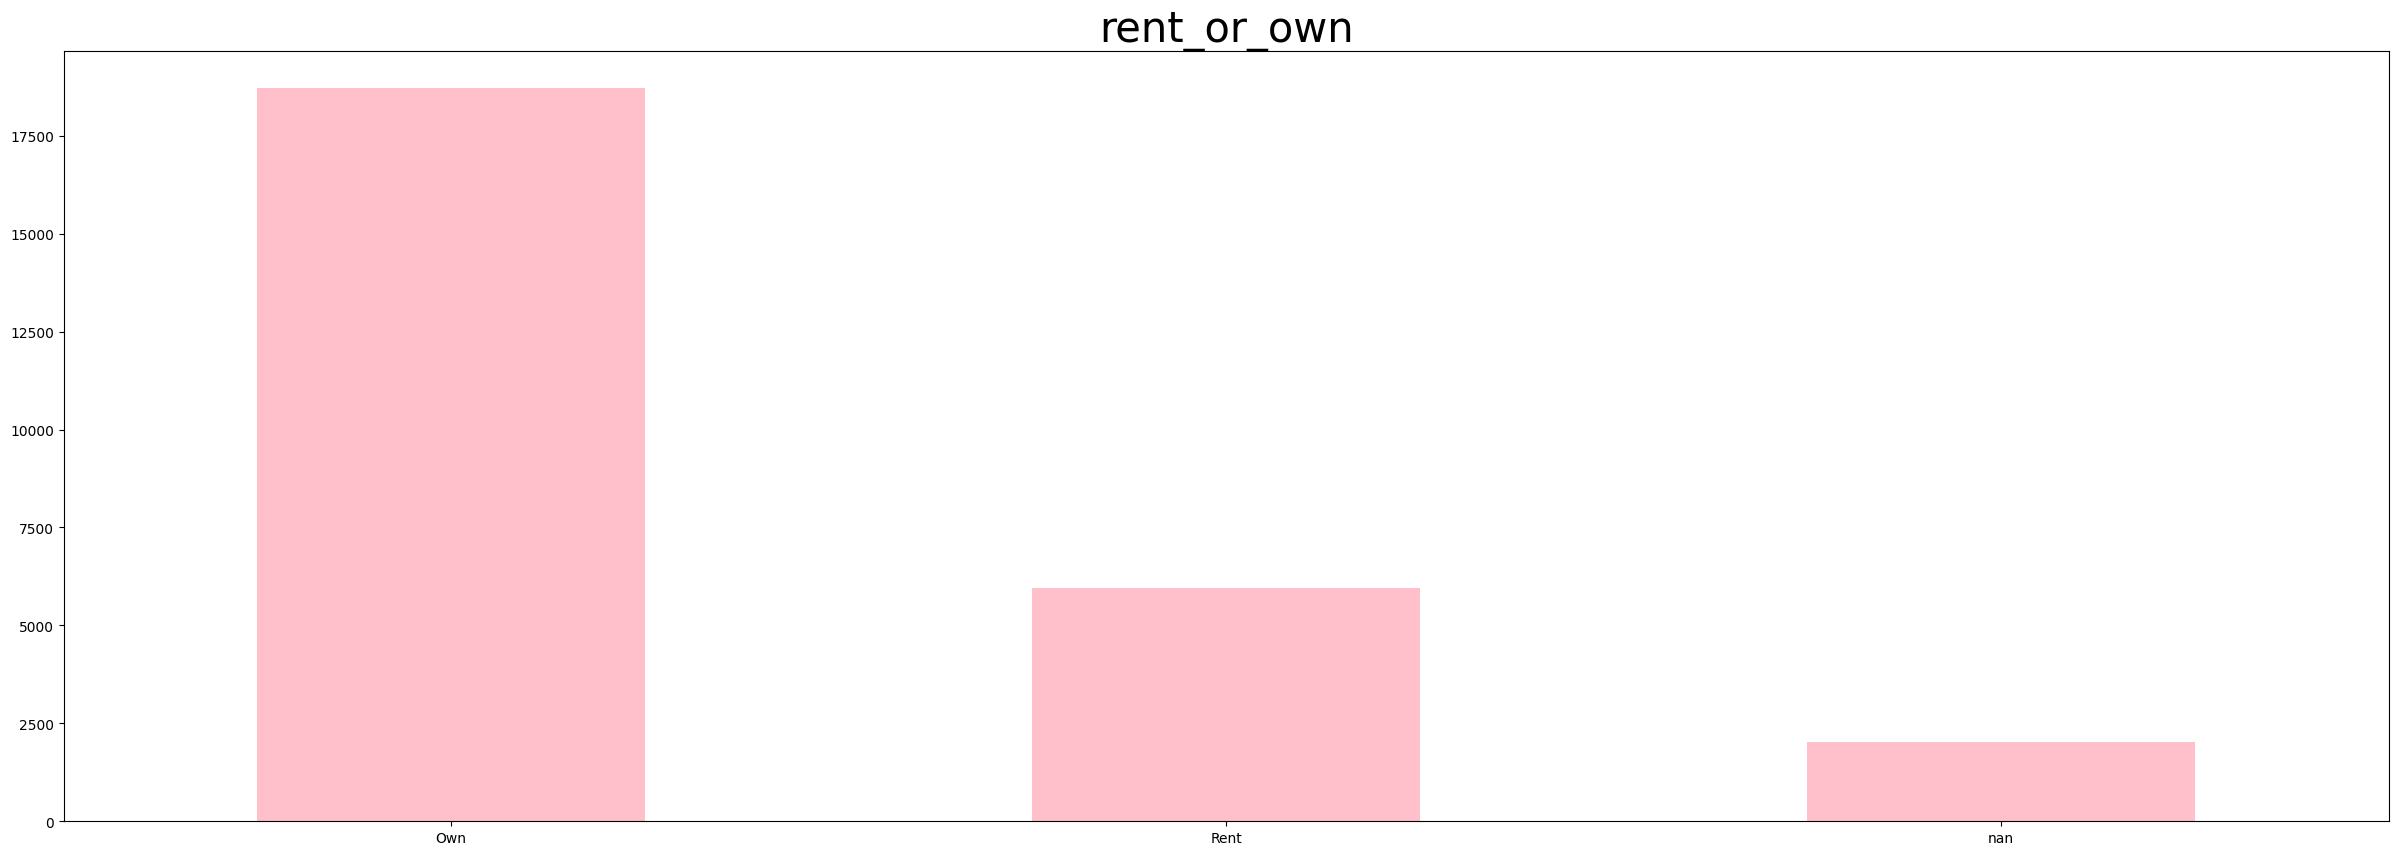

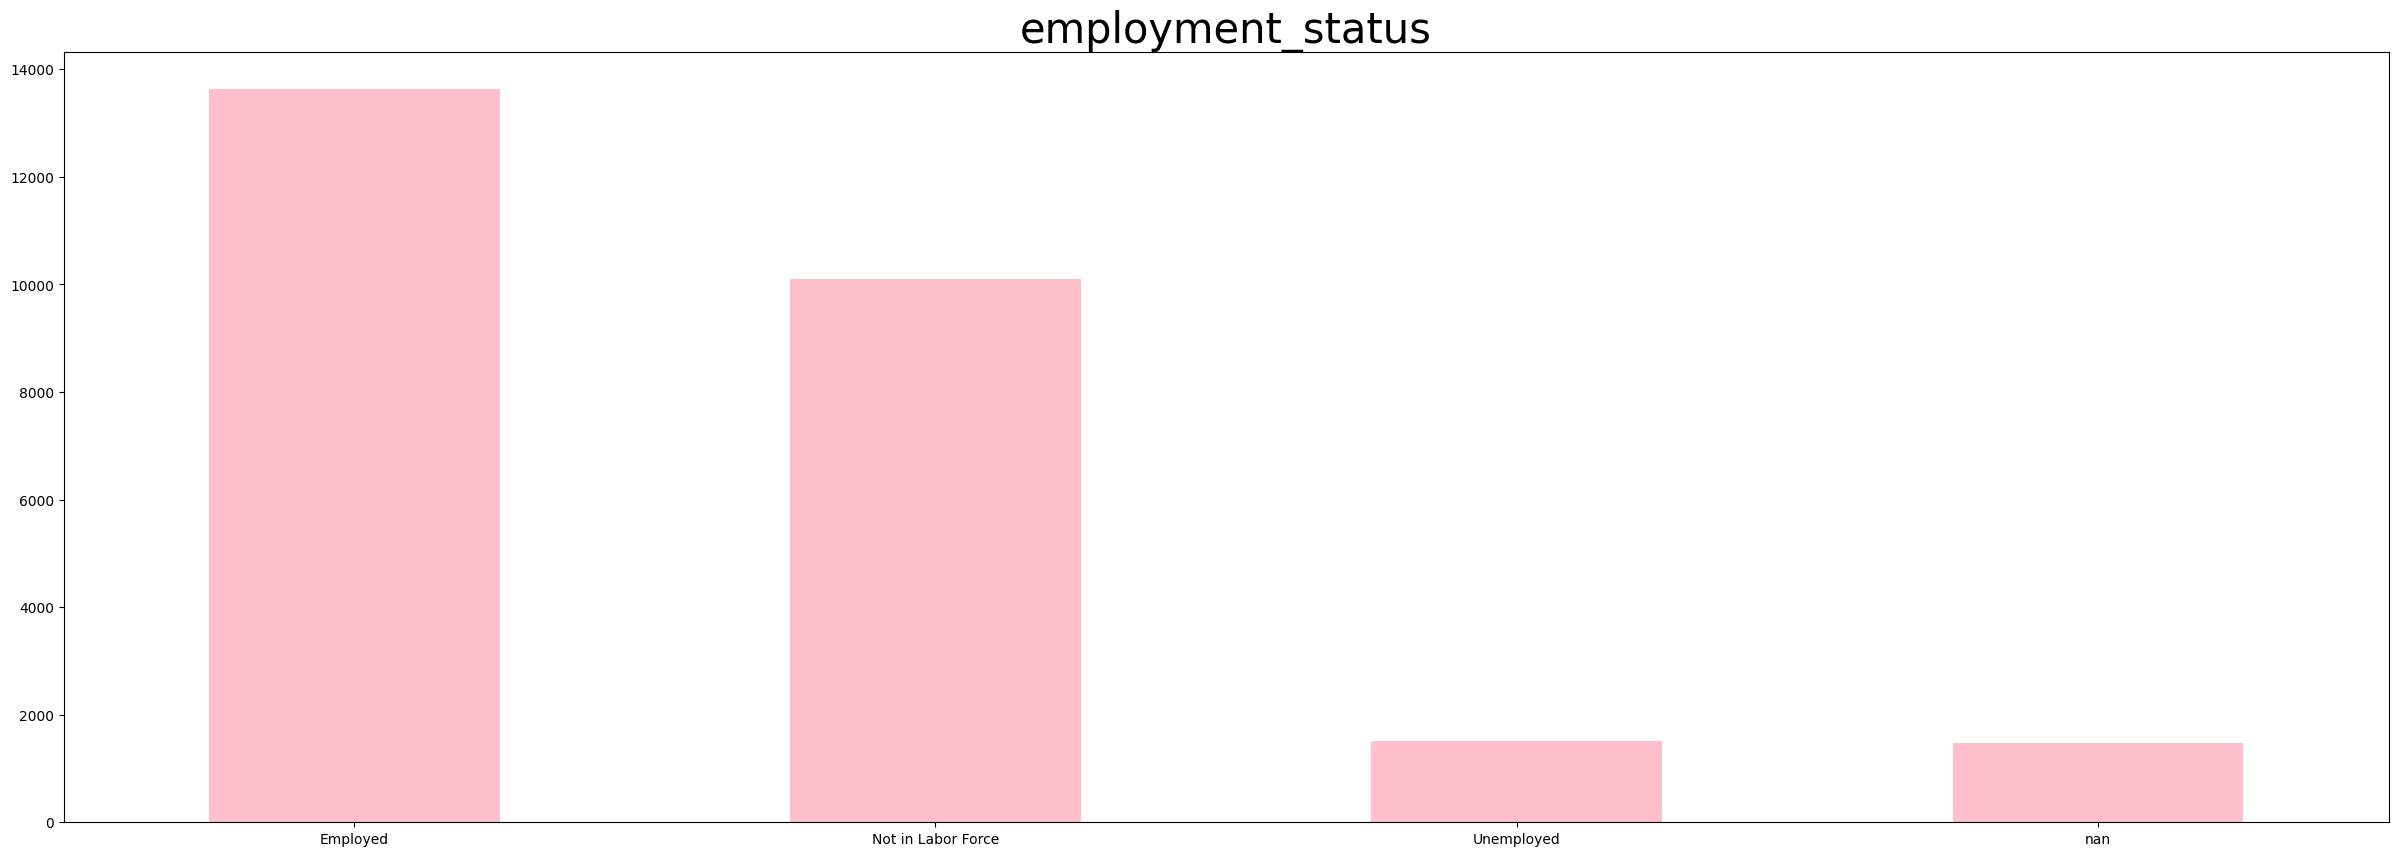

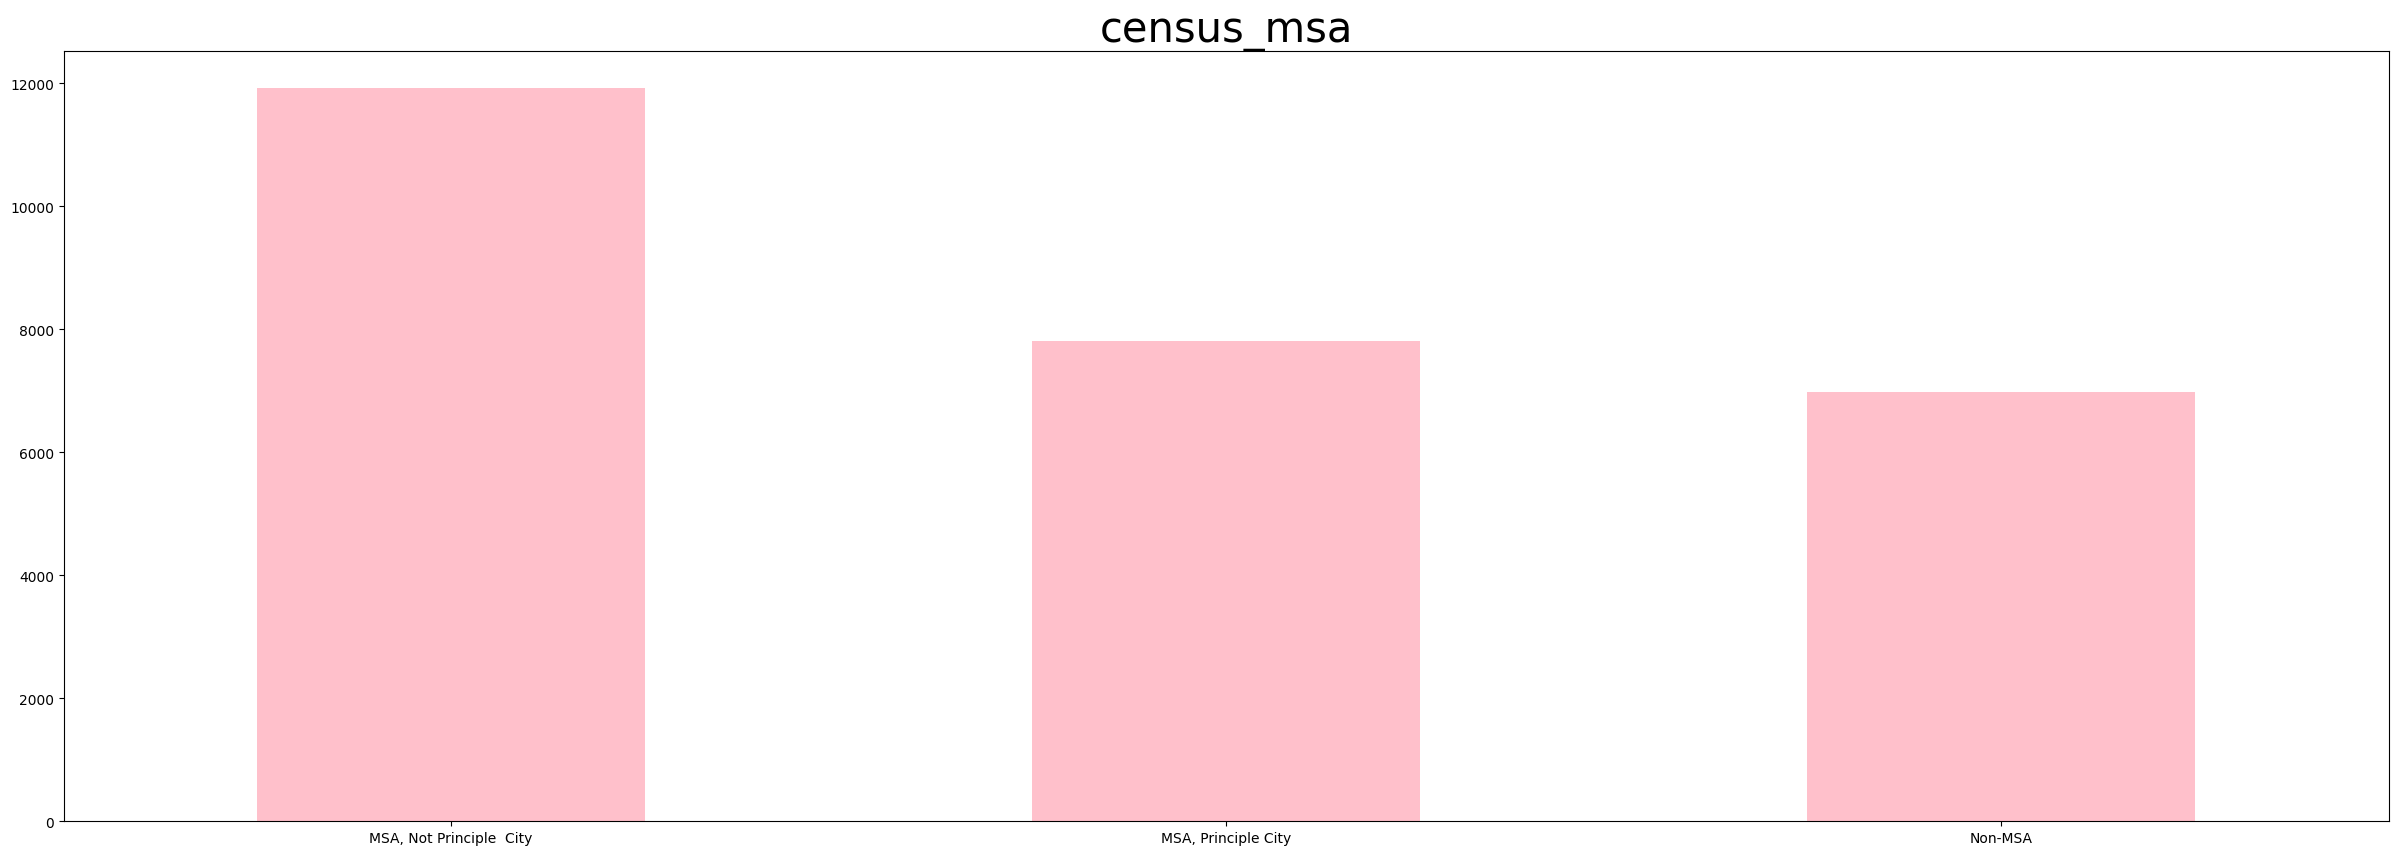

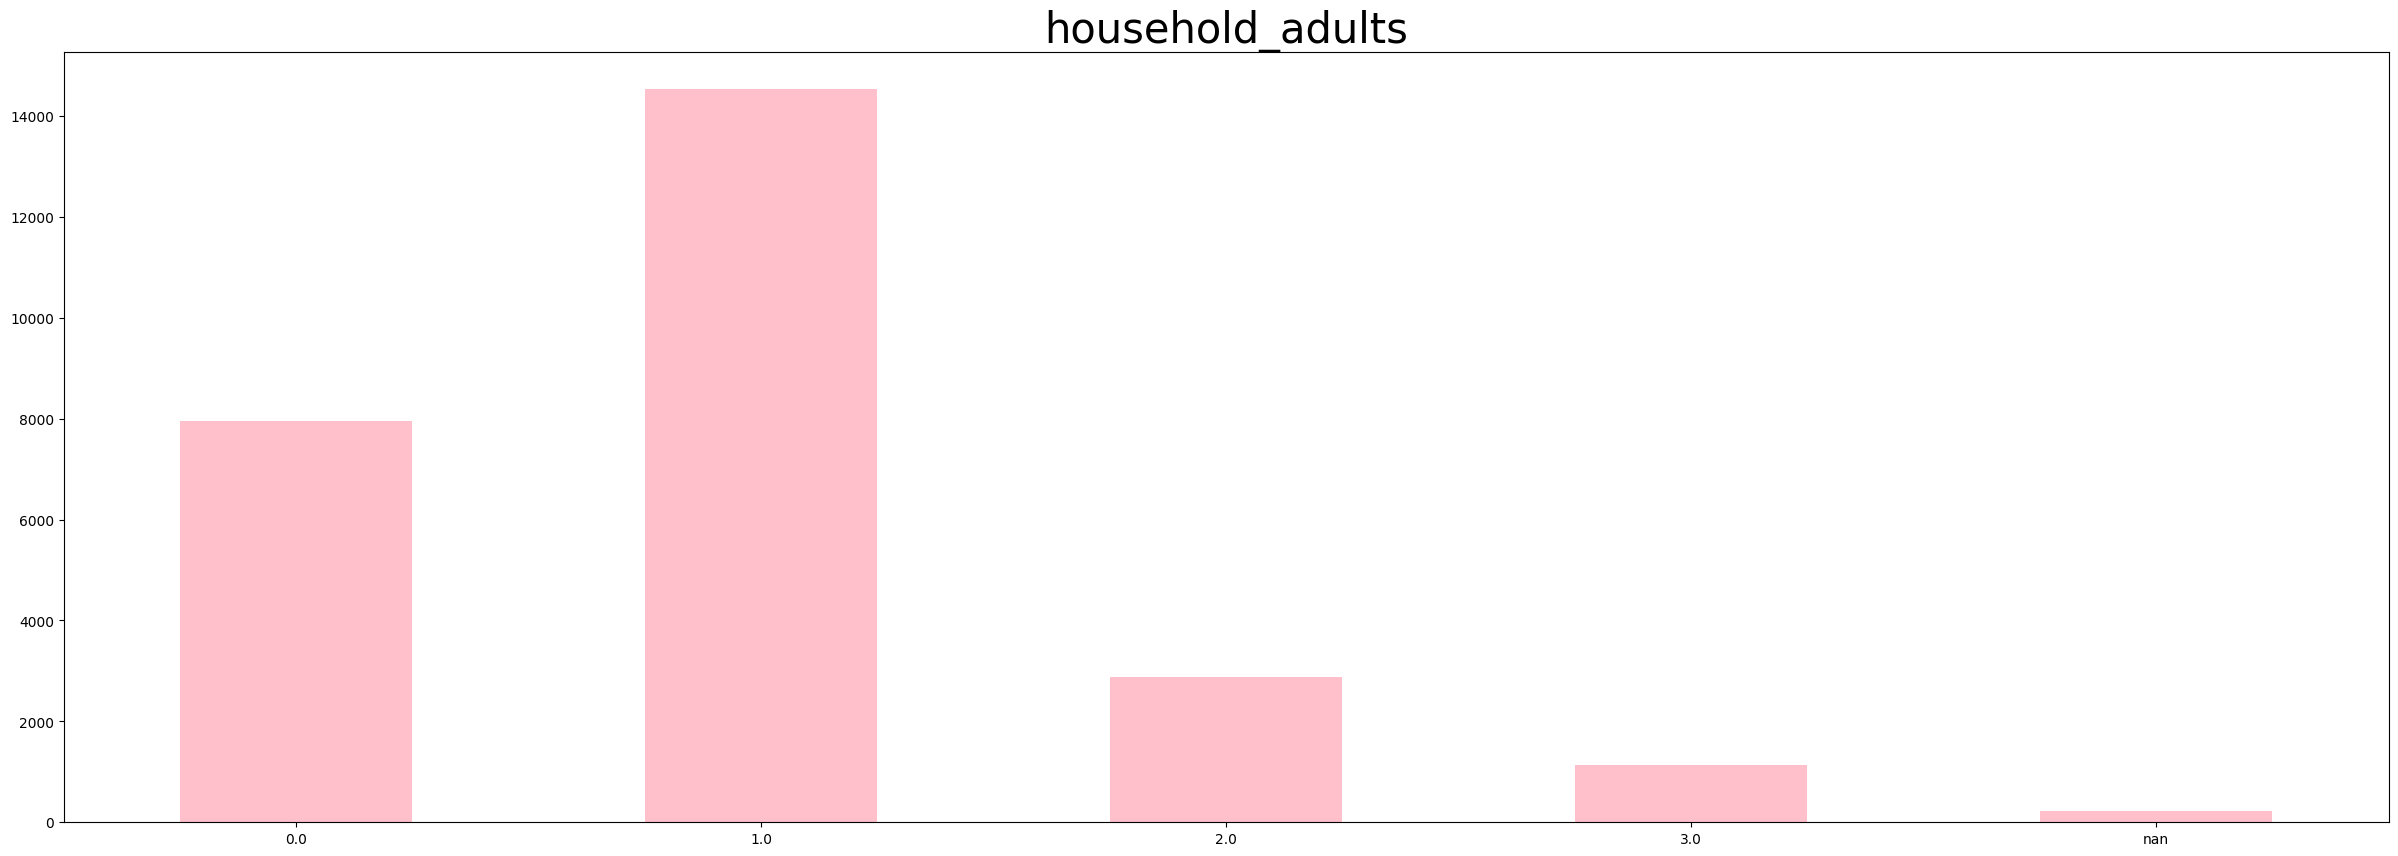

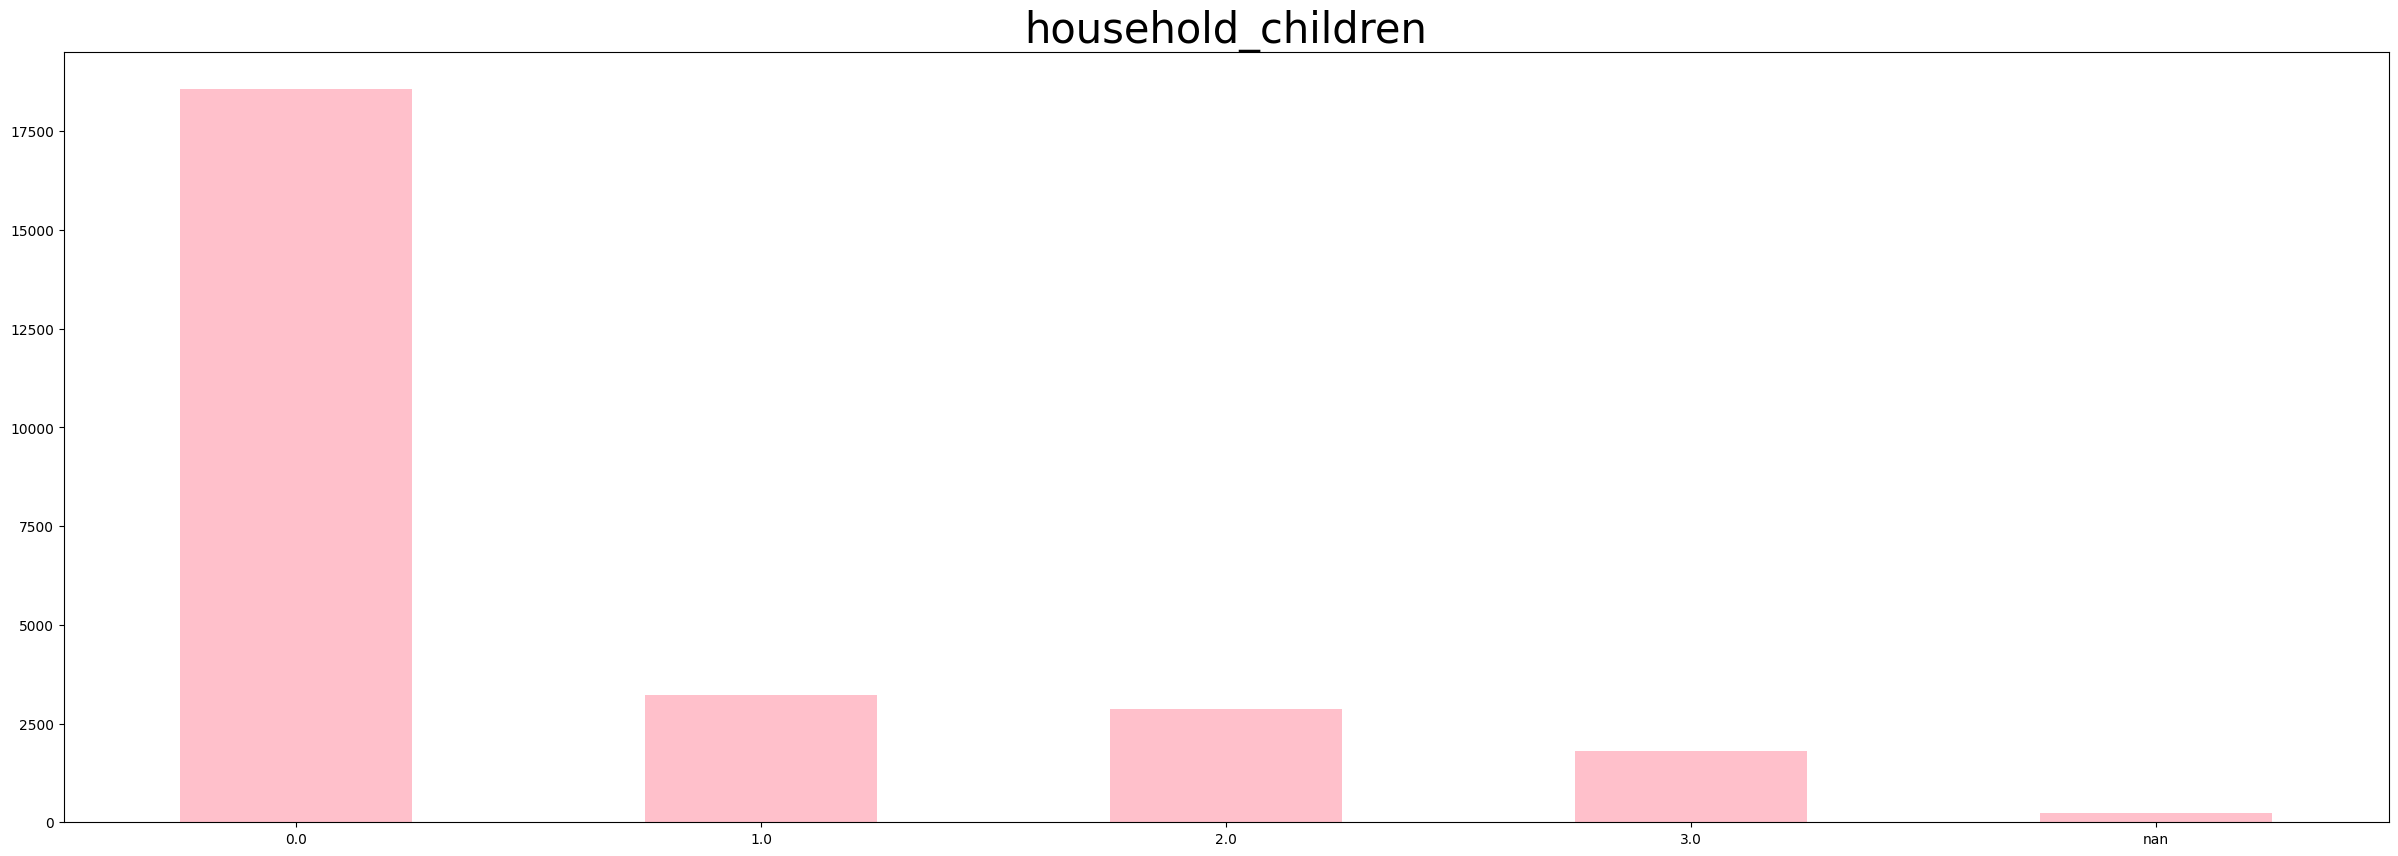

In [14]:
df_train_object = test_data
df_train_object = df_train_object.astype(str)
df_train_object.replace(np.nan, 'Emilia', inplace=True)

# def get_cmap(n, name='hsv'):
#     return plt.cm.get_cmap(name, n)

# cmap = get_cmap(len(features_data.columns))

for col in df_train_object:
    plt.figure(figsize=(30,10))
    plt.title(col, fontsize = 30)
    df_train_object[col].value_counts().sort_index().plot(kind= 'bar', rot = 0, color = 'pink')
    plt.show()

In [15]:
columns = ["behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask", "behavioral_wash_hands", "behavioral_large_gatherings",
          "behavioral_outside_home", "behavioral_touch_face"]
for k in columns:
    test_data[k] = test_data[k].fillna(test_data[k].mode()[0])

test_data.isna().sum()

h1n1_concern                     85
h1n1_knowledge                  122
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_h1n1_vacc_effective     398
opinion_h1n1_risk               380
opinion_h1n1_sick_from_vacc     375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4497
marital_status                 1442
rent_or_own                    2036
employment_status           

In [16]:
columns = ["behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask", "behavioral_wash_hands", "behavioral_large_gatherings",
          "behavioral_outside_home", "behavioral_touch_face"]
df = test_data[columns]
df = df.sum(axis= 1)
rata2 = df.sum(axis = 0) / 26707
rata2

3.049163140749616

In [17]:
df = df.replace([0.0, 1.0, 2.0, 3.0], 0)
df = df.replace([4.0, 5.0, 6.0, 7.0], 1)
df.unique()

array([1., 0.])

In [21]:
df

0        1.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
26703    0.0
26704    1.0
26705    0.0
26706    0.0
26707    0.0
Length: 26708, dtype: float64

In [18]:
behavioral = pd.DataFrame(df, columns = ['Behavioral'])
behavioral

,Behavioral
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
26703,0.0
26704,1.0
26705,0.0
26706,0.0


In [19]:
test_data = pd.concat([test_data, behavioral], axis = 1)
test_data.drop(columns=["behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask", "behavioral_wash_hands", "behavioral_large_gatherings",
          "behavioral_outside_home", "behavioral_touch_face"],inplace = True)
test_data

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,Behavioral
0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,...,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,"MSA, Not Principle City",1.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,Non-MSA,3.0,0.0,0.0
2,2.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,2.0,...,White,Male,"> $75,000",Married,Own,Employed,Non-MSA,1.0,0.0,1.0
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,2.0,2.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0.0
4,3.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,4.0,...,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,Non-MSA,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,2.0,2.0,...,White,Female,NaN,NaN,NaN,NaN,"MSA, Principle City",1.0,1.0,0.0
26704,3.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,...,White,Male,Below Poverty,Married,Rent,Employed,Non-MSA,1.0,3.0,1.0
26705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,1.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0.0
26706,3.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,4.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0.0


**Modus NaN**

In [20]:
features_data["h1n1_concern"] = features_data["h1n1_concern"].fillna(features_data["h1n1_concern"].mode()[0])
features_data["h1n1_knowledge"] = features_data["h1n1_knowledge"].fillna(features_data["h1n1_knowledge"].mode()[0])

In [21]:
features_data.isna().sum()

h1n1_concern                      0
h1n1_knowledge                    0
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                    2042
employment_status              1463
census_msa                        0
household_adults                249
household_children              249
Behavioral                        0
dtype: int64

In [22]:
test_data["h1n1_concern"] = test_data["h1n1_concern"].fillna(test_data["h1n1_concern"].mode()[0])
test_data["h1n1_knowledge"] = test_data["h1n1_knowledge"].fillna(test_data["h1n1_knowledge"].mode()[0])
test_data.isna().sum()

h1n1_concern                      0
h1n1_knowledge                    0
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_h1n1_vacc_effective     398
opinion_h1n1_risk               380
opinion_h1n1_sick_from_vacc     375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4497
marital_status                 1442
rent_or_own                    2036
employment_status              1471
census_msa                        0
household_adults                225
household_children              225
Behavioral                        0
dtype: int64

**Opinion Coy**

In [23]:
#features_data

columns = ["opinion_h1n1_vacc_effective", "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective", "opinion_seas_risk",
          "opinion_seas_sick_from_vacc"]
for k in columns:
    test_data[k] = test_data[k].replace([1,2], 0)
    test_data[k] = test_data[k].replace([4,5], 1)
    features_data[k] = features_data[k].replace([1,2], 0)
    features_data[k] = features_data[k].replace([4,5], 1)

test_data.isna().sum()

h1n1_concern                      0
h1n1_knowledge                    0
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_h1n1_vacc_effective     398
opinion_h1n1_risk               380
opinion_h1n1_sick_from_vacc     375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4497
marital_status                 1442
rent_or_own                    2036
employment_status              1471
census_msa                        0
household_adults                225
household_children              225
Behavioral                        0
dtype: int64

In [24]:
columns = ["opinion_h1n1_vacc_effective", "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective", "opinion_seas_risk",
          "opinion_seas_sick_from_vacc"]
for k in columns:
    test_data[k] = test_data[k].replace(3, np.nan)
    features_data[k] = features_data[k].replace(3, np.nan)

test_data.isna().sum()

h1n1_concern                      0
h1n1_knowledge                    0
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_h1n1_vacc_effective    5188
opinion_h1n1_risk              1610
opinion_h1n1_sick_from_vacc     536
opinion_seas_vacc_effective    1773
opinion_seas_risk              1235
opinion_seas_sick_from_vacc     613
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4497
marital_status                 1442
rent_or_own                    2036
employment_status              1471
census_msa                        0
household_adults                225
household_children              225
Behavioral                        0
dtype: int64

# Age dan fitur ke bawahnya

In [25]:
features_data['age_group'] = features_data['age_group'].replace({'18 - 34 Years':1, '35 - 44 Years': 2, '45 - 54 Years': 3, '55 - 64 Years': 4, '65+ Years': 5})
test_data['age_group'] = test_data['age_group'].replace({'18 - 34 Years':1, '35 - 44 Years': 2, '45 - 54 Years': 3, '55 - 64 Years': 4, '65+ Years': 5})

**Label Manual**

In [26]:
features_data['education'] = features_data['education'].replace({'< 12 Years': 1, '12 Years': 2, 'College Graduate': 3, 'Some College': 4})
test_data['education'] = test_data['education'].replace({'< 12 Years': 1, '12 Years': 2, 'College Graduate': 3, 'Some College': 4})
features_data['income_poverty'] = features_data['income_poverty'].replace({'Below Poverty': 1, '<= $75,000, Above Poverty': 2, '> $75,000': 3})
test_data['income_poverty'] = test_data['income_poverty'].replace({'Below Poverty': 1, '<= $75,000, Above Poverty': 2, '> $75,000': 3})
features_data['marital_status'] = features_data['marital_status'].replace({'Not Married':0, 'Married': 1})
test_data['marital_status'] = test_data['marital_status'].replace({'Not Married':0, 'Married': 1})
features_data['rent_or_own'] = features_data['rent_or_own'].replace({'Rent':0, 'Own': 1})
test_data['rent_or_own'] = test_data['rent_or_own'].replace({'Rent':0, 'Own': 1})
features_data['employment_status'] = features_data['employment_status'].replace({'Unemployed':0, 'Employed': 1, 'Not in Labor Force':2})
test_data['employment_status'] = test_data['employment_status'].replace({'Unemployed':0, 'Employed': 1, 'Not in Labor Force':2})

**Pd Get dummies**

In [27]:
fiturr = ['race', 'sex', 'census_msa']
get_dumm = pd.get_dummies(features_data[fiturr])

get_dumm

,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,0,0,1,1,0,0,0,1
1,0,0,0,1,0,1,1,0,0
2,0,0,0,1,0,1,1,0,0
3,0,0,0,1,1,0,0,1,0
4,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
26702,0,0,0,1,1,0,0,0,1
26703,0,0,0,1,0,1,0,1,0
26704,0,0,0,1,1,0,1,0,0
26705,0,1,0,0,1,0,0,0,1


In [28]:
features_data.drop(columns = ['race', 'sex', 'census_msa'], inplace = True)
features_data = pd.concat([features_data, get_dumm], axis = 1)
features_data

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,...,Behavioral,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0.0,0,0,0,1,1,0,0,0,1
1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0,0,0,1,0,1,1,0,0
2,1.0,1.0,NaN,NaN,1.0,0.0,0.0,NaN,0.0,0.0,...,0.0,0,0,0,1,0,1,1,0,0
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,1.0,...,0.0,0,0,0,1,1,0,0,1,0
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,1.0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0.0,0,0,0,1,1,0,0,0,1
26703,1.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,1,0
26704,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0,0,0,1,1,0,1,0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0.0,0,1,0,0,1,0,0,0,1


In [29]:
fiturr = ['race', 'sex', 'census_msa']
get_dumm = pd.get_dummies(test_data[fiturr])
test_data.drop(columns = ['race', 'sex', 'census_msa'], inplace = True)
test_data = pd.concat([test_data, get_dumm], axis = 1)
test_data

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,...,Behavioral,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0,1,0,0,1,0,1,0,0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,1
2,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0,0,0,1,0,1,0,0,1
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,0,0,1,1,0,1,0,0
4,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,0,0,1,1,0,0,1,0
26704,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,0,1,0,1,0,0,1
26705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,...,0.0,0,0,0,1,1,0,1,0,0
26706,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0,...,0.0,0,0,0,1,1,0,1,0,0


# KNN IMPUTATION

In [34]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df_knn = features_data
df_knn = knn_imputer.fit_transform(df_knn)
# df_knn.isna().sum()

In [ ]:
from sklearn.impute import KNNImputer
df_knn = features_data
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(df_knn)
df_knn_new = imputer.transform(df_knn)
df_knn_new

In [ ]:
# kolom = features_data.keys()
# df_knn = features_data
# for k in kolom:
#     if df_knn[k].isnull().any():
#         df_knn = df_knn.dropna(subset = k)
# imputer = KNNImputer(n_neighbors=5)
# df_knn = imputer.fit_transform(df_knn)

In [ ]:
df_knn

In [ ]:
df_knn_new = pd.DataFrame(df_knn_new, columns = features_data.keys())
# df_knn['doctor_recc_h1n1'].unique()
# features_data.keys()
df_knn_new

In [ ]:
features_data.shape

In [ ]:
df_knn_new.shape

# MICE Imputation

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=100, max_iter=10)
df_mice = features_data
imputer.fit(df_mice)
df_mice_new = imputer.transform(df_mice)

In [31]:
df_mice_new = pd.DataFrame(df_mice_new, columns = features_data.keys())
# df_knn['doctor_recc_h1n1'].unique()
# features_data.keys()
idris_ganteng = df_mice_new.round(0)

In [32]:
idris_ganteng.to_csv('MICE_Findit.csv', index = False)

# Sampling with SMOTE

# Feature Selection

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
y_h1n1 = label_data["h1n1_vaccine"]
y_seasonal = label_data["seasonal_vaccine"]

# belum di HyperParameter Tuning
# {'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.8}
xgb.set_params(tree_method='gpu_hist')
xgb.set_params(subsample = 0.6)
xgb.set_params(min_child_weight = 1)
xgb.set_params(max_depth = 5)
xgb.set_params(gamma = 1.5)
xgb.set_params(colsample_bytree = 0.8)

xgb = XGBClassifier()
# cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
rfecv_h1n1 = RFECV(estimator=xgb, step=1, cv=3, scoring='accuracy')
rfecv_seasonal = RFECV(estimator=xgb, step=1, cv=3, scoring='accuracy')

rfecv_h1n1.fit(X, y_h1n1)

RFECV(cv=3,
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...),
      scoring='accuracy')

In [48]:
rfecv_h1n1.n_features_

9

In [49]:
rfecv_seasonal.fit(X, y_seasonal)
rfecv_seasonal.n_features_

8

# XGBOOST

**H1N1**

In [50]:
feature_cols = features_data.columns[:-2]
selected_features = []
for i in range(len(feature_cols)):
    if (rfecv_h1n1.support_[i]):
        selected_features.append(feature_cols[i])
        
selected_features

['h1n1_knowledge',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_seas_risk',
 'age_group',
 'race_Black']

In [51]:
feature_cols = features_data.columns[:-2]
selected_features = []
for i in range(len(feature_cols)):
    if (rfecv_seasonal.support_[i]):
        selected_features.append(feature_cols[i])
selected_features

['h1n1_knowledge',
 'doctor_recc_seasonal',
 'health_worker',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'income_poverty']

In [33]:
fitur_h1n1 = ['h1n1_knowledge',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_seas_risk',
 'age_group']

In [53]:
y_h1n1 = label_data['h1n1_vaccine']
X = idris_ganteng[fitur_h1n1]
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
xgb = XGBClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y_h1n1, test_size=0.3)
xgb.set_params(tree_method='gpu_hist')
xgb.fit(X_train, y_train)
prediction = xgb.predict(X_test)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6286
           1       0.63      0.45      0.52      1727

    accuracy                           0.82      8013
   macro avg       0.74      0.69      0.71      8013
weighted avg       0.81      0.82      0.81      8013



In [ ]:
label_data

In [55]:
fitur_seas = ['h1n1_knowledge',
 'doctor_recc_seasonal',
 'health_worker',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group']

In [56]:
y_h1n1 = label_data['seasonal_vaccine']
X = idris_ganteng[fitur_seas]
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
xgb = XGBClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y_h1n1, test_size=0.3)
xgb.set_params(tree_method='gpu_hist')
xgb.fit(X_train, y_train)
prediction = xgb.predict(X_test)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      4312
           1       0.72      0.74      0.73      3701

    accuracy                           0.75      8013
   macro avg       0.75      0.75      0.75      8013
weighted avg       0.75      0.75      0.75      8013



# Random Forest

In [41]:
# Import the model we are using
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import cudf as cu
from cuml.metrics import accuracy_score as cu_accuracy_score
from sklearn.ensemble import RandomForestRegressor

y_h1n1 = label_data['h1n1_vaccine']
X = idris_ganteng[fitur_h1n1]

X_train, X_test, y_train, y_test = train_test_split(X, y_h1n1, test_size=0.3)

rf = RandomForestRegressor(n_estimators = 100)# Train the model on training data
# rf.set_params(tree_method='gpu_hist')
rf.fit(X_train, y_train)

prediction = rf.predict(X_test)

# print(classification_report(y_test, prediction))
print ('Akurasi score: ', cu_accuracy_score(y_test, prediction))

Akurasi score:  0.7869711518287659


# BoostArootA

In [46]:
idris_ganteng[fitur_h1n1]

,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_risk,age_group
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,2.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,5.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...
26702,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0
26703,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
26704,2.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0
26705,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [43]:
!pip install boostaroota

In [ ]:
from boostaroota import BoostARoota
y_h1n1 = label_data['h1n1_vaccine']
X = idris_ganteng[fitur_h1n1]

X_train, X_test, y_train, y_test = train_test_split(X, y_h1n1, test_size=0.3)
br = BoostARoota(metric='logloss')
br.fit(X_train, y_train)
prediction = br.predict(y_)

# HIST GRADIENT

In [47]:
y_h1n1 = label_data['h1n1_vaccine']
X = idris_ganteng[fitur_h1n1]

In [49]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

# y_h1n1 = label_data['h1n1_vaccine']
# X = idris_ganteng[fitur_h1n1]

X_train, X_test, y_train, y_test = train_test_split(X, y_h1n1, test_size=0.3)

classifier =  HistGradientBoostingClassifier()
classifier.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
CVscores = cross_val_score(classifier, X_train, y_train, scoring='roc_auc', cv=2) 
print("The average CV score is",CVscores.mean())

# predictions = classifier.predict_proba(test_data)[:,1]

The average CV score is 0.7969061064637022


# HYPERPARAMETER TUNING

In [39]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [40]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
#         'tree_method': 'gpu_hist'
        }
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
xgb.set_params(tree_method='gpu_hist')
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
X = idris_ganteng
Y = label_data['h1n1_vaccine']

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,Y), verbose=3, random_state=1001 )
random_search.fit(X, Y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[05:50:44] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7b360a78c0b0>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=600, n_jobs=None,
                                           nthread=1, num_parallel_tree=None,
                                           predictor=None, ...),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='roc_auc', verbose=3)

In [41]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([4.63865288, 5.87757166, 4.89739569, 3.64532638, 3.68148875]), 'std_fit_time': array([0.21306628, 0.61769239, 0.37186847, 0.28472814, 0.02387192]), 'mean_score_time': array([0.12728699, 0.30802457, 0.29404664, 0.18417088, 0.13094274]), 'std_score_time': array([0.0012752 , 0.01372646, 0.00152881, 0.00528081, 0.04837121]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dt

In [42]:
y_test = random_search.predict_proba(test)

NameError: name 'test' is not defined